# To-do list

Source: https://cds.climate.copernicus.eu/cdsapp#!/dataset/10.24381/cds.6c68c9bb?tab=form

- [x] [2m_temperature](#2m_temperature)
- [x] [solar_radiation_flux](#solar_radiation_flux)
- [x] [10m_wind_speed](#10m_wind_speed)
- [x] [2m_dewpoint_temperature](#2m_dewpoint_temperature)
- [x] [2m_relative_humidity](#2m_relative_humidity)
- [ ] [vapour_pressure](#vapour_pressure) ??


# Import

In [2]:
import cdsapi
import zipfile
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import glob
import tarfile
import calendar
import time
c = cdsapi.Client()

In [3]:
def try_remove(file_path,max_attempts=3):
    for attempt in range(1, max_attempts + 1):
        try:
            # Try to delete the file
            os.remove(file_path)
            print(f"File {file_path} deleted successfully.")
            break  # Exit the loop if deletion is successful
        except Exception as e:
            print(f"Attempt {attempt} failed: {e}")
            if attempt < max_attempts:
                print("Waiting for 30 seconds before the next attempt...")
                time.sleep(30)
            else:
                print(f"All {max_attempts} attempts failed. Unable to delete the file.")

def request_cds_api(dataset,retrieve_dictionary,folder):
    c.retrieve(
    dataset,
    retrieve_dictionary,
    'download.tar.gz')
    with tarfile.open('download.tar.gz', 'r:gz') as tar:
        # Extract all contents to the specified directory
        tar.extractall(path=folder)  
        # Rename files
        # Get the list of TarInfo objects
        members = tar.getmembers()
        # Loop through each member
        for member in members:
            # Get the file name in the archive
            file_name = member.name
            # Join the extraction path with the file name
            file_path = os.path.join(folder, file_name)
            # Print the file path
            new_name = file_name[37:]
            new_fh = os.path.join(folder, new_name)
            os.rename(file_path, new_fh)
        # Close the tar file
        tar.close()        
    try_remove('download.tar.gz')
    
    
    

In [4]:
# change parameters of data request
save_folder=r'E:\WaPORQA\AgERA5'
variables=['2m_temperature', 'precipitation_flux', 
           'solar_radiation_flux', '10m_wind_speed', 
           '2m_relative_humidity'] # see data product overview for other variables
start='2009-01-01'
end='2023-12-31'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
latlim=[30, 32]
lonlim=[30, 32]
bbox=[32, 30, 30,32] # ymax, xmin, ymin, xmax



# 2m_temperature

## testing 1 month

In [10]:
c = cdsapi.Client()

c.retrieve(
    'sis-agrometeorological-indicators',
    {
        'variable': '2m_temperature',
        'statistic': [
            '24_hour_maximum', '24_hour_mean', '24_hour_minimum',
        ],
        'year': '2018',
        'month': '02',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', 
        ],
        'version': '1_1',
        'area': [
            40, -30, -40,
            60,
        ],
        'format': 'tgz',
    },
    'download.tar.gz')

2024-07-17 16:42:51,724 INFO Welcome to the CDS
2024-07-17 16:42:51,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 16:42:51,837 INFO Request is completed
2024-07-17 16:42:51,838 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-5dbc7c6e-ff12-4776-8b19-1022d6c4fd8e.tar.gz to download.tar.gz (58.1M)
2024-07-17 16:42:53,085 INFO Download rate 46.6M/s                                                                     


Result(content_length=60951907,content_type=application/gzip,location=https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-5dbc7c6e-ff12-4776-8b19-1022d6c4fd8e.tar.gz)

## Bulk-downloading

In [16]:
# change parameters of data request
save_folder=r'D:\Thesis Work\AgERA5_Data'
variables=['2m_temperature', '2m_dewpoint_temperature', 
           'solar_radiation_flux', '10m_wind_speed', 
           '2m_relative_humidity'] # see data product overview for other variables
start='2009-01-01'
end='2023-12-31'
latlim=[30, 32]
lonlim=[30, 32]
bbox=[32, 30, 30,32] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'

dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,'2m_temperature')
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': '2m_temperature',
            'statistic': [
                '24_hour_maximum', '24_hour_mean', '24_hour_minimum',
            ],
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
        }    
    request_cds_api(dataset,retrieve_dictionary,folder)

2024-07-17 20:23:01,195 INFO Welcome to the CDS
2024-07-17 20:23:01,196 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:23:01,288 INFO Request is queued
2024-07-17 20:23:02,333 INFO Request is running
2024-07-17 20:23:22,338 INFO Request is completed
2024-07-17 20:23:22,339 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data6/dataset-sis-agrometeorological-indicators-68f3bf56-91ed-400c-be0f-faab1b5900e1.tar.gz to download.tar.gz (144.7K)
2024-07-17 20:23:22,616 INFO Download rate 523.6K/s                                                                    
C:\Users\20112\AppData\Local\Temp\ipykernel_5480\842019120.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=folder)
2024-07-17 20:23:22,821 INFO Welcome to the CDS
2

File download.tar.gz deleted successfully.


2024-07-17 20:23:23,947 INFO Request is running
2024-07-17 20:23:43,955 INFO Request is completed
2024-07-17 20:23:43,956 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-26653b77-323f-430e-ad26-abeee290600d.tar.gz to download.tar.gz (127.9K)
2024-07-17 20:23:44,225 INFO Download rate 476.5K/s                                                                    
2024-07-17 20:23:44,404 INFO Welcome to the CDS
2024-07-17 20:23:44,405 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:23:44,486 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:23:45,530 INFO Request is running
2024-07-17 20:24:05,538 INFO Request is completed
2024-07-17 20:24:05,539 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/dataset-sis-agrometeorological-indicators-9a4c26cf-0f4a-46a4-94ff-773def6d4752.tar.gz to download.tar.gz (143.9K)
2024-07-17 20:24:05,832 INFO Download rate 491.8K/s                                                                    
2024-07-17 20:24:05,999 INFO Welcome to the CDS
2024-07-17 20:24:06,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:24:06,054 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:24:07,100 INFO Request is running
2024-07-17 20:24:27,114 INFO Request is completed
2024-07-17 20:24:27,116 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data2/dataset-sis-agrometeorological-indicators-65b64954-e91e-4a37-960c-d0f7bc6f18c2.tar.gz to download.tar.gz (141.9K)
2024-07-17 20:24:27,436 INFO Download rate 447.6K/s                                                                    
2024-07-17 20:24:27,634 INFO Welcome to the CDS
2024-07-17 20:24:27,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:24:27,717 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:24:28,769 INFO Request is running
2024-07-17 20:24:48,788 INFO Request is completed
2024-07-17 20:24:48,789 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-0e7beb94-e061-4199-ba6e-58111d79fbcc.tar.gz to download.tar.gz (143.5K)
2024-07-17 20:24:48,944 INFO Download rate 930.3K/s                                                                    
2024-07-17 20:24:49,161 INFO Welcome to the CDS
2024-07-17 20:24:49,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:24:49,271 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:24:50,320 INFO Request is running
2024-07-17 20:25:10,339 INFO Request is completed
2024-07-17 20:25:10,340 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data5/dataset-sis-agrometeorological-indicators-7ebce1e7-c428-4028-91ec-305aa1578968.tar.gz to download.tar.gz (137.8K)
2024-07-17 20:25:10,618 INFO Download rate 496.7K/s                                                                    
2024-07-17 20:25:10,787 INFO Welcome to the CDS
2024-07-17 20:25:10,791 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:25:10,862 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:25:11,909 INFO Request is running
2024-07-17 20:25:31,915 INFO Request is completed
2024-07-17 20:25:31,915 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/dataset-sis-agrometeorological-indicators-196dc1f0-39f9-46a4-8e01-716df83c9c7d.tar.gz to download.tar.gz (143K)
2024-07-17 20:25:32,220 INFO Download rate 470.7K/s                                                                    
2024-07-17 20:25:32,416 INFO Welcome to the CDS
2024-07-17 20:25:32,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:25:32,492 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:25:33,539 INFO Request is running
2024-07-17 20:25:53,541 INFO Request is completed
2024-07-17 20:25:53,541 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data0/dataset-sis-agrometeorological-indicators-440ad9eb-1ca4-4c16-8c9b-8a828a6d8493.tar.gz to download.tar.gz (145.1K)
2024-07-17 20:25:54,096 INFO Download rate 262.1K/s                                                                    
2024-07-17 20:25:54,268 INFO Welcome to the CDS
2024-07-17 20:25:54,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:25:54,332 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:25:55,376 INFO Request is running
2024-07-17 20:26:15,382 INFO Request is completed
2024-07-17 20:26:15,383 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/dataset-sis-agrometeorological-indicators-4b5d9a68-ad88-465b-a0be-c16753b31388.tar.gz to download.tar.gz (140.4K)
2024-07-17 20:26:15,693 INFO Download rate 453.7K/s                                                                    
2024-07-17 20:26:15,854 INFO Welcome to the CDS
2024-07-17 20:26:15,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:26:15,935 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:26:16,984 INFO Request is running
2024-07-17 20:26:36,991 INFO Request is completed
2024-07-17 20:26:36,994 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data5/dataset-sis-agrometeorological-indicators-aa495c36-8f98-4b06-a5cf-bdc17857356f.tar.gz to download.tar.gz (145.7K)
2024-07-17 20:26:37,300 INFO Download rate 481.4K/s                                                                    
2024-07-17 20:26:37,494 INFO Welcome to the CDS
2024-07-17 20:26:37,495 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:26:37,568 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:26:38,615 INFO Request is running
2024-07-17 20:26:58,622 INFO Request is completed
2024-07-17 20:26:58,623 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/dataset-sis-agrometeorological-indicators-1c36488b-9afe-4109-9a98-68453aed48b1.tar.gz to download.tar.gz (138.6K)
2024-07-17 20:26:58,893 INFO Download rate 516K/s                                                                      
2024-07-17 20:26:59,102 INFO Welcome to the CDS
2024-07-17 20:26:59,105 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 20:26:59,366 INFO Request is queued
2024-07-17 20:27:00,413 INFO Request is running
2024-07-17 20:27:20,437 INFO Request is completed
2024-07-17 20:27:20,438 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/dataset-sis-agrometeorological-indicators-8a7e3ec8-b5b2-4ae9-bb65-19720b8b07e7.tar.gz to download.tar.gz (147.2K)
2024-07-17 20:27:20,724 INFO Download rate 515.3K/s                                                                    
2024-07-17 20:27:20,897 INFO Welcome to the CDS
2024-07-17 20:27:20,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:27:21,029 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:27:22,081 INFO Request is running
2024-07-17 20:27:42,108 INFO Request is completed
2024-07-17 20:27:42,111 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/dataset-sis-agrometeorological-indicators-a4ecc30f-d775-402a-b76d-5a00144fe2b1.tar.gz to download.tar.gz (144.1K)
2024-07-17 20:27:42,634 INFO Download rate 277.5K/s                                                                    
2024-07-17 20:27:42,818 INFO Welcome to the CDS
2024-07-17 20:27:42,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:27:42,878 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:27:43,931 INFO Request is running
2024-07-17 20:27:56,314 INFO Request is completed
2024-07-17 20:27:56,315 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/dataset-sis-agrometeorological-indicators-e4c963e1-c038-4343-baec-3abc0b535c4f.tar.gz to download.tar.gz (129.7K)
2024-07-17 20:27:56,671 INFO Download rate 365.1K/s                                                                    
2024-07-17 20:27:56,834 INFO Welcome to the CDS
2024-07-17 20:27:56,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:27:56,942 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:27:57,993 INFO Request is running
2024-07-17 20:28:18,028 INFO Request is completed
2024-07-17 20:28:18,031 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-09cde074-8a03-4787-bdf6-6f9c59c698d3.tar.gz to download.tar.gz (146.3K)
2024-07-17 20:28:18,514 INFO Download rate 304.1K/s                                                                    
2024-07-17 20:28:18,705 INFO Welcome to the CDS
2024-07-17 20:28:18,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:28:18,796 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:28:19,842 INFO Request is running
2024-07-17 20:28:39,860 INFO Request is completed
2024-07-17 20:28:39,861 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data6/dataset-sis-agrometeorological-indicators-ce30a0f2-8b73-42aa-aecf-245b274ef59d.tar.gz to download.tar.gz (141.9K)
2024-07-17 20:28:40,156 INFO Download rate 482.3K/s                                                                    
2024-07-17 20:28:40,320 INFO Welcome to the CDS
2024-07-17 20:28:40,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:28:40,474 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:28:41,526 INFO Request is running
2024-07-17 20:29:01,605 INFO Request is completed
2024-07-17 20:29:01,608 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/dataset-sis-agrometeorological-indicators-25cd48f2-bcae-4c9a-88c6-ebe6653f89d7.tar.gz to download.tar.gz (138.5K)
2024-07-17 20:29:01,917 INFO Download rate 450.7K/s                                                                    
2024-07-17 20:29:02,079 INFO Welcome to the CDS
2024-07-17 20:29:02,079 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:29:02,192 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:29:03,242 INFO Request is running
2024-07-17 20:29:23,267 INFO Request is completed
2024-07-17 20:29:23,270 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/dataset-sis-agrometeorological-indicators-66776718-191b-48b6-8bd8-494afffedc94.tar.gz to download.tar.gz (138.3K)
2024-07-17 20:29:23,573 INFO Download rate 459.7K/s                                                                    
2024-07-17 20:29:23,738 INFO Welcome to the CDS
2024-07-17 20:29:23,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:29:23,846 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:29:24,896 INFO Request is running
2024-07-17 20:29:44,918 INFO Request is completed
2024-07-17 20:29:44,919 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data7/dataset-sis-agrometeorological-indicators-b11f8e64-02cc-4418-8f11-1e9ff080d15a.tar.gz to download.tar.gz (144.8K)
2024-07-17 20:29:45,252 INFO Download rate 435.2K/s                                                                    
2024-07-17 20:29:45,482 INFO Welcome to the CDS
2024-07-17 20:29:45,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:29:45,554 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:29:46,608 INFO Request is running
2024-07-17 20:30:06,638 INFO Request is completed
2024-07-17 20:30:06,641 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data0/dataset-sis-agrometeorological-indicators-f9f0d71a-53bd-4398-a88a-8578da3398a9.tar.gz to download.tar.gz (144.6K)
2024-07-17 20:30:06,821 INFO Download rate 809.3K/s                                                                    
2024-07-17 20:30:06,983 INFO Welcome to the CDS
2024-07-17 20:30:06,983 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:30:07,109 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:30:08,161 INFO Request is running
2024-07-17 20:30:28,199 INFO Request is completed
2024-07-17 20:30:28,201 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data9/dataset-sis-agrometeorological-indicators-72838512-0b9e-4a8a-a8b7-7666197ccf3a.tar.gz to download.tar.gz (138.7K)
2024-07-17 20:30:28,516 INFO Download rate 441.6K/s                                                                    
2024-07-17 20:30:28,677 INFO Welcome to the CDS
2024-07-17 20:30:28,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:30:28,763 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:30:29,813 INFO Request is running
2024-07-17 20:30:49,842 INFO Request is completed
2024-07-17 20:30:49,843 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/dataset-sis-agrometeorological-indicators-a7e19b57-014f-4228-a995-ab1535987dbf.tar.gz to download.tar.gz (141K)
2024-07-17 20:30:50,378 INFO Download rate 263.8K/s                                                                    
2024-07-17 20:30:50,621 INFO Welcome to the CDS
2024-07-17 20:30:50,623 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:30:50,719 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:30:51,771 INFO Request is running
2024-07-17 20:31:11,945 INFO Request is completed
2024-07-17 20:31:11,948 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/dataset-sis-agrometeorological-indicators-d4840aa5-b747-469d-b3ae-e157ec366fa7.tar.gz to download.tar.gz (138.6K)
2024-07-17 20:31:12,271 INFO Download rate 432.9K/s                                                                    
2024-07-17 20:31:12,449 INFO Welcome to the CDS
2024-07-17 20:31:12,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:31:12,543 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:31:13,593 INFO Request is running
2024-07-17 20:31:33,610 INFO Request is completed
2024-07-17 20:31:33,613 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-0f9a60de-dfd1-416b-95c7-c32d88c8164a.tar.gz to download.tar.gz (145.5K)
2024-07-17 20:31:34,157 INFO Download rate 268.5K/s                                                                    
2024-07-17 20:31:34,320 INFO Welcome to the CDS
2024-07-17 20:31:34,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:31:34,384 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:31:35,435 INFO Request is running
2024-07-17 20:31:55,451 INFO Request is completed
2024-07-17 20:31:55,453 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-afee273c-481b-4219-8454-374ba9a8b534.tar.gz to download.tar.gz (143.3K)
2024-07-17 20:31:55,814 INFO Download rate 400K/s                                                                      
2024-07-17 20:31:55,970 INFO Welcome to the CDS
2024-07-17 20:31:55,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:31:56,100 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:31:57,148 INFO Request is running
2024-07-17 20:32:17,163 INFO Request is completed
2024-07-17 20:32:17,165 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/dataset-sis-agrometeorological-indicators-45c2bff0-0332-4585-99c4-9b356c272f6b.tar.gz to download.tar.gz (130.8K)
2024-07-17 20:32:17,454 INFO Download rate 453K/s                                                                      
2024-07-17 20:32:17,606 INFO Welcome to the CDS
2024-07-17 20:32:17,607 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 20:32:17,831 INFO Request is queued
2024-07-17 20:32:18,879 INFO Request is running
2024-07-17 20:32:38,908 INFO Request is completed
2024-07-17 20:32:38,911 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-ade148fe-31af-4242-8b06-c63eb1da2fe0.tar.gz to download.tar.gz (142.8K)
2024-07-17 20:32:39,291 INFO Download rate 379.5K/s                                                                    
2024-07-17 20:32:39,451 INFO Welcome to the CDS
2024-07-17 20:32:39,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 20:32:39,610 INFO Request is queued
2024-07-17 20:32:40,659 INFO Request is running
2024-07-17 20:33:00,682 INFO Request is completed
2024-07-17 20:33:00,685 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/dataset-sis-agrometeorological-indicators-19bcfc48-d1e0-4e92-af66-3943ebc63eb7.tar.gz to download.tar.gz (140.7K)
2024-07-17 20:33:01,063 INFO Download rate 374.7K/s                                                                    
2024-07-17 20:33:01,222 INFO Welcome to the CDS
2024-07-17 20:33:01,222 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:33:01,296 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:33:02,347 INFO Request is running
2024-07-17 20:33:22,360 INFO Request is completed
2024-07-17 20:33:22,364 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data9/dataset-sis-agrometeorological-indicators-0ea538ad-84d9-42c8-a1ad-c24771cbd248.tar.gz to download.tar.gz (142.6K)
2024-07-17 20:33:22,676 INFO Download rate 462.1K/s                                                                    
2024-07-17 20:33:22,840 INFO Welcome to the CDS
2024-07-17 20:33:22,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:33:22,946 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:33:23,996 INFO Request is running
2024-07-17 20:33:44,012 INFO Request is completed
2024-07-17 20:33:44,015 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/dataset-sis-agrometeorological-indicators-16dc0819-ebdb-425f-9179-a6bf014f7d74.tar.gz to download.tar.gz (140.1K)
2024-07-17 20:33:44,338 INFO Download rate 436K/s                                                                      
2024-07-17 20:33:44,534 INFO Welcome to the CDS
2024-07-17 20:33:44,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:33:44,670 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:33:45,721 INFO Request is running
2024-07-17 20:34:05,737 INFO Request is completed
2024-07-17 20:34:05,739 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-40d63db9-c79f-449d-b78b-2b7830c61210.tar.gz to download.tar.gz (152K)
2024-07-17 20:34:05,905 INFO Download rate 920.4K/s                                                                    
2024-07-17 20:34:06,093 INFO Welcome to the CDS
2024-07-17 20:34:06,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:34:06,198 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:34:07,243 INFO Request is running
2024-07-17 20:34:27,255 INFO Request is completed
2024-07-17 20:34:27,258 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-8613da09-64af-44af-ac6f-f33ebaf953b2.tar.gz to download.tar.gz (143.7K)
2024-07-17 20:34:27,607 INFO Download rate 414.6K/s                                                                    
2024-07-17 20:34:27,822 INFO Welcome to the CDS
2024-07-17 20:34:27,823 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:34:27,918 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:34:28,969 INFO Request is running
2024-07-17 20:34:48,988 INFO Request is completed
2024-07-17 20:34:48,989 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data2/dataset-sis-agrometeorological-indicators-74b93b0f-03be-4af2-9e9c-39fce9ba9da1.tar.gz to download.tar.gz (141.3K)
2024-07-17 20:34:49,155 INFO Download rate 852K/s                                                                      
2024-07-17 20:34:49,333 INFO Welcome to the CDS
2024-07-17 20:34:49,333 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:34:49,504 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:34:50,555 INFO Request is running
2024-07-17 20:35:10,699 INFO Request is completed
2024-07-17 20:35:10,702 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-dfaf4440-c244-400c-8b30-5b629508948f.tar.gz to download.tar.gz (143K)
2024-07-17 20:35:10,953 INFO Download rate 575.4K/s                                                                    
2024-07-17 20:35:11,120 INFO Welcome to the CDS
2024-07-17 20:35:11,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:35:11,183 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:35:12,230 INFO Request is running
2024-07-17 20:35:32,253 INFO Request is completed
2024-07-17 20:35:32,254 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data4/dataset-sis-agrometeorological-indicators-56ec7507-65b5-4741-83c9-331fb3752a1f.tar.gz to download.tar.gz (139K)
2024-07-17 20:35:32,553 INFO Download rate 465.5K/s                                                                    
2024-07-17 20:35:32,744 INFO Welcome to the CDS
2024-07-17 20:35:32,745 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:35:32,798 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:35:33,844 INFO Request is running
2024-07-17 20:35:53,862 INFO Request is completed
2024-07-17 20:35:53,865 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data3/dataset-sis-agrometeorological-indicators-8ae8f586-d232-49a6-b09a-2b58657876df.tar.gz to download.tar.gz (141.6K)
2024-07-17 20:35:54,233 INFO Download rate 387.4K/s                                                                    
2024-07-17 20:35:54,412 INFO Welcome to the CDS
2024-07-17 20:35:54,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:35:54,474 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:35:55,524 INFO Request is running
2024-07-17 20:36:15,536 INFO Request is completed
2024-07-17 20:36:15,537 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-8d88d4fb-b45e-42ef-9ae3-d6f1cfebb103.tar.gz to download.tar.gz (141.4K)
2024-07-17 20:36:15,893 INFO Download rate 397.4K/s                                                                    
2024-07-17 20:36:16,095 INFO Welcome to the CDS
2024-07-17 20:36:16,097 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 20:36:16,269 INFO Request is queued
2024-07-17 20:36:17,319 INFO Request is running
2024-07-17 20:36:37,381 INFO Request is completed
2024-07-17 20:36:37,382 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/dataset-sis-agrometeorological-indicators-e685af61-9096-4df0-9cf1-1b699124e713.tar.gz to download.tar.gz (136.8K)
2024-07-17 20:36:37,734 INFO Download rate 391.4K/s                                                                    
2024-07-17 20:36:37,893 INFO Welcome to the CDS
2024-07-17 20:36:37,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:36:37,965 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:36:39,013 INFO Request is running
2024-07-17 20:36:59,028 INFO Request is completed
2024-07-17 20:36:59,031 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/dataset-sis-agrometeorological-indicators-4c6c703c-bba4-4dbe-a16f-2287b27a6ac1.tar.gz to download.tar.gz (142K)
2024-07-17 20:36:59,192 INFO Download rate 898.6K/s                                                                    
2024-07-17 20:36:59,357 INFO Welcome to the CDS
2024-07-17 20:36:59,358 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:36:59,440 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:37:00,485 INFO Request is running
2024-07-17 20:37:20,497 INFO Request is completed
2024-07-17 20:37:20,498 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/dataset-sis-agrometeorological-indicators-c951bd98-e637-458a-8a73-448a6b6cdc1e.tar.gz to download.tar.gz (138.4K)
2024-07-17 20:37:20,798 INFO Download rate 464.3K/s                                                                    
2024-07-17 20:37:20,960 INFO Welcome to the CDS
2024-07-17 20:37:20,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:37:21,055 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:37:22,103 INFO Request is running
2024-07-17 20:37:42,119 INFO Request is completed
2024-07-17 20:37:42,120 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/dataset-sis-agrometeorological-indicators-8b46b187-b1c7-46fc-8787-046442a4c24f.tar.gz to download.tar.gz (142.9K)
2024-07-17 20:37:42,699 INFO Download rate 247K/s                                                                      
2024-07-17 20:37:42,870 INFO Welcome to the CDS
2024-07-17 20:37:42,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:37:42,958 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:37:44,007 INFO Request is running
2024-07-17 20:38:04,025 INFO Request is completed
2024-07-17 20:38:04,026 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data4/dataset-sis-agrometeorological-indicators-77698ea7-1b32-4c89-a97c-8dec0d91ffe5.tar.gz to download.tar.gz (136.9K)
2024-07-17 20:38:04,392 INFO Download rate 374.2K/s                                                                    
2024-07-17 20:38:04,578 INFO Welcome to the CDS
2024-07-17 20:38:04,580 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:38:04,711 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:38:05,757 INFO Request is running
2024-07-17 20:38:25,768 INFO Request is completed
2024-07-17 20:38:25,769 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-c9745222-1b6c-4116-9183-dd788e9939f3.tar.gz to download.tar.gz (143.1K)
2024-07-17 20:38:26,073 INFO Download rate 471.5K/s                                                                    
2024-07-17 20:38:26,241 INFO Welcome to the CDS
2024-07-17 20:38:26,242 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:38:26,331 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:38:27,376 INFO Request is running
2024-07-17 20:38:47,390 INFO Request is completed
2024-07-17 20:38:47,391 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data2/dataset-sis-agrometeorological-indicators-0229873a-99e1-42df-a908-0e617df73e2f.tar.gz to download.tar.gz (141.2K)
2024-07-17 20:38:47,928 INFO Download rate 263K/s                                                                      
2024-07-17 20:38:48,095 INFO Welcome to the CDS
2024-07-17 20:38:48,096 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:38:48,175 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:38:49,222 INFO Request is running
2024-07-17 20:39:09,377 INFO Request is completed
2024-07-17 20:39:09,377 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-0d62790d-6588-4921-89dc-8efde90e18b5.tar.gz to download.tar.gz (138.8K)
2024-07-17 20:39:09,757 INFO Download rate 365.8K/s                                                                    
2024-07-17 20:39:09,932 INFO Welcome to the CDS
2024-07-17 20:39:09,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:39:10,039 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:39:11,087 INFO Request is running
2024-07-17 20:39:31,099 INFO Request is completed
2024-07-17 20:39:31,101 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data9/dataset-sis-agrometeorological-indicators-150b0efb-c25d-40c4-ab7a-fd69beba968b.tar.gz to download.tar.gz (144.3K)
2024-07-17 20:39:31,379 INFO Download rate 522.6K/s                                                                    
2024-07-17 20:39:31,586 INFO Welcome to the CDS
2024-07-17 20:39:31,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 20:39:31,795 INFO Request is queued
2024-07-17 20:39:32,842 INFO Request is running
2024-07-17 20:39:52,850 INFO Request is completed
2024-07-17 20:39:52,851 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-aa8897a2-7886-4cad-9716-4b9cb07a8939.tar.gz to download.tar.gz (134.1K)
2024-07-17 20:39:53,153 INFO Download rate 444.6K/s                                                                    
2024-07-17 20:39:53,329 INFO Welcome to the CDS
2024-07-17 20:39:53,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:39:53,393 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:39:54,438 INFO Request is running
2024-07-17 20:40:14,452 INFO Request is completed
2024-07-17 20:40:14,454 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-4abae346-6e9b-453a-b497-bae7d8e0c302.tar.gz to download.tar.gz (148.6K)
2024-07-17 20:40:14,969 INFO Download rate 288.4K/s                                                                    
2024-07-17 20:40:15,131 INFO Welcome to the CDS
2024-07-17 20:40:15,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:40:15,232 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:40:16,277 INFO Request is running
2024-07-17 20:40:36,287 INFO Request is completed
2024-07-17 20:40:36,287 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/dataset-sis-agrometeorological-indicators-52d36554-e671-4323-a50c-74eb8e028ba0.tar.gz to download.tar.gz (153K)
2024-07-17 20:40:36,621 INFO Download rate 459K/s                                                                      
2024-07-17 20:40:36,783 INFO Welcome to the CDS
2024-07-17 20:40:36,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:40:36,869 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:40:37,917 INFO Request is running
2024-07-17 20:40:50,299 INFO Request is completed
2024-07-17 20:40:50,300 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/dataset-sis-agrometeorological-indicators-24404aba-4df6-494f-8dc1-3dadab758d3a.tar.gz to download.tar.gz (129.1K)
2024-07-17 20:40:50,452 INFO Download rate 846K/s                                                                      
2024-07-17 20:40:50,606 INFO Welcome to the CDS
2024-07-17 20:40:50,608 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:40:50,679 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:40:51,727 INFO Request is running
2024-07-17 20:41:11,744 INFO Request is completed
2024-07-17 20:41:11,747 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/dataset-sis-agrometeorological-indicators-38c2cd28-f9e6-46b5-a4d5-308f819bb50f.tar.gz to download.tar.gz (144.1K)
2024-07-17 20:41:11,944 INFO Download rate 738.2K/s                                                                    
2024-07-17 20:41:12,107 INFO Welcome to the CDS
2024-07-17 20:41:12,108 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:41:12,196 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:41:13,247 INFO Request is running
2024-07-17 20:41:33,260 INFO Request is completed
2024-07-17 20:41:33,262 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/dataset-sis-agrometeorological-indicators-54cf9013-8213-469d-8aed-1334ea18bb4c.tar.gz to download.tar.gz (134.5K)
2024-07-17 20:41:33,417 INFO Download rate 872.9K/s                                                                    
2024-07-17 20:41:33,593 INFO Welcome to the CDS
2024-07-17 20:41:33,594 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:41:33,653 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:41:34,699 INFO Request is running
2024-07-17 20:41:54,717 INFO Request is completed
2024-07-17 20:41:54,720 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/dataset-sis-agrometeorological-indicators-9cde91fb-6e9d-498c-ace8-fa68bf0c6590.tar.gz to download.tar.gz (146.3K)
2024-07-17 20:41:54,884 INFO Download rate 905K/s                                                                      
2024-07-17 20:41:55,042 INFO Welcome to the CDS
2024-07-17 20:41:55,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:41:55,091 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:41:56,137 INFO Request is running
2024-07-17 20:42:16,154 INFO Request is completed
2024-07-17 20:42:16,155 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/dataset-sis-agrometeorological-indicators-33199b18-e3d1-4595-918f-e8bc962bba9b.tar.gz to download.tar.gz (140.8K)
2024-07-17 20:42:16,485 INFO Download rate 429.3K/s                                                                    
2024-07-17 20:42:16,674 INFO Welcome to the CDS
2024-07-17 20:42:16,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:42:16,755 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:42:17,806 INFO Request is running
2024-07-17 20:42:37,824 INFO Request is completed
2024-07-17 20:42:37,828 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data6/dataset-sis-agrometeorological-indicators-2b59c53a-cb19-48f8-82fe-30ccdf1b8b88.tar.gz to download.tar.gz (145.5K)
2024-07-17 20:42:38,190 INFO Download rate 404.9K/s                                                                    
2024-07-17 20:42:38,360 INFO Welcome to the CDS
2024-07-17 20:42:38,361 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:42:38,469 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:42:39,519 INFO Request is running
2024-07-17 20:42:59,686 INFO Request is completed
2024-07-17 20:42:59,689 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/dataset-sis-agrometeorological-indicators-55c13070-602c-433b-aa2c-56e5b7bcc65e.tar.gz to download.tar.gz (146.9K)
2024-07-17 20:43:00,028 INFO Download rate 435.5K/s                                                                    
2024-07-17 20:43:00,210 INFO Welcome to the CDS
2024-07-17 20:43:00,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:43:00,305 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:43:01,356 INFO Request is running
2024-07-17 20:43:21,375 INFO Request is completed
2024-07-17 20:43:21,376 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data4/dataset-sis-agrometeorological-indicators-6bfa148e-bed9-4bad-8e93-3f7736f61aee.tar.gz to download.tar.gz (137K)
2024-07-17 20:43:21,708 INFO Download rate 413.5K/s                                                                    
2024-07-17 20:43:21,873 INFO Welcome to the CDS
2024-07-17 20:43:21,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:43:21,961 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:43:23,012 INFO Request is running
2024-07-17 20:43:43,029 INFO Request is completed
2024-07-17 20:43:43,030 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/dataset-sis-agrometeorological-indicators-7360f579-7923-4503-a1ee-5aa95ef03988.tar.gz to download.tar.gz (143.8K)
2024-07-17 20:43:43,544 INFO Download rate 280.3K/s                                                                    
2024-07-17 20:43:43,706 INFO Welcome to the CDS
2024-07-17 20:43:43,707 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:43:43,782 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:43:44,835 INFO Request is running
2024-07-17 20:44:04,858 INFO Request is completed
2024-07-17 20:44:04,861 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/dataset-sis-agrometeorological-indicators-68eb7f03-e9d1-4c13-8501-b8cd5262e45f.tar.gz to download.tar.gz (139.3K)
2024-07-17 20:44:05,206 INFO Download rate 407.2K/s                                                                    
2024-07-17 20:44:05,379 INFO Welcome to the CDS
2024-07-17 20:44:05,380 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:44:05,497 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:44:06,545 INFO Request is running
2024-07-17 20:44:26,567 INFO Request is completed
2024-07-17 20:44:26,568 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/dataset-sis-agrometeorological-indicators-cc979baf-a0e4-4c18-8147-ca47057fcc7e.tar.gz to download.tar.gz (144.6K)
2024-07-17 20:44:26,828 INFO Download rate 560.1K/s                                                                    
2024-07-17 20:44:27,010 INFO Welcome to the CDS
2024-07-17 20:44:27,010 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:44:27,107 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:44:28,156 INFO Request is running
2024-07-17 20:44:48,162 INFO Request is completed
2024-07-17 20:44:48,162 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/dataset-sis-agrometeorological-indicators-35a9a28b-53d6-4bea-9a37-6016b9b3cc4f.tar.gz to download.tar.gz (143.3K)
2024-07-17 20:44:48,454 INFO Download rate 494K/s                                                                      
2024-07-17 20:44:48,613 INFO Welcome to the CDS
2024-07-17 20:44:48,614 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:44:48,678 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:44:49,728 INFO Request is running
2024-07-17 20:45:02,108 INFO Request is completed
2024-07-17 20:45:02,112 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/dataset-sis-agrometeorological-indicators-408f0305-624c-445f-87ae-d7deacf0aada.tar.gz to download.tar.gz (128.1K)
2024-07-17 20:45:02,560 INFO Download rate 286.9K/s                                                                    
2024-07-17 20:45:02,724 INFO Welcome to the CDS
2024-07-17 20:45:02,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:45:02,866 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:45:03,914 INFO Request is running
2024-07-17 20:45:23,930 INFO Request is completed
2024-07-17 20:45:23,933 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/dataset-sis-agrometeorological-indicators-caf9888d-4ba8-4034-b4a2-c72585baaf9b.tar.gz to download.tar.gz (144.9K)
2024-07-17 20:45:24,238 INFO Download rate 478.6K/s                                                                    
2024-07-17 20:45:24,403 INFO Welcome to the CDS
2024-07-17 20:45:24,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:45:24,512 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:45:25,563 INFO Request is running
2024-07-17 20:45:45,585 INFO Request is completed
2024-07-17 20:45:45,588 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/dataset-sis-agrometeorological-indicators-7f222175-3658-4ea7-9902-88a6fb699f78.tar.gz to download.tar.gz (137K)
2024-07-17 20:45:45,914 INFO Download rate 422.7K/s                                                                    
2024-07-17 20:45:46,075 INFO Welcome to the CDS
2024-07-17 20:45:46,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:45:46,164 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:45:47,213 INFO Request is running
2024-07-17 20:46:07,508 INFO Request is completed
2024-07-17 20:46:07,508 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/dataset-sis-agrometeorological-indicators-a6bce31e-ee75-4341-9470-394be2337abe.tar.gz to download.tar.gz (148.1K)
2024-07-17 20:46:07,996 INFO Download rate 304K/s                                                                      
2024-07-17 20:46:08,158 INFO Welcome to the CDS
2024-07-17 20:46:08,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:46:08,271 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:46:09,320 INFO Request is running
2024-07-17 20:46:29,336 INFO Request is completed
2024-07-17 20:46:29,337 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/dataset-sis-agrometeorological-indicators-fee48d49-7645-4ecc-87d6-5c50a446ee6f.tar.gz to download.tar.gz (138.8K)
2024-07-17 20:46:29,665 INFO Download rate 424.2K/s                                                                    
2024-07-17 20:46:29,857 INFO Welcome to the CDS
2024-07-17 20:46:29,857 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:46:29,939 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:46:30,988 INFO Request is running
2024-07-17 20:46:51,003 INFO Request is completed
2024-07-17 20:46:51,004 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/dataset-sis-agrometeorological-indicators-898aab40-9170-4a7c-830b-0dbdd60528d6.tar.gz to download.tar.gz (144.5K)
2024-07-17 20:46:51,277 INFO Download rate 528.8K/s                                                                    
2024-07-17 20:46:51,637 INFO Welcome to the CDS


File download.tar.gz deleted successfully.


2024-07-17 20:46:51,638 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:46:51,721 INFO Request is queued
2024-07-17 20:46:52,767 INFO Request is running
2024-07-17 20:47:12,783 INFO Request is completed
2024-07-17 20:47:12,786 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/dataset-sis-agrometeorological-indicators-a04217a9-e3f7-42eb-925d-11763ec03d3f.tar.gz to download.tar.gz (143.6K)
2024-07-17 20:47:13,128 INFO Download rate 422.1K/s                                                                    
2024-07-17 20:47:13,321 INFO Welcome to the CDS
2024-07-17 20:47:13,322 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:47:13,408 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:47:14,455 INFO Request is running
2024-07-17 20:47:34,469 INFO Request is completed
2024-07-17 20:47:34,472 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/dataset-sis-agrometeorological-indicators-1d7e89e5-4f75-4985-8875-b5a0488fa894.tar.gz to download.tar.gz (137.7K)
2024-07-17 20:47:34,778 INFO Download rate 451.9K/s                                                                    
2024-07-17 20:47:34,944 INFO Welcome to the CDS
2024-07-17 20:47:34,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:47:35,024 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:47:36,074 INFO Request is running
2024-07-17 20:47:56,092 INFO Request is completed
2024-07-17 20:47:56,095 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/dataset-sis-agrometeorological-indicators-d5bb9624-cc83-4e1b-9e3a-7136133294f1.tar.gz to download.tar.gz (142.1K)
2024-07-17 20:47:56,400 INFO Download rate 468K/s                                                                      
2024-07-17 20:47:56,584 INFO Welcome to the CDS
2024-07-17 20:47:56,586 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:47:56,678 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:47:57,724 INFO Request is running
2024-07-17 20:48:17,739 INFO Request is completed
2024-07-17 20:48:17,742 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-7ef72994-a3b5-41f8-9074-b204b68aa88a.tar.gz to download.tar.gz (137.6K)
2024-07-17 20:48:18,306 INFO Download rate 244.7K/s                                                                    
2024-07-17 20:48:18,468 INFO Welcome to the CDS
2024-07-17 20:48:18,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:48:18,559 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:48:19,608 INFO Request is running
2024-07-17 20:48:39,902 INFO Request is completed
2024-07-17 20:48:39,906 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/dataset-sis-agrometeorological-indicators-8f29e839-b7dc-43d1-b4dc-5d8e76a8b135.tar.gz to download.tar.gz (153.1K)
2024-07-17 20:48:40,282 INFO Download rate 409.2K/s                                                                    
2024-07-17 20:48:40,445 INFO Welcome to the CDS
2024-07-17 20:48:40,448 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:48:40,552 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:48:41,598 INFO Request is running
2024-07-17 20:49:01,608 INFO Request is completed
2024-07-17 20:49:01,609 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/dataset-sis-agrometeorological-indicators-d409accb-528c-4318-95db-6b6d66b55ef3.tar.gz to download.tar.gz (144.8K)
2024-07-17 20:49:01,929 INFO Download rate 452.7K/s                                                                    
2024-07-17 20:49:02,136 INFO Welcome to the CDS
2024-07-17 20:49:02,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:49:02,232 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:49:03,280 INFO Request is running
2024-07-17 20:49:15,655 INFO Request is completed
2024-07-17 20:49:15,657 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data6/dataset-sis-agrometeorological-indicators-9af588cd-ccbb-4906-8e34-55295e4226f0.tar.gz to download.tar.gz (132.1K)
2024-07-17 20:49:16,022 INFO Download rate 363.7K/s                                                                    
2024-07-17 20:49:16,204 INFO Welcome to the CDS
2024-07-17 20:49:16,206 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:49:16,320 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:49:17,368 INFO Request is running
2024-07-17 20:49:37,381 INFO Request is completed
2024-07-17 20:49:37,385 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-66fbec69-8ca1-4b38-94e9-89961d1ce538.tar.gz to download.tar.gz (143.9K)
2024-07-17 20:49:37,566 INFO Download rate 803.7K/s                                                                    
2024-07-17 20:49:37,726 INFO Welcome to the CDS
2024-07-17 20:49:37,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:49:37,817 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:49:38,867 INFO Request is running
2024-07-17 20:49:58,889 INFO Request is completed
2024-07-17 20:49:58,891 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-96544b1e-5ce7-4fcf-bbe5-59a11e77cafd.tar.gz to download.tar.gz (141.7K)
2024-07-17 20:49:59,073 INFO Download rate 776.4K/s                                                                    
2024-07-17 20:49:59,264 INFO Welcome to the CDS
2024-07-17 20:49:59,265 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:49:59,361 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:50:00,412 INFO Request is running
2024-07-17 20:50:20,425 INFO Request is completed
2024-07-17 20:50:20,426 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data2/dataset-sis-agrometeorological-indicators-cff765c4-f369-4d15-b3d8-50c4f3083d00.tar.gz to download.tar.gz (141.5K)
2024-07-17 20:50:20,603 INFO Download rate 806.4K/s                                                                    
2024-07-17 20:50:20,793 INFO Welcome to the CDS
2024-07-17 20:50:20,794 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:50:20,905 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:50:21,953 INFO Request is running
2024-07-17 20:50:41,972 INFO Request is completed
2024-07-17 20:50:41,976 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/dataset-sis-agrometeorological-indicators-60a20833-7fe6-4fdd-af42-12a53f51db31.tar.gz to download.tar.gz (137.4K)
2024-07-17 20:50:42,324 INFO Download rate 397.9K/s                                                                    
2024-07-17 20:50:42,482 INFO Welcome to the CDS
2024-07-17 20:50:42,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:50:42,559 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:50:43,741 INFO Request is running
2024-07-17 20:51:03,744 INFO Request is completed
2024-07-17 20:51:03,748 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data4/dataset-sis-agrometeorological-indicators-d7bbcaed-ae1c-4745-a6cd-226f236ef0e4.tar.gz to download.tar.gz (143.8K)
2024-07-17 20:51:04,056 INFO Download rate 471K/s                                                                      
2024-07-17 20:51:04,247 INFO Welcome to the CDS
2024-07-17 20:51:04,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:51:04,329 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:51:05,376 INFO Request is running
2024-07-17 20:51:25,378 INFO Request is completed
2024-07-17 20:51:25,382 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data6/dataset-sis-agrometeorological-indicators-9592763b-d22a-4688-b38d-e68f9a5df7bb.tar.gz to download.tar.gz (145.2K)
2024-07-17 20:51:25,700 INFO Download rate 459.2K/s                                                                    
2024-07-17 20:51:25,870 INFO Welcome to the CDS
2024-07-17 20:51:25,871 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:51:25,974 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:51:27,018 INFO Request is running
2024-07-17 20:51:47,014 INFO Request is completed
2024-07-17 20:51:47,015 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/dataset-sis-agrometeorological-indicators-d92a8533-2866-406a-8253-8b90826b3a01.tar.gz to download.tar.gz (138.5K)
2024-07-17 20:51:47,299 INFO Download rate 489K/s                                                                      
2024-07-17 20:51:47,453 INFO Welcome to the CDS
2024-07-17 20:51:47,454 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:51:47,501 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:51:48,547 INFO Request is running
2024-07-17 20:52:08,547 INFO Request is completed
2024-07-17 20:52:08,551 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/dataset-sis-agrometeorological-indicators-e11e7bc8-522b-4b09-a8bc-1f29a2fe87d2.tar.gz to download.tar.gz (148.2K)
2024-07-17 20:52:09,155 INFO Download rate 246K/s                                                                      
2024-07-17 20:52:09,348 INFO Welcome to the CDS
2024-07-17 20:52:09,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:52:09,444 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:52:10,488 INFO Request is running
2024-07-17 20:52:30,491 INFO Request is completed
2024-07-17 20:52:30,494 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data4/dataset-sis-agrometeorological-indicators-c08e91b9-3f07-435b-9471-b23c53940348.tar.gz to download.tar.gz (135.7K)
2024-07-17 20:52:30,787 INFO Download rate 467.9K/s                                                                    
2024-07-17 20:52:30,939 INFO Welcome to the CDS
2024-07-17 20:52:30,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:52:31,092 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:52:32,140 INFO Request is running
2024-07-17 20:52:52,137 INFO Request is completed
2024-07-17 20:52:52,138 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data5/dataset-sis-agrometeorological-indicators-c19d9126-62b9-4506-9f17-88fe3f06f2e4.tar.gz to download.tar.gz (140.4K)
2024-07-17 20:52:52,418 INFO Download rate 501.1K/s                                                                    
2024-07-17 20:52:52,577 INFO Welcome to the CDS
2024-07-17 20:52:52,578 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:52:52,666 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:52:53,708 INFO Request is running
2024-07-17 20:53:13,713 INFO Request is completed
2024-07-17 20:53:13,716 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/dataset-sis-agrometeorological-indicators-1b3d8f8b-f4e2-4b80-9d94-0c54b8d1ea0b.tar.gz to download.tar.gz (148.1K)
2024-07-17 20:53:14,014 INFO Download rate 501.5K/s                                                                    
2024-07-17 20:53:14,230 INFO Welcome to the CDS
2024-07-17 20:53:14,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:53:14,336 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:53:15,385 INFO Request is running
2024-07-17 20:53:35,389 INFO Request is completed
2024-07-17 20:53:35,391 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/dataset-sis-agrometeorological-indicators-7e88b9aa-940b-40b0-9a50-76b8f5c7b4b4.tar.gz to download.tar.gz (134.5K)
2024-07-17 20:53:35,696 INFO Download rate 447.1K/s                                                                    
2024-07-17 20:53:35,865 INFO Welcome to the CDS
2024-07-17 20:53:35,866 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:53:35,935 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:53:36,981 INFO Request is running
2024-07-17 20:53:56,990 INFO Request is completed
2024-07-17 20:53:56,991 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/dataset-sis-agrometeorological-indicators-979db808-30f7-40a7-bac7-38d7705e2c8d.tar.gz to download.tar.gz (143.4K)
2024-07-17 20:53:57,340 INFO Download rate 412.2K/s                                                                    
2024-07-17 20:53:57,501 INFO Welcome to the CDS
2024-07-17 20:53:57,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:53:57,580 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:53:58,627 INFO Request is running
2024-07-17 20:54:18,628 INFO Request is completed
2024-07-17 20:54:18,629 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/dataset-sis-agrometeorological-indicators-dfcb7942-a182-4177-b82d-366ed7c94317.tar.gz to download.tar.gz (138.9K)
2024-07-17 20:54:18,958 INFO Download rate 423.4K/s                                                                    
2024-07-17 20:54:19,159 INFO Welcome to the CDS
2024-07-17 20:54:19,161 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:54:19,228 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:54:20,272 INFO Request is running
2024-07-17 20:54:40,274 INFO Request is completed
2024-07-17 20:54:40,277 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/dataset-sis-agrometeorological-indicators-867ac178-b2a0-42fa-851f-40da65d1e901.tar.gz to download.tar.gz (141.1K)
2024-07-17 20:54:40,589 INFO Download rate 454.8K/s                                                                    
2024-07-17 20:54:40,766 INFO Welcome to the CDS
2024-07-17 20:54:40,769 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:54:40,821 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:54:41,869 INFO Request is running
2024-07-17 20:55:02,020 INFO Request is completed
2024-07-17 20:55:02,021 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-e2c0a10a-fe6e-4a10-a988-74974d970cc6.tar.gz to download.tar.gz (141.6K)
2024-07-17 20:55:02,184 INFO Download rate 866.5K/s                                                                    
2024-07-17 20:55:02,386 INFO Welcome to the CDS
2024-07-17 20:55:02,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:55:02,492 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:55:03,543 INFO Request is running
2024-07-17 20:55:23,567 INFO Request is completed
2024-07-17 20:55:23,570 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-868da2ad-60f5-4c60-9610-21655012536d.tar.gz to download.tar.gz (143.5K)
2024-07-17 20:55:23,781 INFO Download rate 692K/s                                                                      
2024-07-17 20:55:23,943 INFO Welcome to the CDS
2024-07-17 20:55:23,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:55:24,034 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:55:25,082 INFO Request is running
2024-07-17 20:55:45,094 INFO Request is completed
2024-07-17 20:55:45,097 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/dataset-sis-agrometeorological-indicators-59d38689-ba93-4553-8f69-c87e2048ab35.tar.gz to download.tar.gz (143.1K)
2024-07-17 20:55:45,264 INFO Download rate 868.1K/s                                                                    
2024-07-17 20:55:45,426 INFO Welcome to the CDS
2024-07-17 20:55:45,428 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:55:45,501 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:55:46,550 INFO Request is running
2024-07-17 20:56:06,844 INFO Request is completed
2024-07-17 20:56:06,847 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/dataset-sis-agrometeorological-indicators-e8a6a85d-99c8-40a0-a151-0dc8a3c0e1b8.tar.gz to download.tar.gz (140.5K)
2024-07-17 20:56:07,338 INFO Download rate 287.2K/s                                                                    
2024-07-17 20:56:07,529 INFO Welcome to the CDS
2024-07-17 20:56:07,532 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:56:07,596 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:56:08,645 INFO Request is running
2024-07-17 20:56:28,659 INFO Request is completed
2024-07-17 20:56:28,663 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/dataset-sis-agrometeorological-indicators-20400384-aa94-4291-990f-47c6d44f7a28.tar.gz to download.tar.gz (141.9K)
2024-07-17 20:56:28,898 INFO Download rate 611.4K/s                                                                    
2024-07-17 20:56:29,070 INFO Welcome to the CDS
2024-07-17 20:56:29,071 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:56:29,148 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:56:30,196 INFO Request is running
2024-07-17 20:56:50,208 INFO Request is completed
2024-07-17 20:56:50,209 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/dataset-sis-agrometeorological-indicators-96287b22-ea25-4239-984f-a6fb247aa297.tar.gz to download.tar.gz (139.4K)
2024-07-17 20:56:50,535 INFO Download rate 428.2K/s                                                                    
2024-07-17 20:56:50,699 INFO Welcome to the CDS
2024-07-17 20:56:50,701 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:56:50,769 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:56:51,816 INFO Request is running
2024-07-17 20:57:11,828 INFO Request is completed
2024-07-17 20:57:11,829 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data1/dataset-sis-agrometeorological-indicators-2bdb1709-6127-422f-9bc1-9bc8fa5dfec6.tar.gz to download.tar.gz (144.1K)
2024-07-17 20:57:12,132 INFO Download rate 476.1K/s                                                                    
2024-07-17 20:57:12,350 INFO Welcome to the CDS
2024-07-17 20:57:12,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:57:12,423 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:57:13,470 INFO Request is running
2024-07-17 20:57:33,487 INFO Request is completed
2024-07-17 20:57:33,487 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/dataset-sis-agrometeorological-indicators-3bf6f019-5adb-4818-b581-158b0a4120b0.tar.gz to download.tar.gz (142K)
2024-07-17 20:57:33,760 INFO Download rate 520.7K/s                                                                    
2024-07-17 20:57:33,919 INFO Welcome to the CDS
2024-07-17 20:57:33,920 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:57:34,013 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:57:35,061 INFO Request is running
2024-07-17 20:57:47,434 INFO Request is completed
2024-07-17 20:57:47,435 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/dataset-sis-agrometeorological-indicators-2ecde10e-31b0-4aa2-b018-6b37aa969b22.tar.gz to download.tar.gz (130.6K)
2024-07-17 20:57:47,808 INFO Download rate 349.4K/s                                                                    
2024-07-17 20:57:47,968 INFO Welcome to the CDS
2024-07-17 20:57:47,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:57:48,058 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:57:49,106 INFO Request is running
2024-07-17 20:58:09,124 INFO Request is completed
2024-07-17 20:58:09,127 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-b086bf7a-08aa-4632-b7e2-14f7c11e198d.tar.gz to download.tar.gz (141.8K)
2024-07-17 20:58:09,484 INFO Download rate 399.9K/s                                                                    
2024-07-17 20:58:09,686 INFO Welcome to the CDS
2024-07-17 20:58:09,689 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:58:09,819 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:58:10,866 INFO Request is running
2024-07-17 20:58:30,878 INFO Request is completed
2024-07-17 20:58:30,879 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/dataset-sis-agrometeorological-indicators-c6dc11ef-d404-4e91-a0b5-849880b3f31f.tar.gz to download.tar.gz (138.6K)
2024-07-17 20:58:31,391 INFO Download rate 270.8K/s                                                                    
2024-07-17 20:58:31,554 INFO Welcome to the CDS
2024-07-17 20:58:31,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:58:31,653 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:58:32,701 INFO Request is running
2024-07-17 20:58:52,867 INFO Request is completed
2024-07-17 20:58:52,870 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data6/dataset-sis-agrometeorological-indicators-5cae6285-d165-416a-a068-19983cb30196.tar.gz to download.tar.gz (148.6K)
2024-07-17 20:58:53,201 INFO Download rate 451.8K/s                                                                    
2024-07-17 20:58:53,358 INFO Welcome to the CDS
2024-07-17 20:58:53,361 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:58:53,422 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:58:54,469 INFO Request is running
2024-07-17 20:59:14,490 INFO Request is completed
2024-07-17 20:59:14,493 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/dataset-sis-agrometeorological-indicators-b7f62f63-d93d-4dad-90b4-8dcf243a31a4.tar.gz to download.tar.gz (139.3K)
2024-07-17 20:59:14,777 INFO Download rate 495.1K/s                                                                    
2024-07-17 20:59:14,943 INFO Welcome to the CDS
2024-07-17 20:59:14,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:59:15,026 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:59:16,073 INFO Request is running
2024-07-17 20:59:36,090 INFO Request is completed
2024-07-17 20:59:36,091 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-9ee146bc-8e26-404b-bd5a-6900c69fe1a2.tar.gz to download.tar.gz (143.7K)
2024-07-17 20:59:36,403 INFO Download rate 463.3K/s                                                                    
2024-07-17 20:59:36,575 INFO Welcome to the CDS
2024-07-17 20:59:36,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:59:36,659 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:59:37,706 INFO Request is running
2024-07-17 20:59:57,722 INFO Request is completed
2024-07-17 20:59:57,726 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/dataset-sis-agrometeorological-indicators-c03347e5-d3af-455e-83bd-14cb7dec2ac9.tar.gz to download.tar.gz (147.2K)
2024-07-17 20:59:58,268 INFO Download rate 272.7K/s                                                                    
2024-07-17 20:59:58,451 INFO Welcome to the CDS
2024-07-17 20:59:58,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 20:59:58,589 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 20:59:59,640 INFO Request is running
2024-07-17 21:00:19,660 INFO Request is completed
2024-07-17 21:00:19,663 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-a655dc47-be4b-43fd-883d-755bc44749ee.tar.gz to download.tar.gz (139.3K)
2024-07-17 21:00:19,956 INFO Download rate 478.6K/s                                                                    
2024-07-17 21:00:20,147 INFO Welcome to the CDS
2024-07-17 21:00:20,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:00:20,249 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:00:21,297 INFO Request is running
2024-07-17 21:00:52,753 INFO Request is completed
2024-07-17 21:00:52,754 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/dataset-sis-agrometeorological-indicators-ba371fe6-be5d-4756-8dd3-a6a654dd322b.tar.gz to download.tar.gz (145.1K)
2024-07-17 21:00:53,043 INFO Download rate 503.9K/s                                                                    
2024-07-17 21:00:53,211 INFO Welcome to the CDS
2024-07-17 21:00:53,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:00:53,299 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:00:54,346 INFO Request is running
2024-07-17 21:01:14,364 INFO Request is completed
2024-07-17 21:01:14,365 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data2/dataset-sis-agrometeorological-indicators-11c2fc97-5996-4a19-b725-20ad34c2acd0.tar.gz to download.tar.gz (140.3K)
2024-07-17 21:01:14,666 INFO Download rate 468.1K/s                                                                    
2024-07-17 21:01:14,861 INFO Welcome to the CDS
2024-07-17 21:01:14,862 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:01:14,935 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:01:15,981 INFO Request is running
2024-07-17 21:01:36,003 INFO Request is completed
2024-07-17 21:01:36,005 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/dataset-sis-agrometeorological-indicators-f59cb2cd-c99f-4682-bd41-1d3efc6a0ee4.tar.gz to download.tar.gz (149.8K)
2024-07-17 21:01:36,368 INFO Download rate 413.1K/s                                                                    
2024-07-17 21:01:36,599 INFO Welcome to the CDS
2024-07-17 21:01:36,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:01:36,696 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:01:37,745 INFO Request is running
2024-07-17 21:01:57,762 INFO Request is completed
2024-07-17 21:01:57,763 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-6b1721cf-52e2-483a-ba38-87df9d32e054.tar.gz to download.tar.gz (140K)
2024-07-17 21:01:58,104 INFO Download rate 411.6K/s                                                                    
2024-07-17 21:01:58,610 INFO Welcome to the CDS
2024-07-17 21:01:58,613 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:01:58,698 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:01:59,748 INFO Request is running
2024-07-17 21:02:19,764 INFO Request is completed
2024-07-17 21:02:19,767 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-sis-agrometeorological-indicators-87d0f91d-8b9c-4e04-907a-cccb7ef4fdec.tar.gz to download.tar.gz (127.6K)
2024-07-17 21:02:20,111 INFO Download rate 374K/s                                                                      
2024-07-17 21:02:20,373 INFO Welcome to the CDS
2024-07-17 21:02:20,374 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:02:20,444 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:02:21,499 INFO Request is running
2024-07-17 21:02:41,526 INFO Request is completed
2024-07-17 21:02:41,528 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/dataset-sis-agrometeorological-indicators-9e11a4bb-729c-4208-b72d-51e2f01a021c.tar.gz to download.tar.gz (141.6K)
2024-07-17 21:02:41,849 INFO Download rate 443.6K/s                                                                    
2024-07-17 21:02:42,115 INFO Welcome to the CDS
2024-07-17 21:02:42,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:02:42,166 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:02:43,217 INFO Request is running
2024-07-17 21:03:03,370 INFO Request is completed
2024-07-17 21:03:03,373 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/dataset-sis-agrometeorological-indicators-9fe3ffd0-e709-4c2b-8b64-f781813bd8ac.tar.gz to download.tar.gz (135.5K)
2024-07-17 21:03:03,730 INFO Download rate 381.8K/s                                                                    
2024-07-17 21:03:03,938 INFO Welcome to the CDS
2024-07-17 21:03:03,939 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:03:04,097 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:03:05,141 INFO Request is running
2024-07-17 21:03:25,148 INFO Request is completed
2024-07-17 21:03:25,151 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/dataset-sis-agrometeorological-indicators-258ea598-0356-492b-879c-d88a5db3739d.tar.gz to download.tar.gz (142.4K)
2024-07-17 21:03:25,473 INFO Download rate 445.8K/s                                                                    
2024-07-17 21:03:25,739 INFO Welcome to the CDS
2024-07-17 21:03:25,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:03:25,800 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:03:26,849 INFO Request is running
2024-07-17 21:03:46,857 INFO Request is completed
2024-07-17 21:03:46,858 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/dataset-sis-agrometeorological-indicators-9c34ed08-6793-48cd-866a-f62881285282.tar.gz to download.tar.gz (138.1K)
2024-07-17 21:03:47,135 INFO Download rate 501.7K/s                                                                    
2024-07-17 21:03:47,368 INFO Welcome to the CDS
2024-07-17 21:03:47,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:03:47,423 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:03:48,465 INFO Request is running
2024-07-17 21:04:08,466 INFO Request is completed
2024-07-17 21:04:08,469 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/dataset-sis-agrometeorological-indicators-ff86f135-baa1-48d7-bcc4-193cf5e739e8.tar.gz to download.tar.gz (143.8K)
2024-07-17 21:04:08,859 INFO Download rate 371.2K/s                                                                    
2024-07-17 21:04:09,087 INFO Welcome to the CDS
2024-07-17 21:04:09,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:04:09,164 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:04:10,213 INFO Request is running
2024-07-17 21:04:30,223 INFO Request is completed
2024-07-17 21:04:30,227 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/dataset-sis-agrometeorological-indicators-9fbb0eae-fec5-4716-b6ab-f39f233f973d.tar.gz to download.tar.gz (144K)
2024-07-17 21:04:30,538 INFO Download rate 466.2K/s                                                                    
2024-07-17 21:04:30,792 INFO Welcome to the CDS
2024-07-17 21:04:30,795 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:04:30,865 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:04:31,913 INFO Request is running
2024-07-17 21:04:51,915 INFO Request is completed
2024-07-17 21:04:51,919 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/dataset-sis-agrometeorological-indicators-30c36cf1-f6d8-49f8-a750-6573306b38f2.tar.gz to download.tar.gz (107.7K)
2024-07-17 21:04:52,233 INFO Download rate 346K/s                                                                      
2024-07-17 21:04:52,447 INFO Welcome to the CDS
2024-07-17 21:04:52,449 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 21:04:52,633 INFO Request is queued
2024-07-17 21:04:53,678 INFO Request is running
2024-07-17 21:05:13,682 INFO Request is completed
2024-07-17 21:05:13,685 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/dataset-sis-agrometeorological-indicators-43ef879a-c191-416b-aa57-386b47e63da3.tar.gz to download.tar.gz (112.6K)
2024-07-17 21:05:13,989 INFO Download rate 372.3K/s                                                                    
2024-07-17 21:05:14,253 INFO Welcome to the CDS
2024-07-17 21:05:14,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:05:14,334 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:05:15,382 INFO Request is running
2024-07-17 21:05:35,388 INFO Request is completed
2024-07-17 21:05:35,392 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/dataset-sis-agrometeorological-indicators-ada02551-170b-403f-92ae-3a7f974d93f6.tar.gz to download.tar.gz (109.4K)
2024-07-17 21:05:35,702 INFO Download rate 355.2K/s                                                                    
2024-07-17 21:05:35,933 INFO Welcome to the CDS
2024-07-17 21:05:35,935 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:05:36,042 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:05:37,088 INFO Request is running
2024-07-17 21:06:08,533 INFO Request is completed
2024-07-17 21:06:08,536 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/dataset-sis-agrometeorological-indicators-df295b03-d4c6-4f30-a75d-0bb4c8ac2f7d.tar.gz to download.tar.gz (111.9K)
2024-07-17 21:06:08,856 INFO Download rate 351.6K/s                                                                    
2024-07-17 21:06:09,073 INFO Welcome to the CDS
2024-07-17 21:06:09,076 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:06:09,141 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:06:10,188 INFO Request is running
2024-07-17 21:06:30,197 INFO Request is completed
2024-07-17 21:06:30,199 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/dataset-sis-agrometeorological-indicators-82447278-f223-45e1-9f28-1a414c11b691.tar.gz to download.tar.gz (112.5K)
2024-07-17 21:06:30,578 INFO Download rate 298.2K/s                                                                    
2024-07-17 21:06:30,854 INFO Welcome to the CDS
2024-07-17 21:06:30,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:06:30,915 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:06:31,962 INFO Request is running
2024-07-17 21:06:51,967 INFO Request is completed
2024-07-17 21:06:51,968 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/dataset-sis-agrometeorological-indicators-5bf2452a-e67b-4994-9553-3e52c38fd1e6.tar.gz to download.tar.gz (100.7K)
2024-07-17 21:06:52,304 INFO Download rate 300.6K/s                                                                    
2024-07-17 21:06:52,507 INFO Welcome to the CDS
2024-07-17 21:06:52,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 21:06:52,590 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 21:06:53,638 INFO Request is running
2024-07-17 21:07:00,864 WARNING Connection error: [HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Max retries exceeded with url: /api/v2/tasks/b6ecab29-02bd-4669-8466-f368493ff653 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000002228476B530>: Failed to resolve 'cds.climate.copernicus.eu' ([Errno 11001] getaddrinfo failed)"))]. Attempt 1 of 500.
2024-07-17 21:07:00,864 WARNING Retrying in 120 seconds
2024-07-17 22:12:59,600 INFO Retrying now...
2024-07-17 22:12:59,768 INFO Request is completed
2024-07-17 22:12:59,769 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data5/dataset-sis-agrometeorological-indicators-b6ecab29-02bd-4669-8466-f368493ff653.tar.gz to download.tar.gz (111.7K)
2024-07-17 22:13:21,395 WARNING Connection error: [('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))]. Attempt 1 of 500.


File download.tar.gz deleted successfully.


2024-07-17 22:15:22,104 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:15:22,170 INFO Request is queued
2024-07-17 22:15:23,220 INFO Request is running
2024-07-17 22:15:43,248 INFO Request is completed
2024-07-17 22:15:43,251 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/dataset-sis-agrometeorological-indicators-fa2cde0f-3186-4dbd-919e-d264af5a7456.tar.gz to download.tar.gz (108.6K)
2024-07-17 22:15:43,619 INFO Download rate 296.3K/s                                                                    
2024-07-17 22:15:43,944 INFO Welcome to the CDS
2024-07-17 22:15:43,945 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:15:44,014 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:15:45,067 INFO Request is running
2024-07-17 22:16:05,092 INFO Request is completed
2024-07-17 22:16:05,094 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-2f0f9660-c4da-4ee5-b9f6-0dfca0742711.tar.gz to download.tar.gz (113.6K)
2024-07-17 22:16:05,426 INFO Download rate 342.1K/s                                                                    
2024-07-17 22:16:05,664 INFO Welcome to the CDS
2024-07-17 22:16:05,664 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:16:05,775 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:16:06,828 INFO Request is running
2024-07-17 22:16:26,857 INFO Request is completed
2024-07-17 22:16:26,859 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/dataset-sis-agrometeorological-indicators-0df36c0f-3797-477b-b655-4a48aeda4886.tar.gz to download.tar.gz (109.3K)
2024-07-17 22:16:27,161 INFO Download rate 364.6K/s                                                                    
2024-07-17 22:16:27,394 INFO Welcome to the CDS
2024-07-17 22:16:27,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:16:27,631 INFO Request is queued
2024-07-17 22:16:28,680 INFO Request is running
2024-07-17 22:16:48,706 INFO Request is completed
2024-07-17 22:16:48,709 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/dataset-sis-agrometeorological-indicators-b82d0b20-9040-465d-a0a3-9e5a8351fa5f.tar.gz to download.tar.gz (112.9K)
2024-07-17 22:16:49,058 INFO Download rate 326K/s                                                                      
2024-07-17 22:16:49,315 INFO Welcome to the CDS
2024-07-17 22:16:49,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:16:49,412 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:16:50,462 INFO Request is running
2024-07-17 22:17:10,485 INFO Request is completed
2024-07-17 22:17:10,486 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-fe598739-f106-4b0d-8e94-fcaa4363fc2b.tar.gz to download.tar.gz (112.4K)
2024-07-17 22:17:10,760 INFO Download rate 411.5K/s                                                                    
2024-07-17 22:17:10,977 INFO Welcome to the CDS
2024-07-17 22:17:10,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:17:11,198 INFO Request is queued
2024-07-17 22:17:12,246 INFO Request is running
2024-07-17 22:17:32,274 INFO Request is completed
2024-07-17 22:17:32,275 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/dataset-sis-agrometeorological-indicators-532419d6-96a8-477f-b8c5-85e3c72f3993.tar.gz to download.tar.gz (109.1K)
2024-07-17 22:17:32,611 INFO Download rate 326.3K/s                                                                    
2024-07-17 22:17:32,827 INFO Welcome to the CDS
2024-07-17 22:17:32,828 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:17:32,917 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:17:33,967 INFO Request is running
2024-07-17 22:17:53,990 INFO Request is completed
2024-07-17 22:17:53,991 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data8/dataset-sis-agrometeorological-indicators-ecb840ae-70a8-4d58-857f-6bb075882964.tar.gz to download.tar.gz (112.5K)
2024-07-17 22:17:54,348 INFO Download rate 315.7K/s                                                                    
2024-07-17 22:17:54,603 INFO Welcome to the CDS
2024-07-17 22:17:54,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:17:54,712 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:17:55,764 INFO Request is running
2024-07-17 22:18:15,795 INFO Request is completed
2024-07-17 22:18:15,796 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-ffd83013-e886-449d-9cdf-a522429edde9.tar.gz to download.tar.gz (109K)
2024-07-17 22:18:15,960 INFO Download rate 669.1K/s                                                                    
2024-07-17 22:18:16,174 INFO Welcome to the CDS
2024-07-17 22:18:16,177 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:18:16,248 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:18:17,299 INFO Request is running
2024-07-17 22:18:48,766 INFO Request is completed
2024-07-17 22:18:48,768 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/dataset-sis-agrometeorological-indicators-16c4b10c-148f-4177-805b-eb012a8000b4.tar.gz to download.tar.gz (110.6K)
2024-07-17 22:18:49,124 INFO Download rate 311.5K/s                                                                    
2024-07-17 22:18:49,387 INFO Welcome to the CDS
2024-07-17 22:18:49,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:18:49,499 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:18:50,547 INFO Request is running
2024-07-17 22:19:10,570 INFO Request is completed
2024-07-17 22:19:10,571 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/dataset-sis-agrometeorological-indicators-3a66aa6d-959f-411c-bbda-8007b290c018.tar.gz to download.tar.gz (112.1K)
2024-07-17 22:19:10,882 INFO Download rate 360.5K/s                                                                    
2024-07-17 22:19:11,068 INFO Welcome to the CDS
2024-07-17 22:19:11,068 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:19:11,121 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:19:12,171 INFO Request is running
2024-07-17 22:19:32,193 INFO Request is completed
2024-07-17 22:19:32,194 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data8/dataset-sis-agrometeorological-indicators-32d7fb7c-6349-4f33-9690-55af4784c138.tar.gz to download.tar.gz (105.1K)
2024-07-17 22:19:32,506 INFO Download rate 336.9K/s                                                                    
2024-07-17 22:19:32,786 INFO Welcome to the CDS
2024-07-17 22:19:32,787 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:19:32,955 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:19:34,003 INFO Request is running
2024-07-17 22:19:54,013 INFO Request is completed
2024-07-17 22:19:54,013 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-ac95b8b6-6600-4545-ad40-fd58d05846f2.tar.gz to download.tar.gz (112.5K)
2024-07-17 22:19:54,298 INFO Download rate 396.1K/s                                                                    
2024-07-17 22:19:54,496 INFO Welcome to the CDS
2024-07-17 22:19:54,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:19:54,545 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:19:55,589 INFO Request is running
2024-07-17 22:20:15,609 INFO Request is completed
2024-07-17 22:20:15,610 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/dataset-sis-agrometeorological-indicators-8607a5fe-cda3-456b-8846-3feee9ad2b2c.tar.gz to download.tar.gz (108.7K)
2024-07-17 22:20:15,903 INFO Download rate 371.5K/s                                                                    
2024-07-17 22:20:16,071 INFO Welcome to the CDS
2024-07-17 22:20:16,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:20:16,137 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:20:17,468 INFO Request is running
2024-07-17 22:20:37,487 INFO Request is completed
2024-07-17 22:20:37,490 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/dataset-sis-agrometeorological-indicators-665a54ef-9c2f-466f-9184-590b7ae6013a.tar.gz to download.tar.gz (112.4K)
2024-07-17 22:20:37,827 INFO Download rate 335K/s                                                                      
2024-07-17 22:20:37,985 INFO Welcome to the CDS
2024-07-17 22:20:37,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:20:38,061 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:20:39,110 INFO Request is running
2024-07-17 22:20:59,123 INFO Request is completed
2024-07-17 22:20:59,126 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data4/dataset-sis-agrometeorological-indicators-22b47564-4693-4027-b241-b6078c1b38a3.tar.gz to download.tar.gz (108.7K)
2024-07-17 22:20:59,476 INFO Download rate 314.3K/s                                                                    
2024-07-17 22:20:59,702 INFO Welcome to the CDS
2024-07-17 22:20:59,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:20:59,774 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:21:00,826 INFO Request is running
2024-07-17 22:21:20,846 INFO Request is completed
2024-07-17 22:21:20,847 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/dataset-sis-agrometeorological-indicators-85aee9a1-2896-492b-a8b3-538c8819cd59.tar.gz to download.tar.gz (111.8K)
2024-07-17 22:21:21,185 INFO Download rate 331.9K/s                                                                    
2024-07-17 22:21:21,408 INFO Welcome to the CDS
2024-07-17 22:21:21,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:21:21,482 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:21:22,534 INFO Request is running
2024-07-17 22:21:42,553 INFO Request is completed
2024-07-17 22:21:42,555 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/dataset-sis-agrometeorological-indicators-f745710d-6c42-401c-a8c4-5160bea92b6e.tar.gz to download.tar.gz (112.1K)
2024-07-17 22:21:42,758 INFO Download rate 550.4K/s                                                                    
2024-07-17 22:21:42,931 INFO Welcome to the CDS
2024-07-17 22:21:42,932 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:21:43,045 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:21:44,095 INFO Request is running
2024-07-17 22:22:04,116 INFO Request is completed
2024-07-17 22:22:04,116 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/dataset-sis-agrometeorological-indicators-95f859a4-0b93-4480-934b-426323dc3c79.tar.gz to download.tar.gz (108.1K)
2024-07-17 22:22:04,436 INFO Download rate 340.8K/s                                                                    
2024-07-17 22:22:04,633 INFO Welcome to the CDS
2024-07-17 22:22:04,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:22:04,685 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:22:05,733 INFO Request is running
2024-07-17 22:22:25,755 INFO Request is completed
2024-07-17 22:22:25,759 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data5/dataset-sis-agrometeorological-indicators-311b3923-b091-41a9-b7b0-5a513158982d.tar.gz to download.tar.gz (112.5K)
2024-07-17 22:22:26,031 INFO Download rate 418.6K/s                                                                    
2024-07-17 22:22:26,220 INFO Welcome to the CDS
2024-07-17 22:22:26,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:22:26,349 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:22:27,401 INFO Request is running
2024-07-17 22:22:47,420 INFO Request is completed
2024-07-17 22:22:47,422 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data1/dataset-sis-agrometeorological-indicators-07f39bce-39db-485f-8adb-b8f5dbc5608c.tar.gz to download.tar.gz (108.3K)
2024-07-17 22:22:47,802 INFO Download rate 285.9K/s                                                                    
2024-07-17 22:22:47,979 INFO Welcome to the CDS
2024-07-17 22:22:47,982 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:22:48,036 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:22:49,086 INFO Request is running
2024-07-17 22:23:09,104 INFO Request is completed
2024-07-17 22:23:09,107 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/dataset-sis-agrometeorological-indicators-b72facda-2e2e-4f77-aab7-d037c40e0232.tar.gz to download.tar.gz (117.7K)
2024-07-17 22:23:09,431 INFO Download rate 365.1K/s                                                                    
2024-07-17 22:23:09,592 INFO Welcome to the CDS
2024-07-17 22:23:09,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:23:09,659 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:23:10,706 INFO Request is running
2024-07-17 22:23:42,204 INFO Request is completed
2024-07-17 22:23:42,204 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/dataset-sis-agrometeorological-indicators-c5410446-d69c-458c-bca9-e36646b9bd6f.tar.gz to download.tar.gz (105.9K)
2024-07-17 22:23:42,515 INFO Download rate 341.7K/s                                                                    
2024-07-17 22:23:42,843 INFO Welcome to the CDS
2024-07-17 22:23:42,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:23:42,951 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:23:43,998 INFO Request is running
2024-07-17 22:24:04,005 INFO Request is completed
2024-07-17 22:24:04,008 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/dataset-sis-agrometeorological-indicators-81ec9d78-1c25-4499-a83a-9fc614fede6a.tar.gz to download.tar.gz (96.1K)
2024-07-17 22:24:04,286 INFO Download rate 346.3K/s                                                                    
2024-07-17 22:24:04,482 INFO Welcome to the CDS
2024-07-17 22:24:04,482 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:24:04,554 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:24:05,603 INFO Request is running
2024-07-17 22:24:25,613 INFO Request is completed
2024-07-17 22:24:25,614 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/dataset-sis-agrometeorological-indicators-f7cf840d-198d-48c9-b815-74d0b60f55dc.tar.gz to download.tar.gz (105.8K)
2024-07-17 22:24:25,913 INFO Download rate 355.1K/s                                                                    
2024-07-17 22:24:26,112 INFO Welcome to the CDS
2024-07-17 22:24:26,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:24:26,209 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:24:27,254 INFO Request is running
2024-07-17 22:24:47,264 INFO Request is completed
2024-07-17 22:24:47,265 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data8/dataset-sis-agrometeorological-indicators-d08512ba-a9f9-4105-bed9-b6099cf62627.tar.gz to download.tar.gz (103.4K)
2024-07-17 22:24:47,806 INFO Download rate 191.3K/s                                                                    
2024-07-17 22:24:47,971 INFO Welcome to the CDS
2024-07-17 22:24:47,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:24:48,050 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:24:49,097 INFO Request is running
2024-07-17 22:25:09,105 INFO Request is completed
2024-07-17 22:25:09,108 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/dataset-sis-agrometeorological-indicators-e0808c71-6234-4088-af18-bd1c0358f017.tar.gz to download.tar.gz (107.3K)
2024-07-17 22:25:09,284 INFO Download rate 619K/s                                                                      
2024-07-17 22:25:09,466 INFO Welcome to the CDS
2024-07-17 22:25:09,466 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:25:09,532 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:25:10,579 INFO Request is running
2024-07-17 22:25:30,590 INFO Request is completed
2024-07-17 22:25:30,593 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-2bf232f2-7778-438a-a454-8709d5794e1f.tar.gz to download.tar.gz (103.1K)
2024-07-17 22:25:30,890 INFO Download rate 352.2K/s                                                                    
2024-07-17 22:25:31,047 INFO Welcome to the CDS
2024-07-17 22:25:31,048 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:25:31,134 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:25:32,179 INFO Request is running
2024-07-17 22:25:52,192 INFO Request is completed
2024-07-17 22:25:52,196 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data5/dataset-sis-agrometeorological-indicators-0aad6961-1f25-4acf-b8f5-62b1f21d9d55.tar.gz to download.tar.gz (106.4K)
2024-07-17 22:25:52,542 INFO Download rate 310.2K/s                                                                    
2024-07-17 22:25:52,704 INFO Welcome to the CDS
2024-07-17 22:25:52,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:25:52,767 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:25:53,811 INFO Request is running
2024-07-17 22:26:13,822 INFO Request is completed
2024-07-17 22:26:13,823 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/dataset-sis-agrometeorological-indicators-230474e5-6807-4d48-9c23-2b9fa5c7ffe9.tar.gz to download.tar.gz (106.1K)
2024-07-17 22:26:14,150 INFO Download rate 324.5K/s                                                                    
2024-07-17 22:26:14,318 INFO Welcome to the CDS
2024-07-17 22:26:14,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:26:14,379 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:26:15,426 INFO Request is running
2024-07-17 22:26:35,434 INFO Request is completed
2024-07-17 22:26:35,438 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-c467a8ef-7c22-47a7-98c7-ccfb2122d560.tar.gz to download.tar.gz (103.5K)
2024-07-17 22:26:35,813 INFO Download rate 277.9K/s                                                                    
2024-07-17 22:26:36,058 INFO Welcome to the CDS
2024-07-17 22:26:36,059 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:26:36,119 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:26:37,167 INFO Request is running
2024-07-17 22:26:57,215 INFO Request is completed
2024-07-17 22:26:57,217 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/dataset-sis-agrometeorological-indicators-d0cdf190-1097-4a52-a15b-342fbfbd573d.tar.gz to download.tar.gz (106.5K)
2024-07-17 22:26:57,545 INFO Download rate 324.8K/s                                                                    
2024-07-17 22:26:57,761 INFO Welcome to the CDS
2024-07-17 22:26:57,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:26:57,867 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:26:58,913 INFO Request is running
2024-07-17 22:27:18,927 INFO Request is completed
2024-07-17 22:27:18,928 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data9/dataset-sis-agrometeorological-indicators-449971b6-9438-4af5-b075-afb575b303df.tar.gz to download.tar.gz (102.3K)
2024-07-17 22:27:19,103 INFO Download rate 586K/s                                                                      
2024-07-17 22:27:19,322 INFO Welcome to the CDS
2024-07-17 22:27:19,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:27:19,401 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:27:20,450 INFO Request is running
2024-07-17 22:27:51,894 INFO Request is completed
2024-07-17 22:27:51,895 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data2/dataset-sis-agrometeorological-indicators-144353af-ad61-4ce0-8ae7-f3e19472fdc7.tar.gz to download.tar.gz (106K)
2024-07-17 22:27:52,195 INFO Download rate 353.3K/s                                                                    
2024-07-17 22:27:52,485 INFO Welcome to the CDS
2024-07-17 22:27:52,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:27:52,572 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:27:53,621 INFO Request is running
2024-07-17 22:28:13,651 INFO Request is completed
2024-07-17 22:28:13,654 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/dataset-sis-agrometeorological-indicators-af5ac67d-a578-4473-aa73-20cee17c4a3d.tar.gz to download.tar.gz (105.8K)
2024-07-17 22:28:14,002 INFO Download rate 307.3K/s                                                                    
2024-07-17 22:28:14,426 INFO Welcome to the CDS
2024-07-17 22:28:14,429 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:28:14,527 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:28:15,574 INFO Request is running
2024-07-17 22:28:35,589 INFO Request is completed
2024-07-17 22:28:35,589 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-46539f5e-6426-4601-b325-38cf95e685a7.tar.gz to download.tar.gz (96.1K)
2024-07-17 22:28:35,880 INFO Download rate 331.2K/s                                                                    
2024-07-17 22:28:36,072 INFO Welcome to the CDS
2024-07-17 22:28:36,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:28:36,158 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:28:37,204 INFO Request is running
2024-07-17 22:28:57,217 INFO Request is completed
2024-07-17 22:28:57,220 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data7/dataset-sis-agrometeorological-indicators-1cc5b9b8-2282-4fa5-b407-873afd0eb2c8.tar.gz to download.tar.gz (106.1K)
2024-07-17 22:28:57,530 INFO Download rate 346.3K/s                                                                    
2024-07-17 22:28:57,696 INFO Welcome to the CDS
2024-07-17 22:28:57,697 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:28:57,802 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:28:58,850 INFO Request is running
2024-07-17 22:29:18,861 INFO Request is completed
2024-07-17 22:29:18,863 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/dataset-sis-agrometeorological-indicators-65bb0181-fd1b-46f1-b486-2757d75690cf.tar.gz to download.tar.gz (104.1K)
2024-07-17 22:29:19,161 INFO Download rate 353K/s                                                                      
2024-07-17 22:29:19,331 INFO Welcome to the CDS
2024-07-17 22:29:19,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:29:19,442 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:29:20,493 INFO Request is running
2024-07-17 22:29:40,502 INFO Request is completed
2024-07-17 22:29:40,503 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/dataset-sis-agrometeorological-indicators-45f58018-475e-4227-bb7b-baefb2c41566.tar.gz to download.tar.gz (106.2K)
2024-07-17 22:29:40,662 INFO Download rate 669.4K/s                                                                    
2024-07-17 22:29:40,847 INFO Welcome to the CDS
2024-07-17 22:29:40,849 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:29:40,987 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:29:42,038 INFO Request is running
2024-07-17 22:30:02,050 INFO Request is completed
2024-07-17 22:30:02,050 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-81495cd3-2bb7-4f41-a527-3434e62c2e74.tar.gz to download.tar.gz (103.5K)
2024-07-17 22:30:02,201 INFO Download rate 689.2K/s                                                                    
2024-07-17 22:30:02,367 INFO Welcome to the CDS
2024-07-17 22:30:02,367 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:30:02,478 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:30:03,532 INFO Request is running
2024-07-17 22:30:23,542 INFO Request is completed
2024-07-17 22:30:23,543 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/dataset-sis-agrometeorological-indicators-02730848-7b41-4b5c-aa36-72d3244465a5.tar.gz to download.tar.gz (106.7K)
2024-07-17 22:30:23,845 INFO Download rate 354.7K/s                                                                    
2024-07-17 22:30:24,050 INFO Welcome to the CDS
2024-07-17 22:30:24,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:30:24,141 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:30:25,192 INFO Request is running
2024-07-17 22:30:45,203 INFO Request is completed
2024-07-17 22:30:45,204 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-c9fa7310-3f12-4ca8-ba2d-c6cac4deec0e.tar.gz to download.tar.gz (105.8K)
2024-07-17 22:30:45,506 INFO Download rate 351.1K/s                                                                    
2024-07-17 22:30:45,678 INFO Welcome to the CDS
2024-07-17 22:30:45,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:30:45,755 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:30:46,803 INFO Request is running
2024-07-17 22:31:06,817 INFO Request is completed
2024-07-17 22:31:06,818 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/dataset-sis-agrometeorological-indicators-fe9cb6dc-a7b8-48b7-a9f1-51eb3d2ee044.tar.gz to download.tar.gz (102.8K)
2024-07-17 22:31:07,109 INFO Download rate 354.9K/s                                                                    
2024-07-17 22:31:07,276 INFO Welcome to the CDS
2024-07-17 22:31:07,276 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:31:07,389 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:31:08,437 INFO Request is running
2024-07-17 22:31:28,449 INFO Request is completed
2024-07-17 22:31:28,450 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/dataset-sis-agrometeorological-indicators-ddc680bc-4f58-4992-ba8e-5daa7db6381d.tar.gz to download.tar.gz (106.3K)
2024-07-17 22:31:28,758 INFO Download rate 345.1K/s                                                                    
2024-07-17 22:31:28,970 INFO Welcome to the CDS
2024-07-17 22:31:28,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:31:29,019 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:31:30,064 INFO Request is running
2024-07-17 22:31:50,071 INFO Request is completed
2024-07-17 22:31:50,072 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data6/dataset-sis-agrometeorological-indicators-95f58258-36b5-42da-a17e-63cb8be0eca2.tar.gz to download.tar.gz (102.3K)
2024-07-17 22:31:50,369 INFO Download rate 346.1K/s                                                                    
2024-07-17 22:31:50,653 INFO Welcome to the CDS
2024-07-17 22:31:50,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:31:50,722 INFO Request is queued
2024-07-17 22:31:51,768 INFO Request is running
2024-07-17 22:32:11,772 INFO Request is completed
2024-07-17 22:32:11,773 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/dataset-sis-agrometeorological-indicators-c1552715-ab31-4400-b983-8a794e4b2e94.tar.gz to download.tar.gz (106.2K)
2024-07-17 22:32:12,080 INFO Download rate 346K/s                                                                      
2024-07-17 22:32:12,287 INFO Welcome to the CDS
2024-07-17 22:32:12,287 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:32:12,417 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:32:13,466 INFO Request is running
2024-07-17 22:32:45,194 INFO Request is completed
2024-07-17 22:32:45,197 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data8/dataset-sis-agrometeorological-indicators-d6583f51-d8d4-4899-920e-ea7621ee6b95.tar.gz to download.tar.gz (105.7K)
2024-07-17 22:32:45,405 INFO Download rate 512.6K/s                                                                    
2024-07-17 22:32:45,634 INFO Welcome to the CDS
2024-07-17 22:32:45,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:32:45,860 INFO Request is queued
2024-07-17 22:32:46,905 INFO Request is running
2024-07-17 22:33:06,912 INFO Request is completed
2024-07-17 22:33:06,914 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-045d81a9-2a35-404e-a522-cec414815c7e.tar.gz to download.tar.gz (95.5K)
2024-07-17 22:33:07,149 INFO Download rate 405.8K/s                                                                    
2024-07-17 22:33:07,318 INFO Welcome to the CDS
2024-07-17 22:33:07,319 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:33:07,416 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:33:08,461 INFO Request is running
2024-07-17 22:33:57,036 INFO Request is completed
2024-07-17 22:33:57,038 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/dataset-sis-agrometeorological-indicators-e88f88f8-fd71-461f-8757-f7eaabc0e5b7.tar.gz to download.tar.gz (106.5K)
2024-07-17 22:33:57,356 INFO Download rate 337.1K/s                                                                    
2024-07-17 22:33:57,525 INFO Welcome to the CDS
2024-07-17 22:33:57,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:33:57,600 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:33:58,648 INFO Request is running
2024-07-17 22:34:18,660 INFO Request is completed
2024-07-17 22:34:18,660 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data1/dataset-sis-agrometeorological-indicators-38907605-54ac-4bca-af19-3fa22c41cee1.tar.gz to download.tar.gz (103.5K)
2024-07-17 22:34:18,950 INFO Download rate 357.9K/s                                                                    
2024-07-17 22:34:19,147 INFO Welcome to the CDS
2024-07-17 22:34:19,149 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:34:19,309 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:34:20,357 INFO Request is running
2024-07-17 22:34:40,372 INFO Request is completed
2024-07-17 22:34:40,375 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-1efcf372-f7ca-472f-8ec7-bc5a3bd250bd.tar.gz to download.tar.gz (106.8K)
2024-07-17 22:34:40,728 INFO Download rate 305.1K/s                                                                    
2024-07-17 22:34:40,915 INFO Welcome to the CDS
2024-07-17 22:34:40,916 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:34:40,966 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:34:42,015 INFO Request is running
2024-07-17 22:35:02,027 INFO Request is completed
2024-07-17 22:35:02,028 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/dataset-sis-agrometeorological-indicators-f4e24f93-2df7-4e24-bf9f-bf072b5dbaec.tar.gz to download.tar.gz (103.5K)
2024-07-17 22:35:02,297 INFO Download rate 385.9K/s                                                                    
2024-07-17 22:35:02,472 INFO Welcome to the CDS
2024-07-17 22:35:02,474 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:35:02,571 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:35:03,618 INFO Request is running
2024-07-17 22:35:23,626 INFO Request is completed
2024-07-17 22:35:23,628 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/dataset-sis-agrometeorological-indicators-0c5efb2b-e08c-4a8f-b2ad-fb7dc5fc111b.tar.gz to download.tar.gz (106.6K)
2024-07-17 22:35:23,944 INFO Download rate 338.2K/s                                                                    
2024-07-17 22:35:24,120 INFO Welcome to the CDS
2024-07-17 22:35:24,120 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:35:24,207 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:35:25,254 INFO Request is running
2024-07-17 22:35:45,277 INFO Request is completed
2024-07-17 22:35:45,278 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/dataset-sis-agrometeorological-indicators-e19cfafc-8979-4101-904f-0e799422d589.tar.gz to download.tar.gz (106.6K)
2024-07-17 22:35:45,636 INFO Download rate 297.7K/s                                                                    
2024-07-17 22:35:45,837 INFO Welcome to the CDS
2024-07-17 22:35:45,840 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:35:45,935 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:35:46,985 INFO Request is running
2024-07-17 22:36:07,007 INFO Request is completed
2024-07-17 22:36:07,010 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data9/dataset-sis-agrometeorological-indicators-ac4e9190-76f7-45d0-9f6c-bb6b6e4e755c.tar.gz to download.tar.gz (103.1K)
2024-07-17 22:36:07,331 INFO Download rate 324.9K/s                                                                    
2024-07-17 22:36:07,555 INFO Welcome to the CDS
2024-07-17 22:36:07,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:36:07,661 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:36:08,711 INFO Request is running
2024-07-17 22:36:40,322 INFO Request is completed
2024-07-17 22:36:40,323 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/dataset-sis-agrometeorological-indicators-d8b1f5d8-7a85-4e7e-8ae3-8024d574199f.tar.gz to download.tar.gz (106.6K)
2024-07-17 22:36:40,487 INFO Download rate 652.3K/s                                                                    
2024-07-17 22:36:40,678 INFO Welcome to the CDS
2024-07-17 22:36:40,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:36:40,781 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:36:41,829 INFO Request is running
2024-07-17 22:37:01,855 INFO Request is completed
2024-07-17 22:37:01,856 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/dataset-sis-agrometeorological-indicators-2bb96032-18d3-43d1-8117-b45054af0018.tar.gz to download.tar.gz (102.6K)
2024-07-17 22:37:02,160 INFO Download rate 338.3K/s                                                                    
2024-07-17 22:37:02,339 INFO Welcome to the CDS
2024-07-17 22:37:02,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:37:02,427 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:37:03,476 INFO Request is running
2024-07-17 22:37:23,505 INFO Request is completed
2024-07-17 22:37:23,508 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/dataset-sis-agrometeorological-indicators-4e32f3f4-95ff-481c-b857-c737e26a1c98.tar.gz to download.tar.gz (105.1K)
2024-07-17 22:37:23,826 INFO Download rate 333.7K/s                                                                    


File download.tar.gz deleted successfully.


In [18]:
print(date) ## check the last date downloaded

2023-12-01 00:00:00


# solar_radiation_flux

In [19]:
# change parameters of data request
save_folder=r'D:\Thesis Work\AgERA5_Data'
start='2009-01-01'
end='2023-12-31'
latlim=[30, 32]
lonlim=[30, 32]
bbox=[32, 30, 30,32] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'
variable='solar_radiation_flux'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': variable,
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
        }
    try:
        request_cds_api(dataset,retrieve_dictionary,folder)
    except:
        print(date) ## check the last date downloaded

2024-07-17 22:46:01,060 INFO Welcome to the CDS
2024-07-17 22:46:01,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:01,149 INFO Request is queued
2024-07-17 22:46:02,198 INFO Request is running
2024-07-17 22:46:06,042 INFO Request is completed
2024-07-17 22:46:06,043 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/dataset-sis-agrometeorological-indicators-9cc27e5a-3931-40b5-b5ca-c167e4283f16.tar.gz to download.tar.gz (49.9K)
2024-07-17 22:46:06,337 INFO Download rate 169.5K/s                                                                    
C:\Users\20112\AppData\Local\Temp\ipykernel_5480\842019120.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=folder)
2024-07-17 22:46:06,486 INFO Welcome to the CDS
20

File download.tar.gz deleted successfully.


2024-07-17 22:46:07,625 INFO Request is running
2024-07-17 22:46:11,471 INFO Request is completed
2024-07-17 22:46:11,472 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data0/dataset-sis-agrometeorological-indicators-09ab289f-9cb0-4f9f-b0d9-5d4357ff740a.tar.gz to download.tar.gz (44K)
2024-07-17 22:46:11,751 INFO Download rate 158.4K/s                                                                    
2024-07-17 22:46:11,898 INFO Welcome to the CDS
2024-07-17 22:46:11,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:11,980 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:46:13,027 INFO Request is running
2024-07-17 22:46:16,869 INFO Request is completed
2024-07-17 22:46:16,870 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data3/dataset-sis-agrometeorological-indicators-7e557db5-7561-456d-87fb-59a5f5082611.tar.gz to download.tar.gz (47.5K)
2024-07-17 22:46:17,140 INFO Download rate 176.3K/s                                                                    
2024-07-17 22:46:17,285 INFO Welcome to the CDS
2024-07-17 22:46:17,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:17,372 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:46:18,417 INFO Request is running
2024-07-17 22:46:22,261 INFO Request is completed
2024-07-17 22:46:22,262 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/dataset-sis-agrometeorological-indicators-cf78adde-7ef4-471b-8b95-9278770209d7.tar.gz to download.tar.gz (47K)
2024-07-17 22:46:22,530 INFO Download rate 175.3K/s                                                                    
2024-07-17 22:46:22,682 INFO Welcome to the CDS
2024-07-17 22:46:22,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:22,760 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:46:23,807 INFO Request is running
2024-07-17 22:46:27,651 INFO Request is completed
2024-07-17 22:46:27,652 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/dataset-sis-agrometeorological-indicators-2f197838-480b-4321-98d5-0e89db4e9500.tar.gz to download.tar.gz (47.9K)
2024-07-17 22:46:27,970 INFO Download rate 151.1K/s                                                                    
2024-07-17 22:46:28,122 INFO Welcome to the CDS
2024-07-17 22:46:28,124 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:28,188 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:46:29,236 INFO Request is running
2024-07-17 22:46:33,083 INFO Request is completed
2024-07-17 22:46:33,084 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data6/dataset-sis-agrometeorological-indicators-e15d11c6-c28d-4e9f-88aa-994aa087932f.tar.gz to download.tar.gz (44.2K)
2024-07-17 22:46:33,352 INFO Download rate 164.3K/s                                                                    
2024-07-17 22:46:33,464 INFO Welcome to the CDS
2024-07-17 22:46:33,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:33,540 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:46:34,589 INFO Request is running
2024-07-17 22:46:38,437 INFO Request is completed
2024-07-17 22:46:38,440 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/dataset-sis-agrometeorological-indicators-7e40e456-f207-4c8e-91d9-282b635c39e8.tar.gz to download.tar.gz (45.1K)
2024-07-17 22:46:38,684 INFO Download rate 185.6K/s                                                                    
2024-07-17 22:46:38,806 INFO Welcome to the CDS
2024-07-17 22:46:38,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:38,861 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:46:39,905 INFO Request is running
2024-07-17 22:46:43,749 INFO Request is completed
2024-07-17 22:46:43,750 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data5/dataset-sis-agrometeorological-indicators-6d807a0d-3ad7-4901-adda-f9daa2bdcb5a.tar.gz to download.tar.gz (46K)
2024-07-17 22:46:43,918 INFO Download rate 273.8K/s                                                                    
2024-07-17 22:46:44,074 INFO Welcome to the CDS
2024-07-17 22:46:44,075 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:44,150 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:46:45,201 INFO Request is running
2024-07-17 22:46:49,042 INFO Request is completed
2024-07-17 22:46:49,042 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/dataset-sis-agrometeorological-indicators-b6a460cd-d9cc-4c4f-9a39-5de9638bc222.tar.gz to download.tar.gz (45.6K)
2024-07-17 22:46:49,166 INFO Download rate 368.9K/s                                                                    
2024-07-17 22:46:49,285 INFO Welcome to the CDS
2024-07-17 22:46:49,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:49,345 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:46:50,390 INFO Request is running
2024-07-17 22:46:54,235 INFO Request is completed
2024-07-17 22:46:54,236 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/dataset-sis-agrometeorological-indicators-dc8cb513-ad77-477b-885b-c96e3f8c9909.tar.gz to download.tar.gz (47.8K)
2024-07-17 22:46:54,362 INFO Download rate 382.7K/s                                                                    
2024-07-17 22:46:54,483 INFO Welcome to the CDS
2024-07-17 22:46:54,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:54,576 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:46:55,620 INFO Request is running
2024-07-17 22:46:59,463 INFO Request is completed
2024-07-17 22:46:59,465 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-67144001-6d98-48f4-9f8c-136b9dd55980.tar.gz to download.tar.gz (46.8K)
2024-07-17 22:46:59,732 INFO Download rate 177K/s                                                                      
2024-07-17 22:46:59,847 INFO Welcome to the CDS
2024-07-17 22:46:59,848 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:46:59,936 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:00,983 INFO Request is running
2024-07-17 22:47:04,824 INFO Request is completed
2024-07-17 22:47:04,826 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/dataset-sis-agrometeorological-indicators-2773f41b-7483-4b66-888f-1ec6b2082703.tar.gz to download.tar.gz (49.6K)
2024-07-17 22:47:04,953 INFO Download rate 393.4K/s                                                                    
2024-07-17 22:47:05,112 INFO Welcome to the CDS
2024-07-17 22:47:05,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:05,207 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:06,257 INFO Request is running
2024-07-17 22:47:10,100 INFO Request is completed
2024-07-17 22:47:10,101 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-64deba37-6513-482e-8b8c-061c9cd1e919.tar.gz to download.tar.gz (49.9K)
2024-07-17 22:47:10,221 INFO Download rate 417.6K/s                                                                    
2024-07-17 22:47:10,331 INFO Welcome to the CDS
2024-07-17 22:47:10,331 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:10,402 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:11,446 INFO Request is running
2024-07-17 22:47:15,287 INFO Request is completed
2024-07-17 22:47:15,288 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data2/dataset-sis-agrometeorological-indicators-ae4862ea-e185-4172-b998-7e42a206b051.tar.gz to download.tar.gz (44.1K)
2024-07-17 22:47:15,538 INFO Download rate 177K/s                                                                      
2024-07-17 22:47:15,658 INFO Welcome to the CDS
2024-07-17 22:47:15,659 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:15,767 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:16,813 INFO Request is running
2024-07-17 22:47:20,658 INFO Request is completed
2024-07-17 22:47:20,659 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/dataset-sis-agrometeorological-indicators-73ce562b-30d5-4382-bba0-dfeb804458eb.tar.gz to download.tar.gz (46.1K)
2024-07-17 22:47:20,966 INFO Download rate 149.9K/s                                                                    
2024-07-17 22:47:21,094 INFO Welcome to the CDS
2024-07-17 22:47:21,095 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:21,214 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:22,260 INFO Request is running
2024-07-17 22:47:26,103 INFO Request is completed
2024-07-17 22:47:26,104 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/dataset-sis-agrometeorological-indicators-8721084a-0694-4aaa-8893-9c5a460998db.tar.gz to download.tar.gz (45.3K)
2024-07-17 22:47:26,364 INFO Download rate 175.2K/s                                                                    
2024-07-17 22:47:26,506 INFO Welcome to the CDS
2024-07-17 22:47:26,507 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:47:26,726 INFO Request is queued
2024-07-17 22:47:27,782 INFO Request is running
2024-07-17 22:47:31,775 INFO Request is completed
2024-07-17 22:47:31,777 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-67e49638-e0fe-47cd-b643-626f393364b5.tar.gz to download.tar.gz (45.9K)
2024-07-17 22:47:31,905 INFO Download rate 359.8K/s                                                                    
2024-07-17 22:47:32,023 INFO Welcome to the CDS
2024-07-17 22:47:32,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:32,102 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:33,154 INFO Request is running
2024-07-17 22:47:37,002 INFO Request is completed
2024-07-17 22:47:37,005 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data8/dataset-sis-agrometeorological-indicators-272d820b-9fb8-47ff-abed-c9b942b2f61c.tar.gz to download.tar.gz (45.1K)
2024-07-17 22:47:37,272 INFO Download rate 170.5K/s                                                                    
2024-07-17 22:47:37,383 INFO Welcome to the CDS
2024-07-17 22:47:37,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:37,465 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:38,510 INFO Request is running
2024-07-17 22:47:42,354 INFO Request is completed
2024-07-17 22:47:42,355 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-a4bf80f7-0b85-482c-9e88-385d8da9acb3.tar.gz to download.tar.gz (46.1K)
2024-07-17 22:47:42,628 INFO Download rate 169.4K/s                                                                    
2024-07-17 22:47:42,744 INFO Welcome to the CDS
2024-07-17 22:47:42,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:42,816 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:43,863 INFO Request is running
2024-07-17 22:47:47,709 INFO Request is completed
2024-07-17 22:47:47,712 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-597c0d97-26e0-42b5-9b5d-3abd88a2c135.tar.gz to download.tar.gz (46.6K)
2024-07-17 22:47:47,839 INFO Download rate 373.4K/s                                                                    
2024-07-17 22:47:47,949 INFO Welcome to the CDS
2024-07-17 22:47:47,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:48,035 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:49,080 INFO Request is running
2024-07-17 22:47:52,924 INFO Request is completed
2024-07-17 22:47:52,927 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/dataset-sis-agrometeorological-indicators-3aea30c0-7122-4adf-a2ca-fb91691500e7.tar.gz to download.tar.gz (45.4K)
2024-07-17 22:47:53,201 INFO Download rate 167.6K/s                                                                    
2024-07-17 22:47:53,336 INFO Welcome to the CDS
2024-07-17 22:47:53,336 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:53,402 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:54,446 INFO Request is running
2024-07-17 22:47:58,289 INFO Request is completed
2024-07-17 22:47:58,290 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-6d4526a6-0a28-4adf-afb8-2d45437f2410.tar.gz to download.tar.gz (47.6K)
2024-07-17 22:47:58,559 INFO Download rate 177K/s                                                                      
2024-07-17 22:47:58,676 INFO Welcome to the CDS
2024-07-17 22:47:58,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:47:58,751 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:47:59,798 INFO Request is running
2024-07-17 22:48:03,644 INFO Request is completed
2024-07-17 22:48:03,647 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data5/dataset-sis-agrometeorological-indicators-f942a775-4332-470f-8dd3-1fd9d7b40efa.tar.gz to download.tar.gz (47K)
2024-07-17 22:48:03,781 INFO Download rate 355.5K/s                                                                    
2024-07-17 22:48:03,894 INFO Welcome to the CDS
2024-07-17 22:48:03,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:04,011 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:05,062 INFO Request is running
2024-07-17 22:48:08,907 INFO Request is completed
2024-07-17 22:48:08,911 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/dataset-sis-agrometeorological-indicators-fc52b87e-8bdd-4f2e-a576-5f9961dce4cc.tar.gz to download.tar.gz (49.2K)
2024-07-17 22:48:09,038 INFO Download rate 387.4K/s                                                                    
2024-07-17 22:48:09,191 INFO Welcome to the CDS
2024-07-17 22:48:09,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:09,292 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:10,342 INFO Request is running
2024-07-17 22:48:14,193 INFO Request is completed
2024-07-17 22:48:14,196 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/dataset-sis-agrometeorological-indicators-62b802ae-b82a-44d1-8471-a468f1fcf6af.tar.gz to download.tar.gz (49.7K)
2024-07-17 22:48:14,331 INFO Download rate 375.8K/s                                                                    
2024-07-17 22:48:14,446 INFO Welcome to the CDS
2024-07-17 22:48:14,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:14,513 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:15,559 INFO Request is running
2024-07-17 22:48:19,402 INFO Request is completed
2024-07-17 22:48:19,404 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/dataset-sis-agrometeorological-indicators-fc82479c-f2e2-45be-bd02-6f67d2412185.tar.gz to download.tar.gz (44.4K)
2024-07-17 22:48:19,572 INFO Download rate 267.1K/s                                                                    
2024-07-17 22:48:19,683 INFO Welcome to the CDS
2024-07-17 22:48:19,686 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:19,783 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:20,827 INFO Request is running
2024-07-17 22:48:24,670 INFO Request is completed
2024-07-17 22:48:24,671 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/dataset-sis-agrometeorological-indicators-ab88d113-ad57-44fb-8648-cb105abc474c.tar.gz to download.tar.gz (47.4K)
2024-07-17 22:48:24,964 INFO Download rate 162.4K/s                                                                    
2024-07-17 22:48:25,078 INFO Welcome to the CDS
2024-07-17 22:48:25,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:25,181 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:26,232 INFO Request is running
2024-07-17 22:48:30,076 INFO Request is completed
2024-07-17 22:48:30,079 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/dataset-sis-agrometeorological-indicators-ff4f25f9-f319-4fe6-8d18-6059af1f15ea.tar.gz to download.tar.gz (46.8K)
2024-07-17 22:48:30,207 INFO Download rate 372.2K/s                                                                    
2024-07-17 22:48:30,322 INFO Welcome to the CDS
2024-07-17 22:48:30,323 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:30,427 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:31,474 INFO Request is running
2024-07-17 22:48:35,322 INFO Request is completed
2024-07-17 22:48:35,324 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-ca057246-40b2-4d8f-9c7e-ab2781b711d6.tar.gz to download.tar.gz (47.6K)
2024-07-17 22:48:35,454 INFO Download rate 376.7K/s                                                                    
2024-07-17 22:48:35,568 INFO Welcome to the CDS
2024-07-17 22:48:35,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:35,661 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:36,706 INFO Request is running
2024-07-17 22:48:40,551 INFO Request is completed
2024-07-17 22:48:40,552 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/dataset-sis-agrometeorological-indicators-07c67e7d-a72d-49db-9457-00c9914195b6.tar.gz to download.tar.gz (45.7K)
2024-07-17 22:48:40,831 INFO Download rate 164.4K/s                                                                    
2024-07-17 22:48:40,947 INFO Welcome to the CDS
2024-07-17 22:48:40,948 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:41,016 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:42,066 INFO Request is running
2024-07-17 22:48:45,909 INFO Request is completed
2024-07-17 22:48:45,910 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data5/dataset-sis-agrometeorological-indicators-2b09a929-0595-4961-b0ee-ecc8e5841d98.tar.gz to download.tar.gz (46.4K)
2024-07-17 22:48:46,216 INFO Download rate 151.8K/s                                                                    
2024-07-17 22:48:46,371 INFO Welcome to the CDS
2024-07-17 22:48:46,372 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:46,478 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:47,526 INFO Request is running
2024-07-17 22:48:51,368 INFO Request is completed
2024-07-17 22:48:51,369 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-c9de4062-3b95-47a6-821e-7115164781cc.tar.gz to download.tar.gz (46.4K)
2024-07-17 22:48:51,493 INFO Download rate 376.4K/s                                                                    
2024-07-17 22:48:51,604 INFO Welcome to the CDS
2024-07-17 22:48:51,605 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:51,665 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:52,714 INFO Request is running
2024-07-17 22:48:56,561 INFO Request is completed
2024-07-17 22:48:56,561 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-sis-agrometeorological-indicators-4260bfe7-5c3a-4a90-8e1f-0eaa62764814.tar.gz to download.tar.gz (46.3K)
2024-07-17 22:48:56,688 INFO Download rate 368.2K/s                                                                    
2024-07-17 22:48:56,868 INFO Welcome to the CDS
2024-07-17 22:48:56,869 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:48:56,960 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:48:58,148 INFO Request is running
2024-07-17 22:49:01,997 INFO Request is completed
2024-07-17 22:49:01,998 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data9/dataset-sis-agrometeorological-indicators-534a5505-c7e2-4f68-9aa7-040b2b830f95.tar.gz to download.tar.gz (49.6K)
2024-07-17 22:49:02,267 INFO Download rate 185.9K/s                                                                    
2024-07-17 22:49:02,388 INFO Welcome to the CDS
2024-07-17 22:49:02,388 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:02,486 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:03,543 INFO Request is running
2024-07-17 22:49:07,391 INFO Request is completed
2024-07-17 22:49:07,393 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/dataset-sis-agrometeorological-indicators-1b13cb33-5260-4269-a120-e9ed4f8499e8.tar.gz to download.tar.gz (48.4K)
2024-07-17 22:49:07,653 INFO Download rate 189.3K/s                                                                    
2024-07-17 22:49:07,798 INFO Welcome to the CDS
2024-07-17 22:49:07,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:07,852 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:08,900 INFO Request is running
2024-07-17 22:49:12,752 INFO Request is completed
2024-07-17 22:49:12,755 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-8180d330-6c1e-42d8-bbf4-1630ccc9a853.tar.gz to download.tar.gz (50.5K)
2024-07-17 22:49:12,886 INFO Download rate 396.7K/s                                                                    
2024-07-17 22:49:13,007 INFO Welcome to the CDS
2024-07-17 22:49:13,008 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:13,106 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:14,157 INFO Request is running
2024-07-17 22:49:18,004 INFO Request is completed
2024-07-17 22:49:18,005 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/dataset-sis-agrometeorological-indicators-2553d1ed-6998-4d74-ad4d-cd311319d7e2.tar.gz to download.tar.gz (50.2K)
2024-07-17 22:49:18,271 INFO Download rate 189.7K/s                                                                    
2024-07-17 22:49:18,398 INFO Welcome to the CDS
2024-07-17 22:49:18,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:18,495 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:19,545 INFO Request is running
2024-07-17 22:49:23,394 INFO Request is completed
2024-07-17 22:49:23,397 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/dataset-sis-agrometeorological-indicators-eb05e7f1-416d-4deb-a234-52ea42bf0168.tar.gz to download.tar.gz (47.5K)
2024-07-17 22:49:23,714 INFO Download rate 151.2K/s                                                                    
2024-07-17 22:49:23,835 INFO Welcome to the CDS
2024-07-17 22:49:23,838 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:23,950 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:25,004 INFO Request is running
2024-07-17 22:49:28,855 INFO Request is completed
2024-07-17 22:49:28,856 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/dataset-sis-agrometeorological-indicators-f8ce6898-c3d6-4d2b-9c8e-3b98d60d82a7.tar.gz to download.tar.gz (48.8K)
2024-07-17 22:49:28,982 INFO Download rate 385.1K/s                                                                    
2024-07-17 22:49:29,133 INFO Welcome to the CDS
2024-07-17 22:49:29,134 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:29,238 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:30,289 INFO Request is running
2024-07-17 22:49:34,141 INFO Request is completed
2024-07-17 22:49:34,143 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/dataset-sis-agrometeorological-indicators-d74fef11-a322-45ff-acfe-972b92eb5142.tar.gz to download.tar.gz (45.8K)
2024-07-17 22:49:34,272 INFO Download rate 362K/s                                                                      
2024-07-17 22:49:34,392 INFO Welcome to the CDS
2024-07-17 22:49:34,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:49:34,552 INFO Request is queued
2024-07-17 22:49:35,600 INFO Request is running
2024-07-17 22:49:39,449 INFO Request is completed
2024-07-17 22:49:39,450 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/dataset-sis-agrometeorological-indicators-9765fe73-b636-4492-b8dd-8c085c5c9b8c.tar.gz to download.tar.gz (46.9K)
2024-07-17 22:49:39,723 INFO Download rate 172.4K/s                                                                    
2024-07-17 22:49:39,879 INFO Welcome to the CDS
2024-07-17 22:49:39,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:39,973 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:41,025 INFO Request is running
2024-07-17 22:49:44,875 INFO Request is completed
2024-07-17 22:49:44,878 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/dataset-sis-agrometeorological-indicators-7cb4b120-3b10-4c1c-a74d-8a744f4e42ba.tar.gz to download.tar.gz (44.2K)
2024-07-17 22:49:45,006 INFO Download rate 349K/s                                                                      
2024-07-17 22:49:45,138 INFO Welcome to the CDS
2024-07-17 22:49:45,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:45,245 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:46,296 INFO Request is running
2024-07-17 22:49:50,148 INFO Request is completed
2024-07-17 22:49:50,151 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/dataset-sis-agrometeorological-indicators-a10129c8-f3f8-4faf-86b5-889117f702ba.tar.gz to download.tar.gz (46.4K)
2024-07-17 22:49:50,282 INFO Download rate 359.6K/s                                                                    
2024-07-17 22:49:50,430 INFO Welcome to the CDS
2024-07-17 22:49:50,431 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:50,542 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:51,594 INFO Request is running
2024-07-17 22:49:55,443 INFO Request is completed
2024-07-17 22:49:55,446 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data3/dataset-sis-agrometeorological-indicators-7559bf60-cc1e-47a8-8e31-cc70f6bf884e.tar.gz to download.tar.gz (45.3K)
2024-07-17 22:49:55,722 INFO Download rate 165.1K/s                                                                    
2024-07-17 22:49:55,844 INFO Welcome to the CDS
2024-07-17 22:49:55,845 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:49:55,920 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:49:56,974 INFO Request is running
2024-07-17 22:50:00,824 INFO Request is completed
2024-07-17 22:50:00,824 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/dataset-sis-agrometeorological-indicators-6ed02c1a-5fdb-4dd8-b64f-49c5f0719139.tar.gz to download.tar.gz (45.3K)
2024-07-17 22:50:00,948 INFO Download rate 369K/s                                                                      
2024-07-17 22:50:01,093 INFO Welcome to the CDS
2024-07-17 22:50:01,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:50:01,248 INFO Request is queued
2024-07-17 22:50:02,297 INFO Request is running
2024-07-17 22:50:06,145 INFO Request is completed
2024-07-17 22:50:06,145 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/dataset-sis-agrometeorological-indicators-e9c34c33-ddcb-4cf0-98bf-40a0961f94b0.tar.gz to download.tar.gz (48.2K)
2024-07-17 22:50:06,418 INFO Download rate 177.6K/s                                                                    
2024-07-17 22:50:06,538 INFO Welcome to the CDS
2024-07-17 22:50:06,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:50:06,636 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:50:07,686 INFO Request is running
2024-07-17 22:50:11,537 INFO Request is completed
2024-07-17 22:50:11,541 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/dataset-sis-agrometeorological-indicators-f8f7c2c3-bfb0-4486-8291-18b41a7e4c67.tar.gz to download.tar.gz (48.5K)
2024-07-17 22:50:11,828 INFO Download rate 169.8K/s                                                                    
2024-07-17 22:50:11,953 INFO Welcome to the CDS
2024-07-17 22:50:11,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:50:12,041 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:50:13,098 INFO Request is running
2024-07-17 22:50:16,951 INFO Request is completed
2024-07-17 22:50:16,954 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data8/dataset-sis-agrometeorological-indicators-a8185fb9-0b16-478e-8c02-6b70ecfb2d02.tar.gz to download.tar.gz (52.5K)
2024-07-17 22:50:17,222 INFO Download rate 197K/s                                                                      
2024-07-17 22:50:17,352 INFO Welcome to the CDS
2024-07-17 22:50:17,354 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:50:17,451 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:50:18,499 INFO Request is running
2024-07-17 22:50:25,770 INFO Request is completed
2024-07-17 22:50:25,771 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-ad190b5f-0c49-4a70-b847-dc05d039cf1b.tar.gz to download.tar.gz (52K)
2024-07-17 22:50:26,003 INFO Download rate 224K/s                                                                      
2024-07-17 22:50:26,120 INFO Welcome to the CDS
2024-07-17 22:50:26,121 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:50:26,201 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:50:27,254 INFO Request is running
2024-07-17 22:50:31,100 INFO Request is completed
2024-07-17 22:50:31,100 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data3/dataset-sis-agrometeorological-indicators-77a698af-17a6-4189-991c-3e0c586ac1fe.tar.gz to download.tar.gz (44.2K)
2024-07-17 22:50:31,219 INFO Download rate 375.9K/s                                                                    
2024-07-17 22:50:31,494 INFO Welcome to the CDS
2024-07-17 22:50:31,496 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:50:31,580 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:50:32,623 INFO Request is running
2024-07-17 22:50:36,461 INFO Request is completed
2024-07-17 22:50:36,461 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/dataset-sis-agrometeorological-indicators-10f1811f-534b-4acc-a2d2-2013a59275f5.tar.gz to download.tar.gz (47K)
2024-07-17 22:50:36,776 INFO Download rate 149.7K/s                                                                    
2024-07-17 22:50:36,899 INFO Welcome to the CDS
2024-07-17 22:50:36,901 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:50:36,980 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:50:38,029 INFO Request is running
2024-07-17 22:50:41,869 INFO Request is completed
2024-07-17 22:50:41,871 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/dataset-sis-agrometeorological-indicators-832f2d97-3cb2-4dff-b534-73df0ec54007.tar.gz to download.tar.gz (46.1K)
2024-07-17 22:50:42,113 INFO Download rate 191.1K/s                                                                    
2024-07-17 22:50:42,255 INFO Welcome to the CDS
2024-07-17 22:50:42,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:50:42,336 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:50:43,379 INFO Request is running
2024-07-17 22:50:50,635 INFO Request is completed
2024-07-17 22:50:50,636 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/dataset-sis-agrometeorological-indicators-06c28271-da55-4bc4-8cfd-9cfbc5ac32aa.tar.gz to download.tar.gz (47K)
2024-07-17 22:50:50,948 INFO Download rate 151.2K/s                                                                    
2024-07-17 22:50:51,056 INFO Welcome to the CDS
2024-07-17 22:50:51,056 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:50:51,161 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:50:52,205 INFO Request is running
2024-07-17 22:50:56,044 INFO Request is completed
2024-07-17 22:50:56,047 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data0/dataset-sis-agrometeorological-indicators-f98a97bc-fec1-4cdd-b8bd-879f926ef823.tar.gz to download.tar.gz (45.5K)
2024-07-17 22:50:56,178 INFO Download rate 354.5K/s                                                                    
2024-07-17 22:50:56,294 INFO Welcome to the CDS
2024-07-17 22:50:56,294 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:50:56,369 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:50:57,415 INFO Request is running
2024-07-17 22:51:01,255 INFO Request is completed
2024-07-17 22:51:01,257 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data8/dataset-sis-agrometeorological-indicators-89f82df2-e6ab-44aa-89a5-c4981bce0c9b.tar.gz to download.tar.gz (47.4K)
2024-07-17 22:51:01,524 INFO Download rate 178.6K/s                                                                    
2024-07-17 22:51:01,646 INFO Welcome to the CDS
2024-07-17 22:51:01,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:51:01,722 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:51:02,767 INFO Request is running
2024-07-17 22:51:06,612 INFO Request is completed
2024-07-17 22:51:06,614 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/dataset-sis-agrometeorological-indicators-ac51b159-dfbb-4863-b60e-502c237e6969.tar.gz to download.tar.gz (46.9K)
2024-07-17 22:51:06,894 INFO Download rate 168.9K/s                                                                    
2024-07-17 22:51:07,022 INFO Welcome to the CDS
2024-07-17 22:51:07,024 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:51:07,099 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:51:08,142 INFO Request is running
2024-07-17 22:51:11,980 INFO Request is completed
2024-07-17 22:51:11,983 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/dataset-sis-agrometeorological-indicators-c9250173-d29e-4421-8bc4-1a5d108d8584.tar.gz to download.tar.gz (44.8K)
2024-07-17 22:51:12,257 INFO Download rate 164.6K/s                                                                    
2024-07-17 22:51:12,369 INFO Welcome to the CDS
2024-07-17 22:51:12,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:51:12,432 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:51:13,476 INFO Request is running
2024-07-17 22:51:20,731 INFO Request is completed
2024-07-17 22:51:20,732 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/dataset-sis-agrometeorological-indicators-f8c603ae-d5cf-4a46-9b71-e22431520b61.tar.gz to download.tar.gz (47.1K)
2024-07-17 22:51:20,994 INFO Download rate 179.4K/s                                                                    
2024-07-17 22:51:21,125 INFO Welcome to the CDS
2024-07-17 22:51:21,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:51:21,191 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:51:22,237 INFO Request is running
2024-07-17 22:51:29,487 INFO Request is completed
2024-07-17 22:51:29,488 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-sis-agrometeorological-indicators-e3a00799-24ed-4cd5-8b82-cc4a95ebf97b.tar.gz to download.tar.gz (47.9K)
2024-07-17 22:51:29,807 INFO Download rate 150.2K/s                                                                    
2024-07-17 22:51:29,928 INFO Welcome to the CDS
2024-07-17 22:51:29,928 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:51:29,980 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:51:31,024 INFO Request is running
2024-07-17 22:51:38,280 INFO Request is completed
2024-07-17 22:51:38,281 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data9/dataset-sis-agrometeorological-indicators-7e620485-2d54-4aef-9f81-1402b9eab4ad.tar.gz to download.tar.gz (49.8K)
2024-07-17 22:51:38,550 INFO Download rate 185.4K/s                                                                    
2024-07-17 22:51:38,669 INFO Welcome to the CDS
2024-07-17 22:51:38,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:51:38,745 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:51:39,787 INFO Request is running
2024-07-17 22:51:47,039 INFO Request is completed
2024-07-17 22:51:47,040 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data5/dataset-sis-agrometeorological-indicators-ea1c79ad-55a7-46e6-96af-52d69746f8d2.tar.gz to download.tar.gz (49.1K)
2024-07-17 22:51:47,286 INFO Download rate 199.9K/s                                                                    
2024-07-17 22:51:47,397 INFO Welcome to the CDS
2024-07-17 22:51:47,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:51:47,472 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:51:48,515 INFO Request is running
2024-07-17 22:51:52,349 INFO Request is completed
2024-07-17 22:51:52,350 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/dataset-sis-agrometeorological-indicators-9f64061d-5ac6-415a-81df-c64715d2ae8a.tar.gz to download.tar.gz (43.8K)
2024-07-17 22:51:52,610 INFO Download rate 168.5K/s                                                                    
2024-07-17 22:51:52,717 INFO Welcome to the CDS
2024-07-17 22:51:52,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:51:52,814 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:51:53,857 INFO Request is running
2024-07-17 22:51:57,698 INFO Request is completed
2024-07-17 22:51:57,701 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/dataset-sis-agrometeorological-indicators-61a78719-f51d-499c-b8c9-d28bd6b0fc5b.tar.gz to download.tar.gz (47.5K)
2024-07-17 22:51:57,832 INFO Download rate 372.3K/s                                                                    
2024-07-17 22:51:57,951 INFO Welcome to the CDS
2024-07-17 22:51:57,953 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:51:58,019 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:51:59,066 INFO Request is running
2024-07-17 22:52:06,327 INFO Request is completed
2024-07-17 22:52:06,331 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-167b96b4-7823-4227-bd66-e891a6668413.tar.gz to download.tar.gz (45.6K)
2024-07-17 22:52:06,668 INFO Download rate 136.7K/s                                                                    
2024-07-17 22:52:06,808 INFO Welcome to the CDS
2024-07-17 22:52:06,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:06,900 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:07,943 INFO Request is running
2024-07-17 22:52:11,779 INFO Request is completed
2024-07-17 22:52:11,780 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/dataset-sis-agrometeorological-indicators-e0754149-5c3a-4703-91ee-def3d7faf9aa.tar.gz to download.tar.gz (47.3K)
2024-07-17 22:52:12,045 INFO Download rate 178.2K/s                                                                    
2024-07-17 22:52:12,157 INFO Welcome to the CDS
2024-07-17 22:52:12,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:12,240 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:13,286 INFO Request is running
2024-07-17 22:52:17,258 INFO Request is completed
2024-07-17 22:52:17,261 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/dataset-sis-agrometeorological-indicators-f799ad46-e97a-4e87-9c5d-e501e8c92715.tar.gz to download.tar.gz (45.5K)
2024-07-17 22:52:17,396 INFO Download rate 344K/s                                                                      
2024-07-17 22:52:17,514 INFO Welcome to the CDS
2024-07-17 22:52:17,517 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:17,579 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:18,628 INFO Request is running
2024-07-17 22:52:22,472 INFO Request is completed
2024-07-17 22:52:22,472 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-ab1c5368-b464-4736-be18-cace6634e778.tar.gz to download.tar.gz (45.8K)
2024-07-17 22:52:22,603 INFO Download rate 352.9K/s                                                                    
2024-07-17 22:52:22,775 INFO Welcome to the CDS
2024-07-17 22:52:22,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:22,898 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:23,943 INFO Request is running
2024-07-17 22:52:27,786 INFO Request is completed
2024-07-17 22:52:27,787 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/dataset-sis-agrometeorological-indicators-a93f3659-105c-4588-a189-c055e254eee3.tar.gz to download.tar.gz (46.1K)
2024-07-17 22:52:28,050 INFO Download rate 175.6K/s                                                                    
2024-07-17 22:52:28,169 INFO Welcome to the CDS
2024-07-17 22:52:28,170 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:28,256 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:29,305 INFO Request is running
2024-07-17 22:52:33,152 INFO Request is completed
2024-07-17 22:52:33,156 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/dataset-sis-agrometeorological-indicators-ecd21b5e-7c13-4bc9-8b16-239e2085c5c9.tar.gz to download.tar.gz (46.4K)
2024-07-17 22:52:33,404 INFO Download rate 188.4K/s                                                                    
2024-07-17 22:52:33,551 INFO Welcome to the CDS
2024-07-17 22:52:33,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:33,632 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:34,684 INFO Request is running
2024-07-17 22:52:38,534 INFO Request is completed
2024-07-17 22:52:38,537 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data9/dataset-sis-agrometeorological-indicators-56890bac-d872-40f4-b2c1-ec8e922560db.tar.gz to download.tar.gz (48.4K)
2024-07-17 22:52:38,795 INFO Download rate 190.6K/s                                                                    
2024-07-17 22:52:38,914 INFO Welcome to the CDS
2024-07-17 22:52:38,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:38,981 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:40,029 INFO Request is running
2024-07-17 22:52:43,875 INFO Request is completed
2024-07-17 22:52:43,879 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/dataset-sis-agrometeorological-indicators-41a6875f-e039-4ec0-b0b8-3f383f72f34b.tar.gz to download.tar.gz (48.2K)
2024-07-17 22:52:43,999 INFO Download rate 411.3K/s                                                                    
2024-07-17 22:52:44,112 INFO Welcome to the CDS
2024-07-17 22:52:44,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:44,239 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:45,289 INFO Request is running
2024-07-17 22:52:49,132 INFO Request is completed
2024-07-17 22:52:49,133 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data2/dataset-sis-agrometeorological-indicators-4348f8fd-4b76-4698-8cc4-31d556d8cb42.tar.gz to download.tar.gz (54.8K)
2024-07-17 22:52:49,419 INFO Download rate 191.2K/s                                                                    
2024-07-17 22:52:49,563 INFO Welcome to the CDS
2024-07-17 22:52:49,564 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:49,649 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:50,697 INFO Request is running
2024-07-17 22:52:54,542 INFO Request is completed
2024-07-17 22:52:54,543 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data4/dataset-sis-agrometeorological-indicators-1cdce095-1960-4a90-ade0-db3d9f9f25ff.tar.gz to download.tar.gz (49.3K)
2024-07-17 22:52:54,674 INFO Download rate 376.9K/s                                                                    
2024-07-17 22:52:54,791 INFO Welcome to the CDS
2024-07-17 22:52:54,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:52:54,845 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:52:55,892 INFO Request is running
2024-07-17 22:52:59,743 INFO Request is completed
2024-07-17 22:52:59,746 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-382fcfeb-1ed3-4bfc-8ec0-0afa033ab036.tar.gz to download.tar.gz (45K)
2024-07-17 22:52:59,884 INFO Download rate 331.6K/s                                                                    
2024-07-17 22:53:00,001 INFO Welcome to the CDS
2024-07-17 22:53:00,001 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:53:00,105 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:53:01,150 INFO Request is running
2024-07-17 22:53:04,991 INFO Request is completed
2024-07-17 22:53:04,991 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data4/dataset-sis-agrometeorological-indicators-8c1b5e12-5923-4fa1-9fc9-87cf0f6fa774.tar.gz to download.tar.gz (48.2K)
2024-07-17 22:53:05,254 INFO Download rate 184K/s                                                                      
2024-07-17 22:53:05,377 INFO Welcome to the CDS
2024-07-17 22:53:05,377 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:53:05,437 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:53:06,485 INFO Request is running
2024-07-17 22:53:10,328 INFO Request is completed
2024-07-17 22:53:10,331 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data9/dataset-sis-agrometeorological-indicators-b83e8412-183a-4405-826c-d4bc17a5085f.tar.gz to download.tar.gz (45.6K)
2024-07-17 22:53:10,604 INFO Download rate 168.7K/s                                                                    
2024-07-17 22:53:10,736 INFO Welcome to the CDS
2024-07-17 22:53:10,737 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:53:10,822 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:53:11,869 INFO Request is running
2024-07-17 22:53:19,137 INFO Request is completed
2024-07-17 22:53:19,140 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/dataset-sis-agrometeorological-indicators-8323ed02-97cc-4201-b2c6-0fdfbc509a51.tar.gz to download.tar.gz (46.9K)
2024-07-17 22:53:19,431 INFO Download rate 162.4K/s                                                                    
2024-07-17 22:53:19,566 INFO Welcome to the CDS
2024-07-17 22:53:19,567 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:53:19,654 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:53:20,701 INFO Request is running
2024-07-17 22:53:24,545 INFO Request is completed
2024-07-17 22:53:24,546 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/dataset-sis-agrometeorological-indicators-a4f73903-0ce8-4600-a58b-65ceafa03be7.tar.gz to download.tar.gz (45.7K)
2024-07-17 22:53:24,776 INFO Download rate 199.1K/s                                                                    
2024-07-17 22:53:24,888 INFO Welcome to the CDS
2024-07-17 22:53:24,888 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:53:24,947 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:53:25,994 INFO Request is running
2024-07-17 22:53:29,839 INFO Request is completed
2024-07-17 22:53:29,842 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data5/dataset-sis-agrometeorological-indicators-84086152-c2b3-4415-9d02-6aed639c5804.tar.gz to download.tar.gz (46.2K)
2024-07-17 22:53:29,976 INFO Download rate 348.1K/s                                                                    
2024-07-17 22:53:30,090 INFO Welcome to the CDS
2024-07-17 22:53:30,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:53:30,161 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:53:31,209 INFO Request is running
2024-07-17 22:53:35,056 INFO Request is completed
2024-07-17 22:53:35,058 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data8/dataset-sis-agrometeorological-indicators-6ada84e6-108e-4f50-ae87-30e72d6d3758.tar.gz to download.tar.gz (46.1K)
2024-07-17 22:53:35,193 INFO Download rate 345.8K/s                                                                    
2024-07-17 22:53:35,329 INFO Welcome to the CDS
2024-07-17 22:53:35,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:53:35,530 INFO Request is queued
2024-07-17 22:53:36,575 INFO Request is running
2024-07-17 22:53:43,842 INFO Request is completed
2024-07-17 22:53:43,843 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data1/dataset-sis-agrometeorological-indicators-4dea1d9a-7c95-4a53-b52e-f86e68162ca7.tar.gz to download.tar.gz (45K)
2024-07-17 22:53:43,970 INFO Download rate 360.8K/s                                                                    
2024-07-17 22:53:44,082 INFO Welcome to the CDS
2024-07-17 22:53:44,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:53:44,195 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:53:45,244 INFO Request is running
2024-07-17 22:53:49,093 INFO Request is completed
2024-07-17 22:53:49,095 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/dataset-sis-agrometeorological-indicators-d3aedf9f-b4f3-451f-aec8-ae3416eef6ad.tar.gz to download.tar.gz (48.2K)
2024-07-17 22:53:49,357 INFO Download rate 185.1K/s                                                                    
2024-07-17 22:53:49,636 INFO Welcome to the CDS
2024-07-17 22:53:49,636 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:53:49,697 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:53:50,744 INFO Request is running
2024-07-17 22:53:54,592 INFO Request is completed
2024-07-17 22:53:54,594 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/dataset-sis-agrometeorological-indicators-28bb378a-1757-46b1-a941-74c7a6993b41.tar.gz to download.tar.gz (47.5K)
2024-07-17 22:53:54,884 INFO Download rate 165.2K/s                                                                    
2024-07-17 22:53:55,051 INFO Welcome to the CDS
2024-07-17 22:53:55,052 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:53:55,151 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:53:56,205 INFO Request is running
2024-07-17 22:54:00,051 INFO Request is completed
2024-07-17 22:54:00,052 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/dataset-sis-agrometeorological-indicators-741cd081-aa4d-480f-936c-4d1acac9d441.tar.gz to download.tar.gz (50.4K)
2024-07-17 22:54:00,207 INFO Download rate 325.1K/s                                                                    
2024-07-17 22:54:00,326 INFO Welcome to the CDS
2024-07-17 22:54:00,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:00,424 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:01,471 INFO Request is running
2024-07-17 22:54:05,321 INFO Request is completed
2024-07-17 22:54:05,323 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-2bd67e48-963a-4a6a-bc22-8f90ef6ba121.tar.gz to download.tar.gz (49.5K)
2024-07-17 22:54:05,623 INFO Download rate 166.2K/s                                                                    
2024-07-17 22:54:05,751 INFO Welcome to the CDS
2024-07-17 22:54:05,752 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:05,837 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:06,885 INFO Request is running
2024-07-17 22:54:10,738 INFO Request is completed
2024-07-17 22:54:10,741 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data2/dataset-sis-agrometeorological-indicators-29c67446-a96d-4f6c-b64a-9343c47f8271.tar.gz to download.tar.gz (44.8K)
2024-07-17 22:54:10,874 INFO Download rate 344.4K/s                                                                    
2024-07-17 22:54:10,990 INFO Welcome to the CDS
2024-07-17 22:54:10,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:11,062 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:12,114 INFO Request is running
2024-07-17 22:54:15,962 INFO Request is completed
2024-07-17 22:54:15,963 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-6bb51342-0b57-4245-809d-7f64c220d02b.tar.gz to download.tar.gz (47.8K)
2024-07-17 22:54:16,253 INFO Download rate 164.8K/s                                                                    
2024-07-17 22:54:16,397 INFO Welcome to the CDS
2024-07-17 22:54:16,398 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:16,482 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:17,534 INFO Request is running
2024-07-17 22:54:21,386 INFO Request is completed
2024-07-17 22:54:21,390 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/dataset-sis-agrometeorological-indicators-00c4927f-ad03-4eb2-b64b-7f9b69eb248a.tar.gz to download.tar.gz (44.8K)
2024-07-17 22:54:21,661 INFO Download rate 167K/s                                                                      
2024-07-17 22:54:21,806 INFO Welcome to the CDS
2024-07-17 22:54:21,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:21,885 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:22,931 INFO Request is running
2024-07-17 22:54:26,779 INFO Request is completed
2024-07-17 22:54:26,782 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/dataset-sis-agrometeorological-indicators-1ece04ce-4c73-4de9-8549-5c5566ccc7e6.tar.gz to download.tar.gz (46.6K)
2024-07-17 22:54:26,918 INFO Download rate 349.7K/s                                                                    
2024-07-17 22:54:27,037 INFO Welcome to the CDS
2024-07-17 22:54:27,037 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:27,156 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:28,207 INFO Request is running
2024-07-17 22:54:32,053 INFO Request is completed
2024-07-17 22:54:32,054 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data6/dataset-sis-agrometeorological-indicators-5c43fa81-d628-4469-9de4-02e5b9fcd1d4.tar.gz to download.tar.gz (44.5K)
2024-07-17 22:54:32,287 INFO Download rate 191.2K/s                                                                    
2024-07-17 22:54:32,430 INFO Welcome to the CDS
2024-07-17 22:54:32,432 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:32,522 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:33,571 INFO Request is running
2024-07-17 22:54:37,421 INFO Request is completed
2024-07-17 22:54:37,422 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-1ff2af32-ac0d-4f7f-8ad6-3af9fe5ca264.tar.gz to download.tar.gz (46K)
2024-07-17 22:54:37,689 INFO Download rate 173.3K/s                                                                    
2024-07-17 22:54:37,807 INFO Welcome to the CDS
2024-07-17 22:54:37,807 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:37,869 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:38,919 INFO Request is running
2024-07-17 22:54:42,770 INFO Request is completed
2024-07-17 22:54:42,771 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data6/dataset-sis-agrometeorological-indicators-b3d3dd22-eeb4-402c-ab25-0dec45f51761.tar.gz to download.tar.gz (47K)
2024-07-17 22:54:42,884 INFO Download rate 412.9K/s                                                                    
2024-07-17 22:54:43,011 INFO Welcome to the CDS
2024-07-17 22:54:43,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:43,063 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:44,110 INFO Request is running
2024-07-17 22:54:47,955 INFO Request is completed
2024-07-17 22:54:47,956 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data7/dataset-sis-agrometeorological-indicators-876a6dde-adf0-4407-b19a-480e33decc11.tar.gz to download.tar.gz (45.1K)
2024-07-17 22:54:48,255 INFO Download rate 150.8K/s                                                                    
2024-07-17 22:54:48,393 INFO Welcome to the CDS
2024-07-17 22:54:48,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:48,493 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:49,542 INFO Request is running
2024-07-17 22:54:56,809 INFO Request is completed
2024-07-17 22:54:56,809 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/dataset-sis-agrometeorological-indicators-02a10946-9430-48fa-9ce9-716681ad3a62.tar.gz to download.tar.gz (46.7K)
2024-07-17 22:54:57,054 INFO Download rate 191.2K/s                                                                    
2024-07-17 22:54:57,171 INFO Welcome to the CDS
2024-07-17 22:54:57,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:54:57,284 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:54:58,336 INFO Request is running
2024-07-17 22:55:02,182 INFO Request is completed
2024-07-17 22:55:02,183 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data2/dataset-sis-agrometeorological-indicators-79df558e-735a-49cf-b19c-1c2ac7bbb7fb.tar.gz to download.tar.gz (47.8K)
2024-07-17 22:55:02,440 INFO Download rate 186.6K/s                                                                    
2024-07-17 22:55:02,565 INFO Welcome to the CDS
2024-07-17 22:55:02,569 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:02,646 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:55:03,698 INFO Request is running
2024-07-17 22:55:07,545 INFO Request is completed
2024-07-17 22:55:07,546 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data2/dataset-sis-agrometeorological-indicators-87bc922f-b6e7-40a3-bc14-d84acc60642e.tar.gz to download.tar.gz (50.2K)
2024-07-17 22:55:07,802 INFO Download rate 196K/s                                                                      
2024-07-17 22:55:07,924 INFO Welcome to the CDS
2024-07-17 22:55:07,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:07,991 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:55:09,043 INFO Request is running
2024-07-17 22:55:16,312 INFO Request is completed
2024-07-17 22:55:16,312 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data9/dataset-sis-agrometeorological-indicators-0ce49eb5-d5db-4671-b5be-ca3d58132372.tar.gz to download.tar.gz (49.7K)
2024-07-17 22:55:16,588 INFO Download rate 180.6K/s                                                                    
2024-07-17 22:55:16,704 INFO Welcome to the CDS
2024-07-17 22:55:16,705 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:16,772 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:55:17,820 INFO Request is running
2024-07-17 22:55:21,666 INFO Request is completed
2024-07-17 22:55:21,669 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-3de87185-e987-49e4-9d0a-8d36cd6bf0b0.tar.gz to download.tar.gz (45.7K)
2024-07-17 22:55:21,969 INFO Download rate 153.3K/s                                                                    
2024-07-17 22:55:22,086 INFO Welcome to the CDS
2024-07-17 22:55:22,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:55:22,285 INFO Request is queued
2024-07-17 22:55:23,333 INFO Request is running
2024-07-17 22:55:27,181 INFO Request is completed
2024-07-17 22:55:27,182 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data4/dataset-sis-agrometeorological-indicators-74a4dd5f-8cc3-4667-9318-41085daba588.tar.gz to download.tar.gz (48.5K)
2024-07-17 22:55:27,454 INFO Download rate 178.8K/s                                                                    
2024-07-17 22:55:27,582 INFO Welcome to the CDS
2024-07-17 22:55:27,583 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:27,655 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:55:28,707 INFO Request is running
2024-07-17 22:55:32,557 INFO Request is completed
2024-07-17 22:55:32,560 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/dataset-sis-agrometeorological-indicators-53c8a981-683e-4d20-9bcd-2b154f483be6.tar.gz to download.tar.gz (45.7K)
2024-07-17 22:55:32,684 INFO Download rate 375.6K/s                                                                    
2024-07-17 22:55:32,809 INFO Welcome to the CDS
2024-07-17 22:55:32,810 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:32,906 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:55:33,955 INFO Request is running
2024-07-17 22:55:37,807 INFO Request is completed
2024-07-17 22:55:37,811 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/dataset-sis-agrometeorological-indicators-ce33fde7-61a8-43f3-86f4-9c0cfde98b1a.tar.gz to download.tar.gz (47K)
2024-07-17 22:55:38,062 INFO Download rate 189.3K/s                                                                    
2024-07-17 22:55:38,182 INFO Welcome to the CDS
2024-07-17 22:55:38,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:38,276 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:55:39,325 INFO Request is running
2024-07-17 22:55:43,169 INFO Request is completed
2024-07-17 22:55:43,170 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/dataset-sis-agrometeorological-indicators-3dd7014e-f4dd-42fe-a0f4-6b5b438e2cb4.tar.gz to download.tar.gz (44.5K)
2024-07-17 22:55:43,302 INFO Download rate 338.9K/s                                                                    
2024-07-17 22:55:43,420 INFO Welcome to the CDS
2024-07-17 22:55:43,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:43,521 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:55:44,572 INFO Request is running
2024-07-17 22:55:48,422 INFO Request is completed
2024-07-17 22:55:48,423 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data4/dataset-sis-agrometeorological-indicators-de781d4d-702e-494b-9fc4-ee2ad114b6ac.tar.gz to download.tar.gz (46.1K)
2024-07-17 22:55:48,698 INFO Download rate 168.2K/s                                                                    
2024-07-17 22:55:48,842 INFO Welcome to the CDS
2024-07-17 22:55:48,843 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:48,941 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:55:49,990 INFO Request is running
2024-07-17 22:55:53,836 INFO Request is completed
2024-07-17 22:55:53,836 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/dataset-sis-agrometeorological-indicators-af1e6cab-42fb-491a-ae9e-c2cd975931a6.tar.gz to download.tar.gz (47.8K)
2024-07-17 22:55:54,091 INFO Download rate 188.1K/s                                                                    
2024-07-17 22:55:54,208 INFO Welcome to the CDS
2024-07-17 22:55:54,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:54,275 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:55:55,324 INFO Request is running
2024-07-17 22:55:59,177 INFO Request is completed
2024-07-17 22:55:59,177 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/dataset-sis-agrometeorological-indicators-bc7b0dd5-db13-4058-b160-cd68e677e36d.tar.gz to download.tar.gz (45.9K)
2024-07-17 22:55:59,429 INFO Download rate 183.3K/s                                                                    
2024-07-17 22:55:59,550 INFO Welcome to the CDS
2024-07-17 22:55:59,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:55:59,648 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:00,695 INFO Request is running
2024-07-17 22:56:04,541 INFO Request is completed
2024-07-17 22:56:04,544 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data1/dataset-sis-agrometeorological-indicators-47fa75d1-f5f8-4acc-8d5d-38a35164c01f.tar.gz to download.tar.gz (48.7K)
2024-07-17 22:56:04,816 INFO Download rate 181.3K/s                                                                    
2024-07-17 22:56:04,956 INFO Welcome to the CDS
2024-07-17 22:56:04,957 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:05,066 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:06,115 INFO Request is running
2024-07-17 22:56:09,967 INFO Request is completed
2024-07-17 22:56:09,970 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data5/dataset-sis-agrometeorological-indicators-a801f831-d98d-4427-a730-76e9abc5f0d5.tar.gz to download.tar.gz (48.3K)
2024-07-17 22:56:10,134 INFO Download rate 297.4K/s                                                                    
2024-07-17 22:56:10,256 INFO Welcome to the CDS
2024-07-17 22:56:10,257 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:10,343 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:11,391 INFO Request is running
2024-07-17 22:56:15,242 INFO Request is completed
2024-07-17 22:56:15,245 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/dataset-sis-agrometeorological-indicators-1f76bdfc-1a00-4c17-b710-1a369d4e94ee.tar.gz to download.tar.gz (53.4K)
2024-07-17 22:56:15,406 INFO Download rate 339.4K/s                                                                    
2024-07-17 22:56:15,538 INFO Welcome to the CDS
2024-07-17 22:56:15,539 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:15,653 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:16,706 INFO Request is running
2024-07-17 22:56:20,557 INFO Request is completed
2024-07-17 22:56:20,560 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data9/dataset-sis-agrometeorological-indicators-c0e76c66-05a6-4d66-9d91-496f7ee6da46.tar.gz to download.tar.gz (49.9K)
2024-07-17 22:56:20,819 INFO Download rate 195.2K/s                                                                    
2024-07-17 22:56:20,955 INFO Welcome to the CDS
2024-07-17 22:56:20,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:21,038 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:22,088 INFO Request is running
2024-07-17 22:56:25,938 INFO Request is completed
2024-07-17 22:56:25,941 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/dataset-sis-agrometeorological-indicators-ad9b52d9-93e0-46c2-90c2-5ec644577f3b.tar.gz to download.tar.gz (44.6K)
2024-07-17 22:56:26,230 INFO Download rate 155.8K/s                                                                    
2024-07-17 22:56:26,348 INFO Welcome to the CDS
2024-07-17 22:56:26,348 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:26,412 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:27,462 INFO Request is running
2024-07-17 22:56:31,310 INFO Request is completed
2024-07-17 22:56:31,311 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/dataset-sis-agrometeorological-indicators-7be9573c-d006-4f02-a9fe-b3bbfb58a6a9.tar.gz to download.tar.gz (45.9K)
2024-07-17 22:56:31,434 INFO Download rate 373.7K/s                                                                    
2024-07-17 22:56:31,576 INFO Welcome to the CDS
2024-07-17 22:56:31,576 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:31,672 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:32,725 INFO Request is running
2024-07-17 22:56:36,569 INFO Request is completed
2024-07-17 22:56:36,570 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data8/dataset-sis-agrometeorological-indicators-05a7841d-acae-4807-bf0c-390f95b1b07b.tar.gz to download.tar.gz (45.3K)
2024-07-17 22:56:36,691 INFO Download rate 374.6K/s                                                                    
2024-07-17 22:56:36,808 INFO Welcome to the CDS
2024-07-17 22:56:36,809 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:36,908 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:37,958 INFO Request is running
2024-07-17 22:56:41,806 INFO Request is completed
2024-07-17 22:56:41,807 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data9/dataset-sis-agrometeorological-indicators-7be588f3-c3cb-4b6f-b597-8fa5623e9d23.tar.gz to download.tar.gz (46.9K)
2024-07-17 22:56:41,926 INFO Download rate 397.8K/s                                                                    
2024-07-17 22:56:42,047 INFO Welcome to the CDS
2024-07-17 22:56:42,050 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:42,157 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:43,207 INFO Request is running
2024-07-17 22:56:47,056 INFO Request is completed
2024-07-17 22:56:47,057 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-5b944c91-99da-48c4-b820-21e67679c32a.tar.gz to download.tar.gz (45.5K)
2024-07-17 22:56:47,344 INFO Download rate 159.5K/s                                                                    
2024-07-17 22:56:47,487 INFO Welcome to the CDS
2024-07-17 22:56:47,487 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:47,563 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:48,611 INFO Request is running
2024-07-17 22:56:52,458 INFO Request is completed
2024-07-17 22:56:52,461 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/dataset-sis-agrometeorological-indicators-d2859bb7-b046-4590-a957-57b4b2cbbf7e.tar.gz to download.tar.gz (46.6K)
2024-07-17 22:56:52,791 INFO Download rate 142.3K/s                                                                    
2024-07-17 22:56:53,104 INFO Welcome to the CDS
2024-07-17 22:56:53,105 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:53,168 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:54,215 INFO Request is running
2024-07-17 22:56:58,061 INFO Request is completed
2024-07-17 22:56:58,061 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/dataset-sis-agrometeorological-indicators-9c5f0e17-e0c2-417b-80a2-0ab817ae67bc.tar.gz to download.tar.gz (47K)
2024-07-17 22:56:58,324 INFO Download rate 179.2K/s                                                                    
2024-07-17 22:56:58,438 INFO Welcome to the CDS
2024-07-17 22:56:58,439 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:56:58,536 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:56:59,583 INFO Request is running
2024-07-17 22:57:06,851 INFO Request is completed
2024-07-17 22:57:06,851 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data5/dataset-sis-agrometeorological-indicators-3bdbde65-7f29-423e-a61e-80496c5ba12f.tar.gz to download.tar.gz (41.2K)
2024-07-17 22:57:07,060 INFO Download rate 198.4K/s                                                                    
2024-07-17 22:57:07,210 INFO Welcome to the CDS
2024-07-17 22:57:07,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:57:07,299 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:57:08,343 INFO Request is running
2024-07-17 22:57:15,606 INFO Request is completed
2024-07-17 22:57:15,608 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/dataset-sis-agrometeorological-indicators-6387a125-a066-48d5-a672-5d0dfa77a4de.tar.gz to download.tar.gz (43.4K)
2024-07-17 22:57:15,905 INFO Download rate 147.6K/s                                                                    
2024-07-17 22:57:16,018 INFO Welcome to the CDS
2024-07-17 22:57:16,019 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:57:16,140 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:57:17,186 INFO Request is running
2024-07-17 22:57:21,031 INFO Request is completed
2024-07-17 22:57:21,032 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data8/dataset-sis-agrometeorological-indicators-89410a80-807c-466f-bb35-3a4406b46faf.tar.gz to download.tar.gz (43.4K)
2024-07-17 22:57:21,327 INFO Download rate 147.5K/s                                                                    
2024-07-17 22:57:21,447 INFO Welcome to the CDS
2024-07-17 22:57:21,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:57:21,545 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:57:22,589 INFO Request is running
2024-07-17 22:57:26,433 INFO Request is completed
2024-07-17 22:57:26,435 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-8e0c0b61-de4b-4e62-9dbc-8dc5b8ba4cae.tar.gz to download.tar.gz (46.2K)
2024-07-17 22:57:26,564 INFO Download rate 366.6K/s                                                                    
2024-07-17 22:57:26,706 INFO Welcome to the CDS
2024-07-17 22:57:26,707 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:57:26,826 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:57:27,876 INFO Request is running
2024-07-17 22:57:35,148 INFO Request is completed
2024-07-17 22:57:35,149 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/dataset-sis-agrometeorological-indicators-9faba027-95e7-47bf-b29e-f609e52a8bca.tar.gz to download.tar.gz (44.7K)
2024-07-17 22:57:35,433 INFO Download rate 158K/s                                                                      
2024-07-17 22:57:35,552 INFO Welcome to the CDS
2024-07-17 22:57:35,554 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:57:35,627 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:57:36,677 INFO Request is running
2024-07-17 22:57:40,522 INFO Request is completed
2024-07-17 22:57:40,525 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-69fddb97-8007-4a53-aa71-49a4ad6a1a73.tar.gz to download.tar.gz (40.9K)
2024-07-17 22:57:40,802 INFO Download rate 149K/s                                                                      
2024-07-17 22:57:40,940 INFO Welcome to the CDS
2024-07-17 22:57:40,940 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:57:41,044 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:57:42,091 INFO Request is running
2024-07-17 22:57:49,356 INFO Request is completed
2024-07-17 22:57:49,359 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data8/dataset-sis-agrometeorological-indicators-063a2b94-5302-4fbf-8458-8e65a93cd15a.tar.gz to download.tar.gz (43.9K)
2024-07-17 22:57:49,487 INFO Download rate 346.7K/s                                                                    
2024-07-17 22:57:49,600 INFO Welcome to the CDS
2024-07-17 22:57:49,601 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:57:49,677 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:57:50,723 INFO Request is running
2024-07-17 22:57:54,562 INFO Request is completed
2024-07-17 22:57:54,563 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data9/dataset-sis-agrometeorological-indicators-9ed4e601-0551-497a-9b7a-29c252291082.tar.gz to download.tar.gz (41.8K)
2024-07-17 22:57:54,808 INFO Download rate 171.1K/s                                                                    
2024-07-17 22:57:54,923 INFO Welcome to the CDS
2024-07-17 22:57:54,924 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:57:55,037 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:57:56,088 INFO Request is running
2024-07-17 22:57:59,927 INFO Request is completed
2024-07-17 22:57:59,927 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data9/dataset-sis-agrometeorological-indicators-cff2eef0-72ab-4106-ae41-457c7bfaa0b2.tar.gz to download.tar.gz (41.8K)
2024-07-17 22:58:00,049 INFO Download rate 346.3K/s                                                                    
2024-07-17 22:58:00,197 INFO Welcome to the CDS
2024-07-17 22:58:00,198 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:58:00,303 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:58:01,350 INFO Request is running
2024-07-17 22:58:08,609 INFO Request is completed
2024-07-17 22:58:08,611 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data1/dataset-sis-agrometeorological-indicators-a9d338da-4929-4a82-a51f-30d05356ddd9.tar.gz to download.tar.gz (41.5K)
2024-07-17 22:58:08,856 INFO Download rate 169.9K/s                                                                    
2024-07-17 22:58:08,973 INFO Welcome to the CDS
2024-07-17 22:58:08,973 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:58:09,042 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:58:10,364 INFO Request is running
2024-07-17 22:58:14,204 INFO Request is completed
2024-07-17 22:58:14,205 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/dataset-sis-agrometeorological-indicators-ab6f8a2a-36e1-494c-9c20-b0b2486bd4d1.tar.gz to download.tar.gz (42K)
2024-07-17 22:58:14,434 INFO Download rate 183.4K/s                                                                    
2024-07-17 22:58:14,583 INFO Welcome to the CDS
2024-07-17 22:58:14,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:58:14,672 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:58:15,718 INFO Request is running
2024-07-17 22:58:22,977 INFO Request is completed
2024-07-17 22:58:22,978 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data9/dataset-sis-agrometeorological-indicators-b4e389a1-cafc-4026-8d6b-1eae8ce9c212.tar.gz to download.tar.gz (41.9K)
2024-07-17 22:58:23,100 INFO Download rate 342.6K/s                                                                    
2024-07-17 22:58:23,217 INFO Welcome to the CDS
2024-07-17 22:58:23,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:58:23,278 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:58:24,323 INFO Request is running
2024-07-17 22:58:31,582 INFO Request is completed
2024-07-17 22:58:31,582 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/dataset-sis-agrometeorological-indicators-331950e2-7f42-4c98-bee2-0d63f9c0d21a.tar.gz to download.tar.gz (41.1K)
2024-07-17 22:58:31,831 INFO Download rate 165.8K/s                                                                    
2024-07-17 22:58:31,946 INFO Welcome to the CDS
2024-07-17 22:58:31,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:58:32,022 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:58:33,070 INFO Request is running
2024-07-17 22:58:40,331 INFO Request is completed
2024-07-17 22:58:40,332 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-1f15658b-4f43-450d-b6d1-0b65ecc6bea4.tar.gz to download.tar.gz (43.3K)
2024-07-17 22:58:40,455 INFO Download rate 356K/s                                                                      
2024-07-17 22:58:40,571 INFO Welcome to the CDS
2024-07-17 22:58:40,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:58:40,791 INFO Request is queued
2024-07-17 22:58:41,838 INFO Request is running
2024-07-17 22:58:49,107 INFO Request is completed
2024-07-17 22:58:49,111 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-2fb71587-d28d-40a2-95e9-fa0964b1de80.tar.gz to download.tar.gz (42.7K)
2024-07-17 22:58:49,396 INFO Download rate 150.7K/s                                                                    
2024-07-17 22:58:49,515 INFO Welcome to the CDS
2024-07-17 22:58:49,516 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:58:49,612 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:58:50,661 INFO Request is running
2024-07-17 22:58:54,508 INFO Request is completed
2024-07-17 22:58:54,508 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-1a51ae81-fdb6-4268-84f8-c258cb2c3273.tar.gz to download.tar.gz (45.6K)
2024-07-17 22:58:54,621 INFO Download rate 405.8K/s                                                                    
2024-07-17 22:58:54,741 INFO Welcome to the CDS
2024-07-17 22:58:54,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:58:54,833 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:58:55,883 INFO Request is running
2024-07-17 22:59:03,152 INFO Request is completed
2024-07-17 22:59:03,153 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-sis-agrometeorological-indicators-281bdbbd-122a-45d3-8925-592e1c70517a.tar.gz to download.tar.gz (45.9K)
2024-07-17 22:59:03,276 INFO Download rate 377.6K/s                                                                    
2024-07-17 22:59:03,394 INFO Welcome to the CDS
2024-07-17 22:59:03,395 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:59:03,485 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:59:04,533 INFO Request is running
2024-07-17 22:59:11,801 INFO Request is completed
2024-07-17 22:59:11,802 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/dataset-sis-agrometeorological-indicators-35427648-f146-4e78-a3f5-f7535ceb9223.tar.gz to download.tar.gz (42.7K)
2024-07-17 22:59:12,046 INFO Download rate 175.6K/s                                                                    
2024-07-17 22:59:12,190 INFO Welcome to the CDS
2024-07-17 22:59:12,190 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:59:12,295 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:59:13,342 INFO Request is running
2024-07-17 22:59:20,607 INFO Request is completed
2024-07-17 22:59:20,609 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/dataset-sis-agrometeorological-indicators-6d70e1a8-bede-493e-bd61-9af5581a0cda.tar.gz to download.tar.gz (43.7K)
2024-07-17 22:59:20,729 INFO Download rate 364.5K/s                                                                    
2024-07-17 22:59:20,850 INFO Welcome to the CDS
2024-07-17 22:59:20,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-17 22:59:21,063 INFO Request is queued
2024-07-17 22:59:22,109 INFO Request is running
2024-07-17 22:59:29,376 INFO Request is completed
2024-07-17 22:59:29,376 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/dataset-sis-agrometeorological-indicators-55ab0985-1f66-45d2-8572-a1d1f2c59571.tar.gz to download.tar.gz (41.6K)
2024-07-17 22:59:29,460 INFO Download rate 506.4K/s                                                                    
2024-07-17 22:59:29,591 INFO Welcome to the CDS
2024-07-17 22:59:29,592 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:59:29,659 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:59:30,706 INFO Request is running
2024-07-17 22:59:37,982 INFO Request is completed
2024-07-17 22:59:37,983 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/dataset-sis-agrometeorological-indicators-85aa192a-e6b5-4a20-a8da-440821ef128d.tar.gz to download.tar.gz (42.4K)
2024-07-17 22:59:38,247 INFO Download rate 160.6K/s                                                                    
2024-07-17 22:59:38,370 INFO Welcome to the CDS
2024-07-17 22:59:38,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:59:38,448 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:59:39,496 INFO Request is running
2024-07-17 22:59:43,341 INFO Request is completed
2024-07-17 22:59:43,341 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-7c6a518b-6840-4de8-b975-8d1c66625d23.tar.gz to download.tar.gz (40.3K)
2024-07-17 22:59:43,546 INFO Download rate 198.2K/s                                                                    
2024-07-17 22:59:43,673 INFO Welcome to the CDS
2024-07-17 22:59:43,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:59:43,759 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:59:44,805 INFO Request is running
2024-07-17 22:59:52,071 INFO Request is completed
2024-07-17 22:59:52,072 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/dataset-sis-agrometeorological-indicators-84fbb5fa-b616-4bb2-9ed5-fe596684aec3.tar.gz to download.tar.gz (42.2K)
2024-07-17 22:59:52,331 INFO Download rate 162.8K/s                                                                    
2024-07-17 22:59:52,454 INFO Welcome to the CDS
2024-07-17 22:59:52,455 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 22:59:52,547 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 22:59:53,596 INFO Request is running
2024-07-17 23:00:00,861 INFO Request is completed
2024-07-17 23:00:00,862 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data7/dataset-sis-agrometeorological-indicators-99b190ce-2fbe-4fd6-8e4a-237985f0de9e.tar.gz to download.tar.gz (41.7K)
2024-07-17 23:00:00,946 INFO Download rate 497.9K/s                                                                    
2024-07-17 23:00:01,069 INFO Welcome to the CDS
2024-07-17 23:00:01,069 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:00:01,129 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:00:02,179 INFO Request is running
2024-07-17 23:00:09,443 INFO Request is completed
2024-07-17 23:00:09,444 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/dataset-sis-agrometeorological-indicators-6c9a9faf-e399-499f-b3aa-eac9a02997a1.tar.gz to download.tar.gz (40.4K)
2024-07-17 23:00:09,659 INFO Download rate 188.2K/s                                                                    
2024-07-17 23:00:09,782 INFO Welcome to the CDS
2024-07-17 23:00:09,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:00:09,929 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:00:10,976 INFO Request is running
2024-07-17 23:00:18,243 INFO Request is completed
2024-07-17 23:00:18,244 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/dataset-sis-agrometeorological-indicators-b9d6bed2-934c-442d-8cdb-70865d615b13.tar.gz to download.tar.gz (42.5K)
2024-07-17 23:00:18,374 INFO Download rate 326.9K/s                                                                    
2024-07-17 23:00:18,505 INFO Welcome to the CDS
2024-07-17 23:00:18,506 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:00:18,595 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:00:19,642 INFO Request is running
2024-07-17 23:00:23,486 INFO Request is completed
2024-07-17 23:00:23,487 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data8/dataset-sis-agrometeorological-indicators-bbd52516-f487-453f-a21e-f8fc27f497c0.tar.gz to download.tar.gz (43.6K)
2024-07-17 23:00:23,736 INFO Download rate 175K/s                                                                      
2024-07-17 23:00:23,858 INFO Welcome to the CDS
2024-07-17 23:00:23,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:00:23,956 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:00:25,004 INFO Request is running
2024-07-17 23:00:32,272 INFO Request is completed
2024-07-17 23:00:32,273 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-ee6162b2-564e-4b0d-b664-7bd4dc6fff98.tar.gz to download.tar.gz (45.9K)
2024-07-17 23:00:32,537 INFO Download rate 174.6K/s                                                                    
2024-07-17 23:00:32,659 INFO Welcome to the CDS
2024-07-17 23:00:32,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:00:32,739 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:00:33,787 INFO Request is running
2024-07-17 23:00:41,054 INFO Request is completed
2024-07-17 23:00:41,055 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/dataset-sis-agrometeorological-indicators-a1da1bb3-aba4-4dd9-948e-32937c963ad8.tar.gz to download.tar.gz (43.9K)
2024-07-17 23:00:41,175 INFO Download rate 367.3K/s                                                                    
2024-07-17 23:00:41,424 INFO Welcome to the CDS
2024-07-17 23:00:41,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:00:41,500 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:00:42,541 INFO Request is running
2024-07-17 23:00:46,376 INFO Request is completed
2024-07-17 23:00:46,377 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data5/dataset-sis-agrometeorological-indicators-09d14658-a682-4bfb-9ed2-b81c0f60102f.tar.gz to download.tar.gz (39K)
2024-07-17 23:00:46,469 INFO Download rate 428K/s                                                                      
2024-07-17 23:00:46,577 INFO Welcome to the CDS
2024-07-17 23:00:46,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:00:46,662 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:00:47,704 INFO Request is running
2024-07-17 23:00:54,957 INFO Request is completed
2024-07-17 23:00:54,959 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/dataset-sis-agrometeorological-indicators-6c541186-6d7b-4c1f-981c-f5171924e139.tar.gz to download.tar.gz (42.3K)
2024-07-17 23:00:55,205 INFO Download rate 172.8K/s                                                                    
2024-07-17 23:00:55,339 INFO Welcome to the CDS
2024-07-17 23:00:55,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:00:55,425 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:00:56,468 INFO Request is running
2024-07-17 23:01:03,721 INFO Request is completed
2024-07-17 23:01:03,722 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data4/dataset-sis-agrometeorological-indicators-b8613e55-165f-4331-a5e0-242186c61239.tar.gz to download.tar.gz (39.4K)
2024-07-17 23:01:03,812 INFO Download rate 435.2K/s                                                                    
2024-07-17 23:01:03,924 INFO Welcome to the CDS
2024-07-17 23:01:03,925 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:01:03,972 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:01:05,013 INFO Request is running
2024-07-17 23:01:12,265 INFO Request is completed
2024-07-17 23:01:12,266 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/dataset-sis-agrometeorological-indicators-36ed7409-3caf-4dbd-beda-017925a05062.tar.gz to download.tar.gz (39.6K)
2024-07-17 23:01:12,346 INFO Download rate 502K/s                                                                      
2024-07-17 23:01:12,466 INFO Welcome to the CDS
2024-07-17 23:01:12,468 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:01:12,560 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:01:13,607 INFO Request is running
2024-07-17 23:01:17,443 INFO Request is completed
2024-07-17 23:01:17,444 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/dataset-sis-agrometeorological-indicators-36f64f7a-2cec-4c65-b367-4af2e75fb0fc.tar.gz to download.tar.gz (38.7K)
2024-07-17 23:01:17,691 INFO Download rate 157.3K/s                                                                    
2024-07-17 23:01:17,798 INFO Welcome to the CDS
2024-07-17 23:01:17,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:01:17,895 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:01:18,939 INFO Request is running
2024-07-17 23:01:26,193 INFO Request is completed
2024-07-17 23:01:26,194 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data1/dataset-sis-agrometeorological-indicators-7898bcac-2e12-48ff-a22e-2227a0af5929.tar.gz to download.tar.gz (40.1K)
2024-07-17 23:01:26,397 INFO Download rate 197.3K/s                                                                    
2024-07-17 23:01:26,550 INFO Welcome to the CDS
2024-07-17 23:01:26,551 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:01:26,644 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:01:27,687 INFO Request is running
2024-07-17 23:01:34,945 INFO Request is completed
2024-07-17 23:01:34,946 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data2/dataset-sis-agrometeorological-indicators-e898a1b1-6c43-4c96-a8c0-5cf47160a1b8.tar.gz to download.tar.gz (40.1K)
2024-07-17 23:01:35,187 INFO Download rate 165.8K/s                                                                    
2024-07-17 23:01:35,300 INFO Welcome to the CDS
2024-07-17 23:01:35,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:01:35,409 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:01:36,451 INFO Request is running
2024-07-17 23:01:43,702 INFO Request is completed
2024-07-17 23:01:43,703 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/dataset-sis-agrometeorological-indicators-a29f09c5-127f-4610-b45d-d8fb8ff14cbc.tar.gz to download.tar.gz (39.6K)
2024-07-17 23:01:43,897 INFO Download rate 203.6K/s                                                                    
2024-07-17 23:01:44,012 INFO Welcome to the CDS
2024-07-17 23:01:44,012 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:01:44,101 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:01:45,143 INFO Request is running
2024-07-17 23:01:52,396 INFO Request is completed
2024-07-17 23:01:52,397 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data8/dataset-sis-agrometeorological-indicators-e9273f16-43b1-4eb8-8807-19dc469cb643.tar.gz to download.tar.gz (41.7K)
2024-07-17 23:01:52,606 INFO Download rate 200.6K/s                                                                    
2024-07-17 23:01:52,724 INFO Welcome to the CDS
2024-07-17 23:01:52,725 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:01:52,805 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:01:53,849 INFO Request is running
2024-07-17 23:02:01,100 INFO Request is completed
2024-07-17 23:02:01,100 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/dataset-sis-agrometeorological-indicators-ce2eca06-8331-40ef-841e-7de4c9cc8e5c.tar.gz to download.tar.gz (41.7K)
2024-07-17 23:02:01,324 INFO Download rate 187K/s                                                                      
2024-07-17 23:02:01,446 INFO Welcome to the CDS
2024-07-17 23:02:01,447 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:02:01,504 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:02:02,547 INFO Request is running
2024-07-17 23:02:09,799 INFO Request is completed
2024-07-17 23:02:09,799 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data4/dataset-sis-agrometeorological-indicators-99b7492b-8e02-4605-b724-b0d2ea23dd4c.tar.gz to download.tar.gz (44.8K)
2024-07-17 23:02:10,069 INFO Download rate 166.4K/s                                                                    
2024-07-17 23:02:10,190 INFO Welcome to the CDS
2024-07-17 23:02:10,191 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:02:10,261 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:02:11,304 INFO Request is running
2024-07-17 23:02:18,554 INFO Request is completed
2024-07-17 23:02:18,555 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data4/dataset-sis-agrometeorological-indicators-2ec78904-5aba-4900-b8ad-ff4ac7a53d73.tar.gz to download.tar.gz (43.9K)
2024-07-17 23:02:18,823 INFO Download rate 163.3K/s                                                                    
2024-07-17 23:02:18,936 INFO Welcome to the CDS
2024-07-17 23:02:18,937 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:02:19,026 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:02:20,069 INFO Request is running
2024-07-17 23:02:23,905 INFO Request is completed
2024-07-17 23:02:23,906 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/dataset-sis-agrometeorological-indicators-98dcb0d1-4e31-4138-b364-5c0677dc943b.tar.gz to download.tar.gz (39K)
2024-07-17 23:02:23,991 INFO Download rate 463K/s                                                                      
2024-07-17 23:02:24,101 INFO Welcome to the CDS
2024-07-17 23:02:24,101 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:02:24,178 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:02:25,221 INFO Request is running
2024-07-17 23:02:32,473 INFO Request is completed
2024-07-17 23:02:32,474 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-eb6291af-1c86-4bff-a8a0-93027a6e34ca.tar.gz to download.tar.gz (42.3K)
2024-07-17 23:02:32,732 INFO Download rate 164K/s                                                                      
2024-07-17 23:02:32,879 INFO Welcome to the CDS
2024-07-17 23:02:32,880 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:02:32,962 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:02:34,006 INFO Request is running
2024-07-17 23:02:41,387 INFO Request is completed
2024-07-17 23:02:41,387 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-15f3e1d0-6280-4972-b2ae-3d63432c2edc.tar.gz to download.tar.gz (39.6K)
2024-07-17 23:02:41,621 INFO Download rate 169.3K/s                                                                    
2024-07-17 23:02:41,735 INFO Welcome to the CDS
2024-07-17 23:02:41,736 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:02:41,813 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:02:42,856 INFO Request is running
2024-07-17 23:02:50,114 INFO Request is completed
2024-07-17 23:02:50,115 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/dataset-sis-agrometeorological-indicators-409e2089-7402-4168-b8d4-657c8875e041.tar.gz to download.tar.gz (41K)
2024-07-17 23:02:50,324 INFO Download rate 196.3K/s                                                                    
2024-07-17 23:02:50,449 INFO Welcome to the CDS
2024-07-17 23:02:50,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:02:50,536 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:02:51,578 INFO Request is running
2024-07-17 23:02:58,830 INFO Request is completed
2024-07-17 23:02:58,833 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-fec7ef0c-9202-42a3-8549-0bcef255bfbd.tar.gz to download.tar.gz (39.3K)
2024-07-17 23:02:59,055 INFO Download rate 178.8K/s                                                                    
2024-07-17 23:02:59,170 INFO Welcome to the CDS
2024-07-17 23:02:59,171 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:02:59,235 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:03:00,278 INFO Request is running
2024-07-17 23:03:07,528 INFO Request is completed
2024-07-17 23:03:07,529 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-22a5e06b-dcc9-4e7c-8daf-548a3045e443.tar.gz to download.tar.gz (40.3K)
2024-07-17 23:03:07,750 INFO Download rate 183.4K/s                                                                    
2024-07-17 23:03:07,864 INFO Welcome to the CDS
2024-07-17 23:03:07,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:03:07,943 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:03:08,986 INFO Request is running
2024-07-17 23:03:16,237 INFO Request is completed
2024-07-17 23:03:16,238 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-sis-agrometeorological-indicators-a9771044-ac07-4a13-b67d-bf720be136ad.tar.gz to download.tar.gz (40.7K)
2024-07-17 23:03:16,362 INFO Download rate 329.2K/s                                                                    
2024-07-17 23:03:16,477 INFO Welcome to the CDS
2024-07-17 23:03:16,479 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:03:16,575 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:03:17,617 INFO Request is running
2024-07-17 23:03:24,870 INFO Request is completed
2024-07-17 23:03:24,870 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/dataset-sis-agrometeorological-indicators-3fb2c2fd-5d2e-4c3a-851c-76dae643f2a3.tar.gz to download.tar.gz (39.2K)
2024-07-17 23:03:24,955 INFO Download rate 464.3K/s                                                                    
2024-07-17 23:03:25,067 INFO Welcome to the CDS
2024-07-17 23:03:25,067 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:03:25,161 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:03:26,204 INFO Request is running
2024-07-17 23:03:33,459 INFO Request is completed
2024-07-17 23:03:33,459 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/dataset-sis-agrometeorological-indicators-b1cd61dd-126c-467d-9482-a66db2b2c421.tar.gz to download.tar.gz (43.2K)
2024-07-17 23:03:33,589 INFO Download rate 335.2K/s                                                                    
2024-07-17 23:03:33,703 INFO Welcome to the CDS
2024-07-17 23:03:33,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:03:33,790 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:03:34,831 INFO Request is running
2024-07-17 23:03:42,081 INFO Request is completed
2024-07-17 23:03:42,082 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-eb7dec60-d3f0-4f28-b493-0344843369ac.tar.gz to download.tar.gz (42.3K)
2024-07-17 23:03:42,428 INFO Download rate 122.1K/s                                                                    
2024-07-17 23:03:42,549 INFO Welcome to the CDS
2024-07-17 23:03:42,550 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:03:42,624 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:03:43,668 INFO Request is running
2024-07-17 23:03:50,918 INFO Request is completed
2024-07-17 23:03:50,919 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/dataset-sis-agrometeorological-indicators-e2d6cb92-e6c4-48e2-a606-d44b4a540c4a.tar.gz to download.tar.gz (43.7K)
2024-07-17 23:03:51,174 INFO Download rate 171.3K/s                                                                    
2024-07-17 23:03:51,285 INFO Welcome to the CDS
2024-07-17 23:03:51,285 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:03:51,409 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:03:52,452 INFO Request is running
2024-07-17 23:03:59,706 INFO Request is completed
2024-07-17 23:03:59,707 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data5/dataset-sis-agrometeorological-indicators-678a448d-4bbb-4051-a614-6ec0003fe766.tar.gz to download.tar.gz (44K)
2024-07-17 23:03:59,960 INFO Download rate 174.7K/s                                                                    
2024-07-17 23:04:00,074 INFO Welcome to the CDS
2024-07-17 23:04:00,074 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:04:00,139 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:04:01,183 INFO Request is running
2024-07-17 23:04:08,440 INFO Request is completed
2024-07-17 23:04:08,441 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-0d23e3da-0b60-4f62-9590-0febe2f933f0.tar.gz to download.tar.gz (39.6K)
2024-07-17 23:04:08,657 INFO Download rate 184.5K/s                                                                    
2024-07-17 23:04:08,775 INFO Welcome to the CDS
2024-07-17 23:04:08,776 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:04:08,860 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:04:09,904 INFO Request is running
2024-07-17 23:04:17,158 INFO Request is completed
2024-07-17 23:04:17,160 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-312d0201-cf0b-46f1-8ba0-a15e1a67fda7.tar.gz to download.tar.gz (41.8K)
2024-07-17 23:04:17,469 INFO Download rate 135.8K/s                                                                    
2024-07-17 23:04:17,590 INFO Welcome to the CDS
2024-07-17 23:04:17,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:04:17,652 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:04:18,694 INFO Request is running
2024-07-17 23:04:25,949 INFO Request is completed
2024-07-17 23:04:25,949 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data9/dataset-sis-agrometeorological-indicators-e893c9f2-30d4-45b2-8b2e-bff6d870c5da.tar.gz to download.tar.gz (40.1K)
2024-07-17 23:04:26,167 INFO Download rate 184.4K/s                                                                    
2024-07-17 23:04:26,289 INFO Welcome to the CDS
2024-07-17 23:04:26,290 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:04:26,368 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:04:27,411 INFO Request is running
2024-07-17 23:04:34,661 INFO Request is completed
2024-07-17 23:04:34,662 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data0/dataset-sis-agrometeorological-indicators-4aa77de7-8f46-4459-a520-d675307fde12.tar.gz to download.tar.gz (41.5K)
2024-07-17 23:04:34,871 INFO Download rate 199.3K/s                                                                    
2024-07-17 23:04:34,983 INFO Welcome to the CDS
2024-07-17 23:04:34,984 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:04:35,133 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:04:36,175 INFO Request is running
2024-07-17 23:04:43,433 INFO Request is completed
2024-07-17 23:04:43,435 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/dataset-sis-agrometeorological-indicators-86b2b619-f6ce-40ea-b35a-f66bde4fc63e.tar.gz to download.tar.gz (39.3K)
2024-07-17 23:04:43,686 INFO Download rate 157.6K/s                                                                    
2024-07-17 23:04:43,965 INFO Welcome to the CDS
2024-07-17 23:04:43,967 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:04:44,051 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:04:45,099 INFO Request is running
2024-07-17 23:04:52,368 INFO Request is completed
2024-07-17 23:04:52,368 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data9/dataset-sis-agrometeorological-indicators-c750e3e7-f637-4cda-8553-8c49bf797601.tar.gz to download.tar.gz (40K)
2024-07-17 23:04:52,453 INFO Download rate 481.1K/s                                                                    
2024-07-17 23:04:52,577 INFO Welcome to the CDS
2024-07-17 23:04:52,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:04:52,659 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:04:53,708 INFO Request is running
2024-07-17 23:05:00,975 INFO Request is completed
2024-07-17 23:05:00,976 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data7/dataset-sis-agrometeorological-indicators-41ce7aa1-a641-4966-a52b-4b5c4a345e80.tar.gz to download.tar.gz (41K)
2024-07-17 23:05:01,201 INFO Download rate 183.6K/s                                                                    
2024-07-17 23:05:01,331 INFO Welcome to the CDS
2024-07-17 23:05:01,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:05:01,405 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:05:02,452 INFO Request is running
2024-07-17 23:05:09,718 INFO Request is completed
2024-07-17 23:05:09,719 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data0/dataset-sis-agrometeorological-indicators-b16a4afe-2a40-4d84-8faa-e76b14c254c1.tar.gz to download.tar.gz (39.5K)
2024-07-17 23:05:09,912 INFO Download rate 203.8K/s                                                                    
2024-07-17 23:05:10,032 INFO Welcome to the CDS
2024-07-17 23:05:10,032 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:05:10,109 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:05:11,156 INFO Request is running
2024-07-17 23:05:18,423 INFO Request is completed
2024-07-17 23:05:18,423 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data5/dataset-sis-agrometeorological-indicators-d7fbf117-f8eb-4c31-af64-bfe8793e05f2.tar.gz to download.tar.gz (42.6K)
2024-07-17 23:05:18,658 INFO Download rate 182.7K/s                                                                    
2024-07-17 23:05:18,792 INFO Welcome to the CDS
2024-07-17 23:05:18,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:05:18,866 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:05:19,913 INFO Request is running
2024-07-17 23:05:27,180 INFO Request is completed
2024-07-17 23:05:27,181 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data3/dataset-sis-agrometeorological-indicators-2c7febe9-b095-4467-ba1e-d81a5594a9a5.tar.gz to download.tar.gz (42.2K)
2024-07-17 23:05:27,295 INFO Download rate 372.2K/s                                                                    
2024-07-17 23:05:27,417 INFO Welcome to the CDS
2024-07-17 23:05:27,417 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:05:27,494 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:05:28,541 INFO Request is running
2024-07-17 23:05:35,809 INFO Request is completed
2024-07-17 23:05:35,809 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/dataset-sis-agrometeorological-indicators-a08db1e9-175b-4149-afff-a0d470d432bc.tar.gz to download.tar.gz (44.4K)
2024-07-17 23:05:36,061 INFO Download rate 176.7K/s                                                                    


File download.tar.gz deleted successfully.


# 10m_wind_speed

In [21]:
# change parameters of data request
save_folder=r'D:\Thesis Work\AgERA5_Data'
start='2009-01-01'
end='2023-12-31'
latlim=[30, 32]
lonlim=[30, 32]
bbox=[32, 30, 30,32] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'
variable='10m_wind_speed'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': variable,
            'statistic':'24_hour_mean',
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
        }    
    try:
        request_cds_api(dataset,retrieve_dictionary,folder)
    except:
        print(date) ## check the last date downloaded

2024-07-17 23:42:35,692 INFO Welcome to the CDS
2024-07-17 23:42:35,692 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:35,804 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/dataset-sis-agrometeorological-indicators-4abf3eef-9dd0-472c-a686-19a06522b514.tar.gz to download.tar.gz (52K)
2024-07-17 23:42:35,939 INFO Download rate 387.8K/s                                                                    
C:\Users\20112\AppData\Local\Temp\ipykernel_5480\842019120.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=folder)
2024-07-17 23:42:36,111 INFO Welcome to the CDS
2024-07-17 23:42:36,114 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42

2009-01-01 00:00:00


2024-07-17 23:42:36,496 INFO Download rate 194.3K/s                                                                    
2024-07-17 23:42:36,616 INFO Welcome to the CDS
2024-07-17 23:42:36,617 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:36,728 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data0/dataset-sis-agrometeorological-indicators-7070fdaf-24bd-4bf1-8dcd-429874ff0078.tar.gz to download.tar.gz (52K)


2009-02-01 00:00:00


2024-07-17 23:42:36,924 INFO Download rate 268.6K/s                                                                    
2024-07-17 23:42:37,054 INFO Welcome to the CDS
2024-07-17 23:42:37,055 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:37,169 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data6/dataset-sis-agrometeorological-indicators-007b5333-9a47-4b16-a8b9-25c81b514278.tar.gz to download.tar.gz (50.3K)


2009-03-01 00:00:00


2024-07-17 23:42:37,443 INFO Download rate 184.5K/s                                                                    
2024-07-17 23:42:37,571 INFO Welcome to the CDS
2024-07-17 23:42:37,572 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:37,689 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-b8c3c451-0c76-4d81-a64f-4dc1e25079d9.tar.gz to download.tar.gz (52.4K)


2009-04-01 00:00:00


2024-07-17 23:42:37,949 INFO Download rate 202.8K/s                                                                    
2024-07-17 23:42:38,072 INFO Welcome to the CDS
2024-07-17 23:42:38,073 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:38,225 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-sis-agrometeorological-indicators-b9ecc381-7914-4170-9d86-1786ddca5beb.tar.gz to download.tar.gz (49.2K)


2009-05-01 00:00:00


2024-07-17 23:42:38,484 INFO Download rate 191.4K/s                                                                    
2024-07-17 23:42:38,623 INFO Welcome to the CDS
2024-07-17 23:42:38,624 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:38,758 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data7/dataset-sis-agrometeorological-indicators-7bd40e17-6c5f-43de-a535-bc79d7cf1eae.tar.gz to download.tar.gz (51.4K)


2009-06-01 00:00:00


2024-07-17 23:42:39,078 INFO Download rate 162.4K/s                                                                    
2024-07-17 23:42:39,202 INFO Welcome to the CDS
2024-07-17 23:42:39,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:39,301 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data2/dataset-sis-agrometeorological-indicators-69864e95-92d7-49d2-aceb-4c67ce34787b.tar.gz to download.tar.gz (51K)


2009-07-01 00:00:00


2024-07-17 23:42:39,433 INFO Download rate 392.7K/s                                                                    
2024-07-17 23:42:39,570 INFO Welcome to the CDS
2024-07-17 23:42:39,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:39,737 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-1fb6bb67-015b-4b0a-bc53-2dff580c39ec.tar.gz to download.tar.gz (49.7K)


2009-08-01 00:00:00


2024-07-17 23:42:40,010 INFO Download rate 184.8K/s                                                                    
2024-07-17 23:42:40,157 INFO Welcome to the CDS
2024-07-17 23:42:40,157 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:40,232 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data7/dataset-sis-agrometeorological-indicators-e0f2a414-5860-4770-9a57-813846745b5e.tar.gz to download.tar.gz (51.7K)


2009-09-01 00:00:00


2024-07-17 23:42:40,405 INFO Download rate 303K/s                                                                      
2024-07-17 23:42:40,542 INFO Welcome to the CDS
2024-07-17 23:42:40,543 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:40,645 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data1/dataset-sis-agrometeorological-indicators-7e2e03cb-ca92-4467-b5c0-df9646e52c37.tar.gz to download.tar.gz (49.7K)


2009-10-01 00:00:00


2024-07-17 23:42:40,917 INFO Download rate 183.3K/s                                                                    
2024-07-17 23:42:41,058 INFO Welcome to the CDS
2024-07-17 23:42:41,058 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:41,220 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/dataset-sis-agrometeorological-indicators-e9a97808-b49f-4658-8106-01cc560addd7.tar.gz to download.tar.gz (51.6K)


2009-11-01 00:00:00


2024-07-17 23:42:41,511 INFO Download rate 178.8K/s                                                                    
2024-07-17 23:42:41,648 INFO Welcome to the CDS
2024-07-17 23:42:41,649 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:41,786 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data9/dataset-sis-agrometeorological-indicators-6eab0bc4-b393-4870-98e5-5e0a2d58cf4a.tar.gz to download.tar.gz (51.6K)


2009-12-01 00:00:00


2024-07-17 23:42:42,071 INFO Download rate 182.2K/s                                                                    
2024-07-17 23:42:42,213 INFO Welcome to the CDS
2024-07-17 23:42:42,214 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2010-01-01 00:00:00


2024-07-17 23:42:42,439 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/dataset-sis-agrometeorological-indicators-8f8a2de4-0817-4a71-bdda-96f3fa38653b.tar.gz to download.tar.gz (47.2K)
2024-07-17 23:42:42,714 INFO Download rate 172.5K/s                                                                    
2024-07-17 23:42:42,850 INFO Welcome to the CDS
2024-07-17 23:42:42,851 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:42,954 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data9/dataset-sis-agrometeorological-indicators-9b160c96-b689-455d-9f99-1f491d69c3c0.tar.gz to download.tar.gz (51.5K)


2010-02-01 00:00:00


2024-07-17 23:42:43,100 INFO Download rate 361.1K/s                                                                    
2024-07-17 23:42:43,221 INFO Welcome to the CDS
2024-07-17 23:42:43,222 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:43,327 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data1/dataset-sis-agrometeorological-indicators-a46621c5-ff88-446b-985b-dab5b475dd3d.tar.gz to download.tar.gz (49.6K)


2010-03-01 00:00:00


2024-07-17 23:42:43,600 INFO Download rate 182.9K/s                                                                    
2024-07-17 23:42:43,717 INFO Welcome to the CDS
2024-07-17 23:42:43,717 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:43,868 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-f6fbe73d-4ec8-4073-b171-b2075f4f5aff.tar.gz to download.tar.gz (51.3K)


2010-04-01 00:00:00


2024-07-17 23:42:44,137 INFO Download rate 192.9K/s                                                                    
2024-07-17 23:42:44,261 INFO Welcome to the CDS
2024-07-17 23:42:44,262 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:44,364 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data4/dataset-sis-agrometeorological-indicators-ae395726-b28b-4581-9014-f99357bf43c8.tar.gz to download.tar.gz (49.7K)


2010-05-01 00:00:00


2024-07-17 23:42:44,505 INFO Download rate 360.7K/s                                                                    
2024-07-17 23:42:44,636 INFO Welcome to the CDS
2024-07-17 23:42:44,637 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:44,749 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/dataset-sis-agrometeorological-indicators-55b1381a-0ec4-41f1-9dc2-e295f7955dad.tar.gz to download.tar.gz (51.6K)


2010-06-01 00:00:00


2024-07-17 23:42:45,055 INFO Download rate 170.4K/s                                                                    
2024-07-17 23:42:45,193 INFO Welcome to the CDS
2024-07-17 23:42:45,195 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:45,294 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data6/dataset-sis-agrometeorological-indicators-0e2aa164-19e9-49a7-ba14-ad6e05ccd0c3.tar.gz to download.tar.gz (51.2K)


2010-07-01 00:00:00


2024-07-17 23:42:45,467 INFO Download rate 301.8K/s                                                                    
2024-07-17 23:42:45,586 INFO Welcome to the CDS
2024-07-17 23:42:45,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:45,671 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/dataset-sis-agrometeorological-indicators-ca8d3693-c996-439e-818f-f55b00f15ff0.tar.gz to download.tar.gz (49.6K)


2010-08-01 00:00:00


2024-07-17 23:42:45,804 INFO Download rate 377.2K/s                                                                    
2024-07-17 23:42:45,940 INFO Welcome to the CDS
2024-07-17 23:42:45,941 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:46,036 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-8a427100-4373-49b8-928d-365939782e98.tar.gz to download.tar.gz (51K)


2010-09-01 00:00:00


2024-07-17 23:42:46,171 INFO Download rate 380.9K/s                                                                    
2024-07-17 23:42:46,295 INFO Welcome to the CDS
2024-07-17 23:42:46,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:46,387 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/dataset-sis-agrometeorological-indicators-a9c15473-7b43-424a-9271-c2d064c77726.tar.gz to download.tar.gz (49.5K)


2010-10-01 00:00:00


2024-07-17 23:42:46,672 INFO Download rate 175.2K/s                                                                    
2024-07-17 23:42:46,790 INFO Welcome to the CDS
2024-07-17 23:42:46,793 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:46,916 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/dataset-sis-agrometeorological-indicators-92e00e20-1beb-46a0-9432-6f36ee9aea48.tar.gz to download.tar.gz (51.9K)


2010-11-01 00:00:00


2024-07-17 23:42:47,187 INFO Download rate 193.3K/s                                                                    
2024-07-17 23:42:47,323 INFO Welcome to the CDS
2024-07-17 23:42:47,324 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2010-12-01 00:00:00


2024-07-17 23:42:47,488 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data9/dataset-sis-agrometeorological-indicators-c36d2d8b-63f7-43cc-9408-39b5cadb6a7d.tar.gz to download.tar.gz (51.9K)
2024-07-17 23:42:47,821 INFO Download rate 156.5K/s                                                                    
2024-07-17 23:42:47,945 INFO Welcome to the CDS
2024-07-17 23:42:47,947 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:48,082 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data7/dataset-sis-agrometeorological-indicators-0ffe6b7b-d8be-416c-b894-2267784fccb6.tar.gz to download.tar.gz (46.7K)


2011-01-01 00:00:00


2024-07-17 23:42:48,391 INFO Download rate 152.1K/s                                                                    
2024-07-17 23:42:48,523 INFO Welcome to the CDS
2024-07-17 23:42:48,525 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:48,648 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-446b8e68-2d7e-4974-ad70-aa8ebc21027e.tar.gz to download.tar.gz (51K)


2011-02-01 00:00:00


2024-07-17 23:42:48,910 INFO Download rate 195.6K/s                                                                    
2024-07-17 23:42:49,039 INFO Welcome to the CDS
2024-07-17 23:42:49,042 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:49,151 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/dataset-sis-agrometeorological-indicators-c8954837-47f8-4cd8-a6d0-0a5c1f21382e.tar.gz to download.tar.gz (49.7K)


2011-03-01 00:00:00


2024-07-17 23:42:49,433 INFO Download rate 177.7K/s                                                                    
2024-07-17 23:42:49,572 INFO Welcome to the CDS
2024-07-17 23:42:49,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:49,646 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-25448f78-d6b4-44af-988a-b8d27c975310.tar.gz to download.tar.gz (51.4K)


2011-04-01 00:00:00


2024-07-17 23:42:49,918 INFO Download rate 191.2K/s                                                                    
2024-07-17 23:42:50,060 INFO Welcome to the CDS
2024-07-17 23:42:50,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:50,205 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data6/dataset-sis-agrometeorological-indicators-ae92d4dc-9e92-415b-a818-3aac9aefa88d.tar.gz to download.tar.gz (50.5K)


2011-05-01 00:00:00


2024-07-17 23:42:50,296 INFO Download rate 568.9K/s                                                                    
2024-07-17 23:42:50,451 INFO Welcome to the CDS
2024-07-17 23:42:50,452 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:50,564 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data0/dataset-sis-agrometeorological-indicators-477270a4-dfdd-4a1b-9529-d2e11b67f6e8.tar.gz to download.tar.gz (52K)


2011-06-01 00:00:00


2024-07-17 23:42:50,655 INFO Download rate 585.7K/s                                                                    
2024-07-17 23:42:50,772 INFO Welcome to the CDS
2024-07-17 23:42:50,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:50,881 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data9/dataset-sis-agrometeorological-indicators-2b3368aa-e903-4466-8572-476d157b3147.tar.gz to download.tar.gz (51.5K)


2011-07-01 00:00:00


2024-07-17 23:42:51,167 INFO Download rate 180.7K/s                                                                    
2024-07-17 23:42:51,295 INFO Welcome to the CDS
2024-07-17 23:42:51,297 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:51,403 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data7/dataset-sis-agrometeorological-indicators-9eca17de-1eaf-4240-882b-de62d7b1c9c0.tar.gz to download.tar.gz (49.9K)


2011-08-01 00:00:00


2024-07-17 23:42:51,535 INFO Download rate 386K/s                                                                      
2024-07-17 23:42:51,671 INFO Welcome to the CDS
2024-07-17 23:42:51,672 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:51,758 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/dataset-sis-agrometeorological-indicators-04fc53a5-6ea7-4713-9c87-17bb30b030f3.tar.gz to download.tar.gz (51.9K)


2011-09-01 00:00:00


2024-07-17 23:42:52,031 INFO Download rate 191.7K/s                                                                    
2024-07-17 23:42:52,157 INFO Welcome to the CDS
2024-07-17 23:42:52,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:52,255 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/dataset-sis-agrometeorological-indicators-eb4fee11-fa34-46b2-8c52-cf7799409483.tar.gz to download.tar.gz (49.9K)


2011-10-01 00:00:00


2024-07-17 23:42:52,387 INFO Download rate 387K/s                                                                      
2024-07-17 23:42:52,536 INFO Welcome to the CDS
2024-07-17 23:42:52,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:52,639 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data7/dataset-sis-agrometeorological-indicators-16943f46-551a-41bb-98b4-cb51cbb33b5a.tar.gz to download.tar.gz (52.9K)


2011-11-01 00:00:00


2024-07-17 23:42:52,763 INFO Download rate 428.4K/s                                                                    
2024-07-17 23:42:52,883 INFO Welcome to the CDS
2024-07-17 23:42:52,884 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:53,014 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/dataset-sis-agrometeorological-indicators-6ed0c058-e732-4290-931f-90119200087e.tar.gz to download.tar.gz (52.1K)


2011-12-01 00:00:00


2024-07-17 23:42:53,283 INFO Download rate 196K/s                                                                      
2024-07-17 23:42:53,406 INFO Welcome to the CDS
2024-07-17 23:42:53,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:53,497 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/dataset-sis-agrometeorological-indicators-b8dbb251-f099-4ef7-92e2-0643125cedde.tar.gz to download.tar.gz (49.5K)


2012-01-01 00:00:00


2024-07-17 23:42:53,594 INFO Download rate 524K/s                                                                      
2024-07-17 23:42:53,730 INFO Welcome to the CDS
2024-07-17 23:42:53,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:53,830 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-694a0aad-bf49-42bd-9419-431f3bc537fc.tar.gz to download.tar.gz (52.5K)


2012-02-01 00:00:00


2024-07-17 23:42:54,088 INFO Download rate 204.8K/s                                                                    
2024-07-17 23:42:54,208 INFO Welcome to the CDS
2024-07-17 23:42:54,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:54,333 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data1/dataset-sis-agrometeorological-indicators-d2eae6e9-434f-4864-9c0d-5430aec71803.tar.gz to download.tar.gz (50.8K)


2012-03-01 00:00:00


2024-07-17 23:42:54,473 INFO Download rate 363.9K/s                                                                    
2024-07-17 23:42:54,599 INFO Welcome to the CDS
2024-07-17 23:42:54,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:54,722 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data3/dataset-sis-agrometeorological-indicators-54f2781d-941a-4d6d-873a-e4939e735322.tar.gz to download.tar.gz (51.7K)


2012-04-01 00:00:00


2024-07-17 23:42:54,891 INFO Download rate 310.1K/s                                                                    
2024-07-17 23:42:55,032 INFO Welcome to the CDS
2024-07-17 23:42:55,033 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:55,137 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-f1ebf855-f1f3-4de5-8c0e-558676c871e3.tar.gz to download.tar.gz (48.8K)


2012-05-01 00:00:00


2024-07-17 23:42:55,255 INFO Download rate 417.7K/s                                                                    
2024-07-17 23:42:55,374 INFO Welcome to the CDS
2024-07-17 23:42:55,376 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:55,472 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/dataset-sis-agrometeorological-indicators-dd76c567-d3cc-4379-8ebd-4f5a4e1f0e8d.tar.gz to download.tar.gz (51.2K)


2012-06-01 00:00:00


2024-07-17 23:42:55,618 INFO Download rate 353.5K/s                                                                    
2024-07-17 23:42:55,771 INFO Welcome to the CDS
2024-07-17 23:42:55,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:55,878 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/dataset-sis-agrometeorological-indicators-74aac4cf-db0e-4bee-9c61-eafd0a1d029b.tar.gz to download.tar.gz (51.4K)


2012-07-01 00:00:00


2024-07-17 23:42:56,160 INFO Download rate 183K/s                                                                      
2024-07-17 23:42:56,297 INFO Welcome to the CDS
2024-07-17 23:42:56,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:56,400 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data5/dataset-sis-agrometeorological-indicators-29fa8dd9-7a43-4233-bd2d-d8d62f509c94.tar.gz to download.tar.gz (49.4K)


2012-08-01 00:00:00


2024-07-17 23:42:56,650 INFO Download rate 198.4K/s                                                                    
2024-07-17 23:42:56,766 INFO Welcome to the CDS
2024-07-17 23:42:56,768 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:56,855 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/dataset-sis-agrometeorological-indicators-df7ca6a1-86df-4600-b240-e224a4fe4b31.tar.gz to download.tar.gz (51.5K)


2012-09-01 00:00:00


2024-07-17 23:42:56,992 INFO Download rate 378.6K/s                                                                    
2024-07-17 23:42:57,137 INFO Welcome to the CDS
2024-07-17 23:42:57,140 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:57,231 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data3/dataset-sis-agrometeorological-indicators-724fd9a3-7132-4f56-a873-70913729d674.tar.gz to download.tar.gz (50.1K)


2012-10-01 00:00:00


2024-07-17 23:42:57,496 INFO Download rate 191.8K/s                                                                    
2024-07-17 23:42:57,784 INFO Welcome to the CDS
2024-07-17 23:42:57,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:57,900 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data6/dataset-sis-agrometeorological-indicators-7bb599ac-9f26-4dc3-83a5-ef9bcd6e7796.tar.gz to download.tar.gz (54.6K)


2012-11-01 00:00:00


2024-07-17 23:42:58,043 INFO Download rate 383.6K/s                                                                    
2024-07-17 23:42:58,188 INFO Welcome to the CDS
2024-07-17 23:42:58,189 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:58,296 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/dataset-sis-agrometeorological-indicators-0530a3cc-3f32-4976-a89f-25f8688cf82f.tar.gz to download.tar.gz (56.6K)


2012-12-01 00:00:00


2024-07-17 23:42:58,554 INFO Download rate 220.4K/s                                                                    
2024-07-17 23:42:58,692 INFO Welcome to the CDS
2024-07-17 23:42:58,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:58,786 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data0/dataset-sis-agrometeorological-indicators-e6d0ffaf-e127-4fac-9028-71c2290b1129.tar.gz to download.tar.gz (46.4K)


2013-01-01 00:00:00


2024-07-17 23:42:59,052 INFO Download rate 176.5K/s                                                                    
2024-07-17 23:42:59,181 INFO Welcome to the CDS
2024-07-17 23:42:59,182 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:42:59,302 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-d8baf120-9c58-482a-9df4-bcbb8e9fa36c.tar.gz to download.tar.gz (51.8K)


2013-02-01 00:00:00


2024-07-17 23:42:59,544 INFO Download rate 216.7K/s                                                                    
2024-07-17 23:42:59,674 INFO Welcome to the CDS
2024-07-17 23:42:59,675 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2013-03-01 00:00:00


2024-07-17 23:42:59,825 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/dataset-sis-agrometeorological-indicators-d5b26ade-b1e7-4992-a569-20eb48f2c863.tar.gz to download.tar.gz (49.9K)
2024-07-17 23:42:59,908 INFO Download rate 609.4K/s                                                                    
2024-07-17 23:43:00,048 INFO Welcome to the CDS
2024-07-17 23:43:00,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:00,152 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data5/dataset-sis-agrometeorological-indicators-d329f925-2863-45ee-b43c-c002c67bcb5d.tar.gz to download.tar.gz (51.8K)


2013-04-01 00:00:00


2024-07-17 23:43:00,276 INFO Download rate 419.3K/s                                                                    
2024-07-17 23:43:00,419 INFO Welcome to the CDS
2024-07-17 23:43:00,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:00,526 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-sis-agrometeorological-indicators-a31a6e06-64fb-4ab4-82ce-a0a4d02b673a.tar.gz to download.tar.gz (50.4K)


2013-05-01 00:00:00


2024-07-17 23:43:00,615 INFO Download rate 574.6K/s                                                                    
2024-07-17 23:43:00,739 INFO Welcome to the CDS
2024-07-17 23:43:00,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:00,861 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-c51007b3-e37e-43d9-b6d0-7839db62cbd2.tar.gz to download.tar.gz (52.8K)


2013-06-01 00:00:00


2024-07-17 23:43:01,110 INFO Download rate 212.1K/s                                                                    
2024-07-17 23:43:01,253 INFO Welcome to the CDS
2024-07-17 23:43:01,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2013-07-01 00:00:00


2024-07-17 23:43:01,560 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data6/dataset-sis-agrometeorological-indicators-88602dd8-2185-4c8f-b0c7-7a2abf614aaf.tar.gz to download.tar.gz (52.1K)
2024-07-17 23:43:01,832 INFO Download rate 192.5K/s                                                                    
2024-07-17 23:43:01,959 INFO Welcome to the CDS
2024-07-17 23:43:01,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:02,057 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/dataset-sis-agrometeorological-indicators-aa9d8787-4e6b-4a0f-b9ec-5630daec8ba6.tar.gz to download.tar.gz (50.2K)


2013-08-01 00:00:00


2024-07-17 23:43:02,332 INFO Download rate 184.9K/s                                                                    
2024-07-17 23:43:02,470 INFO Welcome to the CDS
2024-07-17 23:43:02,471 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:02,590 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data0/dataset-sis-agrometeorological-indicators-114df9d5-b116-4492-bec8-73fdabe98e6d.tar.gz to download.tar.gz (52.1K)


2013-09-01 00:00:00


2024-07-17 23:43:02,844 INFO Download rate 206K/s                                                                      
2024-07-17 23:43:02,983 INFO Welcome to the CDS
2024-07-17 23:43:02,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:03,087 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data6/dataset-sis-agrometeorological-indicators-dc0d71ac-62fa-484d-a78f-5727c5245e6e.tar.gz to download.tar.gz (50.1K)


2013-10-01 00:00:00


2024-07-17 23:43:03,381 INFO Download rate 171.3K/s                                                                    
2024-07-17 23:43:03,512 INFO Welcome to the CDS
2024-07-17 23:43:03,513 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:03,650 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/dataset-sis-agrometeorological-indicators-9e9afca4-6f5f-415c-a03c-2e019b06a19e.tar.gz to download.tar.gz (51.6K)


2013-11-01 00:00:00


2024-07-17 23:43:03,913 INFO Download rate 198.9K/s                                                                    
2024-07-17 23:43:04,046 INFO Welcome to the CDS
2024-07-17 23:43:04,049 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2013-12-01 00:00:00


2024-07-17 23:43:04,201 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data2/dataset-sis-agrometeorological-indicators-3ffe512c-c6c8-459c-af8a-5645593c3e5b.tar.gz to download.tar.gz (52.1K)
2024-07-17 23:43:04,496 INFO Download rate 178.3K/s                                                                    
2024-07-17 23:43:04,621 INFO Welcome to the CDS
2024-07-17 23:43:04,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:04,718 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-eb49a601-2f6a-494b-b0e2-b3391e389e74.tar.gz to download.tar.gz (46.1K)


2014-01-01 00:00:00


2024-07-17 23:43:04,835 INFO Download rate 402K/s                                                                      
2024-07-17 23:43:04,972 INFO Welcome to the CDS
2024-07-17 23:43:04,975 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:05,107 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data9/dataset-sis-agrometeorological-indicators-6bd3d5a9-297c-441a-a7f9-c900973124c5.tar.gz to download.tar.gz (51.5K)


2014-02-01 00:00:00


2024-07-17 23:43:05,240 INFO Download rate 397.5K/s                                                                    
2024-07-17 23:43:05,383 INFO Welcome to the CDS
2024-07-17 23:43:05,384 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:05,487 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data3/dataset-sis-agrometeorological-indicators-196a7d92-8297-4385-90c8-dec461be82e2.tar.gz to download.tar.gz (49.9K)


2014-03-01 00:00:00


2024-07-17 23:43:05,759 INFO Download rate 184.2K/s                                                                    
2024-07-17 23:43:05,903 INFO Welcome to the CDS
2024-07-17 23:43:05,905 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:06,041 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/dataset-sis-agrometeorological-indicators-6eedb20b-6461-4d1a-812f-4a874101d264.tar.gz to download.tar.gz (51.6K)


2014-04-01 00:00:00


2024-07-17 23:43:06,378 INFO Download rate 154.9K/s                                                                    
2024-07-17 23:43:06,529 INFO Welcome to the CDS
2024-07-17 23:43:06,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:06,619 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data0/dataset-sis-agrometeorological-indicators-441f15f4-5563-44ff-b9cc-6164ac8f2b96.tar.gz to download.tar.gz (49.3K)


2014-05-01 00:00:00


2024-07-17 23:43:06,910 INFO Download rate 170.6K/s                                                                    
2024-07-17 23:43:07,042 INFO Welcome to the CDS
2024-07-17 23:43:07,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:07,169 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/dataset-sis-agrometeorological-indicators-04ba91d0-92d6-4890-9b90-47b6ad330c9c.tar.gz to download.tar.gz (50.9K)


2014-06-01 00:00:00


2024-07-17 23:43:07,455 INFO Download rate 179.4K/s                                                                    
2024-07-17 23:43:07,577 INFO Welcome to the CDS
2024-07-17 23:43:07,579 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:07,677 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data1/dataset-sis-agrometeorological-indicators-51bb08cf-dd7b-49fe-81d7-8ef684b6fa2a.tar.gz to download.tar.gz (51.3K)


2014-07-01 00:00:00


2024-07-17 23:43:07,939 INFO Download rate 197.6K/s                                                                    
2024-07-17 23:43:08,077 INFO Welcome to the CDS
2024-07-17 23:43:08,078 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:08,166 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-7a4d636a-d791-42f4-aa30-41d802c53d8a.tar.gz to download.tar.gz (50.3K)


2014-08-01 00:00:00


2024-07-17 23:43:08,446 INFO Download rate 181.5K/s                                                                    
2024-07-17 23:43:08,568 INFO Welcome to the CDS
2024-07-17 23:43:08,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:08,673 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/dataset-sis-agrometeorological-indicators-89d363e7-1791-4f26-9564-1a7b5ddf672e.tar.gz to download.tar.gz (51.2K)


2014-09-01 00:00:00


2024-07-17 23:43:08,930 INFO Download rate 200.5K/s                                                                    
2024-07-17 23:43:09,060 INFO Welcome to the CDS
2024-07-17 23:43:09,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:09,184 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-d9a499f0-ab51-4f1e-a824-31125fe48a40.tar.gz to download.tar.gz (50.7K)


2014-10-01 00:00:00


2024-07-17 23:43:09,326 INFO Download rate 363.6K/s                                                                    
2024-07-17 23:43:09,449 INFO Welcome to the CDS
2024-07-17 23:43:09,450 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:09,550 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/dataset-sis-agrometeorological-indicators-68c2d8c0-b3be-4422-a6e6-afcc6e58ce01.tar.gz to download.tar.gz (55.5K)


2014-11-01 00:00:00


2024-07-17 23:43:09,837 INFO Download rate 194.5K/s                                                                    
2024-07-17 23:43:09,981 INFO Welcome to the CDS
2024-07-17 23:43:09,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:10,073 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data6/dataset-sis-agrometeorological-indicators-a741c694-2fd0-4229-bea1-74118bf61561.tar.gz to download.tar.gz (51.9K)


2014-12-01 00:00:00


2024-07-17 23:43:10,204 INFO Download rate 404.4K/s                                                                    
2024-07-17 23:43:10,338 INFO Welcome to the CDS
2024-07-17 23:43:10,342 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:10,461 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data3/dataset-sis-agrometeorological-indicators-086752e3-ee65-45b0-9dd3-bd968d2aa61e.tar.gz to download.tar.gz (47K)


2015-01-01 00:00:00


2024-07-17 23:43:10,749 INFO Download rate 162.7K/s                                                                    
2024-07-17 23:43:10,874 INFO Welcome to the CDS
2024-07-17 23:43:10,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:10,966 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/dataset-sis-agrometeorological-indicators-e8406b51-d71a-46e1-bf88-50dc1ddf16ce.tar.gz to download.tar.gz (51.4K)


2015-02-01 00:00:00


2024-07-17 23:43:11,217 INFO Download rate 205.9K/s                                                                    
2024-07-17 23:43:11,350 INFO Welcome to the CDS
2024-07-17 23:43:11,351 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:11,472 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/dataset-sis-agrometeorological-indicators-37d48c91-6305-4edc-9361-c49acd4f034c.tar.gz to download.tar.gz (50K)


2015-03-01 00:00:00


2024-07-17 23:43:11,561 INFO Download rate 572.4K/s                                                                    
2024-07-17 23:43:11,683 INFO Welcome to the CDS
2024-07-17 23:43:11,685 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:11,778 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data4/dataset-sis-agrometeorological-indicators-78427e3b-0c37-41fb-bd1b-e28d2cf86243.tar.gz to download.tar.gz (50.7K)


2015-04-01 00:00:00


2024-07-17 23:43:12,043 INFO Download rate 192.7K/s                                                                    
2024-07-17 23:43:12,182 INFO Welcome to the CDS
2024-07-17 23:43:12,184 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:12,299 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-fa09dba3-1dc9-49ae-8f48-e368997b824c.tar.gz to download.tar.gz (48.8K)


2015-05-01 00:00:00


2024-07-17 23:43:12,578 INFO Download rate 176.8K/s                                                                    
2024-07-17 23:43:12,705 INFO Welcome to the CDS
2024-07-17 23:43:12,706 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:12,830 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-a214b093-687e-4419-b802-c2ac5e698e5f.tar.gz to download.tar.gz (51.7K)


2015-06-01 00:00:00


2024-07-17 23:43:13,016 INFO Download rate 282K/s                                                                      
2024-07-17 23:43:13,155 INFO Welcome to the CDS
2024-07-17 23:43:13,156 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:13,251 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/dataset-sis-agrometeorological-indicators-cc942721-60bf-43df-ac88-ea3cc5585330.tar.gz to download.tar.gz (51.6K)


2015-07-01 00:00:00


2024-07-17 23:43:13,525 INFO Download rate 190.1K/s                                                                    
2024-07-17 23:43:13,772 INFO Welcome to the CDS
2024-07-17 23:43:13,775 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2015-08-01 00:00:00


2024-07-17 23:43:13,881 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/dataset-sis-agrometeorological-indicators-89edaa63-894d-4446-a487-2b6b2885285b.tar.gz to download.tar.gz (49.8K)
2024-07-17 23:43:14,130 INFO Download rate 200.8K/s                                                                    
2024-07-17 23:43:14,246 INFO Welcome to the CDS
2024-07-17 23:43:14,247 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:14,341 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/dataset-sis-agrometeorological-indicators-11e91b65-7fd1-464a-ac68-547a9486a687.tar.gz to download.tar.gz (51.7K)


2015-09-01 00:00:00


2024-07-17 23:43:14,650 INFO Download rate 168.7K/s                                                                    
2024-07-17 23:43:14,771 INFO Welcome to the CDS
2024-07-17 23:43:14,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:14,878 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/dataset-sis-agrometeorological-indicators-ea00faed-c1a9-40eb-8a7e-2f775b3e04e0.tar.gz to download.tar.gz (50.3K)


2015-10-01 00:00:00


2024-07-17 23:43:15,139 INFO Download rate 194K/s                                                                      
2024-07-17 23:43:15,267 INFO Welcome to the CDS
2024-07-17 23:43:15,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:15,380 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-0b1b0d24-3460-4f55-b54d-4fd7a692bb19.tar.gz to download.tar.gz (51.9K)


2015-11-01 00:00:00


2024-07-17 23:43:15,517 INFO Download rate 387K/s                                                                      
2024-07-17 23:43:15,633 INFO Welcome to the CDS
2024-07-17 23:43:15,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:15,743 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/dataset-sis-agrometeorological-indicators-3d5523d8-6468-4dc4-8e07-244c090fc4c1.tar.gz to download.tar.gz (52.5K)


2015-12-01 00:00:00


2024-07-17 23:43:16,013 INFO Download rate 196.4K/s                                                                    
2024-07-17 23:43:16,135 INFO Welcome to the CDS
2024-07-17 23:43:16,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2016-01-01 00:00:00


2024-07-17 23:43:16,522 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/dataset-sis-agrometeorological-indicators-16cd2f3a-6979-4fa1-8676-d7c5adfe6d5e.tar.gz to download.tar.gz (48.2K)
2024-07-17 23:43:16,819 INFO Download rate 163K/s                                                                      
2024-07-17 23:43:16,951 INFO Welcome to the CDS
2024-07-17 23:43:16,952 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:17,046 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data8/dataset-sis-agrometeorological-indicators-a541b61d-6758-405b-9eba-ddd41a8ce5d1.tar.gz to download.tar.gz (51.1K)


2016-02-01 00:00:00


2024-07-17 23:43:17,298 INFO Download rate 204.8K/s                                                                    
2024-07-17 23:43:17,425 INFO Welcome to the CDS
2024-07-17 23:43:17,426 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:17,571 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/dataset-sis-agrometeorological-indicators-bdba32a8-d6ff-4d89-8f5b-2d91a2ec70d5.tar.gz to download.tar.gz (49K)


2016-03-01 00:00:00


2024-07-17 23:43:17,831 INFO Download rate 189.7K/s                                                                    
2024-07-17 23:43:17,968 INFO Welcome to the CDS
2024-07-17 23:43:17,970 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:18,071 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data7/dataset-sis-agrometeorological-indicators-96cc0d33-6079-4870-ba43-5e4dc95e0db1.tar.gz to download.tar.gz (52K)


2016-04-01 00:00:00


2024-07-17 23:43:18,312 INFO Download rate 216.6K/s                                                                    
2024-07-17 23:43:18,440 INFO Welcome to the CDS
2024-07-17 23:43:18,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:18,566 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data2/dataset-sis-agrometeorological-indicators-60328284-325e-4835-abb4-2658a66bd0fe.tar.gz to download.tar.gz (50.1K)


2016-05-01 00:00:00


2024-07-17 23:43:18,646 INFO Download rate 625.4K/s                                                                    
2024-07-17 23:43:18,761 INFO Welcome to the CDS
2024-07-17 23:43:18,762 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:18,847 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data4/dataset-sis-agrometeorological-indicators-28d2c28c-ed8b-45b8-b8f1-9e8ea69574e5.tar.gz to download.tar.gz (51.7K)


2016-06-01 00:00:00


2024-07-17 23:43:19,144 INFO Download rate 175.9K/s                                                                    
2024-07-17 23:43:19,265 INFO Welcome to the CDS
2024-07-17 23:43:19,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:19,347 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-eb71fdea-a77e-48bd-b438-05e48e2d57de.tar.gz to download.tar.gz (50.5K)


2016-07-01 00:00:00


2024-07-17 23:43:19,665 INFO Download rate 159.5K/s                                                                    
2024-07-17 23:43:19,805 INFO Welcome to the CDS
2024-07-17 23:43:19,806 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:19,926 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data9/dataset-sis-agrometeorological-indicators-248863d7-3ecf-46a5-a894-4614cbf2ac61.tar.gz to download.tar.gz (49.4K)


2016-08-01 00:00:00


2024-07-17 23:43:20,048 INFO Download rate 415.7K/s                                                                    
2024-07-17 23:43:20,163 INFO Welcome to the CDS
2024-07-17 23:43:20,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:20,256 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data8/dataset-sis-agrometeorological-indicators-32b18607-07fb-450b-9cae-6781657abfa7.tar.gz to download.tar.gz (51.6K)


2016-09-01 00:00:00


2024-07-17 23:43:20,407 INFO Download rate 343K/s                                                                      
2024-07-17 23:43:20,543 INFO Welcome to the CDS
2024-07-17 23:43:20,544 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:20,691 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/dataset-sis-agrometeorological-indicators-bbf3c29a-031d-46e3-87a9-335982d5dbe8.tar.gz to download.tar.gz (50.2K)


2016-10-01 00:00:00


2024-07-17 23:43:20,827 INFO Download rate 374.1K/s                                                                    
2024-07-17 23:43:20,961 INFO Welcome to the CDS
2024-07-17 23:43:20,962 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:21,073 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/dataset-sis-agrometeorological-indicators-eb5382be-7277-43d1-96b2-d2f83b63d826.tar.gz to download.tar.gz (52K)


2016-11-01 00:00:00


2024-07-17 23:43:21,200 INFO Download rate 413.8K/s                                                                    
2024-07-17 23:43:21,340 INFO Welcome to the CDS
2024-07-17 23:43:21,343 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:21,431 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data7/dataset-sis-agrometeorological-indicators-db276f90-3ad4-4b87-a722-e9924a67fca7.tar.gz to download.tar.gz (51.8K)


2016-12-01 00:00:00


2024-07-17 23:43:21,582 INFO Download rate 348.7K/s                                                                    
2024-07-17 23:43:21,709 INFO Welcome to the CDS
2024-07-17 23:43:21,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:21,797 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/dataset-sis-agrometeorological-indicators-6d6d4336-0e88-4cad-96ee-b62f2c5f2477.tar.gz to download.tar.gz (47.7K)


2017-01-01 00:00:00


2024-07-17 23:43:21,931 INFO Download rate 358.5K/s                                                                    
2024-07-17 23:43:22,062 INFO Welcome to the CDS
2024-07-17 23:43:22,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:22,169 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data4/dataset-sis-agrometeorological-indicators-b21efac5-ebbd-4049-924f-5bf24f3c4e55.tar.gz to download.tar.gz (52.2K)


2017-02-01 00:00:00


2024-07-17 23:43:22,297 INFO Download rate 410.7K/s                                                                    
2024-07-17 23:43:22,418 INFO Welcome to the CDS
2024-07-17 23:43:22,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:22,530 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-c966993b-9612-4d0c-8642-000bae5141c4.tar.gz to download.tar.gz (49.8K)


2017-03-01 00:00:00


2024-07-17 23:43:22,831 INFO Download rate 167.1K/s                                                                    
2024-07-17 23:43:22,953 INFO Welcome to the CDS
2024-07-17 23:43:22,954 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:23,088 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/dataset-sis-agrometeorological-indicators-eca91850-282d-4b0c-baf1-a2c3c6d61c42.tar.gz to download.tar.gz (51.5K)


2017-04-01 00:00:00


2024-07-17 23:43:23,380 INFO Download rate 177.8K/s                                                                    
2024-07-17 23:43:23,513 INFO Welcome to the CDS
2024-07-17 23:43:23,514 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:23,612 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-f681f39b-9838-42fc-8382-7b795e26b9b2.tar.gz to download.tar.gz (49.8K)


2017-05-01 00:00:00


2024-07-17 23:43:23,879 INFO Download rate 187.7K/s                                                                    
2024-07-17 23:43:24,007 INFO Welcome to the CDS
2024-07-17 23:43:24,007 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:24,081 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-9471d29e-8478-4f42-bf68-b4e7ba4f4fde.tar.gz to download.tar.gz (52K)


2017-06-01 00:00:00


2024-07-17 23:43:24,206 INFO Download rate 416.4K/s                                                                    
2024-07-17 23:43:24,326 INFO Welcome to the CDS
2024-07-17 23:43:24,327 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:24,414 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-0f73a192-fe56-4aac-ae0a-fad3e1c0b40a.tar.gz to download.tar.gz (51.9K)


2017-07-01 00:00:00


2024-07-17 23:43:24,687 INFO Download rate 191.7K/s                                                                    
2024-07-17 23:43:24,809 INFO Welcome to the CDS
2024-07-17 23:43:24,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:24,897 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data6/dataset-sis-agrometeorological-indicators-4ecfcb54-adf0-42ad-bd7b-bf7e3698b7d3.tar.gz to download.tar.gz (50.2K)


2017-08-01 00:00:00


2024-07-17 23:43:25,254 INFO Download rate 142.2K/s                                                                    
2024-07-17 23:43:25,386 INFO Welcome to the CDS
2024-07-17 23:43:25,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:25,458 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/dataset-sis-agrometeorological-indicators-1776f617-2279-47bb-9a59-3a58d7ab46cd.tar.gz to download.tar.gz (52.7K)


2017-09-01 00:00:00


2024-07-17 23:43:25,638 INFO Download rate 298.3K/s                                                                    
2024-07-17 23:43:25,755 INFO Welcome to the CDS
2024-07-17 23:43:25,756 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:25,896 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data5/dataset-sis-agrometeorological-indicators-93333730-378f-4c00-b624-4c9ccabfd8c8.tar.gz to download.tar.gz (50K)


2017-10-01 00:00:00


2024-07-17 23:43:26,175 INFO Download rate 181K/s                                                                      
2024-07-17 23:43:26,294 INFO Welcome to the CDS
2024-07-17 23:43:26,296 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:26,372 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data2/dataset-sis-agrometeorological-indicators-081a2fdc-efef-4d9d-b621-d77a12f5d49e.tar.gz to download.tar.gz (54.6K)


2017-11-01 00:00:00


2024-07-17 23:43:26,513 INFO Download rate 392K/s                                                                      
2024-07-17 23:43:26,652 INFO Welcome to the CDS
2024-07-17 23:43:26,653 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:26,749 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data9/dataset-sis-agrometeorological-indicators-22c6f4cf-debe-466e-a636-243831f8f73e.tar.gz to download.tar.gz (51.6K)


2017-12-01 00:00:00


2024-07-17 23:43:27,012 INFO Download rate 197.5K/s                                                                    
2024-07-17 23:43:27,144 INFO Welcome to the CDS
2024-07-17 23:43:27,145 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:27,233 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data7/dataset-sis-agrometeorological-indicators-a5564565-432a-420f-a152-d5c8f0a8fe6d.tar.gz to download.tar.gz (46.9K)


2018-01-01 00:00:00


2024-07-17 23:43:27,513 INFO Download rate 169.4K/s                                                                    
2024-07-17 23:43:27,645 INFO Welcome to the CDS
2024-07-17 23:43:27,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:27,760 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data6/dataset-sis-agrometeorological-indicators-492dc49d-f945-49b4-a2a2-4890b42c6573.tar.gz to download.tar.gz (51.6K)


2018-02-01 00:00:00


2024-07-17 23:43:28,034 INFO Download rate 189.8K/s                                                                    
2024-07-17 23:43:28,169 INFO Welcome to the CDS
2024-07-17 23:43:28,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:28,266 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/dataset-sis-agrometeorological-indicators-6629cca4-64cb-4a2d-baa8-5c491d6e61b1.tar.gz to download.tar.gz (49.6K)


2018-03-01 00:00:00


2024-07-17 23:43:28,542 INFO Download rate 181K/s                                                                      
2024-07-17 23:43:28,669 INFO Welcome to the CDS
2024-07-17 23:43:28,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:28,765 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data8/dataset-sis-agrometeorological-indicators-a56fe58c-0a0b-4c9f-8c1d-39f3b44cd7e0.tar.gz to download.tar.gz (51.1K)


2018-04-01 00:00:00


2024-07-17 23:43:29,035 INFO Download rate 189.9K/s                                                                    
2024-07-17 23:43:29,160 INFO Welcome to the CDS
2024-07-17 23:43:29,161 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2018-05-01 00:00:00


2024-07-17 23:43:29,370 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/dataset-sis-agrometeorological-indicators-8899fec2-a267-4582-aee9-a8652adb193e.tar.gz to download.tar.gz (50.1K)
2024-07-17 23:43:29,679 INFO Download rate 163.2K/s                                                                    
2024-07-17 23:43:29,818 INFO Welcome to the CDS
2024-07-17 23:43:29,818 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:29,928 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data0/dataset-sis-agrometeorological-indicators-33bcb9ba-a1aa-4357-8fc2-632bc8c8a34e.tar.gz to download.tar.gz (51K)


2018-06-01 00:00:00


2024-07-17 23:43:30,227 INFO Download rate 171.2K/s                                                                    
2024-07-17 23:43:30,366 INFO Welcome to the CDS
2024-07-17 23:43:30,369 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:30,479 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data5/dataset-sis-agrometeorological-indicators-624e9fd8-3d22-4390-9628-376882f2a830.tar.gz to download.tar.gz (50.8K)


2018-07-01 00:00:00


2024-07-17 23:43:30,772 INFO Download rate 174.9K/s                                                                    
2024-07-17 23:43:30,892 INFO Welcome to the CDS
2024-07-17 23:43:30,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:31,025 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/dataset-sis-agrometeorological-indicators-8a702d96-f966-4986-82fe-a3326fb3304d.tar.gz to download.tar.gz (45.4K)


2018-08-01 00:00:00


2024-07-17 23:43:31,163 INFO Download rate 335.1K/s                                                                    
2024-07-17 23:43:31,300 INFO Welcome to the CDS
2024-07-17 23:43:31,301 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:31,408 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data8/dataset-sis-agrometeorological-indicators-10b3be81-6f26-4b65-b6d7-6577783ebfee.tar.gz to download.tar.gz (47.1K)


2018-09-01 00:00:00


2024-07-17 23:43:31,537 INFO Download rate 370.2K/s                                                                    
2024-07-17 23:43:31,660 INFO Welcome to the CDS
2024-07-17 23:43:31,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:31,741 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data5/dataset-sis-agrometeorological-indicators-2bb3c9f5-aeb6-49d7-a283-40d9e9010bcc.tar.gz to download.tar.gz (46.3K)


2018-10-01 00:00:00


2024-07-17 23:43:31,881 INFO Download rate 336.8K/s                                                                    
2024-07-17 23:43:32,020 INFO Welcome to the CDS
2024-07-17 23:43:32,021 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:32,143 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/dataset-sis-agrometeorological-indicators-aad1524c-bdc4-4b79-8625-a7dda1d8e04c.tar.gz to download.tar.gz (47K)


2018-11-01 00:00:00


2024-07-17 23:43:32,284 INFO Download rate 336.1K/s                                                                    
2024-07-17 23:43:32,403 INFO Welcome to the CDS
2024-07-17 23:43:32,404 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:32,492 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data8/dataset-sis-agrometeorological-indicators-b345b363-c16c-4412-af46-92e405c1c315.tar.gz to download.tar.gz (47.6K)


2018-12-01 00:00:00


2024-07-17 23:43:32,774 INFO Download rate 170.1K/s                                                                    
2024-07-17 23:43:32,896 INFO Welcome to the CDS
2024-07-17 23:43:32,898 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:32,972 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data5/dataset-sis-agrometeorological-indicators-193e0156-27a3-4126-9050-44bca7e93455.tar.gz to download.tar.gz (43.1K)


2019-01-01 00:00:00


2024-07-17 23:43:33,118 INFO Download rate 298.7K/s                                                                    
2024-07-17 23:43:33,253 INFO Welcome to the CDS
2024-07-17 23:43:33,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:33,397 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data4/dataset-sis-agrometeorological-indicators-a4b8e3f8-5532-4eb0-ba70-2d5c6c6c88e5.tar.gz to download.tar.gz (47.1K)


2019-02-01 00:00:00


2024-07-17 23:43:33,667 INFO Download rate 176K/s                                                                      
2024-07-17 23:43:33,784 INFO Welcome to the CDS
2024-07-17 23:43:33,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:33,885 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/dataset-sis-agrometeorological-indicators-aba90f08-4ec4-4b5f-b02b-fddd8f21c741.tar.gz to download.tar.gz (45.6K)


2019-03-01 00:00:00


2024-07-17 23:43:34,144 INFO Download rate 176.9K/s                                                                    
2024-07-17 23:43:34,266 INFO Welcome to the CDS
2024-07-17 23:43:34,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:34,350 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/dataset-sis-agrometeorological-indicators-b367623c-e3f5-4874-8d72-3014f9703c78.tar.gz to download.tar.gz (46.9K)


2019-04-01 00:00:00


2024-07-17 23:43:34,605 INFO Download rate 185.2K/s                                                                    
2024-07-17 23:43:34,723 INFO Welcome to the CDS
2024-07-17 23:43:34,724 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2019-05-01 00:00:00


2024-07-17 23:43:34,925 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-88abfa1a-d60f-43d0-81cb-b259f7e55799.tar.gz to download.tar.gz (45.5K)
2024-07-17 23:43:35,293 INFO Download rate 124.1K/s                                                                    
2024-07-17 23:43:35,421 INFO Welcome to the CDS
2024-07-17 23:43:35,422 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:35,510 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/dataset-sis-agrometeorological-indicators-11e2f170-b82d-4ed1-820a-caf1ec2c484a.tar.gz to download.tar.gz (46.6K)


2019-06-01 00:00:00


2024-07-17 23:43:35,808 INFO Download rate 158.2K/s                                                                    
2024-07-17 23:43:35,940 INFO Welcome to the CDS
2024-07-17 23:43:35,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:36,058 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data1/dataset-sis-agrometeorological-indicators-a7aec709-a5b3-4b7a-865f-b07c731593a0.tar.gz to download.tar.gz (47.1K)


2019-07-01 00:00:00


2024-07-17 23:43:36,364 INFO Download rate 155.7K/s                                                                    
2024-07-17 23:43:36,487 INFO Welcome to the CDS
2024-07-17 23:43:36,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:36,571 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/dataset-sis-agrometeorological-indicators-057bb62e-ab5c-4716-99e0-5e7ed97ba54d.tar.gz to download.tar.gz (45K)


2019-08-01 00:00:00


2024-07-17 23:43:36,838 INFO Download rate 170.5K/s                                                                    
2024-07-17 23:43:36,968 INFO Welcome to the CDS
2024-07-17 23:43:36,969 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:37,056 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/dataset-sis-agrometeorological-indicators-0a041837-f268-48d4-8ef6-437761a3356d.tar.gz to download.tar.gz (47.1K)


2019-09-01 00:00:00


2024-07-17 23:43:37,353 INFO Download rate 159.7K/s                                                                    
2024-07-17 23:43:37,489 INFO Welcome to the CDS
2024-07-17 23:43:37,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:37,580 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/dataset-sis-agrometeorological-indicators-fee61c75-b565-482e-99e5-8140c5d8920a.tar.gz to download.tar.gz (46K)


2019-10-01 00:00:00


2024-07-17 23:43:37,865 INFO Download rate 162.4K/s                                                                    
2024-07-17 23:43:37,987 INFO Welcome to the CDS
2024-07-17 23:43:37,988 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:38,075 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/dataset-sis-agrometeorological-indicators-82981f64-a959-4b0e-b66e-f75449c6b48e.tar.gz to download.tar.gz (47.2K)


2019-11-01 00:00:00


2024-07-17 23:43:38,358 INFO Download rate 167.9K/s                                                                    
2024-07-17 23:43:38,487 INFO Welcome to the CDS
2024-07-17 23:43:38,488 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:38,568 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data6/dataset-sis-agrometeorological-indicators-e2a8da27-f129-4523-b0c9-56cc0550b066.tar.gz to download.tar.gz (47.6K)


2019-12-01 00:00:00


2024-07-17 23:43:38,869 INFO Download rate 159.7K/s                                                                    
2024-07-17 23:43:39,001 INFO Welcome to the CDS
2024-07-17 23:43:39,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:39,097 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/dataset-sis-agrometeorological-indicators-ad0ea3f5-7f1b-432e-98a4-074cd500f937.tar.gz to download.tar.gz (44.4K)


2020-01-01 00:00:00


2024-07-17 23:43:39,360 INFO Download rate 170.3K/s                                                                    
2024-07-17 23:43:39,489 INFO Welcome to the CDS
2024-07-17 23:43:39,490 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:39,589 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/dataset-sis-agrometeorological-indicators-20f12b07-0a62-4089-95da-1efb03194d36.tar.gz to download.tar.gz (47.1K)


2020-02-01 00:00:00


2024-07-17 23:43:39,745 INFO Download rate 306.1K/s                                                                    
2024-07-17 23:43:39,877 INFO Welcome to the CDS
2024-07-17 23:43:39,878 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:39,984 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/dataset-sis-agrometeorological-indicators-70f8bf61-7a96-412f-9f7a-72bf38285e19.tar.gz to download.tar.gz (45.7K)


2020-03-01 00:00:00


2024-07-17 23:43:40,120 INFO Download rate 336.8K/s                                                                    
2024-07-17 23:43:40,255 INFO Welcome to the CDS
2024-07-17 23:43:40,258 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:40,345 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/dataset-sis-agrometeorological-indicators-435240bc-a94a-4f1a-a19e-1a6d44ef9d13.tar.gz to download.tar.gz (46.9K)


2020-04-01 00:00:00


2024-07-17 23:43:40,492 INFO Download rate 327.8K/s                                                                    
2024-07-17 23:43:40,608 INFO Welcome to the CDS
2024-07-17 23:43:40,609 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:40,692 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data4/dataset-sis-agrometeorological-indicators-090646a7-cc31-4f2a-b333-c8e68400ac95.tar.gz to download.tar.gz (45.3K)


2020-05-01 00:00:00


2024-07-17 23:43:40,966 INFO Download rate 166.6K/s                                                                    
2024-07-17 23:43:41,083 INFO Welcome to the CDS
2024-07-17 23:43:41,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:41,184 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data4/dataset-sis-agrometeorological-indicators-d015e996-8974-4fa8-a4df-e8c84b4e16bb.tar.gz to download.tar.gz (46.9K)


2020-06-01 00:00:00


2024-07-17 23:43:41,345 INFO Download rate 295.4K/s                                                                    
2024-07-17 23:43:41,483 INFO Welcome to the CDS
2024-07-17 23:43:41,484 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:41,567 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data3/dataset-sis-agrometeorological-indicators-5c4546be-8a83-4e84-9d7c-393314ea75b3.tar.gz to download.tar.gz (46.9K)


2020-07-01 00:00:00


2024-07-17 23:43:41,853 INFO Download rate 164.8K/s                                                                    
2024-07-17 23:43:41,973 INFO Welcome to the CDS
2024-07-17 23:43:41,976 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:42,087 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-b8940b26-fc44-4a4e-9c89-99b4b9e4f748.tar.gz to download.tar.gz (45.4K)


2020-08-01 00:00:00


2024-07-17 23:43:42,414 INFO Download rate 140.2K/s                                                                    
2024-07-17 23:43:42,539 INFO Welcome to the CDS
2024-07-17 23:43:42,541 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:42,642 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-fade9c95-f9f3-408e-a04c-4c25090e12e8.tar.gz to download.tar.gz (46.9K)


2020-09-01 00:00:00


2024-07-17 23:43:42,772 INFO Download rate 369.9K/s                                                                    
2024-07-17 23:43:42,891 INFO Welcome to the CDS
2024-07-17 23:43:42,892 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:43,012 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/dataset-sis-agrometeorological-indicators-e0ea63a9-957e-4fb3-bee4-a32fb11100fe.tar.gz to download.tar.gz (46K)


2020-10-01 00:00:00


2024-07-17 23:43:43,286 INFO Download rate 169.9K/s                                                                    
2024-07-17 23:43:43,423 INFO Welcome to the CDS
2024-07-17 23:43:43,425 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:43,496 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-d49a7bdb-09f6-4967-ab88-fc2630a6b25d.tar.gz to download.tar.gz (49.4K)


2020-11-01 00:00:00


2024-07-17 23:43:43,782 INFO Download rate 174.6K/s                                                                    
2024-07-17 23:43:43,909 INFO Welcome to the CDS
2024-07-17 23:43:43,910 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:43,991 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/dataset-sis-agrometeorological-indicators-6e6e566e-e7fb-415b-a76a-f15740996c3a.tar.gz to download.tar.gz (45.9K)


2020-12-01 00:00:00


2024-07-17 23:43:44,103 INFO Download rate 419.1K/s                                                                    
2024-07-17 23:43:44,225 INFO Welcome to the CDS
2024-07-17 23:43:44,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:44,318 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/dataset-sis-agrometeorological-indicators-9a4e55eb-098f-4fe1-9076-18b416ce90c5.tar.gz to download.tar.gz (41.7K)


2021-01-01 00:00:00


2024-07-17 23:43:44,539 INFO Download rate 190.6K/s                                                                    
2024-07-17 23:43:44,653 INFO Welcome to the CDS
2024-07-17 23:43:44,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:44,722 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/dataset-sis-agrometeorological-indicators-d8779f4a-87c1-4883-89af-e57fd6d0b5a1.tar.gz to download.tar.gz (45.4K)


2021-02-01 00:00:00


2024-07-17 23:43:45,019 INFO Download rate 153.8K/s                                                                    
2024-07-17 23:43:45,264 INFO Welcome to the CDS
2024-07-17 23:43:45,266 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:45,334 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data7/dataset-sis-agrometeorological-indicators-7566b7ff-418a-4501-9890-5777d03df7dd.tar.gz to download.tar.gz (44K)


2021-03-01 00:00:00


2024-07-17 23:43:45,658 INFO Download rate 137.1K/s                                                                    
2024-07-17 23:43:45,782 INFO Welcome to the CDS
2024-07-17 23:43:45,784 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:45,864 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/dataset-sis-agrometeorological-indicators-dfd9eda7-3481-48ef-aafc-542df6588f4c.tar.gz to download.tar.gz (45.1K)


2021-04-01 00:00:00


2024-07-17 23:43:46,006 INFO Download rate 318.8K/s                                                                    
2024-07-17 23:43:46,121 INFO Welcome to the CDS
2024-07-17 23:43:46,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:46,231 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/dataset-sis-agrometeorological-indicators-aa64fb4d-c02d-4ea8-a331-a47575bc09fa.tar.gz to download.tar.gz (43.8K)


2021-05-01 00:00:00


2024-07-17 23:43:46,368 INFO Download rate 322.7K/s                                                                    
2024-07-17 23:43:46,502 INFO Welcome to the CDS
2024-07-17 23:43:46,503 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:46,587 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data2/dataset-sis-agrometeorological-indicators-3487bc1c-70b3-40be-bd95-ba44c220c915.tar.gz to download.tar.gz (45.4K)


2021-06-01 00:00:00


2024-07-17 23:43:46,723 INFO Download rate 336.4K/s                                                                    
2024-07-17 23:43:46,836 INFO Welcome to the CDS
2024-07-17 23:43:46,837 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


2021-07-01 00:00:00


2024-07-17 23:43:47,078 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data3/dataset-sis-agrometeorological-indicators-fb359f10-a2b2-4884-85af-fb343a319673.tar.gz to download.tar.gz (45.4K)
2024-07-17 23:43:47,364 INFO Download rate 160.1K/s                                                                    
2024-07-17 23:43:47,496 INFO Welcome to the CDS
2024-07-17 23:43:47,497 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:47,564 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data5/dataset-sis-agrometeorological-indicators-b1962b6e-ad6d-42e1-85a4-e42c84dc0795.tar.gz to download.tar.gz (43.9K)


2021-08-01 00:00:00


2024-07-17 23:43:47,704 INFO Download rate 317.7K/s                                                                    
2024-07-17 23:43:47,818 INFO Welcome to the CDS
2024-07-17 23:43:47,821 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:47,954 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/dataset-sis-agrometeorological-indicators-a4ec07da-0f33-4537-9d40-ad337d51afe5.tar.gz to download.tar.gz (45.2K)


2021-09-01 00:00:00


2024-07-17 23:43:48,095 INFO Download rate 328.7K/s                                                                    
2024-07-17 23:43:48,222 INFO Welcome to the CDS
2024-07-17 23:43:48,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:48,310 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/dataset-sis-agrometeorological-indicators-9e2354c5-b19d-42f1-a49b-ac47c313fbcc.tar.gz to download.tar.gz (44.5K)


2021-10-01 00:00:00


2024-07-17 23:43:48,627 INFO Download rate 140.7K/s                                                                    
2024-07-17 23:43:48,739 INFO Welcome to the CDS
2024-07-17 23:43:48,740 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:48,837 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/dataset-sis-agrometeorological-indicators-156416a9-4b7e-423a-8a05-a6b248753110.tar.gz to download.tar.gz (45.9K)


2021-11-01 00:00:00


2024-07-17 23:43:49,096 INFO Download rate 179.2K/s                                                                    
2024-07-17 23:43:49,210 INFO Welcome to the CDS
2024-07-17 23:43:49,213 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:49,301 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data9/dataset-sis-agrometeorological-indicators-bd97ea96-e754-4878-8e02-632efcb303d3.tar.gz to download.tar.gz (46.1K)


2021-12-01 00:00:00


2024-07-17 23:43:49,434 INFO Download rate 347K/s                                                                      
2024-07-17 23:43:49,563 INFO Welcome to the CDS
2024-07-17 23:43:49,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:49,669 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/dataset-sis-agrometeorological-indicators-aa27d148-d741-44c5-86cb-2ceeab2a1633.tar.gz to download.tar.gz (41.5K)


2022-01-01 00:00:00


2024-07-17 23:43:49,937 INFO Download rate 155.6K/s                                                                    
2024-07-17 23:43:50,064 INFO Welcome to the CDS
2024-07-17 23:43:50,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:50,167 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/dataset-sis-agrometeorological-indicators-2c603bd2-95eb-4240-a826-1eec8b40f68a.tar.gz to download.tar.gz (45.6K)


2022-02-01 00:00:00


2024-07-17 23:43:50,446 INFO Download rate 164.2K/s                                                                    
2024-07-17 23:43:50,577 INFO Welcome to the CDS
2024-07-17 23:43:50,578 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:50,679 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data3/dataset-sis-agrometeorological-indicators-96e9a168-6860-4448-8915-891e3a15599e.tar.gz to download.tar.gz (43.9K)


2022-03-01 00:00:00


2024-07-17 23:43:50,810 INFO Download rate 340.3K/s                                                                    
2024-07-17 23:43:50,927 INFO Welcome to the CDS
2024-07-17 23:43:50,928 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:50,997 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/dataset-sis-agrometeorological-indicators-ae363180-6727-4a74-87fa-3810e89db3de.tar.gz to download.tar.gz (45.3K)


2022-04-01 00:00:00


2024-07-17 23:43:51,262 INFO Download rate 171.8K/s                                                                    
2024-07-17 23:43:51,395 INFO Welcome to the CDS
2024-07-17 23:43:51,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:51,484 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data2/dataset-sis-agrometeorological-indicators-ae30a17c-167a-4c18-b5d9-f69ff8f1ffe0.tar.gz to download.tar.gz (43.7K)


2022-05-01 00:00:00


2024-07-17 23:43:51,621 INFO Download rate 326.1K/s                                                                    
2024-07-17 23:43:51,750 INFO Welcome to the CDS
2024-07-17 23:43:51,753 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:51,859 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data7/dataset-sis-agrometeorological-indicators-eeb38987-3525-4582-aa94-2e362ed1f0f4.tar.gz to download.tar.gz (45.3K)


2022-06-01 00:00:00


2024-07-17 23:43:52,134 INFO Download rate 165.1K/s                                                                    
2024-07-17 23:43:52,251 INFO Welcome to the CDS
2024-07-17 23:43:52,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:52,357 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/dataset-sis-agrometeorological-indicators-ec324b76-a080-4abf-972c-a7fce2901bdf.tar.gz to download.tar.gz (45.3K)


2022-07-01 00:00:00


2024-07-17 23:43:52,642 INFO Download rate 159.7K/s                                                                    
2024-07-17 23:43:52,758 INFO Welcome to the CDS
2024-07-17 23:43:52,758 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:52,825 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/dataset-sis-agrometeorological-indicators-d115cdb4-d6bb-49af-9586-5baaa7327b6e.tar.gz to download.tar.gz (43.9K)


2022-08-01 00:00:00


2024-07-17 23:43:53,122 INFO Download rate 149.6K/s                                                                    
2024-07-17 23:43:53,263 INFO Welcome to the CDS
2024-07-17 23:43:53,264 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:53,346 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-9eaf7e70-b1b5-4cb6-ba4e-143d48e56992.tar.gz to download.tar.gz (45.2K)


2022-09-01 00:00:00


2024-07-17 23:43:53,466 INFO Download rate 384.4K/s                                                                    
2024-07-17 23:43:53,579 INFO Welcome to the CDS
2024-07-17 23:43:53,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:53,661 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/dataset-sis-agrometeorological-indicators-550b63ce-0ed2-4054-9a9c-ec44cc30c302.tar.gz to download.tar.gz (44.4K)


2022-10-01 00:00:00


2024-07-17 23:43:53,950 INFO Download rate 154.9K/s                                                                    
2024-07-17 23:43:54,081 INFO Welcome to the CDS
2024-07-17 23:43:54,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:54,154 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data8/dataset-sis-agrometeorological-indicators-81a7cad8-8b9d-4ed5-9f2b-bdfb9241a1f3.tar.gz to download.tar.gz (45.7K)


2022-11-01 00:00:00


2024-07-17 23:43:54,430 INFO Download rate 167K/s                                                                      
2024-07-17 23:43:54,561 INFO Welcome to the CDS
2024-07-17 23:43:54,562 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:54,630 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data0/dataset-sis-agrometeorological-indicators-fd3f324b-1386-4f09-bdff-ea6d68ae8eb3.tar.gz to download.tar.gz (45.7K)


2022-12-01 00:00:00


2024-07-17 23:43:54,768 INFO Download rate 337K/s                                                                      
2024-07-17 23:43:54,893 INFO Welcome to the CDS
2024-07-17 23:43:54,894 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:54,974 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/dataset-sis-agrometeorological-indicators-9d7cfb10-c81d-4410-818b-ed2bf18300ab.tar.gz to download.tar.gz (41.8K)


2023-01-01 00:00:00


2024-07-17 23:43:55,125 INFO Download rate 283K/s                                                                      
2024-07-17 23:43:55,240 INFO Welcome to the CDS
2024-07-17 23:43:55,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:55,323 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data9/dataset-sis-agrometeorological-indicators-9cd32012-bc37-4b3f-ab43-4a080bc1b100.tar.gz to download.tar.gz (45.6K)


2023-02-01 00:00:00


2024-07-17 23:43:56,627 INFO Download rate 35K/s                                                                       
2024-07-17 23:43:56,749 INFO Welcome to the CDS
2024-07-17 23:43:56,750 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:56,824 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data3/dataset-sis-agrometeorological-indicators-06328bc1-1f6f-41a4-985b-97540ec48ed3.tar.gz to download.tar.gz (44.1K)


2023-03-01 00:00:00


2024-07-17 23:43:57,098 INFO Download rate 161.8K/s                                                                    
2024-07-17 23:43:57,216 INFO Welcome to the CDS
2024-07-17 23:43:57,217 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:57,302 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/dataset-sis-agrometeorological-indicators-f9460167-86fa-4840-9fbe-0b0a9e865ba9.tar.gz to download.tar.gz (45.4K)


2023-04-01 00:00:00


2024-07-17 23:43:57,584 INFO Download rate 162.5K/s                                                                    
2024-07-17 23:43:57,716 INFO Welcome to the CDS
2024-07-17 23:43:57,719 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:57,803 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/dataset-sis-agrometeorological-indicators-7f3cccdf-c74e-43cc-8b4d-9ed5e6e6db2e.tar.gz to download.tar.gz (43.8K)


2023-05-01 00:00:00


2024-07-17 23:43:58,078 INFO Download rate 159.8K/s                                                                    
2024-07-17 23:43:58,192 INFO Welcome to the CDS
2024-07-17 23:43:58,194 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:58,267 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data6/dataset-sis-agrometeorological-indicators-e44eb706-cf0f-4242-a796-227139dbd4d3.tar.gz to download.tar.gz (45.4K)


2023-06-01 00:00:00


2024-07-17 23:43:58,394 INFO Download rate 357.2K/s                                                                    
2024-07-17 23:43:58,529 INFO Welcome to the CDS
2024-07-17 23:43:58,530 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:58,627 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data8/dataset-sis-agrometeorological-indicators-4c24a9a4-2a1a-420d-bc43-59b0500ea4d7.tar.gz to download.tar.gz (45.3K)


2023-07-01 00:00:00


2024-07-17 23:43:58,892 INFO Download rate 171.7K/s                                                                    
2024-07-17 23:43:59,014 INFO Welcome to the CDS
2024-07-17 23:43:59,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:59,085 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data9/dataset-sis-agrometeorological-indicators-dcdf19c9-2450-4022-b91b-0341ed8855da.tar.gz to download.tar.gz (43.9K)


2023-08-01 00:00:00


2024-07-17 23:43:59,222 INFO Download rate 324.2K/s                                                                    
2024-07-17 23:43:59,339 INFO Welcome to the CDS
2024-07-17 23:43:59,340 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:59,406 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/dataset-sis-agrometeorological-indicators-9c8f2fb2-f152-4b93-bdd2-7fce1a3a8e04.tar.gz to download.tar.gz (45.2K)


2023-09-01 00:00:00


2024-07-17 23:43:59,536 INFO Download rate 356.1K/s                                                                    
2024-07-17 23:43:59,660 INFO Welcome to the CDS
2024-07-17 23:43:59,660 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:43:59,748 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/dataset-sis-agrometeorological-indicators-0ad18ebb-09c0-47cf-a2cd-1c6e5585591e.tar.gz to download.tar.gz (44.7K)


2023-10-01 00:00:00


2024-07-17 23:43:59,880 INFO Download rate 338.6K/s                                                                    
2024-07-17 23:44:00,018 INFO Welcome to the CDS
2024-07-17 23:44:00,019 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:44:00,113 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/dataset-sis-agrometeorological-indicators-fff04a47-add1-477b-ab3b-0b087ea9be30.tar.gz to download.tar.gz (45.8K)


2023-11-01 00:00:00


2024-07-17 23:44:00,382 INFO Download rate 171.3K/s                                                                    


2023-12-01 00:00:00


# Precipitation_flux

In [5]:
# change parameters of data request
save_folder=r'D:\Thesis Work\AgERA5_Data'
start='2009-01-01'
end='2023-12-31'
latlim=[30, 32]
lonlim=[30, 32]
bbox=[32, 30, 30,32] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'
variable='precipitation_flux'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': variable,
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
        }    
    try:
        request_cds_api(dataset,retrieve_dictionary,folder)
    except:
        print(date) ## check the last date downloaded

2024-07-18 13:24:58,063 INFO Welcome to the CDS
2024-07-18 13:24:58,065 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:24:58,158 INFO Request is queued
2024-07-18 13:24:59,206 INFO Request is running
2024-07-18 13:25:06,490 INFO Request is completed
2024-07-18 13:25:06,491 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/dataset-sis-agrometeorological-indicators-e65e9573-63a6-495d-b159-24f1a20c6d88.tar.gz to download.tar.gz (18.4K)
2024-07-18 13:25:06,889 INFO Download rate 46.3K/s                                                                     
C:\Users\20112\AppData\Local\Temp\ipykernel_18288\842019120.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=folder)
2024-07-18 13:25:07,071 INFO Welcome to the CDS
2

File download.tar.gz deleted successfully.


2024-07-18 13:25:08,174 INFO Request is running
2024-07-18 13:25:12,026 INFO Request is completed
2024-07-18 13:25:12,027 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-5c8d41a7-88bf-47a6-8ac8-ebacc785fe36.tar.gz to download.tar.gz (18.1K)
2024-07-18 13:25:12,363 INFO Download rate 53.9K/s                                                                     
2024-07-18 13:25:12,527 INFO Welcome to the CDS
2024-07-18 13:25:12,527 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:25:12,611 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:25:13,666 INFO Request is running
2024-07-18 13:25:20,976 INFO Request is completed
2024-07-18 13:25:20,980 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data6/dataset-sis-agrometeorological-indicators-40316edf-a806-44c1-a3da-d67951fb2e4e.tar.gz to download.tar.gz (18.7K)
2024-07-18 13:25:21,192 INFO Download rate 89.8K/s                                                                     
2024-07-18 13:25:21,365 INFO Welcome to the CDS
2024-07-18 13:25:21,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:25:21,420 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:25:22,465 INFO Request is running
2024-07-18 13:25:29,721 INFO Request is completed
2024-07-18 13:25:29,722 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data7/dataset-sis-agrometeorological-indicators-14853e2a-d792-4d31-a548-1e1ee20de966.tar.gz to download.tar.gz (17.7K)
2024-07-18 13:25:29,965 INFO Download rate 72.8K/s                                                                     
2024-07-18 13:25:30,126 INFO Welcome to the CDS
2024-07-18 13:25:30,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:25:30,173 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:25:31,218 INFO Request is running
2024-07-18 13:25:35,058 INFO Request is completed
2024-07-18 13:25:35,061 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data8/dataset-sis-agrometeorological-indicators-a41b292c-f86c-4728-ba77-43f8a01a93d2.tar.gz to download.tar.gz (18.2K)
2024-07-18 13:25:35,348 INFO Download rate 63.7K/s                                                                     
2024-07-18 13:25:35,619 INFO Welcome to the CDS
2024-07-18 13:25:35,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:25:35,694 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:25:36,741 INFO Request is running
2024-07-18 13:25:44,002 INFO Request is completed
2024-07-18 13:25:44,006 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data3/dataset-sis-agrometeorological-indicators-591ce793-10e8-437a-8db4-bcd388e0b4b5.tar.gz to download.tar.gz (14.6K)
2024-07-18 13:25:44,200 INFO Download rate 76.4K/s                                                                     
2024-07-18 13:25:44,440 INFO Welcome to the CDS
2024-07-18 13:25:44,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:25:44,507 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:25:45,551 INFO Request is running
2024-07-18 13:25:52,801 INFO Request is completed
2024-07-18 13:25:52,803 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-e36e1aec-8f40-442f-8676-2e5fcf224b63.tar.gz to download.tar.gz (15.6K)
2024-07-18 13:25:53,088 INFO Download rate 55.4K/s                                                                     
2024-07-18 13:25:53,201 INFO Welcome to the CDS
2024-07-18 13:25:53,202 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:25:53,264 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:25:54,307 INFO Request is running
2024-07-18 13:26:01,567 INFO Request is completed
2024-07-18 13:26:01,570 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-0a04af61-b5a8-4614-a02c-c431264c0707.tar.gz to download.tar.gz (16.4K)
2024-07-18 13:26:01,647 INFO Download rate 219.1K/s                                                                    
2024-07-18 13:26:01,863 INFO Welcome to the CDS
2024-07-18 13:26:01,864 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:26:01,947 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:26:02,987 INFO Request is running
2024-07-18 13:26:10,239 INFO Request is completed
2024-07-18 13:26:10,242 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-18b823b6-a3c4-4d6c-8b1a-160e6e4b11c6.tar.gz to download.tar.gz (17.7K)
2024-07-18 13:26:10,459 INFO Download rate 81.8K/s                                                                     
2024-07-18 13:26:10,573 INFO Welcome to the CDS
2024-07-18 13:26:10,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:26:10,620 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:26:11,660 INFO Request is running
2024-07-18 13:26:18,910 INFO Request is completed
2024-07-18 13:26:18,914 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/dataset-sis-agrometeorological-indicators-c71a58ba-6e30-4467-aa0b-373fe01b8603.tar.gz to download.tar.gz (18.3K)
2024-07-18 13:26:19,104 INFO Download rate 97.5K/s                                                                     
2024-07-18 13:26:19,346 INFO Welcome to the CDS
2024-07-18 13:26:19,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:26:19,411 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:26:20,455 INFO Request is running
2024-07-18 13:26:27,710 INFO Request is completed
2024-07-18 13:26:27,714 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data8/dataset-sis-agrometeorological-indicators-b22c1692-eafa-4ae6-9e57-f2ebbd099653.tar.gz to download.tar.gz (18.6K)
2024-07-18 13:26:28,046 INFO Download rate 56.2K/s                                                                     
2024-07-18 13:26:28,285 INFO Welcome to the CDS
2024-07-18 13:26:28,288 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:26:28,351 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:26:29,395 INFO Request is running
2024-07-18 13:26:36,644 INFO Request is completed
2024-07-18 13:26:36,647 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/dataset-sis-agrometeorological-indicators-5d4778bd-3c24-43d9-8f36-069adddf73e7.tar.gz to download.tar.gz (20K)
2024-07-18 13:26:36,863 INFO Download rate 93.2K/s                                                                     
2024-07-18 13:26:36,977 INFO Welcome to the CDS
2024-07-18 13:26:36,978 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:26:37,030 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:26:38,074 INFO Request is running
2024-07-18 13:26:50,440 INFO Request is completed
2024-07-18 13:26:50,443 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data9/dataset-sis-agrometeorological-indicators-cebd513f-d38d-402c-953b-adc89856bfb2.tar.gz to download.tar.gz (19.3K)
2024-07-18 13:26:50,627 INFO Download rate 105.9K/s                                                                    
2024-07-18 13:26:50,888 INFO Welcome to the CDS
2024-07-18 13:26:50,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:26:50,940 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:26:51,985 INFO Request is running
2024-07-18 13:26:59,242 INFO Request is completed
2024-07-18 13:26:59,246 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-57bcca9a-fc3f-4e94-b347-e809c1b55083.tar.gz to download.tar.gz (16.8K)
2024-07-18 13:26:59,455 INFO Download rate 81.2K/s                                                                     
2024-07-18 13:26:59,694 INFO Welcome to the CDS
2024-07-18 13:26:59,697 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:26:59,756 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:00,799 INFO Request is running
2024-07-18 13:27:08,231 INFO Request is completed
2024-07-18 13:27:08,233 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/dataset-sis-agrometeorological-indicators-4b4e9b65-8b31-48c3-ae82-1a299a457881.tar.gz to download.tar.gz (15.8K)
2024-07-18 13:27:08,956 INFO Download rate 21.9K/s                                                                     
2024-07-18 13:27:09,184 INFO Welcome to the CDS
2024-07-18 13:27:09,184 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:27:09,257 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:10,300 INFO Request is running
2024-07-18 13:27:17,550 INFO Request is completed
2024-07-18 13:27:17,553 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data5/dataset-sis-agrometeorological-indicators-c88644d8-7f24-4939-8117-815a5d3f384a.tar.gz to download.tar.gz (16.1K)
2024-07-18 13:27:17,753 INFO Download rate 81.7K/s                                                                     
2024-07-18 13:27:17,900 INFO Welcome to the CDS
2024-07-18 13:27:17,902 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:27:17,961 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:19,002 INFO Request is running
2024-07-18 13:27:22,837 INFO Request is completed
2024-07-18 13:27:22,841 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data2/dataset-sis-agrometeorological-indicators-fe017504-822c-4338-87ab-3f74a8f91fd7.tar.gz to download.tar.gz (14.6K)
2024-07-18 13:27:23,352 INFO Download rate 28.7K/s                                                                     
2024-07-18 13:27:23,595 INFO Welcome to the CDS
2024-07-18 13:27:23,597 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:27:23,659 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:24,700 INFO Request is running
2024-07-18 13:27:28,536 INFO Request is completed
2024-07-18 13:27:28,539 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data7/dataset-sis-agrometeorological-indicators-313e8951-06ed-4be0-b3aa-7b555194b9c8.tar.gz to download.tar.gz (15.1K)
2024-07-18 13:27:28,750 INFO Download rate 72K/s                                                                       
2024-07-18 13:27:29,123 INFO Welcome to the CDS
2024-07-18 13:27:29,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:27:29,184 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:30,227 INFO Request is running
2024-07-18 13:27:34,061 INFO Request is completed
2024-07-18 13:27:34,064 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/dataset-sis-agrometeorological-indicators-e2764000-0cdd-4354-ae4c-699db740fe36.tar.gz to download.tar.gz (17.2K)
2024-07-18 13:27:34,149 INFO Download rate 209.4K/s                                                                    
2024-07-18 13:27:34,370 INFO Welcome to the CDS
2024-07-18 13:27:34,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:27:34,412 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:35,453 INFO Request is running
2024-07-18 13:27:39,288 INFO Request is completed
2024-07-18 13:27:39,290 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data2/dataset-sis-agrometeorological-indicators-c5b06494-7385-4f1a-889c-ea4cd7640cc7.tar.gz to download.tar.gz (17.9K)
2024-07-18 13:27:39,495 INFO Download rate 87.7K/s                                                                     
2024-07-18 13:27:39,692 INFO Welcome to the CDS
2024-07-18 13:27:39,695 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:27:39,756 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:40,797 INFO Request is running
2024-07-18 13:27:44,629 INFO Request is completed
2024-07-18 13:27:44,630 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/dataset-sis-agrometeorological-indicators-1496acae-25b2-4e26-9636-97c77b37b7c2.tar.gz to download.tar.gz (15.9K)
2024-07-18 13:27:44,702 INFO Download rate 223.1K/s                                                                    
2024-07-18 13:27:44,897 INFO Welcome to the CDS
2024-07-18 13:27:44,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:27:44,954 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:45,996 INFO Request is running
2024-07-18 13:27:49,830 INFO Request is completed
2024-07-18 13:27:49,831 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-a52978ef-61c5-4424-82f2-7cdd53457c05.tar.gz to download.tar.gz (17.7K)
2024-07-18 13:27:50,112 INFO Download rate 63.4K/s                                                                     
2024-07-18 13:27:50,228 INFO Welcome to the CDS
2024-07-18 13:27:50,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:27:50,285 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:51,326 INFO Request is running
2024-07-18 13:27:55,163 INFO Request is completed
2024-07-18 13:27:55,165 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data9/dataset-sis-agrometeorological-indicators-2168ad72-9206-4a41-bc76-5986215f9e2a.tar.gz to download.tar.gz (16.3K)
2024-07-18 13:27:55,373 INFO Download rate 79.2K/s                                                                     
2024-07-18 13:27:55,621 INFO Welcome to the CDS
2024-07-18 13:27:55,624 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:27:55,723 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:27:56,766 INFO Request is running
2024-07-18 13:28:00,603 INFO Request is completed
2024-07-18 13:28:00,606 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/dataset-sis-agrometeorological-indicators-08dcacc9-87e0-4dc3-9c5e-1710309769c6.tar.gz to download.tar.gz (18.8K)
2024-07-18 13:28:00,813 INFO Download rate 91.6K/s                                                                     
2024-07-18 13:28:01,010 INFO Welcome to the CDS
2024-07-18 13:28:01,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:01,081 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:02,121 INFO Request is running
2024-07-18 13:28:05,957 INFO Request is completed
2024-07-18 13:28:05,959 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/dataset-sis-agrometeorological-indicators-5d765229-8f51-4d4e-b0a8-8d67358c30e8.tar.gz to download.tar.gz (22.1K)
2024-07-18 13:28:06,068 INFO Download rate 207.4K/s                                                                    
2024-07-18 13:28:06,276 INFO Welcome to the CDS
2024-07-18 13:28:06,278 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:06,343 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:07,389 INFO Request is running
2024-07-18 13:28:11,224 INFO Request is completed
2024-07-18 13:28:11,227 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/dataset-sis-agrometeorological-indicators-10af38cc-1ba7-4044-a517-a184200b1e1d.tar.gz to download.tar.gz (19K)
2024-07-18 13:28:11,505 INFO Download rate 68.8K/s                                                                     
2024-07-18 13:28:11,736 INFO Welcome to the CDS
2024-07-18 13:28:11,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:11,805 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:12,848 INFO Request is running
2024-07-18 13:28:16,683 INFO Request is completed
2024-07-18 13:28:16,684 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/dataset-sis-agrometeorological-indicators-8fae1d63-5c9e-4689-850f-58cd245a3545.tar.gz to download.tar.gz (18.9K)
2024-07-18 13:28:16,872 INFO Download rate 100.8K/s                                                                    
2024-07-18 13:28:17,002 INFO Welcome to the CDS
2024-07-18 13:28:17,003 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:17,090 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:18,137 INFO Request is running
2024-07-18 13:28:21,967 INFO Request is completed
2024-07-18 13:28:21,968 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/dataset-sis-agrometeorological-indicators-02928563-3e0e-4b0a-96a3-4f0652062535.tar.gz to download.tar.gz (20.6K)
2024-07-18 13:28:22,213 INFO Download rate 84.4K/s                                                                     
2024-07-18 13:28:22,499 INFO Welcome to the CDS
2024-07-18 13:28:22,502 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:22,604 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:23,648 INFO Request is running
2024-07-18 13:28:27,487 INFO Request is completed
2024-07-18 13:28:27,490 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/dataset-sis-agrometeorological-indicators-4f3d3912-d322-403e-b876-a0a9af57029b.tar.gz to download.tar.gz (18.7K)
2024-07-18 13:28:27,569 INFO Download rate 241.6K/s                                                                    
2024-07-18 13:28:27,770 INFO Welcome to the CDS
2024-07-18 13:28:27,773 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:27,849 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:28,893 INFO Request is running
2024-07-18 13:28:32,722 INFO Request is completed
2024-07-18 13:28:32,723 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/dataset-sis-agrometeorological-indicators-bfc991ff-b5d5-4833-bedf-8783d0d5d8b5.tar.gz to download.tar.gz (15.5K)
2024-07-18 13:28:32,958 INFO Download rate 66.3K/s                                                                     
2024-07-18 13:28:33,154 INFO Welcome to the CDS
2024-07-18 13:28:33,158 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:33,233 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:34,280 INFO Request is running
2024-07-18 13:28:38,119 INFO Request is completed
2024-07-18 13:28:38,122 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data4/dataset-sis-agrometeorological-indicators-bf0c5cde-25dc-4943-acb8-d5a0f04cdb07.tar.gz to download.tar.gz (17K)
2024-07-18 13:28:38,420 INFO Download rate 57.5K/s                                                                     
2024-07-18 13:28:38,773 INFO Welcome to the CDS
2024-07-18 13:28:38,774 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:38,831 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:39,875 INFO Request is running
2024-07-18 13:28:43,714 INFO Request is completed
2024-07-18 13:28:43,717 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-c14e78c6-5746-4b00-be74-f4883ad4ebb1.tar.gz to download.tar.gz (17.8K)
2024-07-18 13:28:43,999 INFO Download rate 63.7K/s                                                                     
2024-07-18 13:28:44,216 INFO Welcome to the CDS
2024-07-18 13:28:44,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:44,288 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:45,333 INFO Request is running
2024-07-18 13:28:49,166 INFO Request is completed
2024-07-18 13:28:49,169 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data6/dataset-sis-agrometeorological-indicators-eacad3cf-f232-4ef6-915d-7f5d50e00b3e.tar.gz to download.tar.gz (18K)
2024-07-18 13:28:49,244 INFO Download rate 247.1K/s                                                                    
2024-07-18 13:28:49,442 INFO Welcome to the CDS
2024-07-18 13:28:49,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:49,524 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:50,571 INFO Request is running
2024-07-18 13:28:54,409 INFO Request is completed
2024-07-18 13:28:54,412 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-b30fa406-3dc8-4c36-948b-573cf45cca34.tar.gz to download.tar.gz (17.8K)
2024-07-18 13:28:54,664 INFO Download rate 71.3K/s                                                                     
2024-07-18 13:28:54,835 INFO Welcome to the CDS
2024-07-18 13:28:54,836 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:28:54,891 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:28:55,940 INFO Request is running
2024-07-18 13:28:59,777 INFO Request is completed
2024-07-18 13:28:59,781 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/dataset-sis-agrometeorological-indicators-cb7086d9-12d3-4170-993e-7562a1117efd.tar.gz to download.tar.gz (19.9K)
2024-07-18 13:28:59,859 INFO Download rate 263.1K/s                                                                    
2024-07-18 13:29:00,069 INFO Welcome to the CDS
2024-07-18 13:29:00,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:00,125 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:01,170 INFO Request is running
2024-07-18 13:29:05,004 INFO Request is completed
2024-07-18 13:29:05,006 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-1b5a388f-ddff-4d2d-b045-5e71a85c1172.tar.gz to download.tar.gz (20.3K)
2024-07-18 13:29:05,199 INFO Download rate 105.8K/s                                                                    
2024-07-18 13:29:05,442 INFO Welcome to the CDS
2024-07-18 13:29:05,445 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:05,497 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:06,538 INFO Request is running
2024-07-18 13:29:10,369 INFO Request is completed
2024-07-18 13:29:10,372 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data9/dataset-sis-agrometeorological-indicators-b1075c30-bc12-42d6-97f4-89be7e34640a.tar.gz to download.tar.gz (23.2K)
2024-07-18 13:29:10,573 INFO Download rate 117.4K/s                                                                    
2024-07-18 13:29:10,690 INFO Welcome to the CDS
2024-07-18 13:29:10,691 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:10,750 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:11,797 INFO Request is running
2024-07-18 13:29:15,636 INFO Request is completed
2024-07-18 13:29:15,639 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data6/dataset-sis-agrometeorological-indicators-74ab1552-84d5-4af6-9906-03f4d1608d9c.tar.gz to download.tar.gz (20.2K)
2024-07-18 13:29:15,825 INFO Download rate 110K/s                                                                      
2024-07-18 13:29:16,016 INFO Welcome to the CDS
2024-07-18 13:29:16,019 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:16,067 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:17,113 INFO Request is running
2024-07-18 13:29:20,948 INFO Request is completed
2024-07-18 13:29:20,951 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data1/dataset-sis-agrometeorological-indicators-ca8bb0bf-85e9-469a-91be-0616947e0d51.tar.gz to download.tar.gz (20K)
2024-07-18 13:29:21,032 INFO Download rate 251.8K/s                                                                    
2024-07-18 13:29:21,235 INFO Welcome to the CDS
2024-07-18 13:29:21,238 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:21,324 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:22,368 INFO Request is running
2024-07-18 13:29:26,207 INFO Request is completed
2024-07-18 13:29:26,209 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data4/dataset-sis-agrometeorological-indicators-60b7d23d-6f96-4b3d-b05e-4bf63c3d8ed9.tar.gz to download.tar.gz (16.4K)
2024-07-18 13:29:26,305 INFO Download rate 175.2K/s                                                                    
2024-07-18 13:29:26,540 INFO Welcome to the CDS
2024-07-18 13:29:26,542 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:26,602 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:27,645 INFO Request is running
2024-07-18 13:29:31,513 INFO Request is completed
2024-07-18 13:29:31,514 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/dataset-sis-agrometeorological-indicators-591c67ee-5d31-48b9-ba17-25c30bf83e83.tar.gz to download.tar.gz (17.3K)
2024-07-18 13:29:31,718 INFO Download rate 85.2K/s                                                                     
2024-07-18 13:29:31,918 INFO Welcome to the CDS
2024-07-18 13:29:31,921 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:31,993 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:33,038 INFO Request is running
2024-07-18 13:29:36,871 INFO Request is completed
2024-07-18 13:29:36,871 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-1267828c-2190-4ea5-ad9b-3237eb1d92a2.tar.gz to download.tar.gz (15.8K)
2024-07-18 13:29:36,945 INFO Download rate 218K/s                                                                      
2024-07-18 13:29:37,139 INFO Welcome to the CDS
2024-07-18 13:29:37,141 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:37,216 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:38,265 INFO Request is running
2024-07-18 13:29:42,169 INFO Request is completed
2024-07-18 13:29:42,171 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data0/dataset-sis-agrometeorological-indicators-03bb9b1b-cb9b-49b1-98f2-d8c05792159d.tar.gz to download.tar.gz (16.1K)
2024-07-18 13:29:42,310 INFO Download rate 118.1K/s                                                                    
2024-07-18 13:29:42,464 INFO Welcome to the CDS
2024-07-18 13:29:42,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:42,538 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:43,581 INFO Request is running
2024-07-18 13:29:47,418 INFO Request is completed
2024-07-18 13:29:47,421 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/dataset-sis-agrometeorological-indicators-e2ad24c7-a36d-46b7-8cb4-f1538f154063.tar.gz to download.tar.gz (16.2K)
2024-07-18 13:29:47,612 INFO Download rate 85.9K/s                                                                     
2024-07-18 13:29:47,818 INFO Welcome to the CDS
2024-07-18 13:29:47,820 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:47,903 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:48,952 INFO Request is running
2024-07-18 13:29:52,789 INFO Request is completed
2024-07-18 13:29:52,792 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data6/dataset-sis-agrometeorological-indicators-0c698e33-53aa-468a-8fcc-4bfcb0b35fa3.tar.gz to download.tar.gz (16.4K)
2024-07-18 13:29:53,013 INFO Download rate 74.7K/s                                                                     
2024-07-18 13:29:53,227 INFO Welcome to the CDS
2024-07-18 13:29:53,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:53,303 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:54,348 INFO Request is running
2024-07-18 13:29:58,184 INFO Request is completed
2024-07-18 13:29:58,185 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/dataset-sis-agrometeorological-indicators-fc402e1b-42aa-49df-8f79-5a4d75481e57.tar.gz to download.tar.gz (19.5K)
2024-07-18 13:29:58,363 INFO Download rate 110.3K/s                                                                    
2024-07-18 13:29:58,699 INFO Welcome to the CDS
2024-07-18 13:29:58,703 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:29:58,793 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:29:59,839 INFO Request is running
2024-07-18 13:30:03,675 INFO Request is completed
2024-07-18 13:30:03,678 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/dataset-sis-agrometeorological-indicators-69e3732a-9977-4fb4-b1b9-5044a2d9bfe2.tar.gz to download.tar.gz (19.8K)
2024-07-18 13:30:03,948 INFO Download rate 74.3K/s                                                                     
2024-07-18 13:30:04,152 INFO Welcome to the CDS
2024-07-18 13:30:04,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:04,204 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:05,249 INFO Request is running
2024-07-18 13:30:09,179 INFO Request is completed
2024-07-18 13:30:09,182 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data9/dataset-sis-agrometeorological-indicators-3d94c1da-8e44-4dad-abdc-e9b6231367a5.tar.gz to download.tar.gz (22.6K)
2024-07-18 13:30:09,390 INFO Download rate 109.5K/s                                                                    
2024-07-18 13:30:09,629 INFO Welcome to the CDS
2024-07-18 13:30:09,631 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:09,719 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:10,762 INFO Request is running
2024-07-18 13:30:14,620 INFO Request is completed
2024-07-18 13:30:14,621 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data1/dataset-sis-agrometeorological-indicators-36e70903-568c-4c20-bab8-a0cb7a21e7c9.tar.gz to download.tar.gz (25K)
2024-07-18 13:30:14,691 INFO Download rate 362.1K/s                                                                    
2024-07-18 13:30:14,798 INFO Welcome to the CDS
2024-07-18 13:30:14,799 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:14,860 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:15,899 INFO Request is running
2024-07-18 13:30:19,728 INFO Request is completed
2024-07-18 13:30:19,731 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data3/dataset-sis-agrometeorological-indicators-313e0d85-c536-4ff2-9064-27b06494ece0.tar.gz to download.tar.gz (14.6K)
2024-07-18 13:30:19,951 INFO Download rate 67.3K/s                                                                     
2024-07-18 13:30:20,129 INFO Welcome to the CDS
2024-07-18 13:30:20,131 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:20,191 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:21,229 INFO Request is running
2024-07-18 13:30:25,056 INFO Request is completed
2024-07-18 13:30:25,060 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data5/dataset-sis-agrometeorological-indicators-487aced4-2a6e-4126-b041-e314494109f7.tar.gz to download.tar.gz (15.3K)
2024-07-18 13:30:25,276 INFO Download rate 71.9K/s                                                                     
2024-07-18 13:30:25,475 INFO Welcome to the CDS
2024-07-18 13:30:25,477 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:25,565 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:26,607 INFO Request is running
2024-07-18 13:30:30,438 INFO Request is completed
2024-07-18 13:30:30,441 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data1/dataset-sis-agrometeorological-indicators-7f25fed2-1627-4700-bca0-d86a1d84bb2f.tar.gz to download.tar.gz (16.7K)
2024-07-18 13:30:30,514 INFO Download rate 234.8K/s                                                                    
2024-07-18 13:30:30,682 INFO Welcome to the CDS
2024-07-18 13:30:30,683 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:30,763 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:31,802 INFO Request is running
2024-07-18 13:30:35,634 INFO Request is completed
2024-07-18 13:30:35,636 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/dataset-sis-agrometeorological-indicators-b733c4bc-b533-4ec5-af2f-bd2000f14a5d.tar.gz to download.tar.gz (17.1K)
2024-07-18 13:30:35,714 INFO Download rate 228.6K/s                                                                    
2024-07-18 13:30:35,978 INFO Welcome to the CDS
2024-07-18 13:30:35,979 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:36,052 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:37,089 INFO Request is running
2024-07-18 13:30:40,922 INFO Request is completed
2024-07-18 13:30:40,923 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-sis-agrometeorological-indicators-bf591588-a45d-4c4f-89ce-aea9d738110b.tar.gz to download.tar.gz (16.7K)
2024-07-18 13:30:40,998 INFO Download rate 235K/s                                                                      
2024-07-18 13:30:41,138 INFO Welcome to the CDS
2024-07-18 13:30:41,139 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:41,192 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:42,226 INFO Request is running
2024-07-18 13:30:46,050 INFO Request is completed
2024-07-18 13:30:46,051 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/dataset-sis-agrometeorological-indicators-cd0b2701-68aa-42e5-8224-e419e2e67a6e.tar.gz to download.tar.gz (17.8K)
2024-07-18 13:30:46,115 INFO Download rate 280.6K/s                                                                    
2024-07-18 13:30:46,224 INFO Welcome to the CDS
2024-07-18 13:30:46,225 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:46,282 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:47,319 INFO Request is running
2024-07-18 13:30:51,140 INFO Request is completed
2024-07-18 13:30:51,141 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/dataset-sis-agrometeorological-indicators-de202570-dffb-44d8-98e5-d01ed48b0070.tar.gz to download.tar.gz (17K)
2024-07-18 13:30:51,389 INFO Download rate 68.6K/s                                                                     
2024-07-18 13:30:51,500 INFO Welcome to the CDS
2024-07-18 13:30:51,501 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:51,554 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:52,591 INFO Request is running
2024-07-18 13:30:56,411 INFO Request is completed
2024-07-18 13:30:56,412 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-6466291b-a9fe-4588-82be-60cf9930fac4.tar.gz to download.tar.gz (16.3K)
2024-07-18 13:30:56,484 INFO Download rate 232.2K/s                                                                    
2024-07-18 13:30:56,599 INFO Welcome to the CDS
2024-07-18 13:30:56,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:30:56,653 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:30:57,714 INFO Request is running
2024-07-18 13:31:01,537 INFO Request is completed
2024-07-18 13:31:01,538 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data2/dataset-sis-agrometeorological-indicators-d10ec5ee-1172-41b4-b7ad-3ebad2a33fd1.tar.gz to download.tar.gz (16.3K)
2024-07-18 13:31:01,600 INFO Download rate 266.6K/s                                                                    
2024-07-18 13:31:01,708 INFO Welcome to the CDS
2024-07-18 13:31:01,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:01,757 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:02,834 INFO Request is running
2024-07-18 13:31:06,733 INFO Request is completed
2024-07-18 13:31:06,736 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/dataset-sis-agrometeorological-indicators-ad2d8da7-6be6-4203-99c7-a1473d7f846d.tar.gz to download.tar.gz (19.5K)
2024-07-18 13:31:06,810 INFO Download rate 272.4K/s                                                                    
2024-07-18 13:31:06,995 INFO Welcome to the CDS
2024-07-18 13:31:06,996 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:07,062 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:08,099 INFO Request is running
2024-07-18 13:31:11,921 INFO Request is completed
2024-07-18 13:31:11,922 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/dataset-sis-agrometeorological-indicators-1497a0f6-85da-4618-936a-cd687811b177.tar.gz to download.tar.gz (21.6K)
2024-07-18 13:31:12,096 INFO Download rate 125K/s                                                                      
2024-07-18 13:31:12,202 INFO Welcome to the CDS
2024-07-18 13:31:12,203 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:12,243 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:13,287 INFO Request is running
2024-07-18 13:31:17,123 INFO Request is completed
2024-07-18 13:31:17,124 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/dataset-sis-agrometeorological-indicators-fc775d4a-73bd-4b97-b181-a4dac5e49394.tar.gz to download.tar.gz (19.8K)
2024-07-18 13:31:17,310 INFO Download rate 107.1K/s                                                                    
2024-07-18 13:31:17,419 INFO Welcome to the CDS
2024-07-18 13:31:17,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:17,501 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:18,542 INFO Request is running
2024-07-18 13:31:22,369 INFO Request is completed
2024-07-18 13:31:22,371 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data8/dataset-sis-agrometeorological-indicators-41ec6d58-97dc-4288-9f82-fb85618d7b09.tar.gz to download.tar.gz (17.4K)
2024-07-18 13:31:22,438 INFO Download rate 261.9K/s                                                                    
2024-07-18 13:31:22,547 INFO Welcome to the CDS
2024-07-18 13:31:22,548 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:22,619 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:27,489 INFO Request is running
2024-07-18 13:31:30,907 INFO Request is completed
2024-07-18 13:31:30,910 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/dataset-sis-agrometeorological-indicators-c31da0bb-4fd8-4238-8807-0397ce237fa2.tar.gz to download.tar.gz (18.5K)
2024-07-18 13:31:31,129 INFO Download rate 86.1K/s                                                                     
2024-07-18 13:31:31,363 INFO Welcome to the CDS
2024-07-18 13:31:31,366 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:31,429 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:32,466 INFO Request is running
2024-07-18 13:31:36,296 INFO Request is completed
2024-07-18 13:31:36,299 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data5/dataset-sis-agrometeorological-indicators-e109c295-9230-40b8-a583-a90847f0f5a2.tar.gz to download.tar.gz (16.3K)
2024-07-18 13:31:36,559 INFO Download rate 63.4K/s                                                                     
2024-07-18 13:31:36,878 INFO Welcome to the CDS
2024-07-18 13:31:36,881 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 13:31:36,948 INFO Request is queued
2024-07-18 13:31:37,992 INFO Request is running
2024-07-18 13:31:41,826 INFO Request is completed
2024-07-18 13:31:41,829 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data9/dataset-sis-agrometeorological-indicators-4f215bfe-4ceb-4c8b-ab46-33224d2b0fd2.tar.gz to download.tar.gz (18.1K)
2024-07-18 13:31:42,069 INFO Download rate 76.1K/s                                                                     
2024-07-18 13:31:42,305 INFO Welcome to the CDS
2024-07-18 13:31:42,308 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:42,367 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:43,411 INFO Request is running
2024-07-18 13:31:47,309 INFO Request is completed
2024-07-18 13:31:47,312 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-2848f45a-81fa-4862-a9c7-110a7066fa78.tar.gz to download.tar.gz (16K)
2024-07-18 13:31:47,506 INFO Download rate 83.3K/s                                                                     
2024-07-18 13:31:47,707 INFO Welcome to the CDS
2024-07-18 13:31:47,710 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:47,792 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:48,835 INFO Request is running
2024-07-18 13:31:52,670 INFO Request is completed
2024-07-18 13:31:52,673 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data1/dataset-sis-agrometeorological-indicators-50ffa791-1442-45bb-a449-53c9554f3d79.tar.gz to download.tar.gz (16.1K)
2024-07-18 13:31:52,746 INFO Download rate 227.9K/s                                                                    
2024-07-18 13:31:52,948 INFO Welcome to the CDS
2024-07-18 13:31:52,949 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:53,038 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:54,079 INFO Request is running
2024-07-18 13:31:57,915 INFO Request is completed
2024-07-18 13:31:57,917 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-aa9f4654-9c0d-4128-bc02-818d8671f571.tar.gz to download.tar.gz (16.1K)
2024-07-18 13:31:58,132 INFO Download rate 76.3K/s                                                                     
2024-07-18 13:31:58,357 INFO Welcome to the CDS
2024-07-18 13:31:58,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:31:58,420 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:31:59,461 INFO Request is running
2024-07-18 13:32:03,296 INFO Request is completed
2024-07-18 13:32:03,300 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/dataset-sis-agrometeorological-indicators-1a41ff12-feaf-4d31-bff0-e34ad9b51bfe.tar.gz to download.tar.gz (17.7K)
2024-07-18 13:32:03,511 INFO Download rate 84.4K/s                                                                     
2024-07-18 13:32:03,747 INFO Welcome to the CDS
2024-07-18 13:32:03,749 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:03,822 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:04,861 INFO Request is running
2024-07-18 13:32:08,694 INFO Request is completed
2024-07-18 13:32:08,695 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/dataset-sis-agrometeorological-indicators-d7b9e687-b2d4-443a-b223-82e401c733b0.tar.gz to download.tar.gz (19.9K)
2024-07-18 13:32:08,779 INFO Download rate 241.7K/s                                                                    
2024-07-18 13:32:08,953 INFO Welcome to the CDS
2024-07-18 13:32:08,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:09,024 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:10,070 INFO Request is running
2024-07-18 13:32:13,901 INFO Request is completed
2024-07-18 13:32:13,902 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data3/dataset-sis-agrometeorological-indicators-1253e612-ddd2-4767-8e6c-0995297f9506.tar.gz to download.tar.gz (21K)
2024-07-18 13:32:13,996 INFO Download rate 226K/s                                                                      
2024-07-18 13:32:14,268 INFO Welcome to the CDS
2024-07-18 13:32:14,269 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:14,329 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:15,423 INFO Request is running
2024-07-18 13:32:19,255 INFO Request is completed
2024-07-18 13:32:19,257 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/dataset-sis-agrometeorological-indicators-27ac6a14-e2af-43f0-bef9-632133592207.tar.gz to download.tar.gz (22K)
2024-07-18 13:32:19,458 INFO Download rate 109.6K/s                                                                    
2024-07-18 13:32:19,715 INFO Welcome to the CDS
2024-07-18 13:32:19,716 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:19,770 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:20,817 INFO Request is running
2024-07-18 13:32:24,654 INFO Request is completed
2024-07-18 13:32:24,657 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/dataset-sis-agrometeorological-indicators-0a4d0b94-ce33-4450-8447-063f85c38b01.tar.gz to download.tar.gz (19.8K)
2024-07-18 13:32:24,891 INFO Download rate 85.2K/s                                                                     
2024-07-18 13:32:25,114 INFO Welcome to the CDS
2024-07-18 13:32:25,115 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:25,198 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:26,237 INFO Request is running
2024-07-18 13:32:30,072 INFO Request is completed
2024-07-18 13:32:30,075 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/dataset-sis-agrometeorological-indicators-e2d0056d-710e-4da9-a442-70693f0dec41.tar.gz to download.tar.gz (17.8K)
2024-07-18 13:32:30,269 INFO Download rate 93K/s                                                                       
2024-07-18 13:32:30,534 INFO Welcome to the CDS
2024-07-18 13:32:30,537 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:30,624 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:31,671 INFO Request is running
2024-07-18 13:32:35,507 INFO Request is completed
2024-07-18 13:32:35,510 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/dataset-sis-agrometeorological-indicators-d5290316-a9ce-43e6-ac49-4362c64cd8de.tar.gz to download.tar.gz (18.6K)
2024-07-18 13:32:35,582 INFO Download rate 267K/s                                                                      
2024-07-18 13:32:35,782 INFO Welcome to the CDS
2024-07-18 13:32:35,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:35,869 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:36,912 INFO Request is running
2024-07-18 13:32:40,745 INFO Request is completed
2024-07-18 13:32:40,748 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-sis-agrometeorological-indicators-26d20dce-5159-46fa-b527-6eaada93a092.tar.gz to download.tar.gz (17.3K)
2024-07-18 13:32:40,947 INFO Download rate 87.8K/s                                                                     
2024-07-18 13:32:41,221 INFO Welcome to the CDS
2024-07-18 13:32:41,222 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:41,267 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:42,308 INFO Request is running
2024-07-18 13:32:46,141 INFO Request is completed
2024-07-18 13:32:46,144 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data1/dataset-sis-agrometeorological-indicators-b7fcbbe6-ef79-4d43-85c8-6f47db459c07.tar.gz to download.tar.gz (17.8K)
2024-07-18 13:32:46,369 INFO Download rate 79.7K/s                                                                     
2024-07-18 13:32:46,574 INFO Welcome to the CDS
2024-07-18 13:32:46,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:46,623 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:47,662 INFO Request is running
2024-07-18 13:32:51,490 INFO Request is completed
2024-07-18 13:32:51,491 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-sis-agrometeorological-indicators-2d8cb6f8-7151-4de6-83b2-a22e4e93be48.tar.gz to download.tar.gz (15.8K)
2024-07-18 13:32:51,563 INFO Download rate 224.6K/s                                                                    
2024-07-18 13:32:51,675 INFO Welcome to the CDS
2024-07-18 13:32:51,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:51,729 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:52,769 INFO Request is running
2024-07-18 13:32:56,595 INFO Request is completed
2024-07-18 13:32:56,596 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/dataset-sis-agrometeorological-indicators-bf33e124-de8b-4964-84c0-c19eedd58932.tar.gz to download.tar.gz (16.3K)
2024-07-18 13:32:56,780 INFO Download rate 88.7K/s                                                                     
2024-07-18 13:32:56,897 INFO Welcome to the CDS
2024-07-18 13:32:56,897 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:32:56,953 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:32:57,995 INFO Request is running
2024-07-18 13:33:01,823 INFO Request is completed
2024-07-18 13:33:01,824 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data5/dataset-sis-agrometeorological-indicators-80487448-a4cb-4596-8d41-b87cb756b55a.tar.gz to download.tar.gz (15.9K)
2024-07-18 13:33:02,013 INFO Download rate 84.7K/s                                                                     
2024-07-18 13:33:02,219 INFO Welcome to the CDS
2024-07-18 13:33:02,221 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:02,306 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:03,349 INFO Request is running
2024-07-18 13:33:07,278 INFO Request is completed
2024-07-18 13:33:07,280 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data1/dataset-sis-agrometeorological-indicators-ad9f42c8-d0c3-49ac-9bb3-906509d41a68.tar.gz to download.tar.gz (15.8K)
2024-07-18 13:33:07,368 INFO Download rate 187.2K/s                                                                    
2024-07-18 13:33:07,482 INFO Welcome to the CDS
2024-07-18 13:33:07,483 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:07,545 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:08,583 INFO Request is running
2024-07-18 13:33:12,411 INFO Request is completed
2024-07-18 13:33:12,413 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/dataset-sis-agrometeorological-indicators-d829afde-573e-430a-a0f2-eda1fd4a2753.tar.gz to download.tar.gz (19.7K)
2024-07-18 13:33:12,603 INFO Download rate 104.2K/s                                                                    
2024-07-18 13:33:12,758 INFO Welcome to the CDS
2024-07-18 13:33:12,759 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:12,817 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:13,858 INFO Request is running
2024-07-18 13:33:17,690 INFO Request is completed
2024-07-18 13:33:17,691 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/dataset-sis-agrometeorological-indicators-828f4893-f33f-4405-bee6-c3696f4ae8bd.tar.gz to download.tar.gz (19.9K)
2024-07-18 13:33:17,897 INFO Download rate 97.3K/s                                                                     
2024-07-18 13:33:18,022 INFO Welcome to the CDS
2024-07-18 13:33:18,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:18,095 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:19,136 INFO Request is running
2024-07-18 13:33:22,962 INFO Request is completed
2024-07-18 13:33:22,962 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/dataset-sis-agrometeorological-indicators-9325fb8b-9a9a-4b9c-b345-61ca7e5c5502.tar.gz to download.tar.gz (21.9K)
2024-07-18 13:33:23,077 INFO Download rate 195.5K/s                                                                    
2024-07-18 13:33:23,198 INFO Welcome to the CDS
2024-07-18 13:33:23,199 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:23,253 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:24,289 INFO Request is running
2024-07-18 13:33:28,119 INFO Request is completed
2024-07-18 13:33:28,120 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data4/dataset-sis-agrometeorological-indicators-f52094dd-ed4e-474b-a9fe-f3e03bef6cd5.tar.gz to download.tar.gz (21.3K)
2024-07-18 13:33:28,186 INFO Download rate 324.8K/s                                                                    
2024-07-18 13:33:28,304 INFO Welcome to the CDS
2024-07-18 13:33:28,305 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:28,379 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:29,417 INFO Request is running
2024-07-18 13:33:33,245 INFO Request is completed
2024-07-18 13:33:33,246 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/dataset-sis-agrometeorological-indicators-4f01d0d4-c9fd-417b-9cd6-6f9321fb024e.tar.gz to download.tar.gz (17.3K)
2024-07-18 13:33:33,433 INFO Download rate 93.9K/s                                                                     
2024-07-18 13:33:33,551 INFO Welcome to the CDS
2024-07-18 13:33:33,552 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:33,616 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:34,655 INFO Request is running
2024-07-18 13:33:38,482 INFO Request is completed
2024-07-18 13:33:38,483 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/dataset-sis-agrometeorological-indicators-d6335fd6-fa02-49d0-9247-3d3f3a9502ef.tar.gz to download.tar.gz (18K)
2024-07-18 13:33:38,553 INFO Download rate 257.7K/s                                                                    
2024-07-18 13:33:38,673 INFO Welcome to the CDS
2024-07-18 13:33:38,674 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:38,732 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:39,771 INFO Request is running
2024-07-18 13:33:43,645 INFO Request is completed
2024-07-18 13:33:43,646 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/dataset-sis-agrometeorological-indicators-4388f09e-5a5c-42b9-a000-4be7e346aed5.tar.gz to download.tar.gz (15.8K)
2024-07-18 13:33:43,823 INFO Download rate 89K/s                                                                       
2024-07-18 13:33:43,943 INFO Welcome to the CDS
2024-07-18 13:33:43,944 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:43,999 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:45,040 INFO Request is running
2024-07-18 13:33:48,866 INFO Request is completed
2024-07-18 13:33:48,866 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data4/dataset-sis-agrometeorological-indicators-76df76b6-b53a-4ee0-baeb-4dfc56c83862.tar.gz to download.tar.gz (16.3K)
2024-07-18 13:33:48,942 INFO Download rate 218.1K/s                                                                    
2024-07-18 13:33:49,056 INFO Welcome to the CDS
2024-07-18 13:33:49,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:49,115 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:50,154 INFO Request is running
2024-07-18 13:33:53,982 INFO Request is completed
2024-07-18 13:33:53,982 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/dataset-sis-agrometeorological-indicators-52a662b4-046d-4164-a56c-149874ac544d.tar.gz to download.tar.gz (15.6K)
2024-07-18 13:33:54,087 INFO Download rate 151.3K/s                                                                    
2024-07-18 13:33:54,251 INFO Welcome to the CDS
2024-07-18 13:33:54,253 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:54,341 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:33:55,379 INFO Request is running
2024-07-18 13:33:59,207 INFO Request is completed
2024-07-18 13:33:59,208 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data0/dataset-sis-agrometeorological-indicators-8daa5ee0-147f-46b7-a122-26606e3ac59b.tar.gz to download.tar.gz (16.2K)
2024-07-18 13:33:59,394 INFO Download rate 87.1K/s                                                                     
2024-07-18 13:33:59,517 INFO Welcome to the CDS
2024-07-18 13:33:59,518 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:33:59,586 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:34:00,640 INFO Request is running
2024-07-18 13:34:04,470 INFO Request is completed
2024-07-18 13:34:04,471 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-4dccafbe-cbaa-470e-b3d7-c1e2a7f0fd10.tar.gz to download.tar.gz (16.5K)
2024-07-18 13:34:04,684 INFO Download rate 77.9K/s                                                                     
2024-07-18 13:34:04,888 INFO Welcome to the CDS
2024-07-18 13:34:04,890 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:34:04,981 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:34:06,023 INFO Request is running
2024-07-18 13:34:09,857 INFO Request is completed
2024-07-18 13:34:09,859 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data2/dataset-sis-agrometeorological-indicators-9817a9ab-663d-4b7e-ba4a-b23059c9d57d.tar.gz to download.tar.gz (15.2K)
2024-07-18 13:34:09,940 INFO Download rate 191.5K/s                                                                    
2024-07-18 13:34:10,131 INFO Welcome to the CDS
2024-07-18 13:34:10,132 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:34:10,183 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:34:11,222 INFO Request is running
2024-07-18 13:34:15,055 INFO Request is completed
2024-07-18 13:34:15,058 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/dataset-sis-agrometeorological-indicators-3d1f7f45-5bab-4c54-a8c1-55cdeb2e0dfb.tar.gz to download.tar.gz (17.2K)
2024-07-18 13:34:15,261 INFO Download rate 85.4K/s                                                                     
2024-07-18 13:34:15,367 INFO Welcome to the CDS
2024-07-18 13:34:15,368 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:34:15,441 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:34:16,485 INFO Request is running
2024-07-18 13:34:20,318 INFO Request is completed
2024-07-18 13:34:20,321 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/dataset-sis-agrometeorological-indicators-50596661-190e-45d0-b1d5-6e3fb8f00ea0.tar.gz to download.tar.gz (17.1K)
2024-07-18 13:34:20,512 INFO Download rate 90.5K/s                                                                     
2024-07-18 13:34:20,678 INFO Welcome to the CDS
2024-07-18 13:34:20,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:34:20,753 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:34:21,791 INFO Request is running
2024-07-18 13:34:25,622 INFO Request is completed
2024-07-18 13:34:25,625 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/dataset-sis-agrometeorological-indicators-e2572cbe-6438-4f6a-8669-af20a0f3dab8.tar.gz to download.tar.gz (23K)
2024-07-18 13:34:25,711 INFO Download rate 276.1K/s                                                                    
2024-07-18 13:34:25,913 INFO Welcome to the CDS
2024-07-18 13:34:25,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:34:26,022 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:34:27,061 INFO Request is running
2024-07-18 13:34:34,309 INFO Request is completed
2024-07-18 13:34:34,312 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/dataset-sis-agrometeorological-indicators-ad993044-cb7f-4219-8967-6add39452949.tar.gz to download.tar.gz (19.7K)
2024-07-18 13:34:34,526 INFO Download rate 92.6K/s                                                                     
2024-07-18 13:34:34,665 INFO Welcome to the CDS
2024-07-18 13:34:34,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:34:34,826 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:34:35,865 INFO Request is running
2024-07-18 13:34:39,696 INFO Request is completed
2024-07-18 13:34:39,699 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/dataset-sis-agrometeorological-indicators-eadbb537-215c-46f5-88e7-c82595eefe2a.tar.gz to download.tar.gz (19.2K)
2024-07-18 13:34:39,778 INFO Download rate 253.8K/s                                                                    
2024-07-18 13:34:39,955 INFO Welcome to the CDS
2024-07-18 13:34:39,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 13:34:40,391 INFO Request is queued
2024-07-18 13:34:41,523 INFO Request is running
2024-07-18 13:34:45,360 INFO Request is completed
2024-07-18 13:34:45,361 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-75d56e08-c121-4492-886a-c949859e5a35.tar.gz to download.tar.gz (20.9K)
2024-07-18 13:34:45,537 INFO Download rate 119.4K/s                                                                    
2024-07-18 13:34:45,683 INFO Welcome to the CDS
2024-07-18 13:34:45,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:34:45,783 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:34:46,825 INFO Request is running
2024-07-18 13:34:50,652 INFO Request is completed
2024-07-18 13:34:50,653 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-49e85023-d615-4722-b7ee-b5301b9b5261.tar.gz to download.tar.gz (18.1K)
2024-07-18 13:34:50,844 INFO Download rate 95.2K/s                                                                     
2024-07-18 13:34:51,038 INFO Welcome to the CDS
2024-07-18 13:34:51,039 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:34:51,115 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:34:52,151 INFO Request is running
2024-07-18 13:34:55,986 INFO Request is completed
2024-07-18 13:34:55,987 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/dataset-sis-agrometeorological-indicators-515d0762-25ba-494a-b5e5-bff5fcc6ccc8.tar.gz to download.tar.gz (16.1K)
2024-07-18 13:34:56,092 INFO Download rate 155.3K/s                                                                    
2024-07-18 13:34:56,219 INFO Welcome to the CDS
2024-07-18 13:34:56,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 13:34:56,464 INFO Request is queued
2024-07-18 13:34:57,503 INFO Request is running
2024-07-18 13:35:01,333 INFO Request is completed
2024-07-18 13:35:01,334 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/dataset-sis-agrometeorological-indicators-6659dbcb-9fcf-40c9-80d8-e6609113439f.tar.gz to download.tar.gz (15.2K)
2024-07-18 13:35:01,527 INFO Download rate 79.4K/s                                                                     
2024-07-18 13:35:01,728 INFO Welcome to the CDS
2024-07-18 13:35:01,731 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:01,799 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:02,842 INFO Request is running
2024-07-18 13:35:06,672 INFO Request is completed
2024-07-18 13:35:06,673 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/dataset-sis-agrometeorological-indicators-73ebe59b-53b5-43e5-9da1-6b0b9b5b726d.tar.gz to download.tar.gz (15.6K)
2024-07-18 13:35:06,749 INFO Download rate 208.7K/s                                                                    
2024-07-18 13:35:06,864 INFO Welcome to the CDS
2024-07-18 13:35:06,865 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:06,945 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:07,984 INFO Request is running
2024-07-18 13:35:11,816 INFO Request is completed
2024-07-18 13:35:11,816 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data5/dataset-sis-agrometeorological-indicators-7f3678aa-9ba3-4b0d-abc1-782ee45162b1.tar.gz to download.tar.gz (16.8K)
2024-07-18 13:35:11,891 INFO Download rate 232.4K/s                                                                    
2024-07-18 13:35:12,090 INFO Welcome to the CDS
2024-07-18 13:35:12,091 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:12,176 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:13,218 INFO Request is running
2024-07-18 13:35:17,049 INFO Request is completed
2024-07-18 13:35:17,052 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/dataset-sis-agrometeorological-indicators-c0804e60-5363-4ebd-8da7-7ca1a08db529.tar.gz to download.tar.gz (16.3K)
2024-07-18 13:35:17,229 INFO Download rate 93.4K/s                                                                     
2024-07-18 13:35:17,370 INFO Welcome to the CDS
2024-07-18 13:35:17,371 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:17,449 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:18,489 INFO Request is running
2024-07-18 13:35:22,319 INFO Request is completed
2024-07-18 13:35:22,320 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-782749d4-b873-43b0-9546-fcb74259b60e.tar.gz to download.tar.gz (18.1K)
2024-07-18 13:35:22,488 INFO Download rate 108.3K/s                                                                    
2024-07-18 13:35:22,604 INFO Welcome to the CDS
2024-07-18 13:35:22,604 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:22,661 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:23,702 INFO Request is running
2024-07-18 13:35:27,528 INFO Request is completed
2024-07-18 13:35:27,529 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/dataset-sis-agrometeorological-indicators-a3846236-4848-4e63-9874-7ccb6ecb6bdd.tar.gz to download.tar.gz (20.1K)
2024-07-18 13:35:27,688 INFO Download rate 126.2K/s                                                                    
2024-07-18 13:35:27,831 INFO Welcome to the CDS
2024-07-18 13:35:27,831 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:27,885 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:28,925 INFO Request is running
2024-07-18 13:35:32,752 INFO Request is completed
2024-07-18 13:35:32,754 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data8/dataset-sis-agrometeorological-indicators-7a30d572-7b1c-49e3-aac1-4a7f5628c1d4.tar.gz to download.tar.gz (20.2K)
2024-07-18 13:35:32,926 INFO Download rate 117.9K/s                                                                    
2024-07-18 13:35:33,031 INFO Welcome to the CDS
2024-07-18 13:35:33,032 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:33,085 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:34,124 INFO Request is running
2024-07-18 13:35:37,954 INFO Request is completed
2024-07-18 13:35:37,955 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data5/dataset-sis-agrometeorological-indicators-72421027-9c7f-40d4-a073-fe7b6f4ca593.tar.gz to download.tar.gz (20.4K)
2024-07-18 13:35:38,026 INFO Download rate 292.6K/s                                                                    
2024-07-18 13:35:38,136 INFO Welcome to the CDS
2024-07-18 13:35:38,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:38,208 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:39,246 INFO Request is running
2024-07-18 13:35:43,081 INFO Request is completed
2024-07-18 13:35:43,084 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/dataset-sis-agrometeorological-indicators-75ce9da2-899b-446f-b44f-742cd0e12bb8.tar.gz to download.tar.gz (17.1K)
2024-07-18 13:35:43,157 INFO Download rate 241.7K/s                                                                    
2024-07-18 13:35:43,331 INFO Welcome to the CDS
2024-07-18 13:35:43,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:43,377 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:44,417 INFO Request is running
2024-07-18 13:35:48,251 INFO Request is completed
2024-07-18 13:35:48,253 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-25914ac3-9b17-4a61-ae59-1f70f452545b.tar.gz to download.tar.gz (15.5K)
2024-07-18 13:35:48,330 INFO Download rate 208.8K/s                                                                    
2024-07-18 13:35:48,536 INFO Welcome to the CDS
2024-07-18 13:35:48,538 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:48,696 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:49,737 INFO Request is running
2024-07-18 13:35:53,572 INFO Request is completed
2024-07-18 13:35:53,574 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-bcdddfd3-f4fc-4c09-b99f-6a9cee12eb33.tar.gz to download.tar.gz (16.8K)
2024-07-18 13:35:53,649 INFO Download rate 228.6K/s                                                                    
2024-07-18 13:35:53,854 INFO Welcome to the CDS
2024-07-18 13:35:53,856 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:53,920 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:35:54,967 INFO Request is running
2024-07-18 13:35:58,801 INFO Request is completed
2024-07-18 13:35:58,804 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/dataset-sis-agrometeorological-indicators-c3ecb50e-3a36-4bce-8350-b00794f94741.tar.gz to download.tar.gz (17.9K)
2024-07-18 13:35:58,883 INFO Download rate 233.2K/s                                                                    
2024-07-18 13:35:59,152 INFO Welcome to the CDS
2024-07-18 13:35:59,152 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:35:59,226 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:00,264 INFO Request is running
2024-07-18 13:36:04,098 INFO Request is completed
2024-07-18 13:36:04,101 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data7/dataset-sis-agrometeorological-indicators-4161aa86-8e08-48bb-89ac-0acb02529d70.tar.gz to download.tar.gz (16.4K)
2024-07-18 13:36:04,303 INFO Download rate 82.2K/s                                                                     
2024-07-18 13:36:04,627 INFO Welcome to the CDS
2024-07-18 13:36:04,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:04,693 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:05,741 INFO Request is running
2024-07-18 13:36:09,582 INFO Request is completed
2024-07-18 13:36:09,585 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/dataset-sis-agrometeorological-indicators-dfe14dda-3172-42a0-9709-b7c095b765f0.tar.gz to download.tar.gz (15.6K)
2024-07-18 13:36:09,785 INFO Download rate 78.7K/s                                                                     
2024-07-18 13:36:10,042 INFO Welcome to the CDS
2024-07-18 13:36:10,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:10,095 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:11,141 INFO Request is running
2024-07-18 13:36:14,983 INFO Request is completed
2024-07-18 13:36:14,987 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/dataset-sis-agrometeorological-indicators-e2ebad68-b60a-4d3a-87f6-75b1fcd287cd.tar.gz to download.tar.gz (17K)
2024-07-18 13:36:15,174 INFO Download rate 92.2K/s                                                                     
2024-07-18 13:36:15,380 INFO Welcome to the CDS
2024-07-18 13:36:15,381 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:15,464 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:16,509 INFO Request is running
2024-07-18 13:36:20,347 INFO Request is completed
2024-07-18 13:36:20,348 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/dataset-sis-agrometeorological-indicators-0de2f76e-1e4f-436e-89fb-387a33c31956.tar.gz to download.tar.gz (13.3K)
2024-07-18 13:36:20,490 INFO Download rate 93.8K/s                                                                     
2024-07-18 13:36:20,602 INFO Welcome to the CDS
2024-07-18 13:36:20,603 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:20,674 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:21,716 INFO Request is running
2024-07-18 13:36:25,553 INFO Request is completed
2024-07-18 13:36:25,554 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/dataset-sis-agrometeorological-indicators-84464091-26e7-471d-ba64-81854cd49fa3.tar.gz to download.tar.gz (13.4K)
2024-07-18 13:36:25,742 INFO Download rate 71.6K/s                                                                     
2024-07-18 13:36:25,958 INFO Welcome to the CDS
2024-07-18 13:36:25,961 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:26,018 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:27,066 INFO Request is running
2024-07-18 13:36:30,909 INFO Request is completed
2024-07-18 13:36:30,912 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data8/dataset-sis-agrometeorological-indicators-848b9843-d2f8-484d-b87f-662c0f7e3138.tar.gz to download.tar.gz (16.6K)
2024-07-18 13:36:31,104 INFO Download rate 87.9K/s                                                                     
2024-07-18 13:36:31,216 INFO Welcome to the CDS
2024-07-18 13:36:31,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:31,282 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:32,330 INFO Request is running
2024-07-18 13:36:36,190 INFO Request is completed
2024-07-18 13:36:36,191 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-1cc66f93-fc45-43b1-b29c-abf326ffaf47.tar.gz to download.tar.gz (18.4K)
2024-07-18 13:36:36,368 INFO Download rate 104.4K/s                                                                    
2024-07-18 13:36:36,560 INFO Welcome to the CDS
2024-07-18 13:36:36,561 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:36,671 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:37,717 INFO Request is running
2024-07-18 13:36:41,556 INFO Request is completed
2024-07-18 13:36:41,556 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data1/dataset-sis-agrometeorological-indicators-1f00e6e0-672c-4e72-9ba0-c77d1380238b.tar.gz to download.tar.gz (14K)
2024-07-18 13:36:41,621 INFO Download rate 224.4K/s                                                                    
2024-07-18 13:36:41,825 INFO Welcome to the CDS
2024-07-18 13:36:41,829 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:41,904 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:42,952 INFO Request is running
2024-07-18 13:36:46,795 INFO Request is completed
2024-07-18 13:36:46,798 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data9/dataset-sis-agrometeorological-indicators-f8fdef0f-9a50-45b3-b99f-907d0f653ac5.tar.gz to download.tar.gz (16.5K)
2024-07-18 13:36:46,874 INFO Download rate 225.3K/s                                                                    
2024-07-18 13:36:47,062 INFO Welcome to the CDS
2024-07-18 13:36:47,063 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:47,136 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:48,181 INFO Request is running
2024-07-18 13:36:52,024 INFO Request is completed
2024-07-18 13:36:52,027 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/dataset-sis-agrometeorological-indicators-ddd67426-179a-4bd9-897a-917d54778139.tar.gz to download.tar.gz (16.7K)
2024-07-18 13:36:52,210 INFO Download rate 92.3K/s                                                                     
2024-07-18 13:36:52,417 INFO Welcome to the CDS
2024-07-18 13:36:52,421 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:52,491 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:53,532 INFO Request is running
2024-07-18 13:36:57,372 INFO Request is completed
2024-07-18 13:36:57,374 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data9/dataset-sis-agrometeorological-indicators-a8d50137-6c29-4013-89b6-1afc094a8be6.tar.gz to download.tar.gz (13K)
2024-07-18 13:36:57,432 INFO Download rate 232.9K/s                                                                    
2024-07-18 13:36:57,594 INFO Welcome to the CDS
2024-07-18 13:36:57,598 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:36:57,713 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:36:58,756 INFO Request is running
2024-07-18 13:37:02,591 INFO Request is completed
2024-07-18 13:37:02,594 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data5/dataset-sis-agrometeorological-indicators-c4f80830-4240-479b-a27f-675ad8e56fe1.tar.gz to download.tar.gz (11.5K)
2024-07-18 13:37:02,646 INFO Download rate 235.3K/s                                                                    
2024-07-18 13:37:02,858 INFO Welcome to the CDS
2024-07-18 13:37:02,858 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:02,950 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:03,994 INFO Request is running
2024-07-18 13:37:07,834 INFO Request is completed
2024-07-18 13:37:07,836 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data8/dataset-sis-agrometeorological-indicators-98e9a358-77d3-4122-a99b-7372b66c8f5a.tar.gz to download.tar.gz (13.2K)
2024-07-18 13:37:07,993 INFO Download rate 85.2K/s                                                                     
2024-07-18 13:37:08,235 INFO Welcome to the CDS
2024-07-18 13:37:08,237 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:08,352 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:09,400 INFO Request is running
2024-07-18 13:37:13,242 INFO Request is completed
2024-07-18 13:37:13,244 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/dataset-sis-agrometeorological-indicators-fd0aec8d-317f-41cd-b52b-0235cc442bf5.tar.gz to download.tar.gz (10.6K)
2024-07-18 13:37:13,425 INFO Download rate 59.8K/s                                                                     
2024-07-18 13:37:13,575 INFO Welcome to the CDS
2024-07-18 13:37:13,575 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:13,622 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:14,664 INFO Request is running
2024-07-18 13:37:18,505 INFO Request is completed
2024-07-18 13:37:18,508 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/dataset-sis-agrometeorological-indicators-e68376d9-b81b-4e83-b824-0b9712fed7c4.tar.gz to download.tar.gz (12.5K)
2024-07-18 13:37:18,698 INFO Download rate 67.1K/s                                                                     
2024-07-18 13:37:18,893 INFO Welcome to the CDS
2024-07-18 13:37:18,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:18,941 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:19,988 INFO Request is running
2024-07-18 13:37:23,828 INFO Request is completed
2024-07-18 13:37:23,831 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data4/dataset-sis-agrometeorological-indicators-57b70c54-1c59-4993-8eac-b94dd3a997dc.tar.gz to download.tar.gz (12.8K)
2024-07-18 13:37:23,908 INFO Download rate 171.1K/s                                                                    
2024-07-18 13:37:24,115 INFO Welcome to the CDS
2024-07-18 13:37:24,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:24,182 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:25,229 INFO Request is running
2024-07-18 13:37:29,068 INFO Request is completed
2024-07-18 13:37:29,069 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data9/dataset-sis-agrometeorological-indicators-0aa6bf93-7a1e-46e3-b19b-bba00aff9e13.tar.gz to download.tar.gz (14.9K)
2024-07-18 13:37:29,291 INFO Download rate 69.1K/s                                                                     
2024-07-18 13:37:29,502 INFO Welcome to the CDS
2024-07-18 13:37:29,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:29,562 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:30,605 INFO Request is running
2024-07-18 13:37:34,566 INFO Request is completed
2024-07-18 13:37:34,569 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data2/dataset-sis-agrometeorological-indicators-d92f3003-08e8-47b9-802a-74574f108ac6.tar.gz to download.tar.gz (12.6K)
2024-07-18 13:37:34,622 INFO Download rate 245.3K/s                                                                    
2024-07-18 13:37:34,830 INFO Welcome to the CDS
2024-07-18 13:37:34,832 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:34,890 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:35,935 INFO Request is running
2024-07-18 13:37:39,770 INFO Request is completed
2024-07-18 13:37:39,772 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/dataset-sis-agrometeorological-indicators-7c37ff5f-665d-403a-bd58-d86d7fcd216d.tar.gz to download.tar.gz (16.8K)
2024-07-18 13:37:39,850 INFO Download rate 221.9K/s                                                                    
2024-07-18 13:37:40,090 INFO Welcome to the CDS
2024-07-18 13:37:40,094 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:40,168 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:41,212 INFO Request is running
2024-07-18 13:37:45,049 INFO Request is completed
2024-07-18 13:37:45,052 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data1/dataset-sis-agrometeorological-indicators-1502b415-0315-42b6-b0fb-37c56df4ba1e.tar.gz to download.tar.gz (18.6K)
2024-07-18 13:37:45,236 INFO Download rate 102K/s                                                                      
2024-07-18 13:37:45,439 INFO Welcome to the CDS
2024-07-18 13:37:45,443 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:45,526 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:46,576 INFO Request is running
2024-07-18 13:37:50,411 INFO Request is completed
2024-07-18 13:37:50,414 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data3/dataset-sis-agrometeorological-indicators-c5b7144a-7a9a-41ae-a3b9-5e6de7633be1.tar.gz to download.tar.gz (16.6K)
2024-07-18 13:37:50,615 INFO Download rate 83.4K/s                                                                     
2024-07-18 13:37:50,809 INFO Welcome to the CDS
2024-07-18 13:37:50,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:50,869 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:51,914 INFO Request is running
2024-07-18 13:37:55,803 INFO Request is completed
2024-07-18 13:37:55,806 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/dataset-sis-agrometeorological-indicators-015df4ff-d3d7-4f02-b04e-49eba0413b7f.tar.gz to download.tar.gz (16.4K)
2024-07-18 13:37:55,885 INFO Download rate 217K/s                                                                      
2024-07-18 13:37:56,084 INFO Welcome to the CDS
2024-07-18 13:37:56,086 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:37:56,170 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:37:57,214 INFO Request is running
2024-07-18 13:38:01,048 INFO Request is completed
2024-07-18 13:38:01,052 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data7/dataset-sis-agrometeorological-indicators-4c467d93-de1c-4bb6-bd8e-ec241ad41257.tar.gz to download.tar.gz (13.5K)
2024-07-18 13:38:01,122 INFO Download rate 195.6K/s                                                                    
2024-07-18 13:38:01,319 INFO Welcome to the CDS
2024-07-18 13:38:01,321 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:01,383 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:02,428 INFO Request is running
2024-07-18 13:38:06,268 INFO Request is completed
2024-07-18 13:38:06,269 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/dataset-sis-agrometeorological-indicators-5453ad63-3433-4aa1-bbc3-6124d4d1ce54.tar.gz to download.tar.gz (12K)
2024-07-18 13:38:06,457 INFO Download rate 64K/s                                                                       
2024-07-18 13:38:06,758 INFO Welcome to the CDS
2024-07-18 13:38:06,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:06,817 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:07,858 INFO Request is running
2024-07-18 13:38:11,694 INFO Request is completed
2024-07-18 13:38:11,698 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data2/dataset-sis-agrometeorological-indicators-4379f4cd-fdc8-4649-b00d-d6d7970cf2d8.tar.gz to download.tar.gz (10.1K)
2024-07-18 13:38:11,751 INFO Download rate 200.8K/s                                                                    
2024-07-18 13:38:11,987 INFO Welcome to the CDS
2024-07-18 13:38:11,990 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:12,053 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:13,131 INFO Request is running
2024-07-18 13:38:16,966 INFO Request is completed
2024-07-18 13:38:16,969 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/dataset-sis-agrometeorological-indicators-527c2c7b-5efc-4bfc-b62d-925619002a00.tar.gz to download.tar.gz (13.5K)
2024-07-18 13:38:17,180 INFO Download rate 64.2K/s                                                                     
2024-07-18 13:38:17,417 INFO Welcome to the CDS
2024-07-18 13:38:17,419 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:17,543 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:18,585 INFO Request is running
2024-07-18 13:38:22,416 INFO Request is completed
2024-07-18 13:38:22,420 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-e2cf585e-c14b-428b-a4c8-c286a44d1206.tar.gz to download.tar.gz (11.8K)
2024-07-18 13:38:22,621 INFO Download rate 59.2K/s                                                                     
2024-07-18 13:38:22,819 INFO Welcome to the CDS
2024-07-18 13:38:22,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:22,871 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:23,936 INFO Request is running
2024-07-18 13:38:27,773 INFO Request is completed
2024-07-18 13:38:27,776 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data8/dataset-sis-agrometeorological-indicators-679a1e15-9718-4754-9c6d-272efea15b8e.tar.gz to download.tar.gz (12.3K)
2024-07-18 13:38:27,834 INFO Download rate 227.1K/s                                                                    
2024-07-18 13:38:28,073 INFO Welcome to the CDS
2024-07-18 13:38:28,075 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:28,233 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:29,278 INFO Request is running
2024-07-18 13:38:33,115 INFO Request is completed
2024-07-18 13:38:33,117 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data5/dataset-sis-agrometeorological-indicators-acc25fab-46ff-4720-915b-725bdc947f70.tar.gz to download.tar.gz (13.4K)
2024-07-18 13:38:33,328 INFO Download rate 64.7K/s                                                                     
2024-07-18 13:38:33,530 INFO Welcome to the CDS
2024-07-18 13:38:33,533 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:33,612 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:34,689 INFO Request is running
2024-07-18 13:38:38,528 INFO Request is completed
2024-07-18 13:38:38,530 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data3/dataset-sis-agrometeorological-indicators-c0c13730-8141-4fad-995c-fb14362001bf.tar.gz to download.tar.gz (18.9K)
2024-07-18 13:38:38,614 INFO Download rate 228.8K/s                                                                    
2024-07-18 13:38:38,812 INFO Welcome to the CDS
2024-07-18 13:38:38,815 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:38,937 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:39,980 INFO Request is running
2024-07-18 13:38:43,814 INFO Request is completed
2024-07-18 13:38:43,817 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-6c5dc0f1-ac47-4c09-8b3e-b1310a363afc.tar.gz to download.tar.gz (17.7K)
2024-07-18 13:38:44,027 INFO Download rate 84.6K/s                                                                     
2024-07-18 13:38:44,233 INFO Welcome to the CDS
2024-07-18 13:38:44,236 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:44,316 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:45,366 INFO Request is running
2024-07-18 13:38:49,206 INFO Request is completed
2024-07-18 13:38:49,209 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-34fa93a0-2c70-4cda-b8ff-df35a24af93c.tar.gz to download.tar.gz (14.3K)
2024-07-18 13:38:49,384 INFO Download rate 82.4K/s                                                                     
2024-07-18 13:38:49,587 INFO Welcome to the CDS
2024-07-18 13:38:49,590 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:49,692 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:50,735 INFO Request is running
2024-07-18 13:38:54,571 INFO Request is completed
2024-07-18 13:38:54,574 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-b9257620-5f30-47e9-b609-81db89b4cc90.tar.gz to download.tar.gz (14.1K)
2024-07-18 13:38:54,664 INFO Download rate 162.1K/s                                                                    
2024-07-18 13:38:54,874 INFO Welcome to the CDS
2024-07-18 13:38:54,876 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:38:54,940 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:38:55,985 INFO Request is running
2024-07-18 13:38:59,819 INFO Request is completed
2024-07-18 13:38:59,822 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data2/dataset-sis-agrometeorological-indicators-d414ce4c-6688-40c3-bf1e-15c034d034d3.tar.gz to download.tar.gz (13.4K)
2024-07-18 13:39:00,022 INFO Download rate 67.2K/s                                                                     
2024-07-18 13:39:00,218 INFO Welcome to the CDS
2024-07-18 13:39:00,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 13:39:00,406 INFO Request is queued
2024-07-18 13:39:01,449 INFO Request is running
2024-07-18 13:39:05,287 INFO Request is completed
2024-07-18 13:39:05,290 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-64020b56-a06e-459d-b061-02c2f784e7d7.tar.gz to download.tar.gz (9.4K)
2024-07-18 13:39:05,350 INFO Download rate 164.2K/s                                                                    
2024-07-18 13:39:05,545 INFO Welcome to the CDS
2024-07-18 13:39:05,547 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:05,592 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:06,632 INFO Request is running
2024-07-18 13:39:10,468 INFO Request is completed
2024-07-18 13:39:10,470 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data4/dataset-sis-agrometeorological-indicators-76f99839-2268-4e96-a6d4-202c0c669439.tar.gz to download.tar.gz (8.8K)
2024-07-18 13:39:10,523 INFO Download rate 178.4K/s                                                                    
2024-07-18 13:39:10,762 INFO Welcome to the CDS
2024-07-18 13:39:10,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:10,833 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:11,876 INFO Request is running
2024-07-18 13:39:15,711 INFO Request is completed
2024-07-18 13:39:15,712 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-sis-agrometeorological-indicators-c6b32538-d2e6-4763-b69b-3764420b4812.tar.gz to download.tar.gz (8.6K)
2024-07-18 13:39:15,851 INFO Download rate 61.6K/s                                                                     
2024-07-18 13:39:16,087 INFO Welcome to the CDS
2024-07-18 13:39:16,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:16,151 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:17,193 INFO Request is running
2024-07-18 13:39:21,026 INFO Request is completed
2024-07-18 13:39:21,030 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data5/dataset-sis-agrometeorological-indicators-af9ce45f-8ebb-4dfe-a779-a89d1793bf65.tar.gz to download.tar.gz (10.1K)
2024-07-18 13:39:21,202 INFO Download rate 59.1K/s                                                                     
2024-07-18 13:39:21,446 INFO Welcome to the CDS
2024-07-18 13:39:21,449 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:21,509 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:22,555 INFO Request is running
2024-07-18 13:39:26,443 INFO Request is completed
2024-07-18 13:39:26,446 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data6/dataset-sis-agrometeorological-indicators-030beada-3d5a-410a-a86b-3078ef50de6a.tar.gz to download.tar.gz (10K)
2024-07-18 13:39:26,634 INFO Download rate 53.8K/s                                                                     
2024-07-18 13:39:26,834 INFO Welcome to the CDS
2024-07-18 13:39:26,837 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:26,898 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:27,944 INFO Request is running
2024-07-18 13:39:31,779 INFO Request is completed
2024-07-18 13:39:31,779 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data6/dataset-sis-agrometeorological-indicators-f2fe82db-3317-4d4d-b0e8-44790ba467ae.tar.gz to download.tar.gz (10.9K)
2024-07-18 13:39:31,894 INFO Download rate 95.4K/s                                                                     
2024-07-18 13:39:32,069 INFO Welcome to the CDS
2024-07-18 13:39:32,070 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:32,135 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:33,177 INFO Request is running
2024-07-18 13:39:37,012 INFO Request is completed
2024-07-18 13:39:37,016 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data0/dataset-sis-agrometeorological-indicators-a37e66fd-77c3-4955-9e83-333f012274f1.tar.gz to download.tar.gz (12.1K)
2024-07-18 13:39:37,066 INFO Download rate 254.6K/s                                                                    
2024-07-18 13:39:37,268 INFO Welcome to the CDS
2024-07-18 13:39:37,271 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:37,349 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:38,393 INFO Request is running
2024-07-18 13:39:42,225 INFO Request is completed
2024-07-18 13:39:42,228 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data6/dataset-sis-agrometeorological-indicators-e9f0fefc-2e88-44bd-8ed3-998234cbff94.tar.gz to download.tar.gz (12.5K)
2024-07-18 13:39:42,382 INFO Download rate 82.2K/s                                                                     
2024-07-18 13:39:42,578 INFO Welcome to the CDS
2024-07-18 13:39:42,581 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:42,642 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:43,684 INFO Request is running
2024-07-18 13:39:47,514 INFO Request is completed
2024-07-18 13:39:47,517 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/dataset-sis-agrometeorological-indicators-9d77a1c8-b95c-4697-9a8f-93c011426a88.tar.gz to download.tar.gz (16K)
2024-07-18 13:39:47,737 INFO Download rate 73.4K/s                                                                     
2024-07-18 13:39:47,899 INFO Welcome to the CDS
2024-07-18 13:39:47,899 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:47,957 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:48,995 INFO Request is running
2024-07-18 13:39:52,830 INFO Request is completed
2024-07-18 13:39:52,832 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-1ee770b1-c7b7-4b7b-a6a8-51af39e19c96.tar.gz to download.tar.gz (16.1K)
2024-07-18 13:39:53,044 INFO Download rate 76.8K/s                                                                     
2024-07-18 13:39:53,281 INFO Welcome to the CDS
2024-07-18 13:39:53,284 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:53,355 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:54,399 INFO Request is running
2024-07-18 13:39:58,234 INFO Request is completed
2024-07-18 13:39:58,237 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data6/dataset-sis-agrometeorological-indicators-f314431d-f063-4559-a824-aab746231bfa.tar.gz to download.tar.gz (12.6K)
2024-07-18 13:39:58,423 INFO Download rate 68.5K/s                                                                     
2024-07-18 13:39:58,673 INFO Welcome to the CDS
2024-07-18 13:39:58,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:39:58,731 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:39:59,781 INFO Request is running
2024-07-18 13:40:07,032 INFO Request is completed
2024-07-18 13:40:07,035 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data2/dataset-sis-agrometeorological-indicators-9eb01de9-a13e-4e03-8e13-05f9494dbb04.tar.gz to download.tar.gz (15K)
2024-07-18 13:40:07,265 INFO Download rate 65.8K/s                                                                     
2024-07-18 13:40:07,466 INFO Welcome to the CDS
2024-07-18 13:40:07,469 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:40:07,542 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:40:08,588 INFO Request is running
2024-07-18 13:40:15,840 INFO Request is completed
2024-07-18 13:40:15,843 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/dataset-sis-agrometeorological-indicators-f0c42bc8-06f0-4c12-8561-f6737eaa3ad8.tar.gz to download.tar.gz (8.3K)
2024-07-18 13:40:15,892 INFO Download rate 175.3K/s                                                                    
2024-07-18 13:40:16,022 INFO Welcome to the CDS
2024-07-18 13:40:16,023 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:40:16,068 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:40:17,112 INFO Request is running
2024-07-18 13:40:24,394 INFO Request is completed
2024-07-18 13:40:24,398 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-76ab4cac-a372-47fd-b1f2-43b4cf78961e.tar.gz to download.tar.gz (10.1K)
2024-07-18 13:40:24,582 INFO Download rate 55.7K/s                                                                     
2024-07-18 13:40:24,810 INFO Welcome to the CDS
2024-07-18 13:40:24,813 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:40:24,915 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:40:25,955 INFO Request is running
2024-07-18 13:40:33,213 INFO Request is completed
2024-07-18 13:40:33,216 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data5/dataset-sis-agrometeorological-indicators-99317e59-f3a5-4907-86f0-0fa386f0438a.tar.gz to download.tar.gz (10K)
2024-07-18 13:40:33,272 INFO Download rate 188.1K/s                                                                    
2024-07-18 13:40:33,470 INFO Welcome to the CDS
2024-07-18 13:40:33,473 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:40:33,563 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:40:34,607 INFO Request is running
2024-07-18 13:40:41,864 INFO Request is completed
2024-07-18 13:40:41,867 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-bb83ec6f-cea9-4061-8004-7612287963c1.tar.gz to download.tar.gz (10.2K)
2024-07-18 13:40:42,039 INFO Download rate 59.7K/s                                                                     
2024-07-18 13:40:42,500 INFO Welcome to the CDS
2024-07-18 13:40:42,501 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 13:40:42,559 INFO Request is queued
2024-07-18 13:40:43,602 INFO Request is running
2024-07-18 13:40:50,852 INFO Request is completed
2024-07-18 13:40:50,854 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data6/dataset-sis-agrometeorological-indicators-e9422434-9613-4e1e-b70c-9def1d641dfa.tar.gz to download.tar.gz (10K)
2024-07-18 13:40:51,047 INFO Download rate 52.7K/s                                                                     
2024-07-18 13:40:51,232 INFO Welcome to the CDS
2024-07-18 13:40:51,234 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:40:51,302 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:40:52,346 INFO Request is running
2024-07-18 13:40:59,599 INFO Request is completed
2024-07-18 13:40:59,600 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-a43f900c-e119-4de3-8398-d68f00626655.tar.gz to download.tar.gz (10.4K)
2024-07-18 13:40:59,747 INFO Download rate 71.5K/s                                                                     
2024-07-18 13:41:00,026 INFO Welcome to the CDS
2024-07-18 13:41:00,027 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 13:41:00,131 INFO Request is queued
2024-07-18 13:41:01,170 INFO Request is running
2024-07-18 13:41:13,579 INFO Request is completed
2024-07-18 13:41:13,582 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data6/dataset-sis-agrometeorological-indicators-bfb4fd46-d223-403b-aa1a-cdf320520dda.tar.gz to download.tar.gz (15.2K)
2024-07-18 13:41:13,686 INFO Download rate 148.9K/s                                                                    
2024-07-18 13:41:13,889 INFO Welcome to the CDS
2024-07-18 13:41:13,892 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:41:13,968 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:41:15,010 INFO Request is running
2024-07-18 13:41:22,260 INFO Request is completed
2024-07-18 13:41:22,263 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/dataset-sis-agrometeorological-indicators-ecfc49e1-6f73-41b0-bf64-47a4e6a9c1cd.tar.gz to download.tar.gz (14.3K)
2024-07-18 13:41:22,453 INFO Download rate 75.8K/s                                                                     
2024-07-18 13:41:22,652 INFO Welcome to the CDS
2024-07-18 13:41:22,655 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:41:22,715 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:41:23,758 INFO Request is running
2024-07-18 13:41:31,013 INFO Request is completed
2024-07-18 13:41:31,016 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/dataset-sis-agrometeorological-indicators-68949a0e-daeb-45d1-96c5-25983140227d.tar.gz to download.tar.gz (14.4K)
2024-07-18 13:41:31,281 INFO Download rate 55.3K/s                                                                     
2024-07-18 13:41:31,526 INFO Welcome to the CDS
2024-07-18 13:41:31,528 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:41:31,601 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:41:32,644 INFO Request is running
2024-07-18 13:41:39,895 INFO Request is completed
2024-07-18 13:41:39,898 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/dataset-sis-agrometeorological-indicators-232ba902-a99b-4264-adb5-97eb65db45dc.tar.gz to download.tar.gz (15.8K)
2024-07-18 13:41:39,980 INFO Download rate 194.9K/s                                                                    
2024-07-18 13:41:40,099 INFO Welcome to the CDS
2024-07-18 13:41:40,100 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:41:40,164 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:41:41,208 INFO Request is running
2024-07-18 13:41:48,462 INFO Request is completed
2024-07-18 13:41:48,465 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data4/dataset-sis-agrometeorological-indicators-6add9b4a-b029-4e6e-a03a-970cd30d39ea.tar.gz to download.tar.gz (15K)
2024-07-18 13:41:48,683 INFO Download rate 69.5K/s                                                                     
2024-07-18 13:41:48,870 INFO Welcome to the CDS
2024-07-18 13:41:48,872 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:41:48,940 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:41:49,984 INFO Request is running
2024-07-18 13:41:57,237 INFO Request is completed
2024-07-18 13:41:57,240 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-17f414a2-0576-4404-b446-5524868161f2.tar.gz to download.tar.gz (13.2K)
2024-07-18 13:41:57,413 INFO Download rate 77.2K/s                                                                     
2024-07-18 13:41:57,602 INFO Welcome to the CDS
2024-07-18 13:41:57,606 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:41:57,677 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:41:58,720 INFO Request is running
2024-07-18 13:42:02,555 INFO Request is completed
2024-07-18 13:42:02,558 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/dataset-sis-agrometeorological-indicators-2485ee4a-255d-4121-b351-246f1b976e9c.tar.gz to download.tar.gz (10.8K)
2024-07-18 13:42:02,735 INFO Download rate 61.3K/s                                                                     
2024-07-18 13:42:02,912 INFO Welcome to the CDS
2024-07-18 13:42:02,914 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:42:02,998 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:42:04,041 INFO Request is running
2024-07-18 13:42:07,872 INFO Request is completed
2024-07-18 13:42:07,873 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-09fd4d80-34fc-4eba-ad82-14b4431e07da.tar.gz to download.tar.gz (12.7K)
2024-07-18 13:42:07,920 INFO Download rate 272K/s                                                                      
2024-07-18 13:42:08,117 INFO Welcome to the CDS
2024-07-18 13:42:08,118 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:42:08,202 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:42:09,247 INFO Request is running
2024-07-18 13:42:13,087 INFO Request is completed
2024-07-18 13:42:13,090 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/dataset-sis-agrometeorological-indicators-21390c45-7294-4565-b031-f62c6c60ac02.tar.gz to download.tar.gz (11.2K)
2024-07-18 13:42:13,143 INFO Download rate 220.8K/s                                                                    
2024-07-18 13:42:13,384 INFO Welcome to the CDS
2024-07-18 13:42:13,387 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:42:13,461 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:42:14,506 INFO Request is running
2024-07-18 13:42:18,340 INFO Request is completed
2024-07-18 13:42:18,343 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/dataset-sis-agrometeorological-indicators-6520abbb-ca1c-4af9-a542-d8c26449b201.tar.gz to download.tar.gz (9.6K)
2024-07-18 13:42:18,519 INFO Download rate 55.3K/s                                                                     
2024-07-18 13:42:18,718 INFO Welcome to the CDS
2024-07-18 13:42:18,721 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:42:18,796 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:42:19,840 INFO Request is running
2024-07-18 13:42:23,674 INFO Request is completed
2024-07-18 13:42:23,677 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/dataset-sis-agrometeorological-indicators-9e09b27e-14c4-4479-a76c-9d509e62971f.tar.gz to download.tar.gz (11.2K)
2024-07-18 13:42:23,860 INFO Download rate 62.5K/s                                                                     
2024-07-18 13:42:24,059 INFO Welcome to the CDS
2024-07-18 13:42:24,060 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:42:24,141 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:42:25,183 INFO Request is running
2024-07-18 13:42:29,018 INFO Request is completed
2024-07-18 13:42:29,020 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data6/dataset-sis-agrometeorological-indicators-b9418444-bd32-4298-9a43-aa069fe829bb.tar.gz to download.tar.gz (10.8K)
2024-07-18 13:42:29,202 INFO Download rate 60.8K/s                                                                     
2024-07-18 13:42:29,403 INFO Welcome to the CDS
2024-07-18 13:42:29,406 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:42:29,465 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:42:30,507 INFO Request is running
2024-07-18 13:42:34,343 INFO Request is completed
2024-07-18 13:42:34,346 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-fc6eedd0-3d9a-469e-8028-82759dfe06cd.tar.gz to download.tar.gz (14K)
2024-07-18 13:42:34,533 INFO Download rate 75.3K/s                                                                     
2024-07-18 13:42:34,724 INFO Welcome to the CDS
2024-07-18 13:42:34,726 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 13:42:34,925 INFO Request is queued
2024-07-18 13:42:35,969 INFO Request is running
2024-07-18 13:42:39,806 INFO Request is completed
2024-07-18 13:42:39,808 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/dataset-sis-agrometeorological-indicators-822fc80d-e612-4002-af2c-f0f4a6ee75c2.tar.gz to download.tar.gz (13.4K)
2024-07-18 13:42:39,889 INFO Download rate 168.2K/s                                                                    
2024-07-18 13:42:40,081 INFO Welcome to the CDS
2024-07-18 13:42:40,085 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 13:42:40,222 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 13:42:41,268 INFO Request is running
2024-07-18 13:42:45,105 INFO Request is completed
2024-07-18 13:42:45,109 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data5/dataset-sis-agrometeorological-indicators-febe49d1-c597-4ef3-88c1-90e4e84d0769.tar.gz to download.tar.gz (15.1K)
2024-07-18 13:42:45,186 INFO Download rate 202.1K/s                                                                    


File download.tar.gz deleted successfully.


# 2m_relative_humidity

In [22]:
# change parameters of data request
save_folder=r'D:\Thesis Work\AgERA5_Data'
start='2009-01-01'
end='2023-12-31'
latlim=[30, 32]
lonlim=[30, 32]
bbox=[32, 30, 30,32] # ymax, xmin, ymin, xmax
dataset='sis-agrometeorological-indicators'
variable='2m_relative_humidity'
dates=pd.date_range(start,end,freq='MS') #list of dates to download data
folder=os.path.join(save_folder,variable)
if not os.path.exists(folder):
    os.makedirs(folder)
for date in dates:
    _, last_day = calendar.monthrange(date.year, date.month)
    days_in_month = ['%02d'%day for day in range(1, last_day + 1)]
    retrieve_dictionary={
            'variable': variable,
            'year': str(date.year),
            'month': '%02d'%date.month,
            'day': days_in_month,
            'version': '1_1',
            'area': bbox,
            'format': 'tgz',
            'time': [
            '06_00', '09_00', '12_00',
            '15_00', '18_00']
        }    
    try:
        request_cds_api(dataset,retrieve_dictionary,folder)
    except:
        print(date) ## check the last date downloaded

2024-07-17 23:44:00,644 INFO Welcome to the CDS
2024-07-17 23:44:00,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:44:00,733 INFO Request is queued
2024-07-17 23:44:01,781 INFO Request is running
2024-07-17 23:44:21,797 INFO Request is completed
2024-07-17 23:44:21,798 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data2/dataset-sis-agrometeorological-indicators-7abb08d3-a2b2-4246-bf6a-b39e9d0bf8c1.tar.gz to download.tar.gz (260.4K)
2024-07-17 23:44:22,133 INFO Download rate 780.6K/s                                                                    
C:\Users\20112\AppData\Local\Temp\ipykernel_5480\842019120.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=folder)
2024-07-17 23:44:22,449 INFO Welcome to the CDS
2

File download.tar.gz deleted successfully.


2024-07-17 23:44:23,572 INFO Request is running
2024-07-17 23:44:43,587 INFO Request is completed
2024-07-17 23:44:43,590 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/dataset-sis-agrometeorological-indicators-ac9bd44e-bcaf-4f0b-a23b-bdb36b31238e.tar.gz to download.tar.gz (234.6K)
2024-07-17 23:44:43,822 INFO Download rate 1015.6K/s                                                                   
2024-07-17 23:44:44,147 INFO Welcome to the CDS
2024-07-17 23:44:44,147 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:44:44,224 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:44:45,272 INFO Request is running
2024-07-17 23:45:16,727 INFO Request is completed
2024-07-17 23:45:16,729 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-9fa948c4-ade7-4b3d-85a1-1b5a6454330c.tar.gz to download.tar.gz (259.7K)
2024-07-17 23:45:17,125 INFO Download rate 660.5K/s                                                                    
2024-07-17 23:45:17,428 INFO Welcome to the CDS
2024-07-17 23:45:17,430 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:45:17,509 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:45:18,560 INFO Request is running
2024-07-17 23:45:38,575 INFO Request is completed
2024-07-17 23:45:38,576 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/dataset-sis-agrometeorological-indicators-6e9ef367-79bf-4100-a645-fe198f6d28a8.tar.gz to download.tar.gz (258.8K)
2024-07-17 23:45:38,945 INFO Download rate 702.9K/s                                                                    
2024-07-17 23:45:39,257 INFO Welcome to the CDS
2024-07-17 23:45:39,259 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:45:39,326 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:45:40,374 INFO Request is running
2024-07-17 23:46:00,400 INFO Request is completed
2024-07-17 23:46:00,403 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-eda73425-7c83-4efe-87e1-deeb6053f278.tar.gz to download.tar.gz (268.5K)
2024-07-17 23:46:00,763 INFO Download rate 751.8K/s                                                                    
2024-07-17 23:46:01,171 INFO Welcome to the CDS
2024-07-17 23:46:01,172 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:46:01,244 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:46:02,293 INFO Request is running
2024-07-17 23:46:22,316 INFO Request is completed
2024-07-17 23:46:22,319 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data7/dataset-sis-agrometeorological-indicators-2dcccfff-4ae3-4c8e-ae71-84c3ebfe8567.tar.gz to download.tar.gz (254.6K)
2024-07-17 23:46:22,686 INFO Download rate 697.8K/s                                                                    
2024-07-17 23:46:22,970 INFO Welcome to the CDS
2024-07-17 23:46:22,971 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:46:23,063 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:46:24,110 INFO Request is running
2024-07-17 23:46:44,129 INFO Request is completed
2024-07-17 23:46:44,131 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-126ad00f-34d1-4195-a47e-9c05642a6f75.tar.gz to download.tar.gz (261.3K)
2024-07-17 23:46:44,344 INFO Download rate 1.2M/s                                                                      
2024-07-17 23:46:44,665 INFO Welcome to the CDS
2024-07-17 23:46:44,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:46:44,730 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:46:45,779 INFO Request is running
2024-07-17 23:47:05,791 INFO Request is completed
2024-07-17 23:47:05,794 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data6/dataset-sis-agrometeorological-indicators-5170fe6e-a536-48b7-a1bb-b8bcce527e6b.tar.gz to download.tar.gz (259.6K)
2024-07-17 23:47:06,169 INFO Download rate 696.3K/s                                                                    
2024-07-17 23:47:06,497 INFO Welcome to the CDS
2024-07-17 23:47:06,498 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:47:06,548 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:47:07,595 INFO Request is running
2024-07-17 23:47:27,648 INFO Request is completed
2024-07-17 23:47:27,649 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/dataset-sis-agrometeorological-indicators-1119f7d4-c799-4831-aaad-cf4d6d24db32.tar.gz to download.tar.gz (250.4K)
2024-07-17 23:47:28,008 INFO Download rate 698.6K/s                                                                    
2024-07-17 23:47:28,343 INFO Welcome to the CDS
2024-07-17 23:47:28,344 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:47:28,431 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:47:29,480 INFO Request is running
2024-07-17 23:47:49,498 INFO Request is completed
2024-07-17 23:47:49,501 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data9/dataset-sis-agrometeorological-indicators-c54f4876-2b91-4e37-aef0-bf68c7648c59.tar.gz to download.tar.gz (256.7K)
2024-07-17 23:47:49,884 INFO Download rate 673.9K/s                                                                    
2024-07-17 23:47:50,221 INFO Welcome to the CDS
2024-07-17 23:47:50,223 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:47:50,321 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:47:51,367 INFO Request is running
2024-07-17 23:48:22,839 INFO Request is completed
2024-07-17 23:48:22,840 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/dataset-sis-agrometeorological-indicators-7bd2ffb1-92d6-4177-90da-e68691be963a.tar.gz to download.tar.gz (250.2K)
2024-07-17 23:48:23,197 INFO Download rate 703.5K/s                                                                    
2024-07-17 23:48:23,668 INFO Welcome to the CDS
2024-07-17 23:48:23,669 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:48:23,768 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:48:24,815 INFO Request is running
2024-07-17 23:48:56,268 INFO Request is completed
2024-07-17 23:48:56,270 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data4/dataset-sis-agrometeorological-indicators-fd941e32-f80a-4a3a-8967-eb7c3e4101d2.tar.gz to download.tar.gz (260.7K)
2024-07-17 23:48:56,634 INFO Download rate 716.3K/s                                                                    
2024-07-17 23:48:56,860 INFO Welcome to the CDS
2024-07-17 23:48:56,863 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:48:56,933 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:48:57,981 INFO Request is running
2024-07-17 23:49:17,992 INFO Request is completed
2024-07-17 23:49:17,995 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-813ed401-4612-4342-aa97-92fa9aedbbb5.tar.gz to download.tar.gz (259.8K)
2024-07-17 23:49:18,348 INFO Download rate 738.9K/s                                                                    
2024-07-17 23:49:18,570 INFO Welcome to the CDS
2024-07-17 23:49:18,571 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:49:18,639 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:49:19,686 INFO Request is running
2024-07-17 23:49:39,697 INFO Request is completed
2024-07-17 23:49:39,700 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data0/dataset-sis-agrometeorological-indicators-cf17778e-04b9-40a9-be4d-8ed21e5c2776.tar.gz to download.tar.gz (232.7K)
2024-07-17 23:49:40,040 INFO Download rate 690K/s                                                                      
2024-07-17 23:49:40,233 INFO Welcome to the CDS
2024-07-17 23:49:40,233 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:49:40,283 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:49:41,329 INFO Request is running
2024-07-17 23:50:01,341 INFO Request is completed
2024-07-17 23:50:01,342 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/dataset-sis-agrometeorological-indicators-8f7932d3-34be-4778-b31f-3feb18245569.tar.gz to download.tar.gz (260.5K)
2024-07-17 23:50:01,589 INFO Download rate 1M/s                                                                        
2024-07-17 23:50:01,853 INFO Welcome to the CDS
2024-07-17 23:50:01,855 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:50:01,929 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:50:02,978 INFO Request is running
2024-07-17 23:50:22,991 INFO Request is completed
2024-07-17 23:50:22,994 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-36156acf-f3bb-402e-b4c8-54be1d7b59ac.tar.gz to download.tar.gz (251.9K)
2024-07-17 23:50:23,372 INFO Download rate 667.6K/s                                                                    
2024-07-17 23:50:23,573 INFO Welcome to the CDS
2024-07-17 23:50:23,574 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:50:23,636 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:50:24,684 INFO Request is running
2024-07-17 23:50:44,700 INFO Request is completed
2024-07-17 23:50:44,703 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data7/dataset-sis-agrometeorological-indicators-8f56b05d-ccd7-4a47-840b-d4d89ef6ec2f.tar.gz to download.tar.gz (262.7K)
2024-07-17 23:50:45,061 INFO Download rate 737.4K/s                                                                    
2024-07-17 23:50:45,310 INFO Welcome to the CDS
2024-07-17 23:50:45,311 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:50:45,373 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:50:46,422 INFO Request is running
2024-07-17 23:51:06,442 INFO Request is completed
2024-07-17 23:51:06,446 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/dataset-sis-agrometeorological-indicators-3aad917a-2043-49a6-9f47-4c724bcb8b79.tar.gz to download.tar.gz (253.7K)
2024-07-17 23:51:06,813 INFO Download rate 695.7K/s                                                                    
2024-07-17 23:51:07,126 INFO Welcome to the CDS
2024-07-17 23:51:07,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:51:07,177 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:51:08,229 INFO Request is running
2024-07-17 23:51:28,239 INFO Request is completed
2024-07-17 23:51:28,242 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data6/dataset-sis-agrometeorological-indicators-685137a2-8b1d-4301-959f-e284f4f2fe7f.tar.gz to download.tar.gz (260.2K)
2024-07-17 23:51:28,575 INFO Download rate 784.1K/s                                                                    
2024-07-17 23:51:28,821 INFO Welcome to the CDS
2024-07-17 23:51:28,822 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:51:28,909 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:51:29,956 INFO Request is running
2024-07-17 23:51:49,970 INFO Request is completed
2024-07-17 23:51:49,974 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data7/dataset-sis-agrometeorological-indicators-99d6e925-e6fe-4443-aa2a-14d3e1594ab1.tar.gz to download.tar.gz (258.2K)
2024-07-17 23:51:50,306 INFO Download rate 779.6K/s                                                                    
2024-07-17 23:51:50,546 INFO Welcome to the CDS
2024-07-17 23:51:50,546 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:51:50,597 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:51:51,647 INFO Request is running
2024-07-17 23:52:11,664 INFO Request is completed
2024-07-17 23:52:11,666 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-59962c3d-37fa-4296-8f24-161dd2054930.tar.gz to download.tar.gz (252.4K)
2024-07-17 23:52:12,082 INFO Download rate 612.8K/s                                                                    
2024-07-17 23:52:12,285 INFO Welcome to the CDS
2024-07-17 23:52:12,286 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:52:12,337 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:52:13,386 INFO Request is running
2024-07-17 23:52:33,412 INFO Request is completed
2024-07-17 23:52:33,415 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data2/dataset-sis-agrometeorological-indicators-d671a7b9-c28b-4a5e-b517-3058c91b5eb7.tar.gz to download.tar.gz (261.7K)
2024-07-17 23:52:33,755 INFO Download rate 775.2K/s                                                                    
2024-07-17 23:52:34,163 INFO Welcome to the CDS
2024-07-17 23:52:34,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:52:34,247 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:52:35,293 INFO Request is running
2024-07-17 23:52:55,308 INFO Request is completed
2024-07-17 23:52:55,312 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data8/dataset-sis-agrometeorological-indicators-6584f1e2-df25-459a-8bb9-e09b03721f51.tar.gz to download.tar.gz (247.7K)
2024-07-17 23:52:55,696 INFO Download rate 647.7K/s                                                                    
2024-07-17 23:52:55,930 INFO Welcome to the CDS
2024-07-17 23:52:55,933 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:52:55,994 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:52:57,042 INFO Request is running
2024-07-17 23:53:17,060 INFO Request is completed
2024-07-17 23:53:17,062 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-sis-agrometeorological-indicators-168eb133-adab-438b-870d-100504ec11f9.tar.gz to download.tar.gz (257K)
2024-07-17 23:53:17,424 INFO Download rate 715.4K/s                                                                    
2024-07-17 23:53:17,638 INFO Welcome to the CDS
2024-07-17 23:53:17,639 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:53:17,711 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:53:18,759 INFO Request is running
2024-07-17 23:53:38,772 INFO Request is completed
2024-07-17 23:53:38,773 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data7/dataset-sis-agrometeorological-indicators-73149d9b-ce0b-4249-8615-d0fea06884d3.tar.gz to download.tar.gz (258.6K)
2024-07-17 23:53:39,145 INFO Download rate 697.4K/s                                                                    
2024-07-17 23:53:39,414 INFO Welcome to the CDS
2024-07-17 23:53:39,415 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:53:39,463 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:53:40,512 INFO Request is running
2024-07-17 23:54:00,527 INFO Request is completed
2024-07-17 23:54:00,531 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data0/dataset-sis-agrometeorological-indicators-54e75863-2981-4517-89f4-a0259493922e.tar.gz to download.tar.gz (234.5K)
2024-07-17 23:54:00,933 INFO Download rate 587.7K/s                                                                    
2024-07-17 23:54:01,184 INFO Welcome to the CDS
2024-07-17 23:54:01,185 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:54:01,267 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:54:02,316 INFO Request is running
2024-07-17 23:54:22,329 INFO Request is completed
2024-07-17 23:54:22,331 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data8/dataset-sis-agrometeorological-indicators-98162cb1-665b-4316-8ede-c5ace2e5596a.tar.gz to download.tar.gz (259.7K)
2024-07-17 23:54:22,751 INFO Download rate 617.1K/s                                                                    
2024-07-17 23:54:22,970 INFO Welcome to the CDS
2024-07-17 23:54:22,972 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:54:23,037 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:54:24,086 INFO Request is running
2024-07-17 23:54:44,096 INFO Request is completed
2024-07-17 23:54:44,098 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/dataset-sis-agrometeorological-indicators-8a5d575e-451f-40ce-a8de-d32bb39abbf0.tar.gz to download.tar.gz (252.5K)
2024-07-17 23:54:44,475 INFO Download rate 672.9K/s                                                                    
2024-07-17 23:54:44,676 INFO Welcome to the CDS
2024-07-17 23:54:44,679 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:54:44,760 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:54:45,806 INFO Request is running
2024-07-17 23:55:05,819 INFO Request is completed
2024-07-17 23:55:05,820 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/dataset-sis-agrometeorological-indicators-18b289aa-1864-45e6-aa0a-f11977876901.tar.gz to download.tar.gz (262.5K)
2024-07-17 23:55:06,200 INFO Download rate 692.7K/s                                                                    
2024-07-17 23:55:06,463 INFO Welcome to the CDS
2024-07-17 23:55:06,464 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:55:06,567 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:55:07,615 INFO Request is running
2024-07-17 23:55:27,626 INFO Request is completed
2024-07-17 23:55:27,629 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-sis-agrometeorological-indicators-886800a5-36fc-4889-905c-4c25b74204b0.tar.gz to download.tar.gz (256.6K)
2024-07-17 23:55:27,967 INFO Download rate 765.7K/s                                                                    
2024-07-17 23:55:28,180 INFO Welcome to the CDS
2024-07-17 23:55:28,181 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:55:28,243 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:55:29,291 INFO Request is running
2024-07-17 23:55:49,302 INFO Request is completed
2024-07-17 23:55:49,302 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data0/dataset-sis-agrometeorological-indicators-54ad8201-fcc3-4764-a6aa-acef82ea10c9.tar.gz to download.tar.gz (262.1K)
2024-07-17 23:55:49,696 INFO Download rate 667.2K/s                                                                    
2024-07-17 23:55:49,902 INFO Welcome to the CDS
2024-07-17 23:55:49,904 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:55:50,008 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:55:51,057 INFO Request is running
2024-07-17 23:56:22,512 INFO Request is completed
2024-07-17 23:56:22,516 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/dataset-sis-agrometeorological-indicators-dd38f9df-89b1-4545-a63e-11ae6ec5a39e.tar.gz to download.tar.gz (260.4K)
2024-07-17 23:56:22,879 INFO Download rate 720.4K/s                                                                    
2024-07-17 23:56:23,126 INFO Welcome to the CDS
2024-07-17 23:56:23,127 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:56:23,176 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:56:24,225 INFO Request is running
2024-07-17 23:56:44,239 INFO Request is completed
2024-07-17 23:56:44,240 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data6/dataset-sis-agrometeorological-indicators-5a108f3c-5c2d-4e69-b9df-1cb778643d4d.tar.gz to download.tar.gz (254K)
2024-07-17 23:56:44,620 INFO Download rate 670.3K/s                                                                    
2024-07-17 23:56:44,945 INFO Welcome to the CDS
2024-07-17 23:56:44,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:56:45,009 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:56:46,054 INFO Request is running
2024-07-17 23:57:06,056 INFO Request is completed
2024-07-17 23:57:06,056 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/dataset-sis-agrometeorological-indicators-af3de2f3-52e8-4277-996b-c062cfb911bb.tar.gz to download.tar.gz (263.6K)
2024-07-17 23:57:06,404 INFO Download rate 760.3K/s                                                                    
2024-07-17 23:57:06,665 INFO Welcome to the CDS
2024-07-17 23:57:06,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:57:06,727 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:57:07,774 INFO Request is running
2024-07-17 23:57:27,777 INFO Request is completed
2024-07-17 23:57:27,781 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/dataset-sis-agrometeorological-indicators-0c06fb40-3b0f-49a5-9dc3-8be902b86c27.tar.gz to download.tar.gz (248.9K)
2024-07-17 23:57:28,166 INFO Download rate 649.6K/s                                                                    
2024-07-17 23:57:28,456 INFO Welcome to the CDS
2024-07-17 23:57:28,459 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:57:28,538 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:57:29,581 INFO Request is running
2024-07-17 23:57:49,578 INFO Request is completed
2024-07-17 23:57:49,579 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data4/dataset-sis-agrometeorological-indicators-8c23eabd-381b-4f05-86b6-96c814970679.tar.gz to download.tar.gz (262.9K)
2024-07-17 23:57:49,978 INFO Download rate 658.4K/s                                                                    
2024-07-17 23:57:50,177 INFO Welcome to the CDS
2024-07-17 23:57:50,178 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:57:50,241 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:57:51,283 INFO Request is running
2024-07-17 23:58:22,721 INFO Request is completed
2024-07-17 23:58:22,722 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data0/dataset-sis-agrometeorological-indicators-675dbe10-e5df-45be-8543-5c8ac8178019.tar.gz to download.tar.gz (260.7K)
2024-07-17 23:58:23,113 INFO Download rate 668K/s                                                                      
2024-07-17 23:58:23,357 INFO Welcome to the CDS
2024-07-17 23:58:23,357 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:58:23,433 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:58:24,482 INFO Request is running
2024-07-17 23:58:44,484 INFO Request is completed
2024-07-17 23:58:44,486 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data1/dataset-sis-agrometeorological-indicators-eb689eae-0990-47bd-b656-b784441a49e5.tar.gz to download.tar.gz (249.6K)
2024-07-17 23:58:44,845 INFO Download rate 699.4K/s                                                                    
2024-07-17 23:58:45,056 INFO Welcome to the CDS
2024-07-17 23:58:45,058 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:58:45,119 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:58:46,162 INFO Request is running
2024-07-17 23:59:06,170 INFO Request is completed
2024-07-17 23:59:06,173 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/dataset-sis-agrometeorological-indicators-de79bd65-fac7-487b-9e84-9e715d75ff09.tar.gz to download.tar.gz (264.7K)
2024-07-17 23:59:06,547 INFO Download rate 710.7K/s                                                                    
2024-07-17 23:59:06,760 INFO Welcome to the CDS
2024-07-17 23:59:06,761 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:59:06,811 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:59:07,857 INFO Request is running
2024-07-17 23:59:27,859 INFO Request is completed
2024-07-17 23:59:27,860 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data6/dataset-sis-agrometeorological-indicators-0ab6ed9d-7c18-4949-b108-70c3e38c7d23.tar.gz to download.tar.gz (253.9K)
2024-07-17 23:59:28,233 INFO Download rate 682.9K/s                                                                    
2024-07-17 23:59:28,440 INFO Welcome to the CDS
2024-07-17 23:59:28,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-17 23:59:28,531 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-17 23:59:29,578 INFO Request is running
2024-07-18 00:00:01,298 INFO Request is completed
2024-07-18 00:00:01,298 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data3/dataset-sis-agrometeorological-indicators-ff1355a1-b253-40cf-8d1b-ba194353a1f1.tar.gz to download.tar.gz (264.4K)
2024-07-18 00:00:01,678 INFO Download rate 697.1K/s                                                                    
2024-07-18 00:00:01,914 INFO Welcome to the CDS
2024-07-18 00:00:01,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:00:02,008 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:00:03,049 INFO Request is running
2024-07-18 00:00:23,046 INFO Request is completed
2024-07-18 00:00:23,047 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/dataset-sis-agrometeorological-indicators-3878d7ed-a6f0-4870-9833-43fd0c74a417.tar.gz to download.tar.gz (251.4K)
2024-07-18 00:00:23,382 INFO Download rate 750.9K/s                                                                    
2024-07-18 00:00:23,610 INFO Welcome to the CDS
2024-07-18 00:00:23,611 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:00:23,670 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:00:24,716 INFO Request is running
2024-07-18 00:00:44,716 INFO Request is completed
2024-07-18 00:00:44,717 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/dataset-sis-agrometeorological-indicators-a09d4ae6-2c4a-4872-8613-401a7e9abe37.tar.gz to download.tar.gz (258.2K)
2024-07-18 00:00:45,131 INFO Download rate 624.5K/s                                                                    
2024-07-18 00:00:45,340 INFO Welcome to the CDS
2024-07-18 00:00:45,341 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:00:45,404 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:00:46,451 INFO Request is running
2024-07-18 00:01:06,609 INFO Request is completed
2024-07-18 00:01:06,610 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data4/dataset-sis-agrometeorological-indicators-7913a264-0222-4a6e-a153-1b81eaeb836b.tar.gz to download.tar.gz (258.8K)
2024-07-18 00:01:06,958 INFO Download rate 743.9K/s                                                                    
2024-07-18 00:01:07,207 INFO Welcome to the CDS
2024-07-18 00:01:07,209 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:01:07,281 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:01:08,329 INFO Request is running
2024-07-18 00:01:28,345 INFO Request is completed
2024-07-18 00:01:28,346 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data9/dataset-sis-agrometeorological-indicators-edda5617-7586-4fa5-a1b3-68ed350c957a.tar.gz to download.tar.gz (250.9K)
2024-07-18 00:01:28,696 INFO Download rate 718.1K/s                                                                    
2024-07-18 00:01:28,991 INFO Welcome to the CDS
2024-07-18 00:01:28,992 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:01:29,067 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:01:30,118 INFO Request is running
2024-07-18 00:01:50,136 INFO Request is completed
2024-07-18 00:01:50,138 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/dataset-sis-agrometeorological-indicators-ae4369ff-fa22-40f0-a6f3-63ada76ee1b5.tar.gz to download.tar.gz (258.9K)
2024-07-18 00:01:50,544 INFO Download rate 637.8K/s                                                                    
2024-07-18 00:01:50,782 INFO Welcome to the CDS
2024-07-18 00:01:50,785 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:01:50,870 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:01:51,920 INFO Request is running
2024-07-18 00:02:11,937 INFO Request is completed
2024-07-18 00:02:11,939 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data7/dataset-sis-agrometeorological-indicators-6bbb1d6e-9a9e-435d-8093-2de32cce7021.tar.gz to download.tar.gz (250.6K)
2024-07-18 00:02:12,299 INFO Download rate 699.9K/s                                                                    
2024-07-18 00:02:12,557 INFO Welcome to the CDS
2024-07-18 00:02:12,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:02:12,617 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:02:13,662 INFO Request is running
2024-07-18 00:02:33,677 INFO Request is completed
2024-07-18 00:02:33,677 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data9/dataset-sis-agrometeorological-indicators-c026d9a1-ac1b-47d4-81f9-5bec529232ce.tar.gz to download.tar.gz (270.2K)
2024-07-18 00:02:34,086 INFO Download rate 662.3K/s                                                                    
2024-07-18 00:02:34,332 INFO Welcome to the CDS
2024-07-18 00:02:34,332 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:02:34,397 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:02:35,446 INFO Request is running
2024-07-18 00:02:55,468 INFO Request is completed
2024-07-18 00:02:55,471 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data6/dataset-sis-agrometeorological-indicators-2c877972-10e6-47b0-9d48-1684b91b7094.tar.gz to download.tar.gz (280.9K)
2024-07-18 00:02:55,839 INFO Download rate 767.7K/s                                                                    
2024-07-18 00:02:56,081 INFO Welcome to the CDS
2024-07-18 00:02:56,083 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:02:56,173 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:02:57,220 INFO Request is running
2024-07-18 00:03:17,233 INFO Request is completed
2024-07-18 00:03:17,237 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data9/dataset-sis-agrometeorological-indicators-44419cdd-a9e5-4ca3-9411-908fc39c09a8.tar.gz to download.tar.gz (234.1K)
2024-07-18 00:03:17,586 INFO Download rate 674.2K/s                                                                    
2024-07-18 00:03:17,825 INFO Welcome to the CDS
2024-07-18 00:03:17,827 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:03:17,896 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:03:18,947 INFO Request is running
2024-07-18 00:03:38,970 INFO Request is completed
2024-07-18 00:03:38,973 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data6/dataset-sis-agrometeorological-indicators-67009450-352a-41d2-92e8-14bff3ad593e.tar.gz to download.tar.gz (260.4K)
2024-07-18 00:03:39,392 INFO Download rate 624.5K/s                                                                    
2024-07-18 00:03:39,599 INFO Welcome to the CDS
2024-07-18 00:03:39,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:03:39,650 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:03:40,698 INFO Request is running
2024-07-18 00:04:00,714 INFO Request is completed
2024-07-18 00:04:00,717 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data5/dataset-sis-agrometeorological-indicators-eced21c8-3be9-43d8-b536-093e6a72c568.tar.gz to download.tar.gz (255.2K)
2024-07-18 00:04:01,076 INFO Download rate 714.3K/s                                                                    
2024-07-18 00:04:01,315 INFO Welcome to the CDS
2024-07-18 00:04:01,316 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:04:01,407 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:04:02,453 INFO Request is running
2024-07-18 00:04:22,469 INFO Request is completed
2024-07-18 00:04:22,471 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data8/dataset-sis-agrometeorological-indicators-c19c777d-b1d9-4414-a0f5-71222e6ba994.tar.gz to download.tar.gz (262.7K)
2024-07-18 00:04:22,889 INFO Download rate 629.3K/s                                                                    
2024-07-18 00:04:23,124 INFO Welcome to the CDS
2024-07-18 00:04:23,125 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:04:23,190 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:04:24,240 INFO Request is running
2024-07-18 00:04:44,262 INFO Request is completed
2024-07-18 00:04:44,265 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data9/dataset-sis-agrometeorological-indicators-bf0136c1-fab6-4994-8b10-912fee60744e.tar.gz to download.tar.gz (256K)
2024-07-18 00:04:44,487 INFO Download rate 1.1M/s                                                                      
2024-07-18 00:04:44,703 INFO Welcome to the CDS
2024-07-18 00:04:44,704 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:04:44,785 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:04:45,834 INFO Request is running
2024-07-18 00:05:05,860 INFO Request is completed
2024-07-18 00:05:05,863 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/dataset-sis-agrometeorological-indicators-635717ed-99d5-4f69-b640-64d7e0f8595d.tar.gz to download.tar.gz (265.7K)
2024-07-18 00:05:06,208 INFO Download rate 777.5K/s                                                                    
2024-07-18 00:05:06,675 INFO Welcome to the CDS
2024-07-18 00:05:06,676 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:05:06,761 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:05:07,809 INFO Request is running
2024-07-18 00:05:27,822 INFO Request is completed
2024-07-18 00:05:27,825 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data0/dataset-sis-agrometeorological-indicators-74737aad-cded-4863-bb00-1d94eb383221.tar.gz to download.tar.gz (260.5K)
2024-07-18 00:05:28,040 INFO Download rate 1.2M/s                                                                      
2024-07-18 00:05:28,396 INFO Welcome to the CDS
2024-07-18 00:05:28,397 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:05:28,530 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:05:29,580 INFO Request is running
2024-07-18 00:05:49,596 INFO Request is completed
2024-07-18 00:05:49,597 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data5/dataset-sis-agrometeorological-indicators-a32f322f-44ac-453f-9895-6bd8ddbb8484.tar.gz to download.tar.gz (254.3K)
2024-07-18 00:05:49,937 INFO Download rate 750.9K/s                                                                    
2024-07-18 00:05:50,248 INFO Welcome to the CDS
2024-07-18 00:05:50,250 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:05:50,314 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:05:51,365 INFO Request is running
2024-07-18 00:06:11,382 INFO Request is completed
2024-07-18 00:06:11,384 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data2/dataset-sis-agrometeorological-indicators-181ef76b-3e59-421d-bb55-906ca74300d4.tar.gz to download.tar.gz (262.8K)
2024-07-18 00:06:11,790 INFO Download rate 652.7K/s                                                                    
2024-07-18 00:06:12,084 INFO Welcome to the CDS
2024-07-18 00:06:12,087 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:06:12,157 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:06:13,206 INFO Request is running
2024-07-18 00:06:33,226 INFO Request is completed
2024-07-18 00:06:33,228 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/dataset-sis-agrometeorological-indicators-8e7e066c-0ff1-40f6-a905-d9ae3daca347.tar.gz to download.tar.gz (247.5K)
2024-07-18 00:06:33,480 INFO Download rate 990.6K/s                                                                    
2024-07-18 00:06:33,803 INFO Welcome to the CDS
2024-07-18 00:06:33,804 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:06:33,898 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:06:34,948 INFO Request is running
2024-07-18 00:06:54,964 INFO Request is completed
2024-07-18 00:06:54,967 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data8/dataset-sis-agrometeorological-indicators-55e92698-ac1b-494e-bd25-855961d1c66e.tar.gz to download.tar.gz (257.3K)
2024-07-18 00:06:55,303 INFO Download rate 772.5K/s                                                                    
2024-07-18 00:06:55,621 INFO Welcome to the CDS
2024-07-18 00:06:55,622 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:06:55,712 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:06:56,759 INFO Request is running
2024-07-18 00:07:16,775 INFO Request is completed
2024-07-18 00:07:16,777 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data3/dataset-sis-agrometeorological-indicators-fab0aff4-e926-437f-9ac3-6814d757b64b.tar.gz to download.tar.gz (259.9K)
2024-07-18 00:07:16,974 INFO Download rate 1.3M/s                                                                      
2024-07-18 00:07:17,295 INFO Welcome to the CDS
2024-07-18 00:07:17,298 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:07:17,373 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:07:18,423 INFO Request is running
2024-07-18 00:07:38,440 INFO Request is completed
2024-07-18 00:07:38,441 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data7/dataset-sis-agrometeorological-indicators-0ef4dab7-d45b-453c-adc2-5ca2db5fa50e.tar.gz to download.tar.gz (231.1K)
2024-07-18 00:07:38,801 INFO Download rate 644.9K/s                                                                    
2024-07-18 00:07:39,125 INFO Welcome to the CDS
2024-07-18 00:07:39,126 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:07:39,204 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:07:40,252 INFO Request is running
2024-07-18 00:08:00,256 INFO Request is completed
2024-07-18 00:08:00,257 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-e5c8ae42-6a8b-4e00-b367-4ff0812edd81.tar.gz to download.tar.gz (262.3K)
2024-07-18 00:08:00,636 INFO Download rate 693.1K/s                                                                    
2024-07-18 00:08:00,931 INFO Welcome to the CDS
2024-07-18 00:08:00,931 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:08:00,990 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:08:02,036 INFO Request is running
2024-07-18 00:08:33,484 INFO Request is completed
2024-07-18 00:08:33,487 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/dataset-sis-agrometeorological-indicators-a4c4cdde-a488-4886-9bac-a8d798921c6c.tar.gz to download.tar.gz (254K)
2024-07-18 00:08:33,840 INFO Download rate 720.3K/s                                                                    
2024-07-18 00:08:34,153 INFO Welcome to the CDS
2024-07-18 00:08:34,155 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:08:34,223 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:08:35,272 INFO Request is running
2024-07-18 00:09:06,728 INFO Request is completed
2024-07-18 00:09:06,729 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data1/dataset-sis-agrometeorological-indicators-2c42eeb3-04ad-4aff-89c1-881dbf2dd209.tar.gz to download.tar.gz (263.7K)
2024-07-18 00:09:07,117 INFO Download rate 679.9K/s                                                                    
2024-07-18 00:09:07,608 INFO Welcome to the CDS
2024-07-18 00:09:07,610 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:09:07,725 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:09:08,775 INFO Request is running
2024-07-18 00:09:28,956 INFO Request is completed
2024-07-18 00:09:28,959 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/dataset-sis-agrometeorological-indicators-c34d868a-50a1-4dce-889c-78b346dd31cd.tar.gz to download.tar.gz (256.3K)
2024-07-18 00:09:29,211 INFO Download rate 1M/s                                                                        
2024-07-18 00:09:29,539 INFO Welcome to the CDS
2024-07-18 00:09:29,540 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:09:29,605 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:09:30,652 INFO Request is running
2024-07-18 00:09:50,673 INFO Request is completed
2024-07-18 00:09:50,676 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data3/dataset-sis-agrometeorological-indicators-c4fab855-bb6b-4b08-841a-a9e5f6e88f6b.tar.gz to download.tar.gz (257.9K)
2024-07-18 00:09:50,993 INFO Download rate 819.2K/s                                                                    
2024-07-18 00:09:51,239 INFO Welcome to the CDS
2024-07-18 00:09:51,240 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:09:51,347 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:09:52,398 INFO Request is running
2024-07-18 00:10:12,414 INFO Request is completed
2024-07-18 00:10:12,417 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/dataset-sis-agrometeorological-indicators-bdd27341-cd7d-4a19-8541-795746271783.tar.gz to download.tar.gz (260K)
2024-07-18 00:10:12,768 INFO Download rate 745K/s                                                                      
2024-07-18 00:10:12,979 INFO Welcome to the CDS
2024-07-18 00:10:12,981 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:10:13,080 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:10:14,131 INFO Request is running
2024-07-18 00:10:34,144 INFO Request is completed
2024-07-18 00:10:34,148 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data3/dataset-sis-agrometeorological-indicators-e820e47a-86be-4907-8f9b-1ca2fd552ad3.tar.gz to download.tar.gz (252.1K)
2024-07-18 00:10:34,524 INFO Download rate 672K/s                                                                      
2024-07-18 00:10:34,738 INFO Welcome to the CDS
2024-07-18 00:10:34,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:10:34,800 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:10:35,848 INFO Request is running
2024-07-18 00:10:55,863 INFO Request is completed
2024-07-18 00:10:55,866 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data4/dataset-sis-agrometeorological-indicators-e2971fc2-87b6-4e11-8a0b-ce00651f6ea6.tar.gz to download.tar.gz (261.4K)
2024-07-18 00:10:56,091 INFO Download rate 1.2M/s                                                                      
2024-07-18 00:10:56,298 INFO Welcome to the CDS
2024-07-18 00:10:56,300 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:10:56,412 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:10:57,461 INFO Request is running
2024-07-18 00:11:17,471 INFO Request is completed
2024-07-18 00:11:17,475 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-59d9f067-1d50-4652-a42d-da7f414af978.tar.gz to download.tar.gz (254.2K)
2024-07-18 00:11:17,819 INFO Download rate 744.9K/s                                                                    
2024-07-18 00:11:18,072 INFO Welcome to the CDS
2024-07-18 00:11:18,072 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:11:18,181 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:11:19,229 INFO Request is running
2024-07-18 00:11:39,251 INFO Request is completed
2024-07-18 00:11:39,251 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/dataset-sis-agrometeorological-indicators-04a73646-418c-4c0e-a3cf-80f350e29632.tar.gz to download.tar.gz (285.3K)
2024-07-18 00:11:39,621 INFO Download rate 771.7K/s                                                                    
2024-07-18 00:11:39,884 INFO Welcome to the CDS
2024-07-18 00:11:39,886 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:11:39,980 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:11:41,030 INFO Request is running
2024-07-18 00:12:01,042 INFO Request is completed
2024-07-18 00:12:01,046 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data1/dataset-sis-agrometeorological-indicators-6ae117b2-363c-4be1-9bb6-0cf398400716.tar.gz to download.tar.gz (261.9K)
2024-07-18 00:12:01,403 INFO Download rate 739.5K/s                                                                    
2024-07-18 00:12:01,633 INFO Welcome to the CDS
2024-07-18 00:12:01,634 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:12:01,694 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:12:02,744 INFO Request is running
2024-07-18 00:12:22,760 INFO Request is completed
2024-07-18 00:12:22,762 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data4/dataset-sis-agrometeorological-indicators-e53bb180-1cdf-4c07-b217-7a961502252e.tar.gz to download.tar.gz (234.4K)
2024-07-18 00:12:23,438 INFO Download rate 347.1K/s                                                                    
2024-07-18 00:12:23,666 INFO Welcome to the CDS
2024-07-18 00:12:23,667 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:12:23,749 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:12:24,793 INFO Request is running
2024-07-18 00:12:44,808 INFO Request is completed
2024-07-18 00:12:44,812 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data0/dataset-sis-agrometeorological-indicators-1e53995d-933a-4cd5-a76b-6bf2cfce693b.tar.gz to download.tar.gz (261K)
2024-07-18 00:12:45,231 INFO Download rate 626.2K/s                                                                    
2024-07-18 00:12:45,441 INFO Welcome to the CDS
2024-07-18 00:12:45,442 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:12:45,523 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:12:46,572 INFO Request is running
2024-07-18 00:13:06,591 INFO Request is completed
2024-07-18 00:13:06,595 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data7/dataset-sis-agrometeorological-indicators-91831d67-ca82-4a3c-a4a3-d13c5beabaad.tar.gz to download.tar.gz (252.2K)
2024-07-18 00:13:06,945 INFO Download rate 726.1K/s                                                                    
2024-07-18 00:13:07,187 INFO Welcome to the CDS
2024-07-18 00:13:07,188 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:13:07,253 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:13:08,303 INFO Request is running
2024-07-18 00:13:28,312 INFO Request is completed
2024-07-18 00:13:28,312 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/dataset-sis-agrometeorological-indicators-4412d292-e5b0-4255-bf3c-0aeee7c6ed1f.tar.gz to download.tar.gz (262.5K)
2024-07-18 00:13:28,629 INFO Download rate 830.3K/s                                                                    
2024-07-18 00:13:28,985 INFO Welcome to the CDS
2024-07-18 00:13:28,986 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:13:29,105 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:13:30,152 INFO Request is running
2024-07-18 00:13:50,167 INFO Request is completed
2024-07-18 00:13:50,167 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data2/dataset-sis-agrometeorological-indicators-f0bddfd4-508d-4a48-8069-ffda779551c6.tar.gz to download.tar.gz (251.9K)
2024-07-18 00:13:50,499 INFO Download rate 762.6K/s                                                                    
2024-07-18 00:13:50,741 INFO Welcome to the CDS
2024-07-18 00:13:50,744 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:13:50,845 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:13:51,890 INFO Request is running
2024-07-18 00:14:23,342 INFO Request is completed
2024-07-18 00:14:23,343 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-12281fd2-b235-40b5-8437-e2d6c7c85fdf.tar.gz to download.tar.gz (260K)
2024-07-18 00:14:23,672 INFO Download rate 792.1K/s                                                                    
2024-07-18 00:14:23,944 INFO Welcome to the CDS
2024-07-18 00:14:23,946 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:14:24,015 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:14:25,063 INFO Request is running
2024-07-18 00:14:45,076 INFO Request is completed
2024-07-18 00:14:45,077 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data0/dataset-sis-agrometeorological-indicators-85729506-faf1-438b-a938-0327ec8a3e72.tar.gz to download.tar.gz (261.4K)
2024-07-18 00:14:45,432 INFO Download rate 738.2K/s                                                                    
2024-07-18 00:14:45,653 INFO Welcome to the CDS
2024-07-18 00:14:45,654 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:14:45,717 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:14:46,763 INFO Request is running
2024-07-18 00:15:06,772 INFO Request is completed
2024-07-18 00:15:06,774 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-40abf3ff-e50f-4b57-a64b-336467b34d9c.tar.gz to download.tar.gz (250K)
2024-07-18 00:15:07,347 INFO Download rate 438.3K/s                                                                    
2024-07-18 00:15:07,576 INFO Welcome to the CDS
2024-07-18 00:15:07,577 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:15:07,673 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:15:08,722 INFO Request is running
2024-07-18 00:15:28,735 INFO Request is completed
2024-07-18 00:15:28,735 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/dataset-sis-agrometeorological-indicators-1a018e5c-5810-40e9-b83b-621120d5e488.tar.gz to download.tar.gz (257.1K)
2024-07-18 00:15:29,077 INFO Download rate 753.8K/s                                                                    
2024-07-18 00:15:29,348 INFO Welcome to the CDS
2024-07-18 00:15:29,349 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:15:29,415 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:15:30,460 INFO Request is running
2024-07-18 00:15:50,467 INFO Request is completed
2024-07-18 00:15:50,467 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-940d9126-e6f0-4e1b-a167-882c980ae2b9.tar.gz to download.tar.gz (249.7K)
2024-07-18 00:15:50,797 INFO Download rate 760.1K/s                                                                    
2024-07-18 00:15:51,003 INFO Welcome to the CDS
2024-07-18 00:15:51,004 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 00:15:51,191 INFO Request is queued
2024-07-18 00:15:52,239 INFO Request is running
2024-07-18 00:16:12,245 INFO Request is completed
2024-07-18 00:16:12,246 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/dataset-sis-agrometeorological-indicators-7a62a410-e49f-46d1-9161-8b23e4f54990.tar.gz to download.tar.gz (257.9K)
2024-07-18 00:16:12,592 INFO Download rate 747K/s                                                                      
2024-07-18 00:16:12,849 INFO Welcome to the CDS
2024-07-18 00:16:12,850 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:16:12,935 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:16:13,983 INFO Request is running
2024-07-18 00:16:33,992 INFO Request is completed
2024-07-18 00:16:33,993 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data8/dataset-sis-agrometeorological-indicators-6416fb09-6573-4e48-b139-59a700aa4f26.tar.gz to download.tar.gz (259K)
2024-07-18 00:16:34,296 INFO Download rate 853.9K/s                                                                    
2024-07-18 00:16:34,513 INFO Welcome to the CDS
2024-07-18 00:16:34,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:16:34,580 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:16:35,625 INFO Request is running
2024-07-18 00:16:55,637 INFO Request is completed
2024-07-18 00:16:55,638 INFO Downloading https://download-0002-clone.copernicus-climate.eu/cache-compute-0002/cache/data5/dataset-sis-agrometeorological-indicators-bec2909a-25a1-41aa-9ad4-825fa0033916.tar.gz to download.tar.gz (241.8K)
2024-07-18 00:16:56,011 INFO Download rate 648.7K/s                                                                    
2024-07-18 00:16:56,256 INFO Welcome to the CDS
2024-07-18 00:16:56,256 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:16:56,321 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:16:57,368 INFO Request is running
2024-07-18 00:17:28,809 INFO Request is completed
2024-07-18 00:17:28,810 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/dataset-sis-agrometeorological-indicators-c055e9f5-abe2-4361-9eb2-fca9f9f3ed6d.tar.gz to download.tar.gz (260.5K)
2024-07-18 00:17:29,129 INFO Download rate 815.9K/s                                                                    
2024-07-18 00:17:29,396 INFO Welcome to the CDS
2024-07-18 00:17:29,396 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:17:29,490 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:17:30,534 INFO Request is running
2024-07-18 00:17:50,675 INFO Request is completed
2024-07-18 00:17:50,675 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data0/dataset-sis-agrometeorological-indicators-efbb6703-7602-4c54-b750-69188fe4fb98.tar.gz to download.tar.gz (252.2K)
2024-07-18 00:17:50,866 INFO Download rate 1.3M/s                                                                      
2024-07-18 00:17:51,081 INFO Welcome to the CDS
2024-07-18 00:17:51,082 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:17:51,152 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:17:52,196 INFO Request is running
2024-07-18 00:18:23,634 INFO Request is completed
2024-07-18 00:18:23,637 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data9/dataset-sis-agrometeorological-indicators-904c58bd-2d9f-44ee-b37e-e549f76c7cf1.tar.gz to download.tar.gz (263.9K)
2024-07-18 00:18:23,975 INFO Download rate 784K/s                                                                      
2024-07-18 00:18:24,228 INFO Welcome to the CDS
2024-07-18 00:18:24,229 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:18:24,329 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:18:25,375 INFO Request is running
2024-07-18 00:18:45,380 INFO Request is completed
2024-07-18 00:18:45,381 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-49b171dc-ace4-415f-8239-8a8f57743723.tar.gz to download.tar.gz (253.3K)
2024-07-18 00:18:45,774 INFO Download rate 643.4K/s                                                                    
2024-07-18 00:18:45,992 INFO Welcome to the CDS
2024-07-18 00:18:45,994 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:18:46,085 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:18:47,131 INFO Request is running
2024-07-18 00:19:07,144 INFO Request is completed
2024-07-18 00:19:07,144 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data9/dataset-sis-agrometeorological-indicators-d8c10f1b-d048-4873-a8d7-0c8823a1f217.tar.gz to download.tar.gz (260.3K)
2024-07-18 00:19:07,492 INFO Download rate 746.9K/s                                                                    
2024-07-18 00:19:07,754 INFO Welcome to the CDS
2024-07-18 00:19:07,754 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:19:07,819 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:19:08,865 INFO Request is running
2024-07-18 00:19:28,868 INFO Request is completed
2024-07-18 00:19:28,868 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/dataset-sis-agrometeorological-indicators-105237eb-fbb2-417f-9902-482d8a0575d6.tar.gz to download.tar.gz (260.4K)
2024-07-18 00:19:29,223 INFO Download rate 737K/s                                                                      
2024-07-18 00:19:29,476 INFO Welcome to the CDS
2024-07-18 00:19:29,477 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:19:29,535 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:19:30,580 INFO Request is running
2024-07-18 00:19:50,585 INFO Request is completed
2024-07-18 00:19:50,586 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data4/dataset-sis-agrometeorological-indicators-d0201c96-35ea-47b1-ad77-20d3e1359f49.tar.gz to download.tar.gz (250.9K)
2024-07-18 00:19:50,896 INFO Download rate 809.5K/s                                                                    
2024-07-18 00:19:51,112 INFO Welcome to the CDS
2024-07-18 00:19:51,113 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:19:51,178 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:19:52,221 INFO Request is running
2024-07-18 00:20:12,225 INFO Request is completed
2024-07-18 00:20:12,225 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data1/dataset-sis-agrometeorological-indicators-10522bc1-8c61-4f04-a7f3-0e39dbadcbe8.tar.gz to download.tar.gz (258.7K)
2024-07-18 00:20:12,415 INFO Download rate 1.3M/s                                                                      
2024-07-18 00:20:12,643 INFO Welcome to the CDS
2024-07-18 00:20:12,647 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:20:12,732 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:20:13,778 INFO Request is running
2024-07-18 00:20:33,784 INFO Request is completed
2024-07-18 00:20:33,784 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data3/dataset-sis-agrometeorological-indicators-9a9c6f21-109c-40b0-806c-93d256ac3d6c.tar.gz to download.tar.gz (252K)
2024-07-18 00:20:35,146 INFO Download rate 185.2K/s                                                                    
2024-07-18 00:20:35,370 INFO Welcome to the CDS
2024-07-18 00:20:35,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:20:35,470 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:20:36,514 INFO Request is running
2024-07-18 00:20:56,517 INFO Request is completed
2024-07-18 00:20:56,517 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data7/dataset-sis-agrometeorological-indicators-a0323585-b375-44ae-9b76-4b528686855b.tar.gz to download.tar.gz (258.4K)
2024-07-18 00:20:56,826 INFO Download rate 841.2K/s                                                                    
2024-07-18 00:20:57,165 INFO Welcome to the CDS
2024-07-18 00:20:57,166 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:20:57,278 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:20:58,322 INFO Request is running
2024-07-18 00:21:18,325 INFO Request is completed
2024-07-18 00:21:18,329 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data1/dataset-sis-agrometeorological-indicators-7b78a23d-a154-448d-a6da-b8fc6b360964.tar.gz to download.tar.gz (262.7K)
2024-07-18 00:21:18,670 INFO Download rate 775.2K/s                                                                    
2024-07-18 00:21:18,895 INFO Welcome to the CDS
2024-07-18 00:21:18,895 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:21:19,047 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:21:20,094 INFO Request is running
2024-07-18 00:21:40,103 INFO Request is completed
2024-07-18 00:21:40,103 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/dataset-sis-agrometeorological-indicators-e8c16e50-43f3-4ba6-886b-264947b8b6d7.tar.gz to download.tar.gz (236.1K)
2024-07-18 00:21:40,443 INFO Download rate 695.1K/s                                                                    
2024-07-18 00:21:40,665 INFO Welcome to the CDS
2024-07-18 00:21:40,665 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:21:40,763 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:21:41,807 INFO Request is running
2024-07-18 00:22:13,364 INFO Request is completed
2024-07-18 00:22:13,365 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-cbd1027e-1747-47b7-b555-156a822d3a32.tar.gz to download.tar.gz (265.7K)
2024-07-18 00:22:13,697 INFO Download rate 801.5K/s                                                                    
2024-07-18 00:22:13,927 INFO Welcome to the CDS
2024-07-18 00:22:13,927 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:22:13,992 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:22:15,034 INFO Request is running
2024-07-18 00:22:35,026 INFO Request is completed
2024-07-18 00:22:35,028 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data6/dataset-sis-agrometeorological-indicators-9e032e15-0ffb-41be-a7fb-02a165737777.tar.gz to download.tar.gz (254.8K)
2024-07-18 00:22:35,358 INFO Download rate 771.4K/s                                                                    
2024-07-18 00:22:35,586 INFO Welcome to the CDS
2024-07-18 00:22:35,587 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:22:35,672 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:22:36,715 INFO Request is running
2024-07-18 00:22:56,707 INFO Request is completed
2024-07-18 00:22:56,708 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data4/dataset-sis-agrometeorological-indicators-e322e362-0157-41ff-983b-b70c7076bd1a.tar.gz to download.tar.gz (264.2K)
2024-07-18 00:22:57,059 INFO Download rate 756.7K/s                                                                    
2024-07-18 00:22:57,306 INFO Welcome to the CDS
2024-07-18 00:22:57,307 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:22:57,409 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:22:58,451 INFO Request is running
2024-07-18 00:23:18,440 INFO Request is completed
2024-07-18 00:23:18,441 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data3/dataset-sis-agrometeorological-indicators-f4910ed3-3cdf-4751-a5ef-7a5a1d97876c.tar.gz to download.tar.gz (258.4K)
2024-07-18 00:23:18,996 INFO Download rate 465.2K/s                                                                    
2024-07-18 00:23:19,210 INFO Welcome to the CDS
2024-07-18 00:23:19,210 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:23:19,304 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:23:20,346 INFO Request is running
2024-07-18 00:23:40,339 INFO Request is completed
2024-07-18 00:23:40,342 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data9/dataset-sis-agrometeorological-indicators-11edf212-19ed-4faf-a349-87ef3e9ad77d.tar.gz to download.tar.gz (265K)
2024-07-18 00:23:40,654 INFO Download rate 855.3K/s                                                                    
2024-07-18 00:23:40,915 INFO Welcome to the CDS
2024-07-18 00:23:40,915 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:23:40,997 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:23:42,042 INFO Request is running
2024-07-18 00:24:02,030 INFO Request is completed
2024-07-18 00:24:02,031 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data1/dataset-sis-agrometeorological-indicators-2d8c0525-4b35-401b-a2d5-3d1528949185.tar.gz to download.tar.gz (264.6K)
2024-07-18 00:24:02,451 INFO Download rate 629.6K/s                                                                    
2024-07-18 00:24:02,717 INFO Welcome to the CDS
2024-07-18 00:24:02,718 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:24:02,792 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:24:03,833 INFO Request is running
2024-07-18 00:24:23,823 INFO Request is completed
2024-07-18 00:24:23,824 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/dataset-sis-agrometeorological-indicators-672dde1d-32f3-4708-b5ae-419850fc9dcb.tar.gz to download.tar.gz (255.1K)
2024-07-18 00:24:24,134 INFO Download rate 826.3K/s                                                                    
2024-07-18 00:24:24,359 INFO Welcome to the CDS
2024-07-18 00:24:24,360 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:24:24,432 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:24:25,475 INFO Request is running
2024-07-18 00:24:45,469 INFO Request is completed
2024-07-18 00:24:45,471 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data5/dataset-sis-agrometeorological-indicators-b65e1142-11e2-4996-be5d-bea345634052.tar.gz to download.tar.gz (264.6K)
2024-07-18 00:24:45,802 INFO Download rate 803.3K/s                                                                    
2024-07-18 00:24:46,047 INFO Welcome to the CDS
2024-07-18 00:24:46,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:24:46,129 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:24:47,172 INFO Request is running
2024-07-18 00:25:07,167 INFO Request is completed
2024-07-18 00:25:07,168 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data5/dataset-sis-agrometeorological-indicators-eba286e1-5af1-470e-8af2-cdacdaaa24b9.tar.gz to download.tar.gz (251.9K)
2024-07-18 00:25:07,495 INFO Download rate 770.1K/s                                                                    
2024-07-18 00:25:07,730 INFO Welcome to the CDS
2024-07-18 00:25:07,730 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:25:07,802 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:25:08,844 INFO Request is running
2024-07-18 00:25:28,839 INFO Request is completed
2024-07-18 00:25:28,840 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data4/dataset-sis-agrometeorological-indicators-e49a6789-98cd-41d9-8794-ac76746dc6bf.tar.gz to download.tar.gz (272.4K)
2024-07-18 00:25:29,156 INFO Download rate 861.5K/s                                                                    
2024-07-18 00:25:29,399 INFO Welcome to the CDS
2024-07-18 00:25:29,400 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:25:29,481 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:25:30,523 INFO Request is running
2024-07-18 00:25:50,521 INFO Request is completed
2024-07-18 00:25:50,523 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data5/dataset-sis-agrometeorological-indicators-6a32d9c7-709a-45ad-9022-4ca6c939856b.tar.gz to download.tar.gz (259.6K)
2024-07-18 00:25:50,872 INFO Download rate 749.7K/s                                                                    
2024-07-18 00:25:51,089 INFO Welcome to the CDS
2024-07-18 00:25:51,089 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 00:25:51,343 INFO Request is queued
2024-07-18 00:25:52,391 INFO Request is running
2024-07-18 00:26:12,525 INFO Request is completed
2024-07-18 00:26:12,526 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data8/dataset-sis-agrometeorological-indicators-3d48ebe7-28f0-4712-90a9-6c5c620af882.tar.gz to download.tar.gz (232.7K)
2024-07-18 00:26:12,729 INFO Download rate 1.1M/s                                                                      
2024-07-18 00:26:12,953 INFO Welcome to the CDS
2024-07-18 00:26:12,955 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:26:13,021 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:26:14,065 INFO Request is running
2024-07-18 00:26:34,076 INFO Request is completed
2024-07-18 00:26:34,077 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/dataset-sis-agrometeorological-indicators-233e9761-c063-441b-87d0-e20bcc6b88e7.tar.gz to download.tar.gz (260.3K)
2024-07-18 00:26:34,280 INFO Download rate 1.3M/s                                                                      
2024-07-18 00:26:34,534 INFO Welcome to the CDS
2024-07-18 00:26:34,535 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:26:34,607 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:26:35,651 INFO Request is running
2024-07-18 00:26:55,655 INFO Request is completed
2024-07-18 00:26:55,656 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data0/dataset-sis-agrometeorological-indicators-92485dcc-06b6-4aa2-901d-ed24cd774569.tar.gz to download.tar.gz (253.4K)
2024-07-18 00:26:56,017 INFO Download rate 701.3K/s                                                                    
2024-07-18 00:26:56,235 INFO Welcome to the CDS
2024-07-18 00:26:56,235 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:26:56,309 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:26:57,352 INFO Request is running
2024-07-18 00:27:17,356 INFO Request is completed
2024-07-18 00:27:17,358 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data6/dataset-sis-agrometeorological-indicators-38a2c617-adf2-49a5-9c7b-85076b179001.tar.gz to download.tar.gz (261.2K)
2024-07-18 00:27:17,686 INFO Download rate 794.9K/s                                                                    
2024-07-18 00:27:17,959 INFO Welcome to the CDS
2024-07-18 00:27:17,960 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:27:18,064 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:27:19,109 INFO Request is running
2024-07-18 00:27:39,115 INFO Request is completed
2024-07-18 00:27:39,115 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data5/dataset-sis-agrometeorological-indicators-2ce914b4-9406-461f-b8be-1c0bf32d35b0.tar.gz to download.tar.gz (254.6K)
2024-07-18 00:27:39,465 INFO Download rate 729K/s                                                                      
2024-07-18 00:27:39,727 INFO Welcome to the CDS
2024-07-18 00:27:39,727 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators


File download.tar.gz deleted successfully.


2024-07-18 00:27:39,904 INFO Request is queued
2024-07-18 00:27:40,949 INFO Request is running
2024-07-18 00:28:00,955 INFO Request is completed
2024-07-18 00:28:00,956 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data1/dataset-sis-agrometeorological-indicators-d74e13d9-5f71-4a95-8644-b226eb36df0b.tar.gz to download.tar.gz (260.7K)
2024-07-18 00:28:01,299 INFO Download rate 763.4K/s                                                                    
2024-07-18 00:28:01,557 INFO Welcome to the CDS
2024-07-18 00:28:01,557 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:28:01,660 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:28:02,704 INFO Request is running
2024-07-18 00:28:22,708 INFO Request is completed
2024-07-18 00:28:22,709 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data2/dataset-sis-agrometeorological-indicators-984b93ab-191f-49a3-9080-9d0f613f32eb.tar.gz to download.tar.gz (259.1K)
2024-07-18 00:28:23,182 INFO Download rate 547K/s                                                                      
2024-07-18 00:28:23,592 INFO Welcome to the CDS
2024-07-18 00:28:23,593 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:28:23,678 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:28:24,723 INFO Request is running
2024-07-18 00:28:56,171 INFO Request is completed
2024-07-18 00:28:56,172 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data4/dataset-sis-agrometeorological-indicators-f9dbc8a3-bf04-4af8-aba1-a30d8e4b4395.tar.gz to download.tar.gz (218K)
2024-07-18 00:28:56,623 INFO Download rate 482.7K/s                                                                    
2024-07-18 00:28:56,882 INFO Welcome to the CDS
2024-07-18 00:28:56,883 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:28:56,983 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:28:58,028 INFO Request is running
2024-07-18 00:29:29,466 INFO Request is completed
2024-07-18 00:29:29,468 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data0/dataset-sis-agrometeorological-indicators-affbb17b-ad32-48a5-95b0-ca0d8376cc82.tar.gz to download.tar.gz (226.8K)
2024-07-18 00:29:29,771 INFO Download rate 748K/s                                                                      
2024-07-18 00:29:30,027 INFO Welcome to the CDS
2024-07-18 00:29:30,028 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:29:30,106 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:29:31,152 INFO Request is running
2024-07-18 00:30:02,589 INFO Request is completed
2024-07-18 00:30:02,590 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data3/dataset-sis-agrometeorological-indicators-bf5c802c-28de-459f-b54f-3c2449eeaed6.tar.gz to download.tar.gz (219.3K)
2024-07-18 00:30:02,938 INFO Download rate 630.1K/s                                                                    
2024-07-18 00:30:03,220 INFO Welcome to the CDS
2024-07-18 00:30:03,220 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:30:03,302 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:30:04,346 INFO Request is running
2024-07-18 00:30:35,784 INFO Request is completed
2024-07-18 00:30:35,785 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data1/dataset-sis-agrometeorological-indicators-7757dcd5-6e64-4734-b8f3-340f78887e33.tar.gz to download.tar.gz (224.7K)
2024-07-18 00:30:36,150 INFO Download rate 617.8K/s                                                                    
2024-07-18 00:30:36,433 INFO Welcome to the CDS
2024-07-18 00:30:36,433 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:30:36,536 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:30:37,581 INFO Request is running
2024-07-18 00:31:09,122 INFO Request is completed
2024-07-18 00:31:09,123 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/dataset-sis-agrometeorological-indicators-6bcca013-3718-476a-a361-07c01ea61f6e.tar.gz to download.tar.gz (226.6K)
2024-07-18 00:31:09,498 INFO Download rate 604.1K/s                                                                    
2024-07-18 00:31:09,792 INFO Welcome to the CDS
2024-07-18 00:31:09,792 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:31:09,872 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:31:10,914 INFO Request is running
2024-07-18 00:31:42,338 INFO Request is completed
2024-07-18 00:31:42,338 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data0/dataset-sis-agrometeorological-indicators-acfd9f72-df5a-429e-b7b1-2de9e16a6e79.tar.gz to download.tar.gz (205.6K)
2024-07-18 00:31:42,673 INFO Download rate 615.8K/s                                                                    
2024-07-18 00:31:42,958 INFO Welcome to the CDS
2024-07-18 00:31:42,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:31:43,065 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:31:44,106 INFO Request is running
2024-07-18 00:32:15,530 INFO Request is completed
2024-07-18 00:32:15,530 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/dataset-sis-agrometeorological-indicators-e76997c2-3a7a-489d-9675-5ac0d130936c.tar.gz to download.tar.gz (227.6K)
2024-07-18 00:32:15,913 INFO Download rate 596.8K/s                                                                    
2024-07-18 00:32:16,195 INFO Welcome to the CDS
2024-07-18 00:32:16,196 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:32:16,272 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:32:17,314 INFO Request is running
2024-07-18 00:32:48,737 INFO Request is completed
2024-07-18 00:32:48,740 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-1e40b6a4-fb3c-4f8e-b16b-667cc797a189.tar.gz to download.tar.gz (222K)
2024-07-18 00:32:49,097 INFO Download rate 625.5K/s                                                                    
2024-07-18 00:32:49,381 INFO Welcome to the CDS
2024-07-18 00:32:49,382 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:32:49,543 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:32:50,585 INFO Request is running
2024-07-18 00:33:22,010 INFO Request is completed
2024-07-18 00:33:22,011 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/dataset-sis-agrometeorological-indicators-696e130f-e2d1-4c08-9fd7-f6b7ff1de793.tar.gz to download.tar.gz (228.9K)
2024-07-18 00:33:22,390 INFO Download rate 604K/s                                                                      
2024-07-18 00:33:22,669 INFO Welcome to the CDS
2024-07-18 00:33:22,670 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:33:22,803 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:33:23,845 INFO Request is running
2024-07-18 00:33:55,307 INFO Request is completed
2024-07-18 00:33:55,308 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/dataset-sis-agrometeorological-indicators-2badca4a-571b-4feb-be26-8c4799e3eabf.tar.gz to download.tar.gz (222.3K)
2024-07-18 00:33:55,649 INFO Download rate 652.2K/s                                                                    
2024-07-18 00:33:55,921 INFO Welcome to the CDS
2024-07-18 00:33:55,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:33:56,001 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:33:57,042 INFO Request is running
2024-07-18 00:34:28,469 INFO Request is completed
2024-07-18 00:34:28,470 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data9/dataset-sis-agrometeorological-indicators-d9196890-4e5c-406b-9b4e-8d55a018f98b.tar.gz to download.tar.gz (229.4K)
2024-07-18 00:34:28,875 INFO Download rate 569.1K/s                                                                    
2024-07-18 00:34:29,121 INFO Welcome to the CDS
2024-07-18 00:34:29,122 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:34:29,189 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:34:30,231 INFO Request is running
2024-07-18 00:35:01,652 INFO Request is completed
2024-07-18 00:35:01,653 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data2/dataset-sis-agrometeorological-indicators-7a67440d-8521-474a-a92d-b089db72f12a.tar.gz to download.tar.gz (227.6K)
2024-07-18 00:35:01,956 INFO Download rate 750.5K/s                                                                    
2024-07-18 00:35:02,242 INFO Welcome to the CDS
2024-07-18 00:35:02,243 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:35:02,323 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:35:03,365 INFO Request is running
2024-07-18 00:35:34,789 INFO Request is completed
2024-07-18 00:35:34,790 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data0/dataset-sis-agrometeorological-indicators-41f987ce-7a50-49df-a430-75c155c7ef7e.tar.gz to download.tar.gz (219.1K)
2024-07-18 00:35:35,114 INFO Download rate 679.3K/s                                                                    
2024-07-18 00:35:35,393 INFO Welcome to the CDS
2024-07-18 00:35:35,393 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:35:35,450 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:35:36,492 INFO Request is running
2024-07-18 00:36:07,913 INFO Request is completed
2024-07-18 00:36:07,914 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data9/dataset-sis-agrometeorological-indicators-f71d0baa-7f27-4f67-ae81-98bcbe00896b.tar.gz to download.tar.gz (225.3K)
2024-07-18 00:36:08,242 INFO Download rate 688.5K/s                                                                    
2024-07-18 00:36:08,501 INFO Welcome to the CDS
2024-07-18 00:36:08,501 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:36:08,563 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:36:09,605 INFO Request is running
2024-07-18 00:36:41,160 INFO Request is completed
2024-07-18 00:36:41,161 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data3/dataset-sis-agrometeorological-indicators-d4b86bf1-ed44-48b9-af4b-fb730d6c43ba.tar.gz to download.tar.gz (219.2K)
2024-07-18 00:36:41,375 INFO Download rate 1M/s                                                                        
2024-07-18 00:36:41,624 INFO Welcome to the CDS
2024-07-18 00:36:41,624 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:36:41,706 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:36:42,749 INFO Request is running
2024-07-18 00:37:14,170 INFO Request is completed
2024-07-18 00:37:14,171 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data8/dataset-sis-agrometeorological-indicators-d6b479ab-4a2c-4817-aacb-ba9655948802.tar.gz to download.tar.gz (225.4K)
2024-07-18 00:37:14,562 INFO Download rate 576.4K/s                                                                    
2024-07-18 00:37:14,814 INFO Welcome to the CDS
2024-07-18 00:37:14,814 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:37:14,904 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:37:15,946 INFO Request is running
2024-07-18 00:37:47,370 INFO Request is completed
2024-07-18 00:37:47,370 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-8000661f-49c8-4a16-8223-2281edbf54c7.tar.gz to download.tar.gz (225.2K)
2024-07-18 00:37:47,760 INFO Download rate 580K/s                                                                      
2024-07-18 00:37:48,044 INFO Welcome to the CDS
2024-07-18 00:37:48,044 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:37:48,132 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:37:49,174 INFO Request is running
2024-07-18 00:38:20,599 INFO Request is completed
2024-07-18 00:38:20,600 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data1/dataset-sis-agrometeorological-indicators-d8e5f64c-e9bc-4b1c-88bf-e33ed69c2f2a.tar.gz to download.tar.gz (211.1K)
2024-07-18 00:38:20,971 INFO Download rate 569.4K/s                                                                    
2024-07-18 00:38:21,216 INFO Welcome to the CDS
2024-07-18 00:38:21,218 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:38:21,300 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:38:22,343 INFO Request is running
2024-07-18 00:38:53,764 INFO Request is completed
2024-07-18 00:38:53,765 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/dataset-sis-agrometeorological-indicators-da906be3-78de-48d1-b110-9769b4ae5266.tar.gz to download.tar.gz (226.6K)
2024-07-18 00:38:54,114 INFO Download rate 648.7K/s                                                                    
2024-07-18 00:38:54,409 INFO Welcome to the CDS
2024-07-18 00:38:54,409 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:38:54,499 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:38:55,540 INFO Request is running
2024-07-18 00:39:26,963 INFO Request is completed
2024-07-18 00:39:26,964 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/dataset-sis-agrometeorological-indicators-d9954ec3-aa4d-4eaa-b986-6fd98914d272.tar.gz to download.tar.gz (221.8K)
2024-07-18 00:39:27,331 INFO Download rate 603.7K/s                                                                    
2024-07-18 00:39:27,606 INFO Welcome to the CDS
2024-07-18 00:39:27,606 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:39:27,655 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:39:28,696 INFO Request is running
2024-07-18 00:40:00,117 INFO Request is completed
2024-07-18 00:40:00,118 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data8/dataset-sis-agrometeorological-indicators-8f1c1b72-9991-4b6f-bccb-b0dd504dc2ae.tar.gz to download.tar.gz (229.8K)
2024-07-18 00:40:00,567 INFO Download rate 513.6K/s                                                                    
2024-07-18 00:40:00,807 INFO Welcome to the CDS
2024-07-18 00:40:00,808 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:40:00,915 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:40:01,958 INFO Request is running
2024-07-18 00:40:33,380 INFO Request is completed
2024-07-18 00:40:33,381 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data2/dataset-sis-agrometeorological-indicators-d23efdc7-0f7e-42dd-8883-d9a4e41de71e.tar.gz to download.tar.gz (222.9K)
2024-07-18 00:40:33,710 INFO Download rate 678.3K/s                                                                    
2024-07-18 00:40:34,014 INFO Welcome to the CDS
2024-07-18 00:40:34,015 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:40:34,094 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:40:35,136 INFO Request is running
2024-07-18 00:41:06,559 INFO Request is completed
2024-07-18 00:41:06,560 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data4/dataset-sis-agrometeorological-indicators-5a7a4659-1a84-4a0c-8775-8f3ac186c796.tar.gz to download.tar.gz (226.8K)
2024-07-18 00:41:06,908 INFO Download rate 652.2K/s                                                                    
2024-07-18 00:41:07,199 INFO Welcome to the CDS
2024-07-18 00:41:07,200 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:41:07,277 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:41:08,319 INFO Request is running
2024-07-18 00:41:39,743 INFO Request is completed
2024-07-18 00:41:39,743 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data2/dataset-sis-agrometeorological-indicators-d63a9b95-5449-444e-9f0b-b6bcb5529b28.tar.gz to download.tar.gz (227.2K)
2024-07-18 00:41:40,153 INFO Download rate 557.6K/s                                                                    
2024-07-18 00:41:40,515 INFO Welcome to the CDS
2024-07-18 00:41:40,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:41:40,582 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:41:41,624 INFO Request is running
2024-07-18 00:42:13,180 INFO Request is completed
2024-07-18 00:42:13,181 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data5/dataset-sis-agrometeorological-indicators-c1172c16-c295-4cba-bbd2-c296437dcd62.tar.gz to download.tar.gz (218.4K)
2024-07-18 00:42:13,588 INFO Download rate 538.3K/s                                                                    
2024-07-18 00:42:13,874 INFO Welcome to the CDS
2024-07-18 00:42:13,875 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:42:13,963 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:42:15,009 INFO Request is running
2024-07-18 00:42:46,445 INFO Request is completed
2024-07-18 00:42:46,445 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/dataset-sis-agrometeorological-indicators-c39c106f-3bda-4013-a5e3-6448744eee68.tar.gz to download.tar.gz (224.3K)
2024-07-18 00:42:46,789 INFO Download rate 655.7K/s                                                                    
2024-07-18 00:42:47,047 INFO Welcome to the CDS
2024-07-18 00:42:47,047 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:42:47,152 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:42:48,195 INFO Request is running
2024-07-18 00:43:19,629 INFO Request is completed
2024-07-18 00:43:19,630 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/dataset-sis-agrometeorological-indicators-3cbc58b3-3356-4b59-883a-a7bf3f12c9ca.tar.gz to download.tar.gz (218.4K)
2024-07-18 00:43:20,112 INFO Download rate 453.3K/s                                                                    
2024-07-18 00:43:20,400 INFO Welcome to the CDS
2024-07-18 00:43:20,401 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:43:20,482 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:43:21,526 INFO Request is running
2024-07-18 00:43:52,965 INFO Request is completed
2024-07-18 00:43:52,966 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/dataset-sis-agrometeorological-indicators-801a2156-eec6-4047-b9c5-3e62f223d97b.tar.gz to download.tar.gz (235.9K)
2024-07-18 00:43:53,289 INFO Download rate 731.8K/s                                                                    
2024-07-18 00:43:53,599 INFO Welcome to the CDS
2024-07-18 00:43:53,600 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:43:53,701 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:43:54,745 INFO Request is running
2024-07-18 00:44:26,183 INFO Request is completed
2024-07-18 00:44:26,184 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data6/dataset-sis-agrometeorological-indicators-e9604438-d63f-4752-83cc-efd791e0af6a.tar.gz to download.tar.gz (216.1K)
2024-07-18 00:44:26,506 INFO Download rate 670.2K/s                                                                    
2024-07-18 00:44:26,801 INFO Welcome to the CDS
2024-07-18 00:44:26,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:44:26,897 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:44:27,943 INFO Request is running
2024-07-18 00:44:59,386 INFO Request is completed
2024-07-18 00:44:59,386 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data7/dataset-sis-agrometeorological-indicators-63964f1a-3f2a-4167-b9b2-f045a99f50c9.tar.gz to download.tar.gz (196.6K)
2024-07-18 00:44:59,700 INFO Download rate 626.4K/s                                                                    
2024-07-18 00:44:59,977 INFO Welcome to the CDS
2024-07-18 00:44:59,977 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:45:00,051 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:45:01,095 INFO Request is running
2024-07-18 00:45:32,531 INFO Request is completed
2024-07-18 00:45:32,532 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-13743e6c-cfbf-41ad-ad6a-314acb310f23.tar.gz to download.tar.gz (218.5K)
2024-07-18 00:45:32,905 INFO Download rate 587.7K/s                                                                    
2024-07-18 00:45:33,226 INFO Welcome to the CDS
2024-07-18 00:45:33,228 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:45:33,305 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:45:34,350 INFO Request is running
2024-07-18 00:46:05,789 INFO Request is completed
2024-07-18 00:46:05,790 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data4/dataset-sis-agrometeorological-indicators-822ff4a8-5270-4192-b2a7-0f4cd74e3841.tar.gz to download.tar.gz (213.8K)
2024-07-18 00:46:06,115 INFO Download rate 656.8K/s                                                                    
2024-07-18 00:46:06,413 INFO Welcome to the CDS
2024-07-18 00:46:06,413 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:46:06,507 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:46:07,552 INFO Request is running
2024-07-18 00:46:38,988 INFO Request is completed
2024-07-18 00:46:38,989 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data5/dataset-sis-agrometeorological-indicators-313c544a-ae2d-490a-a01d-873bd5207061.tar.gz to download.tar.gz (221.6K)
2024-07-18 00:46:39,313 INFO Download rate 683.2K/s                                                                    
2024-07-18 00:46:39,598 INFO Welcome to the CDS
2024-07-18 00:46:39,599 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:46:39,668 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:46:40,713 INFO Request is running
2024-07-18 00:47:12,148 INFO Request is completed
2024-07-18 00:47:12,148 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data3/dataset-sis-agrometeorological-indicators-f0605f72-99dc-4036-b037-f84a3dbb8648.tar.gz to download.tar.gz (214.1K)
2024-07-18 00:47:12,473 INFO Download rate 660.7K/s                                                                    
2024-07-18 00:47:12,762 INFO Welcome to the CDS
2024-07-18 00:47:12,763 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:47:12,812 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:47:13,858 INFO Request is running
2024-07-18 00:47:45,416 INFO Request is completed
2024-07-18 00:47:45,418 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/dataset-sis-agrometeorological-indicators-2e8e8a1a-abea-42ef-ab60-049a414173f0.tar.gz to download.tar.gz (220K)
2024-07-18 00:47:45,741 INFO Download rate 682.4K/s                                                                    
2024-07-18 00:47:46,012 INFO Welcome to the CDS
2024-07-18 00:47:46,013 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:47:46,102 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:47:47,147 INFO Request is running
2024-07-18 00:48:18,586 INFO Request is completed
2024-07-18 00:48:18,588 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data1/dataset-sis-agrometeorological-indicators-9d58f9ff-5da2-4018-a633-ab3300420534.tar.gz to download.tar.gz (219.8K)
2024-07-18 00:48:18,914 INFO Download rate 676.2K/s                                                                    
2024-07-18 00:48:19,214 INFO Welcome to the CDS
2024-07-18 00:48:19,215 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:48:19,283 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:48:20,328 INFO Request is running
2024-07-18 00:48:51,766 INFO Request is completed
2024-07-18 00:48:51,767 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data8/dataset-sis-agrometeorological-indicators-a6b2d99b-9aa1-492f-a3db-e6cba1bef561.tar.gz to download.tar.gz (211.6K)
2024-07-18 00:48:52,124 INFO Download rate 593.2K/s                                                                    
2024-07-18 00:48:52,419 INFO Welcome to the CDS
2024-07-18 00:48:52,420 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:48:52,490 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:48:53,533 INFO Request is running
2024-07-18 00:49:24,976 INFO Request is completed
2024-07-18 00:49:24,977 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data0/dataset-sis-agrometeorological-indicators-3b0d73f5-f1e0-4601-89e5-7df4baa1114c.tar.gz to download.tar.gz (217.3K)
2024-07-18 00:49:25,329 INFO Download rate 620.8K/s                                                                    
2024-07-18 00:49:25,553 INFO Welcome to the CDS
2024-07-18 00:49:25,555 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:49:25,642 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:49:26,687 INFO Request is running
2024-07-18 00:49:58,126 INFO Request is completed
2024-07-18 00:49:58,128 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data5/dataset-sis-agrometeorological-indicators-34e15107-6815-41d0-b3a9-791df85df0b4.tar.gz to download.tar.gz (209.9K)
2024-07-18 00:49:58,494 INFO Download rate 574.8K/s                                                                    
2024-07-18 00:49:58,738 INFO Welcome to the CDS
2024-07-18 00:49:58,739 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:49:58,814 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:49:59,861 INFO Request is running
2024-07-18 00:50:31,300 INFO Request is completed
2024-07-18 00:50:31,301 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-sis-agrometeorological-indicators-df20b9fc-1182-463c-808c-25f211fac7c2.tar.gz to download.tar.gz (216.9K)
2024-07-18 00:50:31,649 INFO Download rate 624.9K/s                                                                    
2024-07-18 00:50:31,891 INFO Welcome to the CDS
2024-07-18 00:50:31,893 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:50:31,977 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:50:33,021 INFO Request is running
2024-07-18 00:51:04,465 INFO Request is completed
2024-07-18 00:51:04,467 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data5/dataset-sis-agrometeorological-indicators-a25bf6d1-2894-4dc3-9803-0fdecfce2285.tar.gz to download.tar.gz (217.2K)
2024-07-18 00:51:04,802 INFO Download rate 652.2K/s                                                                    
2024-07-18 00:51:05,057 INFO Welcome to the CDS
2024-07-18 00:51:05,057 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:51:05,142 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:51:06,188 INFO Request is running
2024-07-18 00:51:37,628 INFO Request is completed
2024-07-18 00:51:37,629 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data2/dataset-sis-agrometeorological-indicators-b18175c2-2ba8-4d2a-b2f9-dc79b49b500a.tar.gz to download.tar.gz (196.5K)
2024-07-18 00:51:37,950 INFO Download rate 616.1K/s                                                                    
2024-07-18 00:51:38,159 INFO Welcome to the CDS
2024-07-18 00:51:38,159 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:51:38,238 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:51:39,284 INFO Request is running
2024-07-18 00:52:10,737 INFO Request is completed
2024-07-18 00:52:10,738 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data8/dataset-sis-agrometeorological-indicators-2511831a-d6ac-4496-99ca-fcffc1c43ea1.tar.gz to download.tar.gz (218.8K)
2024-07-18 00:52:11,056 INFO Download rate 687.2K/s                                                                    
2024-07-18 00:52:11,275 INFO Welcome to the CDS
2024-07-18 00:52:11,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:52:11,371 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:52:12,417 INFO Request is running
2024-07-18 00:52:43,860 INFO Request is completed
2024-07-18 00:52:43,862 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data1/dataset-sis-agrometeorological-indicators-39be7d90-7254-4ce2-b069-dc4d5308d87b.tar.gz to download.tar.gz (213.6K)
2024-07-18 00:52:44,068 INFO Download rate 1M/s                                                                        
2024-07-18 00:52:44,312 INFO Welcome to the CDS
2024-07-18 00:52:44,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:52:44,446 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:52:45,491 INFO Request is running
2024-07-18 00:53:17,079 INFO Request is completed
2024-07-18 00:53:17,081 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data0/dataset-sis-agrometeorological-indicators-9ac6c35a-c47f-4018-9621-e56426924dcc.tar.gz to download.tar.gz (221.6K)
2024-07-18 00:53:17,405 INFO Download rate 694.1K/s                                                                    
2024-07-18 00:53:17,710 INFO Welcome to the CDS
2024-07-18 00:53:17,711 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:53:17,821 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:53:18,870 INFO Request is running
2024-07-18 00:53:50,333 INFO Request is completed
2024-07-18 00:53:50,336 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data3/dataset-sis-agrometeorological-indicators-8a5644a5-a315-46db-a70e-8c34bb493730.tar.gz to download.tar.gz (213.9K)
2024-07-18 00:53:50,528 INFO Download rate 1.1M/s                                                                      
2024-07-18 00:53:50,742 INFO Welcome to the CDS
2024-07-18 00:53:50,742 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:53:50,841 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:53:51,888 INFO Request is running
2024-07-18 00:54:23,350 INFO Request is completed
2024-07-18 00:54:23,351 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-e0c68d2c-8037-4a5c-b89b-07e374a9c3de.tar.gz to download.tar.gz (220.2K)
2024-07-18 00:54:23,685 INFO Download rate 659.4K/s                                                                    
2024-07-18 00:54:23,943 INFO Welcome to the CDS
2024-07-18 00:54:23,943 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:54:24,042 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:54:25,089 INFO Request is running
2024-07-18 00:54:56,560 INFO Request is completed
2024-07-18 00:54:56,562 INFO Downloading https://download-0013-clone.copernicus-climate.eu/cache-compute-0013/cache/data9/dataset-sis-agrometeorological-indicators-27062492-0b9b-4aa5-9ddd-b54a2198703c.tar.gz to download.tar.gz (218.7K)
2024-07-18 00:54:56,870 INFO Download rate 713K/s                                                                      
2024-07-18 00:54:57,091 INFO Welcome to the CDS
2024-07-18 00:54:57,092 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:54:57,172 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:54:58,221 INFO Request is running
2024-07-18 00:55:29,679 INFO Request is completed
2024-07-18 00:55:29,680 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data3/dataset-sis-agrometeorological-indicators-e4cbb002-f4ce-4ffd-a3a7-9a25c118e24d.tar.gz to download.tar.gz (211.2K)
2024-07-18 00:55:30,032 INFO Download rate 600K/s                                                                      
2024-07-18 00:55:30,311 INFO Welcome to the CDS
2024-07-18 00:55:30,312 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:55:30,411 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:55:31,459 INFO Request is running
2024-07-18 00:56:02,915 INFO Request is completed
2024-07-18 00:56:02,918 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data3/dataset-sis-agrometeorological-indicators-7f2dfd85-51c0-4dcd-a2ab-6901d5735f20.tar.gz to download.tar.gz (216.7K)
2024-07-18 00:56:03,322 INFO Download rate 538.5K/s                                                                    
2024-07-18 00:56:03,624 INFO Welcome to the CDS
2024-07-18 00:56:03,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:56:03,706 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:56:04,757 INFO Request is running
2024-07-18 00:56:36,228 INFO Request is completed
2024-07-18 00:56:36,231 INFO Downloading https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data3/dataset-sis-agrometeorological-indicators-93e3c614-e1eb-4267-a4dd-f0cdb83bd499.tar.gz to download.tar.gz (210.2K)
2024-07-18 00:56:36,565 INFO Download rate 632K/s                                                                      
2024-07-18 00:56:36,782 INFO Welcome to the CDS
2024-07-18 00:56:36,783 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:56:36,846 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:56:37,893 INFO Request is running
2024-07-18 00:57:09,365 INFO Request is completed
2024-07-18 00:57:09,365 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data4/dataset-sis-agrometeorological-indicators-7dd86d7a-780e-4a3a-8e94-7c215e0722db.tar.gz to download.tar.gz (217.1K)
2024-07-18 00:57:09,730 INFO Download rate 597.9K/s                                                                    
2024-07-18 00:57:10,008 INFO Welcome to the CDS
2024-07-18 00:57:10,009 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:57:10,086 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:57:11,134 INFO Request is running
2024-07-18 00:57:42,589 INFO Request is completed
2024-07-18 00:57:42,590 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data5/dataset-sis-agrometeorological-indicators-3e6330d5-d4e8-4294-bad2-5b8cbc864bf5.tar.gz to download.tar.gz (217K)
2024-07-18 00:57:42,932 INFO Download rate 635.7K/s                                                                    
2024-07-18 00:57:43,175 INFO Welcome to the CDS
2024-07-18 00:57:43,176 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:57:43,227 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:57:44,276 INFO Request is running
2024-07-18 00:58:15,742 INFO Request is completed
2024-07-18 00:58:15,742 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data4/dataset-sis-agrometeorological-indicators-2b9d1540-34f0-4761-8797-cab6cf14dbf6.tar.gz to download.tar.gz (196.1K)
2024-07-18 00:58:16,056 INFO Download rate 627.4K/s                                                                    
2024-07-18 00:58:16,301 INFO Welcome to the CDS
2024-07-18 00:58:16,302 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:58:16,361 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:58:17,410 INFO Request is running
2024-07-18 00:58:49,021 INFO Request is completed
2024-07-18 00:58:49,022 INFO Downloading https://download-0016.copernicus-climate.eu/cache-compute-0016/cache/data7/dataset-sis-agrometeorological-indicators-ab36dbae-d660-4c91-916c-ec19f77704b1.tar.gz to download.tar.gz (219.5K)
2024-07-18 00:58:49,366 INFO Download rate 638.5K/s                                                                    
2024-07-18 00:58:49,624 INFO Welcome to the CDS
2024-07-18 00:58:49,625 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:58:49,677 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:58:50,725 INFO Request is running
2024-07-18 00:59:22,178 INFO Request is completed
2024-07-18 00:59:22,179 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data6/dataset-sis-agrometeorological-indicators-a9896390-925b-4a72-b1ce-367ff7878415.tar.gz to download.tar.gz (214K)
2024-07-18 00:59:22,501 INFO Download rate 665.6K/s                                                                    
2024-07-18 00:59:22,765 INFO Welcome to the CDS
2024-07-18 00:59:22,765 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:59:22,830 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:59:23,877 INFO Request is running
2024-07-18 00:59:55,336 INFO Request is completed
2024-07-18 00:59:55,336 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data4/dataset-sis-agrometeorological-indicators-e91521d7-0462-4a3e-bde3-8f7850cd0266.tar.gz to download.tar.gz (221.2K)
2024-07-18 00:59:55,809 INFO Download rate 468.6K/s                                                                    
2024-07-18 00:59:56,093 INFO Welcome to the CDS
2024-07-18 00:59:56,093 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 00:59:56,190 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 00:59:57,241 INFO Request is running
2024-07-18 01:00:28,704 INFO Request is completed
2024-07-18 01:00:28,708 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data4/dataset-sis-agrometeorological-indicators-ccaa652d-e44e-4956-96f9-15dbc49f0abc.tar.gz to download.tar.gz (214K)
2024-07-18 01:00:29,046 INFO Download rate 639.1K/s                                                                    
2024-07-18 01:00:29,274 INFO Welcome to the CDS
2024-07-18 01:00:29,275 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 01:00:29,349 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 01:00:30,401 INFO Request is running
2024-07-18 01:01:01,857 INFO Request is completed
2024-07-18 01:01:01,858 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data8/dataset-sis-agrometeorological-indicators-00c48da6-636e-4439-96a9-75c83236b483.tar.gz to download.tar.gz (220K)
2024-07-18 01:01:02,253 INFO Download rate 557.3K/s                                                                    
2024-07-18 01:01:02,524 INFO Welcome to the CDS
2024-07-18 01:01:02,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 01:01:02,607 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 01:01:03,658 INFO Request is running
2024-07-18 01:01:35,126 INFO Request is completed
2024-07-18 01:01:35,130 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data0/dataset-sis-agrometeorological-indicators-64faf382-a638-40af-94d3-4f12ea55193b.tar.gz to download.tar.gz (218.4K)
2024-07-18 01:01:35,457 INFO Download rate 670.1K/s                                                                    
2024-07-18 01:01:35,680 INFO Welcome to the CDS
2024-07-18 01:01:35,680 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 01:01:35,789 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 01:01:36,836 INFO Request is running
2024-07-18 01:02:08,300 INFO Request is completed
2024-07-18 01:02:08,301 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data1/dataset-sis-agrometeorological-indicators-dcfa5517-3d8c-4d8f-981c-c3f0a116c3e4.tar.gz to download.tar.gz (211.6K)
2024-07-18 01:02:08,638 INFO Download rate 626.7K/s                                                                    
2024-07-18 01:02:08,919 INFO Welcome to the CDS
2024-07-18 01:02:08,922 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 01:02:08,978 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 01:02:10,036 INFO Request is running
2024-07-18 01:02:41,496 INFO Request is completed
2024-07-18 01:02:41,500 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data0/dataset-sis-agrometeorological-indicators-843d3adc-4389-4ef5-8340-76eb90ea8225.tar.gz to download.tar.gz (216.2K)
2024-07-18 01:02:41,919 INFO Download rate 517.6K/s                                                                    
2024-07-18 01:02:42,196 INFO Welcome to the CDS
2024-07-18 01:02:42,197 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 01:02:42,250 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 01:02:43,301 INFO Request is running
2024-07-18 01:03:14,760 INFO Request is completed
2024-07-18 01:03:14,762 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/data2/dataset-sis-agrometeorological-indicators-9de0d476-cf9b-4fa9-87ac-98b8879b1184.tar.gz to download.tar.gz (210K)
2024-07-18 01:03:15,060 INFO Download rate 708.5K/s                                                                    
2024-07-18 01:03:15,308 INFO Welcome to the CDS
2024-07-18 01:03:15,309 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/sis-agrometeorological-indicators
2024-07-18 01:03:15,394 INFO Request is queued


File download.tar.gz deleted successfully.


2024-07-18 01:03:16,444 INFO Request is running
2024-07-18 01:03:47,908 INFO Request is completed
2024-07-18 01:03:47,909 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data9/dataset-sis-agrometeorological-indicators-cabf47c9-baaa-4167-8066-7d96dbd30f58.tar.gz to download.tar.gz (216.3K)
2024-07-18 01:03:48,215 INFO Download rate 707.7K/s                                                                    


File download.tar.gz deleted successfully.


## Inspect data

In [24]:
fhs=glob.glob(r"D:\Thesis Work\AgERA5_Data\2m_temperature\*.nc")
ds=xr.open_dataset(fhs[0])
ds

<xarray.Dataset>
Dimensions:                     (time: 1, lon: 20, lat: 20)
Coordinates:
  * time                        (time) datetime64[ns] 2009-01-01
  * lon                         (lon) float64 30.1 30.2 30.3 ... 31.8 31.9 32.0
  * lat                         (lat) float64 31.9 31.8 31.7 ... 30.2 30.1 30.0
Data variables:
    Temperature_Air_2m_Max_24h  (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    history:      Fri Mar 12 14:44:40 2021: cdo splitday /archive/ESG/wit015/...
    Conventions:  CF-1.7
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

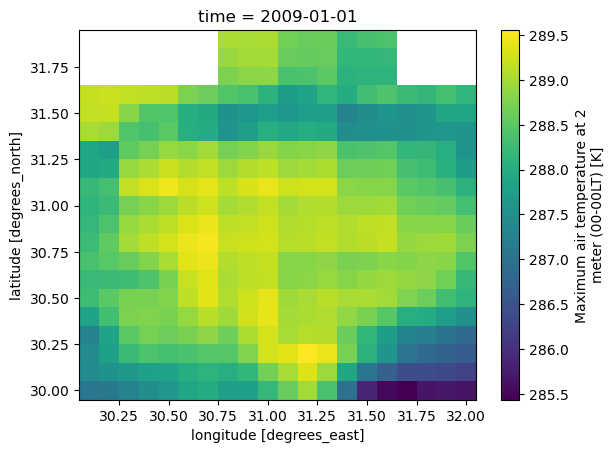

In [25]:
ds.Temperature_Air_2m_Max_24h[0].plot()